## Classification of Dry Beans using Neural Network

#### This is a multiclass classification problem. There are 7 classes of Dry Beans namely :
#### 1. Seker 2. Barbunya 3. Bombay 4.Cali 5. Dermosan 6. Horoz 7. Sira

#### Import Data Analysis Dependencies

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


#### Import Preprocessing dependencies


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Import deep learning dependencies

In [83]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix

#### Set global variables

In [3]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize': (12, 10)}) #this will increase the size of sns plots
sns.set(style="whitegrid")

#### Loading the data

In [4]:
dry_beans_data = pd.read_excel(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Classification of Dry Beans\Dry_Bean_Dataset.xlsx')
dry_beans_data.shape

(10890, 17)

#### The first 5 rows

In [5]:
dry_beans_data.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  35758    682.303       239.435321       190.499750      1.256880   
1  35762    690.560       236.821441       192.707579      1.228916   
2  35764    674.477       222.122920       205.098364      1.083007   
3  35772    693.316       245.510208       185.677993      1.322236   
4  35777    685.863       221.319945       206.193122      1.073362   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.605795       36049     213.374084  0.745891  0.991928   0.965225   
1      0.581250       36157     213.386018  0.791160  0.989075   0.942386   
2      0.383947       36032     213.391985  0.774515  0.992562   0.987920   
3      0.654231       36140     213.415850  0.746416  0.989817   0.935170   
4      0.363352       36174     213.430764  0.797170  0.989025   0.955738   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.891155      0.006696      0.002605      0.794158      0.998161  SEKER  
1     0.901042      0.006622      0.002693      0.811876      0.997728  SEKER  
2     0.960693      0.006211      0.003263      0.922931      0.999541  SEKER  
3     0.869275      0.006863      0.002417      0.755639      0.999133  SEKER  
4     0.964354      0.006186      0.003300      0.929979      0.998204  SEKER

#### List all columns

In [6]:
list(dry_beans_data.columns)

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

#### Check the columns datatypes

In [7]:
dry_beans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10890 entries, 0 to 10889
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10890 non-null  int64  
 1   Perimeter        10890 non-null  float64
 2   MajorAxisLength  10890 non-null  float64
 3   MinorAxisLength  10890 non-null  float64
 4   AspectRation     10890 non-null  float64
 5   Eccentricity     10890 non-null  float64
 6   ConvexArea       10890 non-null  int64  
 7   EquivDiameter    10890 non-null  float64
 8   Extent           10890 non-null  float64
 9   Solidity         10890 non-null  float64
 10  roundness        10890 non-null  float64
 11  Compactness      10890 non-null  float64
 12  ShapeFactor1     10890 non-null  float64
 13  ShapeFactor2     10890 non-null  float64
 14  ShapeFactor3     10890 non-null  float64
 15  ShapeFactor4     10890 non-null  float64
 16  Class            10890 non-null  object 
dtypes: float64(1

#### Basic data statistics

In [8]:
dry_beans_data.describe().T

count          mean           std           min  \
Area             10890.0  54159.112213  30319.698901  20420.000000   
Perimeter        10890.0    864.080711    218.179556    524.736000   
MajorAxisLength  10890.0    323.573313     86.732950    183.601165   
MinorAxisLength  10890.0    204.093579     46.040956    122.512653   
AspectRation     10890.0      1.586895      0.244736      1.024868   
Eccentricity     10890.0      0.752989      0.089361      0.218951   
ConvexArea       10890.0  54892.320845  30791.224077  20684.000000   
EquivDiameter    10890.0    255.579642     60.306748    161.243764   
Extent           10890.0      0.749646      0.049060      0.572209   
Solidity         10890.0      0.987201      0.004628      0.943559   
roundness        10890.0      0.872596      0.059595      0.489618   
Compactness      10890.0      0.798784      0.060867      0.640577   
ShapeFactor1     10890.0      0.006513      0.001140      0.002778   
ShapeFactor2     10890.0      0.001690      0.000576      0.000564   
ShapeFactor3     10890.0      0.641760      0.097400      0.410339   
ShapeFactor4     10890.0      0.995063      0.004307      0.949990   

                          25%           50%           75%            max  
Area             37422.250000  45469.500000  63501.500000  254616.000000  
Perimeter          713.959500    804.212000    990.189750    1985.370000  
MajorAxisLength    257.282618    301.089638    375.183549     738.860153  
MinorAxisLength    176.131734    194.012750    220.488203     460.198497  
AspectRation         1.433526      1.555228      1.711122       2.430306  
Eccentricity         0.716506      0.765872      0.811457       0.911423  
ConvexArea       37812.000000  45999.000000  64497.000000  263261.000000  
EquivDiameter      218.283047    240.610817    284.345950     569.374358  
Extent               0.718141      0.759141      0.787023       0.866195  
Solidity             0.985685      0.988318      0.990092       0.994677  
roundness            0.831605      0.882312      0.916559       0.987920  
Compactness          0.761536      0.800283      0.833865       0.987303  
ShapeFactor1         0.005811      0.006594      0.007262       0.010451  
ShapeFactor2         0.001147      0.001667      0.002135       0.003506  
ShapeFactor3         0.579937      0.640452      0.695330       0.974767  
ShapeFactor4         0.993704      0.996372      0.997848       0.999707

#### Check columns with missing values

In [9]:
columns_with_missing_values = dry_beans_data.isna().sum()
columns_with_missing_values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### Analyze Class column

In [10]:
dry_beans_data['Class'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1622
HOROZ       1543
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='Area'>

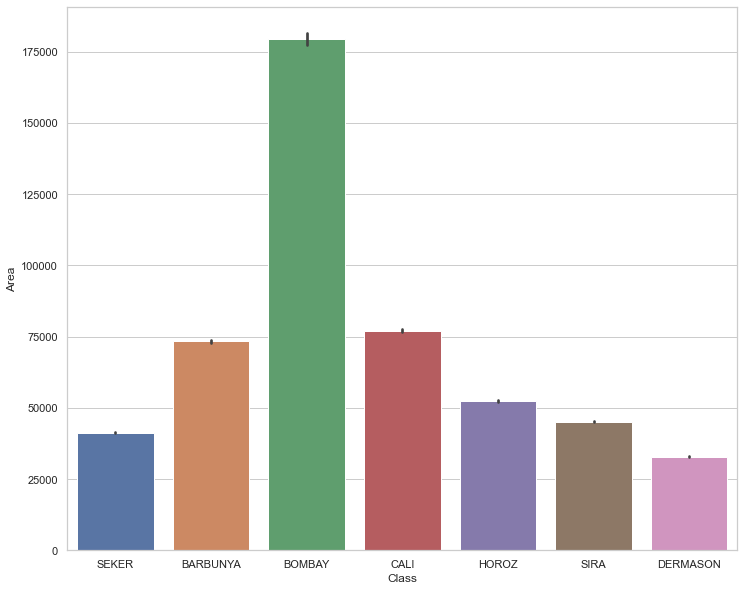

In [11]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="Area", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='Perimeter'>

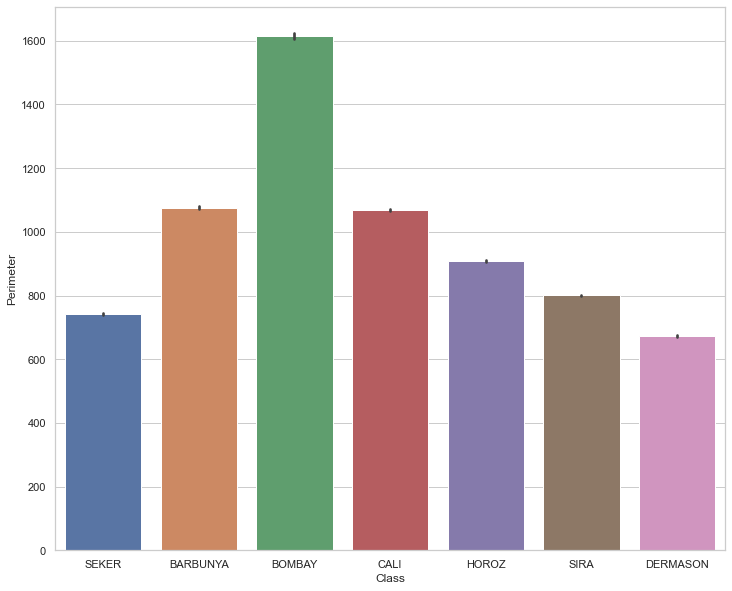

In [12]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="Perimeter", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='MajorAxisLength'>

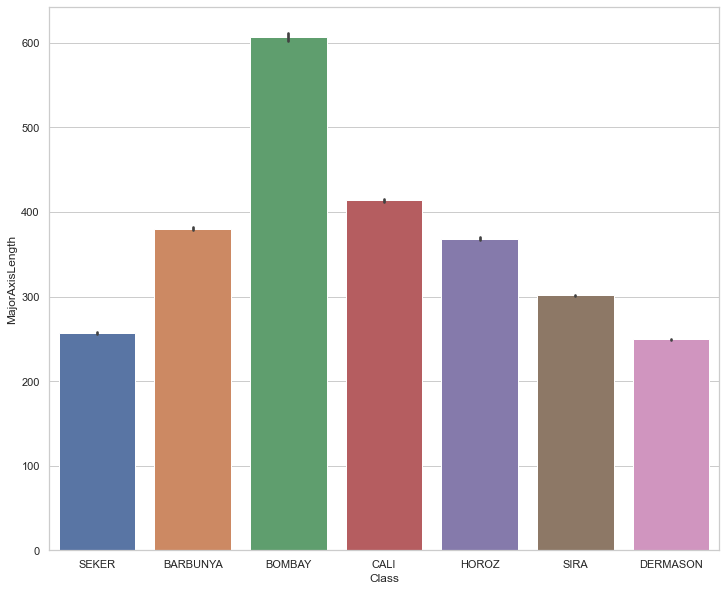

In [13]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="MajorAxisLength", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='MinorAxisLength'>

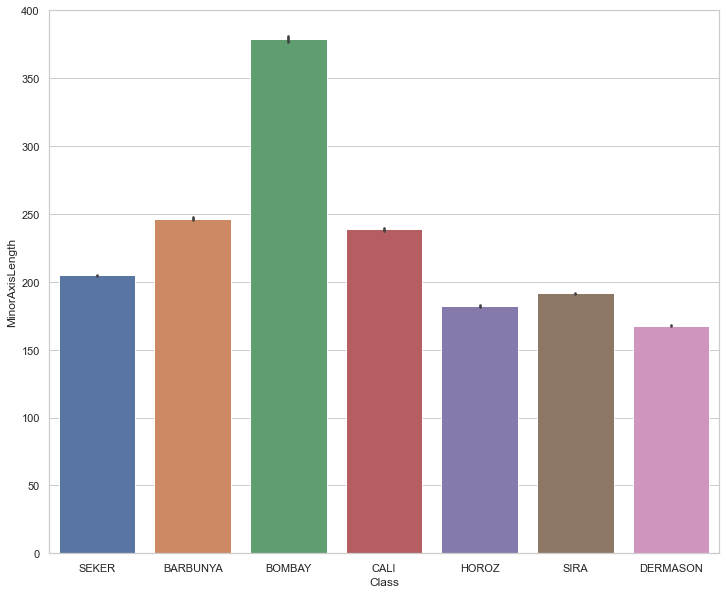

In [14]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="MinorAxisLength", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='AspectRation'>

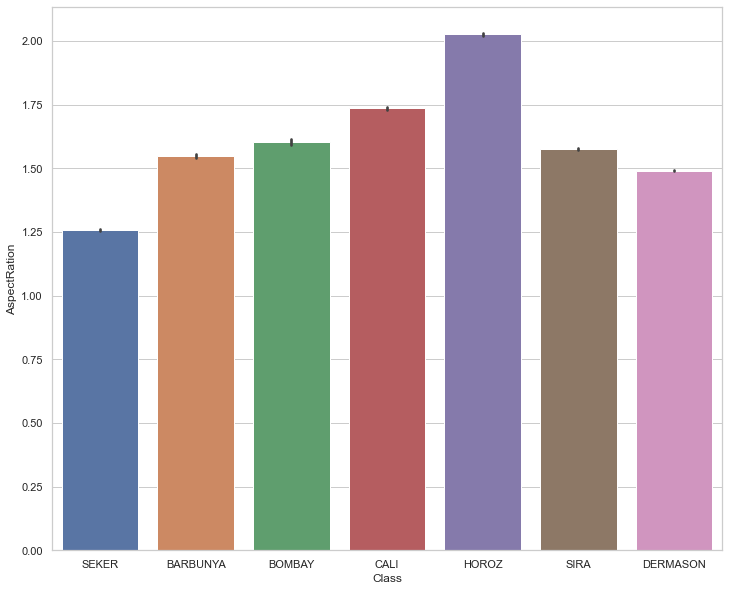

In [15]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="AspectRation", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='Eccentricity'>

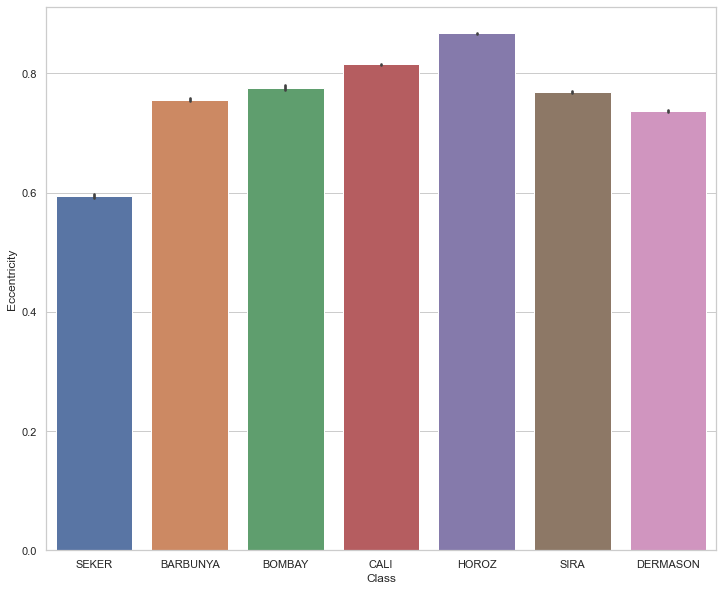

In [16]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="Eccentricity", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='ConvexArea'>

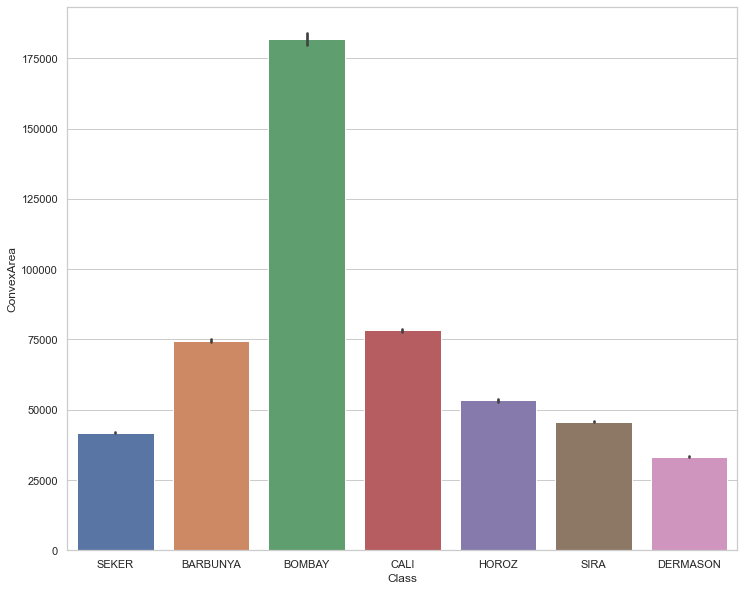

In [17]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="ConvexArea", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='EquivDiameter'>

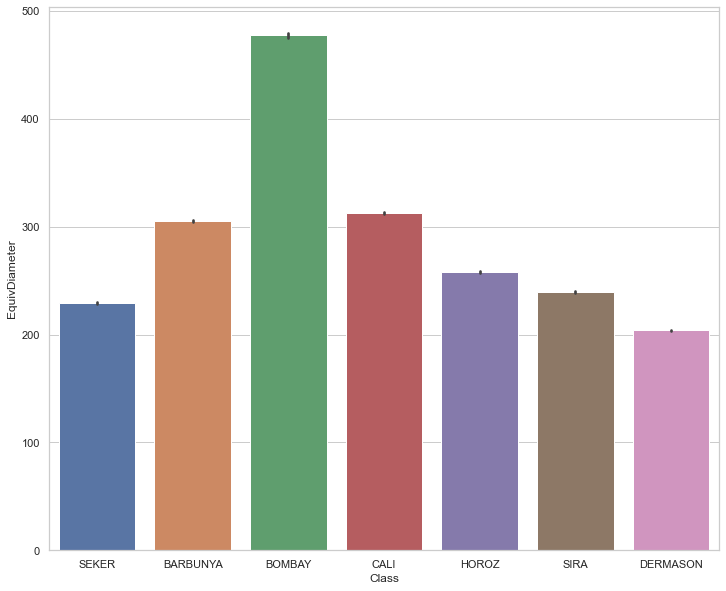

In [18]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="EquivDiameter", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='Extent'>

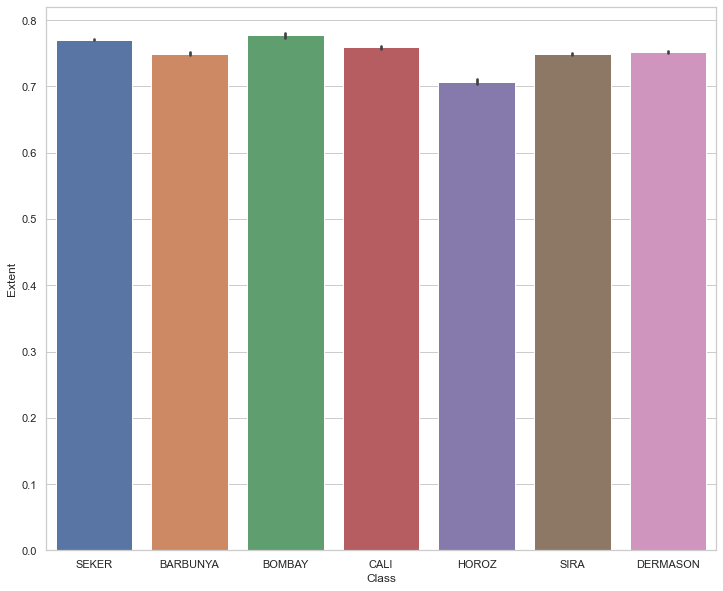

In [19]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="Extent", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='Solidity'>

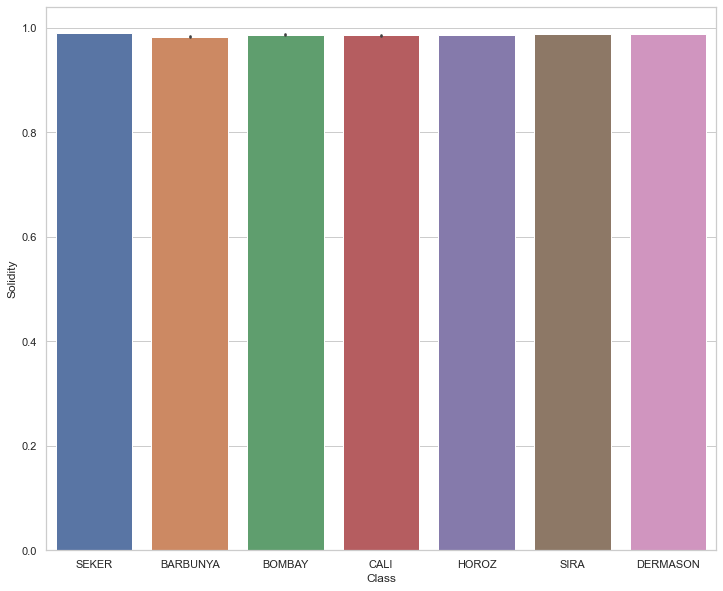

In [20]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="Solidity", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='roundness'>

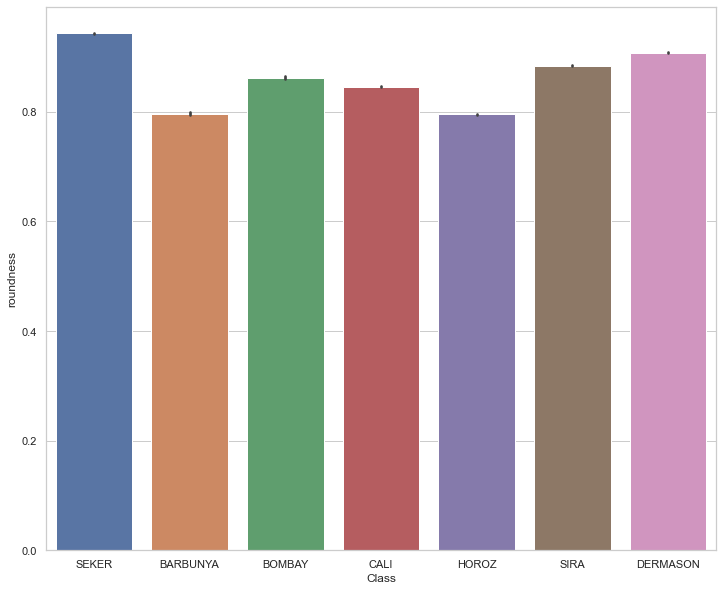

In [21]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="roundness", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='Compactness'>

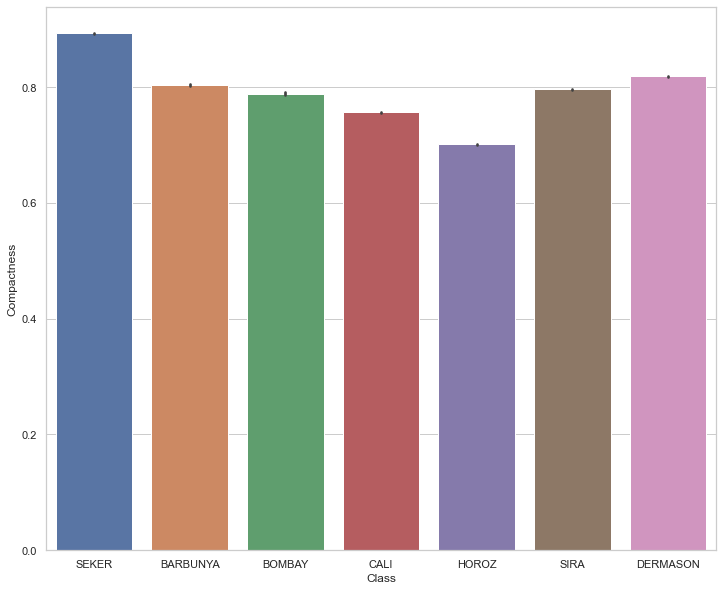

In [22]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="Compactness", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='ShapeFactor1'>

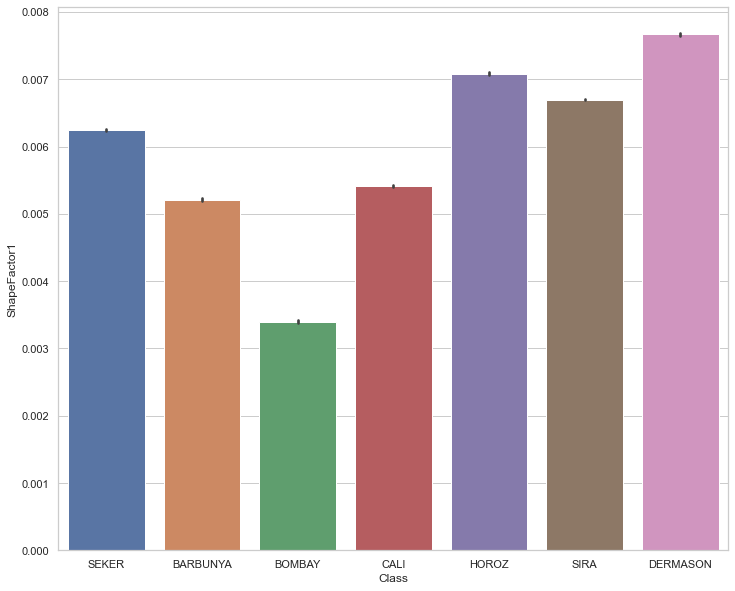

In [23]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="ShapeFactor1", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='ShapeFactor2'>

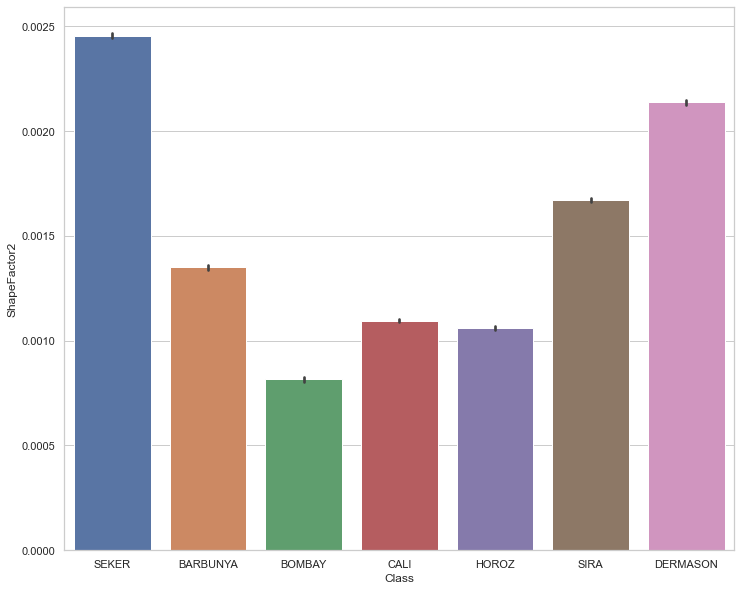

In [24]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="ShapeFactor2", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='ShapeFactor3'>

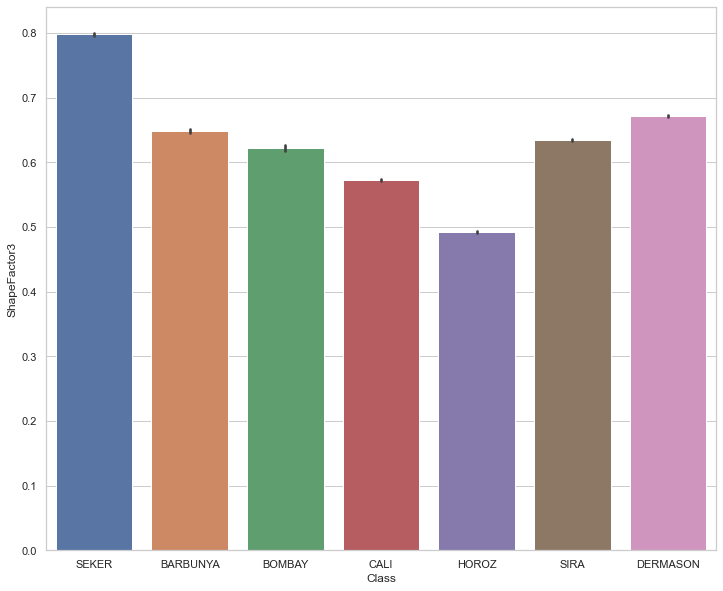

In [25]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="ShapeFactor3", data=dry_beans_data)

<Axes: xlabel='Class', ylabel='ShapeFactor4'>

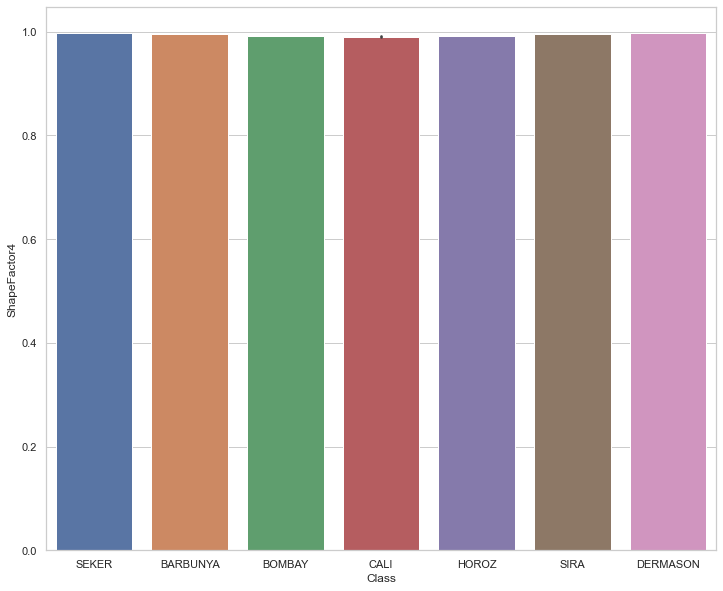

In [26]:
sns.set(style="whitegrid")
sns.barplot(x='Class', y="ShapeFactor4", data=dry_beans_data)

#### ShapeFactor4 and Solidity have no effect when it comes to determining the class of beans

In [27]:
columns_to_be_droped = ['ShapeFactor4', 'Solidity']

In [28]:
dry_beans_data = dry_beans_data.drop(columns = columns_to_be_droped, axis = 1)

In [29]:
dry_beans_data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      35758    682.303       239.435321       190.499750      1.256880   
1      35762    690.560       236.821441       192.707579      1.228916   
2      35764    674.477       222.122920       205.098364      1.083007   
3      35772    693.316       245.510208       185.677993      1.322236   
4      35777    685.863       221.319945       206.193122      1.073362   
...      ...        ...              ...              ...           ...   
10885  42097    759.696       288.721612       185.944705      1.552728   
10886  42101    757.499       281.576392       190.713136      1.476439   
10887  42139    759.321       281.539928       191.187979      1.472582   
10888  42147    763.779       283.382636       190.275731      1.489326   
10889  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  roundness  \
0          0.605795       36049     213.374084  0.745891   0.965225   
1          0.581250       36157     213.386018  0.791160   0.942386   
2          0.383947       36032     213.391985  0.774515   0.987920   
3          0.654231       36140     213.415850  0.746416   0.935170   
4          0.363352       36174     213.430764  0.797170   0.955738   
...             ...         ...            ...       ...        ...   
10885      0.765002       42508     231.515799  0.714574   0.916603   
10886      0.735702       42494     231.526798  0.799943   0.922015   
10887      0.734065       42569     231.631261  0.729932   0.918424   
10888      0.741055       42667     231.653248  0.705389   0.907906   
10889      0.786693       42600     231.686223  0.788962   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3     Class  
0         0.891155      0.006696      0.002605      0.794158     SEKER  
1         0.901042      0.006622      0.002693      0.811876     SEKER  
2         0.960693      0.006211      0.003263      0.922931     SEKER  
3         0.869275      0.006863      0.002417      0.755639     SEKER  
4         0.964354      0.006186      0.003300      0.929979     SEKER  
...            ...           ...           ...           ...       ...  
10885     0.801865      0.006858      0.001749      0.642988  DERMASON  
10886     0.822252      0.006688      0.001886      0.676099  DERMASON  
10887     0.822730      0.006681      0.001888      0.676884  DERMASON  
10888     0.817457      0.006724      0.001852      0.668237  DERMASON  
10889     0.784997      0.007001      0.001640      0.616221  DERMASON  

[10890 rows x 15 columns]

#### Split the data into X and Y

In [30]:
X = dry_beans_data.drop(columns = 'Class', axis = 1)

In [31]:
X

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      35758    682.303       239.435321       190.499750      1.256880   
1      35762    690.560       236.821441       192.707579      1.228916   
2      35764    674.477       222.122920       205.098364      1.083007   
3      35772    693.316       245.510208       185.677993      1.322236   
4      35777    685.863       221.319945       206.193122      1.073362   
...      ...        ...              ...              ...           ...   
10885  42097    759.696       288.721612       185.944705      1.552728   
10886  42101    757.499       281.576392       190.713136      1.476439   
10887  42139    759.321       281.539928       191.187979      1.472582   
10888  42147    763.779       283.382636       190.275731      1.489326   
10889  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  roundness  \
0          0.605795       36049     213.374084  0.745891   0.965225   
1          0.581250       36157     213.386018  0.791160   0.942386   
2          0.383947       36032     213.391985  0.774515   0.987920   
3          0.654231       36140     213.415850  0.746416   0.935170   
4          0.363352       36174     213.430764  0.797170   0.955738   
...             ...         ...            ...       ...        ...   
10885      0.765002       42508     231.515799  0.714574   0.916603   
10886      0.735702       42494     231.526798  0.799943   0.922015   
10887      0.734065       42569     231.631261  0.729932   0.918424   
10888      0.741055       42667     231.653248  0.705389   0.907906   
10889      0.786693       42600     231.686223  0.788962   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  
0         0.891155      0.006696      0.002605      0.794158  
1         0.901042      0.006622      0.002693      0.811876  
2         0.960693      0.006211      0.003263      0.922931  
3         0.869275      0.006863      0.002417      0.755639  
4         0.964354      0.006186      0.003300      0.929979  
...            ...           ...           ...           ...  
10885     0.801865      0.006858      0.001749      0.642988  
10886     0.822252      0.006688      0.001886      0.676099  
10887     0.822730      0.006681      0.001888      0.676884  
10888     0.817457      0.006724      0.001852      0.668237  
10889     0.784997      0.007001      0.001640      0.616221  

[10890 rows x 14 columns]

In [32]:
Y = dry_beans_data['Class']

In [33]:
Y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
10885    DERMASON
10886    DERMASON
10887    DERMASON
10888    DERMASON
10889    DERMASON
Name: Class, Length: 10890, dtype: object

In [36]:
newY = list(Y.values)

In [37]:
newY

['SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',


#### Since we are performing multiclass classification, we need to encode the target labels and transform them in a categorical form.

In [38]:
l_encode = LabelEncoder()
l_encode.fit(newY)
l_encode.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype='<U8')

In [39]:
newY = l_encode.transform(newY)

In [41]:
newY

array([5, 5, 5, ..., 3, 3, 3], dtype=int64)

In [42]:
list(l_encode.inverse_transform(newY))

['SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',
 'SEKER',


In [43]:
Y = newY

In [44]:
Y

array([5, 5, 5, ..., 3, 3, 3], dtype=int64)

#### Split the dataset into training and testing chunks

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5, stratify = Y)

In [46]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8712, 14) (2178, 14) (8712,) (2178,)


#### We need to standardize the data before feeding it to the neural network

In [50]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

### Building a neural network

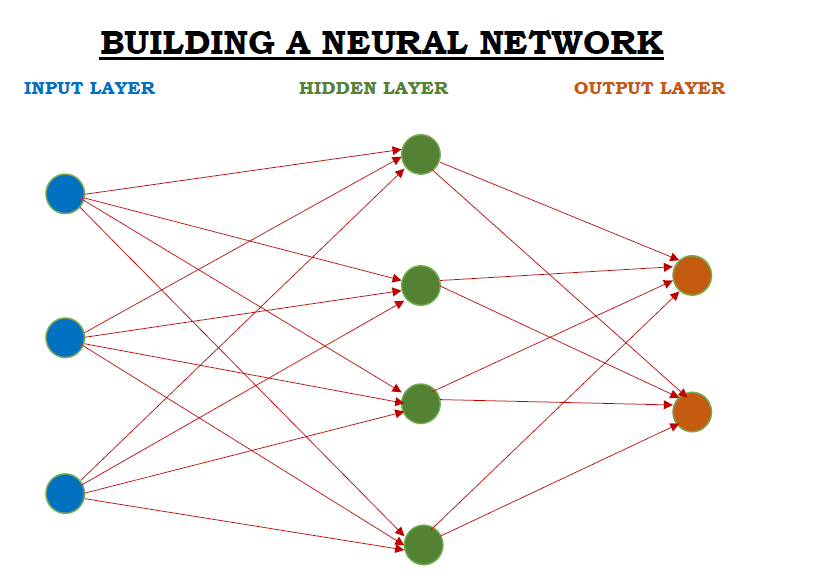

#### Setting up the layers of the neural network

##### Here, we will set up the following:
##### 1. An input layer with 14 neurons
##### 2. 3 hidden layers with different number of neurons
##### 3. An output layer with 7 neurons

####  The hidden layers will use the ReLU activation function
####  The output layer will use the sigmoid activation function

In [72]:
model = keras.Sequential([
   # keras.layers.Flatten(),
    keras.layers.Dense(32, activation ='relu'),
    keras.layers.Dense(14, activation ='relu'),
    keras.layers.Dense(14, activation ='relu'),
    keras.layers.Dense(14, activation ='relu'),
    keras.layers.Dense(7, activation ='sigmoid')
])

#### Compiling the neural network

In [73]:
model.compile (
    
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

#### Training the neural network

In [74]:
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 100)

Epoch 1/100
245/245 [==============================] - 3s 4ms/step - loss: 0.8975 - accuracy: 0.6659 - val_loss: 0.4853 - val_accuracy: 0.8142
Epoch 2/100
245/245 [==============================] - 1s 3ms/step - loss: 0.3510 - accuracy: 0.8744 - val_loss: 0.3452 - val_accuracy: 0.8842
Epoch 3/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.8983 - val_loss: 0.3220 - val_accuracy: 0.8876
Epoch 4/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9043 - val_loss: 0.3115 - val_accuracy: 0.8968
Epoch 5/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2541 - accuracy: 0.9060 - val_loss: 0.2983 - val_accuracy: 0.8911
Epoch 6/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2478 - accuracy: 0.9070 - val_loss: 0.3002 - val_accuracy: 0.8945
Epoch 7/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9054 - val_loss: 0.2885 - val_accuracy: 0.8933

Epoch 58/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2045 - accuracy: 0.9200 - val_loss: 0.2745 - val_accuracy: 0.9094
Epoch 59/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2054 - accuracy: 0.9214 - val_loss: 0.2660 - val_accuracy: 0.9128
Epoch 60/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.9210 - val_loss: 0.2722 - val_accuracy: 0.9128
Epoch 61/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.9213 - val_loss: 0.2695 - val_accuracy: 0.9117
Epoch 62/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2041 - accuracy: 0.9203 - val_loss: 0.2583 - val_accuracy: 0.9186
Epoch 63/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.9217 - val_loss: 0.2763 - val_accuracy: 0.9128
Epoch 64/100
245/245 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9214 - val_loss: 0.2560 - val_accuracy:

#### Visualizing the Accuracy along the epochs

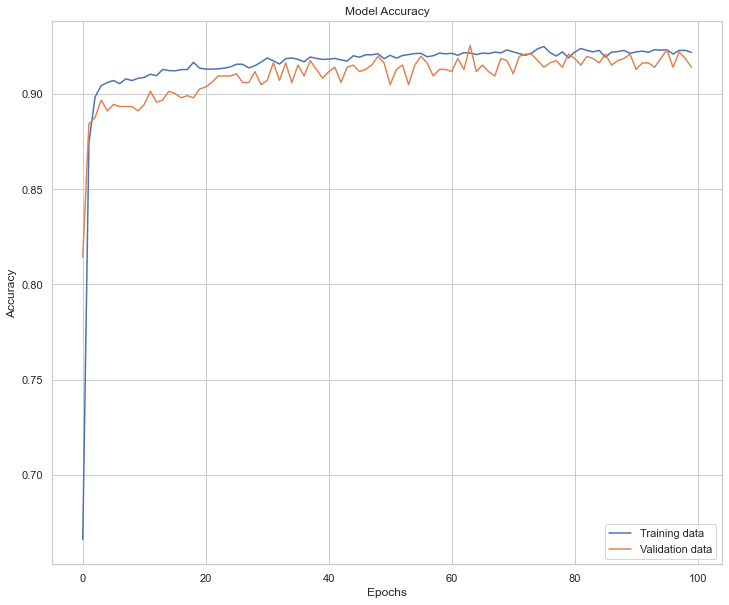

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')

#### Visualizing the Loss along the epochs

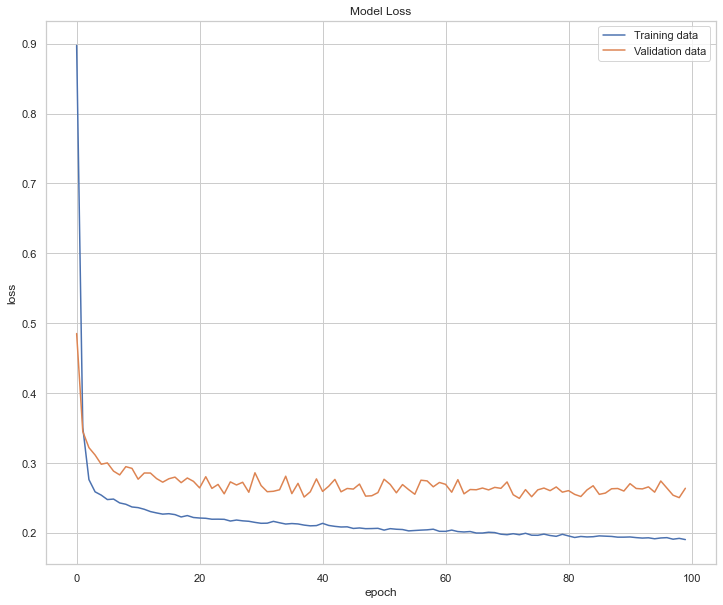

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc = 'upper right')

In [77]:
loss , accuracy = model.evaluate(X_test_std, Y_test)

print(accuracy)

69/69 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9233
0.9233241677284241


### Model prediction and evaluation

In [78]:
Y_prediction = model.predict(X_test_std)

69/69 [==============================] - 0s 2ms/step


In [79]:
print(Y_prediction[0])

[8.8257613e-12 8.5452728e-11 7.3200276e-06 9.9862194e-01 1.4182933e-01
 3.1044327e-02 8.8887954e-01]


#### Model.predict() gives  the prediction probability of each class for that datapoint

#### Converting the prediction probability into class labels

In [80]:
Y_prediction_labels = [np.argmax(i) for i in Y_prediction]

In [86]:
print(Y_prediction_labels)

[3, 3, 0, 6, 3, 2, 4, 0, 4, 5, 3, 4, 5, 4, 4, 2, 3, 6, 3, 6, 4, 6, 3, 6, 3, 4, 3, 5, 3, 5, 2, 4, 3, 5, 0, 6, 5, 6, 4, 3, 4, 4, 5, 4, 0, 0, 4, 6, 6, 2, 3, 1, 3, 0, 3, 2, 1, 3, 2, 3, 3, 5, 3, 3, 6, 3, 6, 3, 3, 3, 3, 3, 6, 5, 0, 4, 6, 3, 1, 6, 4, 5, 2, 4, 6, 2, 5, 3, 3, 4, 4, 6, 5, 3, 6, 3, 5, 6, 5, 3, 6, 4, 6, 3, 6, 5, 3, 4, 4, 6, 0, 5, 5, 6, 3, 2, 2, 0, 3, 1, 3, 1, 2, 2, 1, 3, 2, 6, 3, 6, 3, 3, 5, 2, 6, 3, 4, 3, 6, 5, 3, 3, 3, 6, 0, 5, 3, 2, 6, 0, 0, 5, 2, 3, 4, 6, 2, 2, 3, 6, 1, 6, 2, 3, 1, 3, 5, 3, 4, 3, 1, 0, 3, 3, 2, 5, 4, 5, 2, 3, 0, 5, 0, 4, 5, 1, 3, 3, 3, 3, 0, 4, 6, 4, 2, 4, 4, 3, 3, 2, 2, 1, 6, 4, 4, 0, 3, 3, 2, 0, 3, 5, 6, 3, 6, 5, 5, 2, 5, 0, 3, 6, 4, 2, 0, 5, 3, 3, 0, 6, 2, 6, 6, 4, 5, 2, 6, 4, 2, 0, 5, 3, 2, 4, 3, 0, 2, 5, 4, 6, 5, 5, 3, 4, 3, 3, 0, 2, 6, 5, 5, 0, 5, 2, 3, 2, 3, 5, 4, 4, 6, 5, 1, 0, 3, 0, 3, 3, 0, 2, 4, 5, 2, 4, 2, 3, 3, 6, 6, 3, 6, 4, 5, 3, 3, 3, 0, 4, 3, 3, 2, 3, 6, 3, 5, 5, 1, 6, 5, 3, 3, 4, 2, 6, 6, 4, 4, 3, 4, 5, 6, 3, 0, 3, 3, 4, 6, 0, 6, 0, 4, 2, 6, 

#### Y_test  represents True labels

#### Y_prediction_labels  represents  Predicted Labels

#### Let's get the confusion Matrix and see how our model is fairing

In [84]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_labels)

In [85]:
print(conf_matrix)

tf.Tensor(
[[189   0  22   0   0   0   0]
 [  0  84   0   0   0   0   0]
 [  7   0 251   0   2   0   1]
 [  0   0   0 538   1   9  19]
 [  1   0   9   3 288   0   8]
 [  0   0   0   5   0 311   8]
 [  0   0   0  55  10   7 350]], shape=(7, 7), dtype=int32)


#### Display the confusion matrix as a seaborn heatmap

Text(0.5, 66.5, 'Predicted Labels')

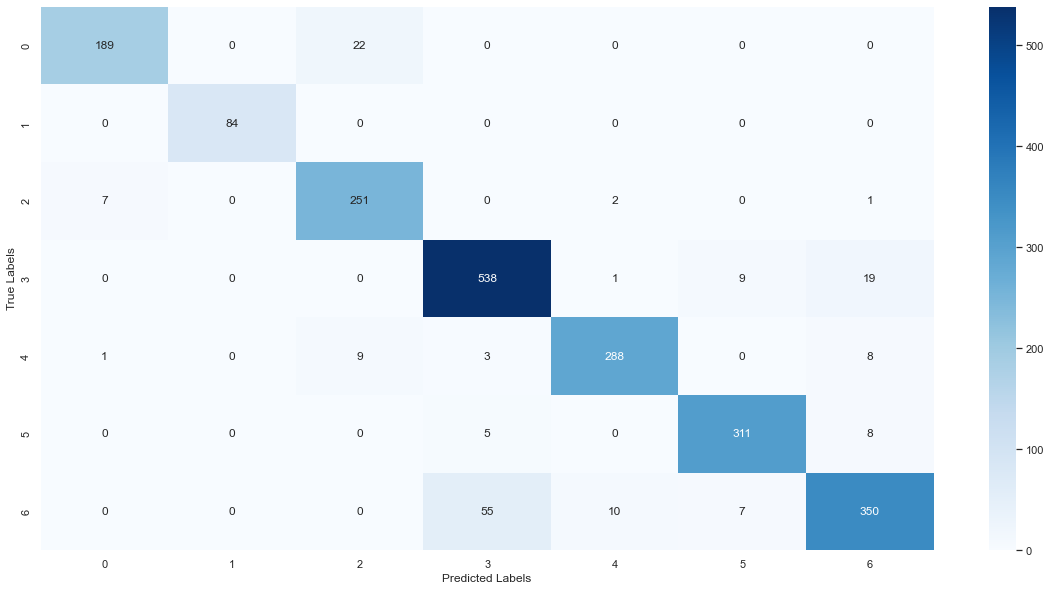

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

### Build a predictive system for the neural network

In [92]:
unseen_input_data = [
    [28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388],
    [28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506],
    [29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617],
    [30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425],
    [30140,620.134,201.8478822,190.2792788,1.06079802,0.333679658,30417,195.896503,0.773098035,0.984877069,0.970515523,0.00669701,0.003664972,0.941900381],
    [30279,634.927,212.5605564,181.5101816,1.171066849,0.52040066,30600,196.3477022,0.775688485,0.943851783,0.923725952,0.007020065,0.003152779,0.853269634],
    [30477,670.033,211.0501553,184.0390501,1.146768336,0.489477894,30970,196.9886332,0.762401501,0.853079869,0.933373552,0.006924899,0.003242016,0.871186188],
    [30519,629.727,212.9967551,182.7372038,1.165590535,0.513759558,30847,197.1243203,0.770681818,0.967109244,0.925480392,0.006979152,0.003158285,0.856513956],
    [30685,635.681,213.5341452,183.1571463,1.165852108,0.51408086,31044,197.659696,0.771561479,0.954239808,0.925658498,0.00695891,0.00315155,0.856843654],
    [30834,631.934,217.2278128,180.8974686,1.2008339,0.553642225,31120,198.1390121,0.783682806,0.97027823,0.91212543,0.007045074,0.00300804,0.8319728],
    [30917,640.765,213.5600894,184.4398709,1.157884618,0.504102365,31280,198.4055115,0.770805285,0.94625818,0.929038343,0.006907529,0.00317422,0.863112242],
    [31091,638.558,210.4862549,188.3268476,1.117664622,0.446621924,31458,198.9630385,0.786377317,0.958172836,0.945254305,0.006770006,0.003333984,0.8935057],
    [31107,640.594,214.6485485,184.9692526,1.160455295,0.507365875,31423,199.0142269,0.761046142,0.952581757,0.927163162,0.006900329,0.003145388,0.859631529],
    [31158,642.626,216.4848362,183.6443122,1.178826797,0.529514251,31492,199.1773023,0.798759229,0.948119004,0.92005198,0.00694797,0.003071052,0.846495646],
    [31158,641.105,212.0669751,187.1929601,1.132879009,0.469924157,31474,199.1773023,0.781313473,0.952623101,0.939218858,0.006806181,0.00326701,0.882132064],
    [31178,636.888,212.9759252,186.5620882,1.141582018,0.482352224,31520,199.2412169,0.764110482,0.965899596,0.935510513,0.006830968,0.003227429,0.875179919],
    [31202,644.454,215.6406947,184.4716842,1.168963657,0.517871223,31573,199.3178875,0.779192888,0.944079243,0.924305534,0.006911118,0.003111647,0.85434072],
    [31203,639.782,215.067737,184.8748759,1.163315112,0.510946829,31558,199.3210815,0.762984155,0.957948542,0.926782809,0.006892534,0.003136682,0.858926376],
    [31272,638.666,212.4503189,187.535939,1.132851229,0.469883494,31593,199.5413417,0.770322199,0.963425036,0.939237666,0.006793627,0.003261246,0.882167393],
    [31335,635.011,216.7900923,184.1634403,1.177161395,0.52758671,31599,199.7422367,0.774277242,0.976510834,0.921362386,0.006918465,0.003075469,0.848908647],
    [31374,636.401,219.865394,182.0088637,1.207992784,0.56099452,31604,199.8664991,0.769196823,0.973459862,0.909040279,0.007007885,0.002951884,0.826354229],
    [31530,638.857,213.7856543,188.0664823,1.136755746,0.475535642,31791,200.3627781,0.768949371,0.970792739,0.937213391,0.006780389,0.003226921,0.878368941],
    [31573,674.103,217.3070261,185.4482507,1.171793345,0.52126839,32197,200.499357,0.756964757,0.873118507,0.922654737,0.006882685,0.003076767,0.851291764],
    [31637,656.711,229.7192546,175.510446,1.308863717,0.645190802,32045,200.702465,0.761823348,0.921842182,0.873685862,0.007261095,0.002609775,0.763326986],
    [31675,657.431,236.7526321,171.2105592,1.3828156,0.690678219,32009,200.8229633,0.740935673,0.92092896,0.848239622,0.007474432,0.002386889,0.719510457],
    [31682,646.721,210.0456816,192.2484159,1.092574316,0.402841974,32026,200.8451524,0.773184303,0.951893863,0.956197485,0.006629811,0.003418781,0.91431363],
    [31703,656.305,215.7089067,187.2724497,1.151845384,0.496263281,32093,200.9117052,0.777110501,0.92490856,0.931401991,0.006804053,0.003158611,0.867509669],
    [31748,641.826,219.7765183,184.1151053,1.193690859,0.546072628,32020,201.0542441,0.775589974,0.968482156,0.914812218,0.006922531,0.002990698,0.836881394],
    [31768,650.954,220.9594949,183.2920681,1.205504947,0.558465259,32173,201.1175623,0.777674419,0.94210463,0.910201041,0.006955411,0.002944773,0.828465935],
    [31811,642.092,223.9846829,180.9171228,1.238051321,0.589564969,32052,201.2536289,0.773877293,0.969600136,0.898515141,0.007041108,0.002830886,0.807329459],
    [31821,649.681,213.7356452,189.9692019,1.125106823,0.458286561,32168,201.2852592,0.772354369,0.947378132,0.941748668,0.006716811,0.003258989,0.886890554],
    [31823,662.532,222.8726889,181.8946963,1.225284154,0.57785815,32274,201.2915846,0.774847821,0.91103962,0.903168466,0.00700351,0.002874555,0.815713278],
    [31837,656.404,224.9125542,180.4394219,1.246471264,0.596968354,32238,201.3358572,0.785245659,0.928537748,0.89517394,0.007064502,0.002798279,0.801336382],
    [31915,640.718,216.3203615,188.0653069,1.150240653,0.494138341,32184,201.5823407,0.777655945,0.976946683,0.93186947,0.006778015,0.003152845,0.868380709],
    [31972,639.974,213.6874805,190.6449473,1.120866215,0.451705439,32246,201.7622728,0.772270531,0.980968377,0.944193232,0.006683582,0.003276669,0.891500859],
    [31992,640.338,212.8873637,191.4872537,1.111757361,0.436968432,32258,201.8253689,0.774212284,0.980466376,0.948038274,0.006654394,0.003315826,0.898776569],
    [31994,654.535,212.1713961,192.4225318,1.102632806,0.421302377,32391,201.8316774,0.789741311,0.938453277,0.951267141,0.0066316,0.003349716,0.904909174],
    [32015,653.676,212.9299893,191.8101346,1.110108127,0.43420694,32375,201.897905,0.761880964,0.941538949,0.948189147,0.006650945,0.003316218,0.899062659],
    [32026,654.237,230.9790674,176.9318083,1.305469433,0.642831065,32349,201.9325869,0.779448988,0.940247873,0.874246265,0.007212236,0.002598872,0.764306531],
    [32038,645.085,224.4823211,181.9408668,1.233820224,0.5857513,32308,201.970415,0.770514671,0.967478615,0.899716352,0.007006752,0.002832168,0.809489514],
    [32044,652.651,216.1471468,188.9705403,1.143813985,0.48544352,32395,201.9893264,0.778069153,0.945354229,0.934499156,0.006745324,0.003173206,0.873288673],
    [32057,642.082,215.9182853,189.3033869,1.140593884,0.48097147,32301,202.030295,0.779804909,0.977128658,0.935679416,0.006735449,0.003184598,0.875495969],
    [32066,669.313,236.436655,173.2308993,1.364864213,0.680580172,32481,202.058653,0.780878628,0.899489569,0.854599524,0.007373438,0.002426053,0.730340347],
    [32109,663.582,224.4723523,182.3644962,1.230899418,0.583080944,32567,202.1940863,0.767625332,0.9163206,0.90075274,0.006990948,0.002838822,0.811355498],
    [32114,648.566,222.6575074,183.8290361,1.211220556,0.564236127,32393,202.2098285,0.760670804,0.9593916,0.908165329,0.006933347,0.002909259,0.824764265],
    [32167,654.893,217.960517,188.2047159,1.158103377,0.504381753,32521,202.3766203,0.76059302,0.942496457,0.928501286,0.006775904,0.003106541,0.862114638],
    [32213,658.216,221.4811143,185.2954324,1.195286422,0.547784367,32585,202.5212716,0.762907351,0.934338332,0.914395217,0.00687552,0.002964975,0.836118613],
    [32218,653.595,222.7560714,184.4046839,1.207974042,0.560975566,32566,202.5369884,0.754431565,0.947743902,0.90923218,0.006914025,0.002914808,0.826703157],
    [32233,665.493,221.2336837,185.5923729,1.192040817,0.54428951,32710,202.5841313,0.775204425,0.91458402,0.915702021,0.006863577,0.002976782,0.838510191],
    [32251,644.051,220.9809628,186.0277835,1.187892253,0.539747143,32514,202.6406883,0.764060649,0.977040422,0.917005183,0.00685191,0.002988674,0.840898506],
    [32258,654.808,220.8040301,186.2777558,1.185348348,0.536918908,32612,202.6626784,0.775805676,0.945408164,0.917839581,0.006844939,0.002996515,0.842429496],
    [32262,652.419,222.6986563,184.5129929,1.206953791,0.559941518,32563,202.6752432,0.781313572,0.952462642,0.910087409,0.006902816,0.002921047,0.828259093],
    [32279,646.556,218.1816038,188.5531418,1.15713587,0.503143726,32623,202.7286345,0.790183599,0.970325944,0.929173821,0.006759243,0.00310789,0.86336399],
    [32323,649.59,217.3714574,189.591319,1.146526426,0.489149967,32615,202.8667587,0.784843629,0.962593368,0.933272294,0.006724978,0.003147053,0.870997175],
    [32338,653.602,221.4113413,186.136273,1.189512059,0.541530905,32672,202.9138251,0.782490866,0.951253518,0.916456329,0.006846785,0.002979295,0.839892203],
    [32355,657.166,221.279621,186.3604099,1.18737462,0.539174328,32720,202.9671537,0.783793605,0.941458316,0.917242866,0.006839117,0.002986188,0.841334475],
    [32368,675.385,221.6580649,186.1762293,1.190581987,0.542701939,32806,203.0079249,0.759099437,0.891708502,0.915860765,0.006848062,0.002972113,0.838800941],
    [32376,643.009,219.1300137,188.3004274,1.163725525,0.511456521,32608,203.0330109,0.784302326,0.984008731,0.926541314,0.006768286,0.00307693,0.858478807],
    [32433,653.76,219.8366971,188.0092368,1.169286684,0.518261408,32775,203.2116585,0.769320176,0.953586944,0.924375508,0.00677818,0.003052717,0.854470079],
    [32465,653.85,225.2024494,183.6920946,1.225977906,0.578509868,32767,203.3118831,0.765034405,0.954265043,0.902796056,0.006936777,0.002842471,0.815040719],
    [32514,649.012,221.4454899,187.1344232,1.183349841,0.534673644,32843,203.4652564,0.7849831,0.970006874,0.918805149,0.006810774,0.002994125,0.844202902],
    [32518,651.651,221.2627854,187.2561106,1.181605154,0.532696427,32811,203.4777716,0.758915235,0.962284651,0.919620402,0.006804317,0.003001917,0.845701683],
    [32518,655.131,220.8211992,187.6655865,1.176673909,0.527019605,32842,203.4777716,0.794032183,0.952088655,0.921459408,0.006790737,0.003019962,0.849087441],
    [32525,663.914,225.0778556,184.2147342,1.221823306,0.574579254,33000,203.4996712,0.769057978,0.927264249,0.904130132,0.006920149,0.002852456,0.817451295],
    [32578,657.571,227.037574,182.8423057,1.241712486,0.592813998,32901,203.6654067,0.781922043,0.946779791,0.89705595,0.006969046,0.002783756,0.804709378],
    [32581,649.583,224.4241779,184.9234713,1.213605695,0.566603091,32851,203.6747839,0.772061611,0.970297635,0.907543857,0.006888192,0.002882408,0.823635852],
    [32615,664.789,218.1467463,191.002277,1.142115946,0.483095172,33016,203.7810289,0.808562858,0.927383997,0.934146543,0.00668854,0.003141747,0.872629764],
    [32622,657.009,235.2708698,177.1581895,1.328027061,0.658024288,32902,203.802896,0.779311992,0.949681133,0.866247896,0.007212031,0.002504991,0.750385418],
    [32698,653.049,225.0141906,185.1437243,1.215348733,0.568317852,32994,204.0401594,0.767684831,0.963472928,0.906787962,0.006881589,0.002870063,0.822264408],
    [32705,654.454,223.8758675,186.1499298,1.20266426,0.555543833,33021,204.0619987,0.779469946,0.959545923,0.911496183,0.00684531,0.00291469,0.830825292],
    [32713,660.043,215.4163208,193.4864621,1.113340533,0.43959156,33020,204.0869551,0.799516082,0.943595321,0.947407115,0.006585037,0.003272537,0.897580242],
    [32729,656.679,214.2657207,194.793825,1.099961565,0.416528466,33066,204.1368587,0.769153036,0.953753937,0.952727566,0.006546663,0.003327167,0.907689816],
    [32774,660.614,222.8700513,187.4792477,1.188771846,0.540717403,33120,204.2771471,0.790153816,0.943721321,0.916575134,0.006800209,0.002960563,0.840109976],
    [32775,649.807,220.0250995,189.8094038,1.159189666,0.505764488,33062,204.2802636,0.772630835,0.975402341,0.928440728,0.006713199,0.00307699,0.862002186],
    [32795,651.03,225.2102521,185.6002312,1.213415795,0.566415511,33091,204.3425821,0.775992617,0.972334053,0.907341385,0.006867213,0.002871066,0.82326839],
    [32796,654.824,223.1453687,187.4192621,1.190621317,0.542744878,33111,204.3456976,0.800820453,0.961128742,0.915751462,0.006804042,0.002951598,0.83860074],
    [32799,653.729,219.9055494,190.1123396,1.156713709,0.502601593,33087,204.3550436,0.746177996,0.964439446,0.929285523,0.006704642,0.003084267,0.863571584],
    [32829,658.101,221.5995,189.0026275,1.172467827,0.522071263,33154,204.4484801,0.789785166,0.952538233,0.922603526,0.006750114,0.003016833,0.851197267],
    [32836,669.19,218.4060038,191.7587728,1.138962252,0.478674896,33225,204.4702758,0.80291471,0.92142762,0.936193476,0.006651419,0.003151785,0.876458224],
    [32849,664.105,230.7223076,181.7436855,1.269492841,0.616038378,33245,204.5107474,0.746568182,0.935962647,0.886393473,0.007023724,0.002674566,0.785693388],
    [32870,655.512,220.3581629,190.0206598,1.159653709,0.506352834,33198,204.5761077,0.781242573,0.961276389,0.928379984,0.00670393,0.003071937,0.861889394],
    [32885,659.728,227.0674037,184.5596932,1.230319577,0.582547095,33225,204.6227808,0.785669916,0.949462632,0.90115436,0.006904893,0.002808882,0.81207918],
    [32920,671.612,219.0931338,191.4622125,1.144315272,0.486132629,33376,204.7316434,0.777974713,0.917134004,0.934450294,0.00665532,0.00313021,0.873197353],
    [32925,656.646,225.1281702,186.4615283,1.207370616,0.560364527,33252,204.7471905,0.768683025,0.959562001,0.909469438,0.006837606,0.002885601,0.827134659],
    [32934,668.197,221.4087308,189.6018111,1.167756413,0.516407505,33401,204.7751722,0.776708646,0.926926508,0.924873972,0.006722801,0.003034312,0.855391863],
    [32947,668.231,209.6932927,200.2495993,1.047159612,0.296720861,33336,204.8155836,0.765319396,0.927198033,0.97673884,0.006364564,0.003573241,0.954018762],
    [32951,688.26,226.6490462,185.5215755,1.221685649,0.574447868,33524,204.8280162,0.770801656,0.874124721,0.903723266,0.006878366,0.002830133,0.816715741],
    [32988,676.797,224.7517099,187.1772945,1.20074238,0.553546741,33461,204.9429826,0.766699205,0.905000877,0.911863953,0.006813135,0.002905675,0.831495868],
    [33006,669.769,223.5277491,188.2429412,1.187442927,0.539249994,33458,204.9988888,0.757018349,0.924597414,0.917107114,0.006772337,0.002955279,0.841085458],
    [33010,665.85,224.9712592,186.8900915,1.203762369,0.556677424,33374,205.0113104,0.791587732,0.935626643,0.911277783,0.006815246,0.002899108,0.830427198],
    [33013,652.684,223.7818539,188.0291423,1.190144523,0.542223823,33289,205.020626,0.789784689,0.973842946,0.916162872,0.006778598,0.002945848,0.839354409],
    [33019,655.703,224.4502114,187.5026272,1.197051022,0.549663318,33340,205.0392561,0.764328704,0.965071386,0.913517768,0.006797608,0.002920141,0.834514712],
    [33051,663.071,218.9513714,192.4739417,1.137563711,0.476689675,33423,205.1385878,0.777926846,0.94465755,0.936913921,0.006624652,0.003148775,0.877807695],
    [33058,655.511,224.4458788,187.8781612,1.194635275,0.547087283,33320,205.1603102,0.799274662,0.96677736,0.914074748,0.006789457,0.00292376,0.835532645],
    [33062,667.966,222.0391436,189.7813412,1.169973519,0.51908899,33439,205.1727219,0.77866227,0.931172778,0.924038522,0.006715841,0.003020233,0.853847189],
    [33078,659.456,235.5600775,178.9312328,1.316483846,0.650391531,33333,205.2223615,0.787721471,0.955822961,0.871210282,0.007121352,0.002530662,0.759007355],
    [33078,652.214,221.3869025,190.3548121,1.163022358,0.510582618,33327,205.2223615,0.772417336,0.977167183,0.926985107,0.006692874,0.003048481,0.859301388],
    [33089,663.915,217.3358221,194.2070489,1.119093377,0.448903019,33466,205.2564817,0.774410223,0.94334064,0.944420849,0.00656822,0.003223218,0.891930741],
    [33090,653.809,228.406675,184.6885548,1.236712666,0.588365282,33352,205.2595833,0.769355964,0.972758069,0.898658427,0.006902589,0.002776965,0.807586968],
    [33143,648.385,222.5263095,189.7373793,1.172812181,0.522480157,33377,205.4238989,0.769979556,0.9906854,0.923144321,0.006714127,0.003007791,0.852195437],
    [33159,653.801,222.4440287,189.98042,1.170878708,0.520175444,33415,205.4734778,0.788111423,0.974810341,0.923708669,0.006708406,0.003012584,0.853237706],
    [33168,680.621,234.315548,180.5827539,1.297552191,0.637220052,33542,205.5013606,0.761240274,0.899742964,0.877028274,0.007064506,0.002578196,0.769178593],
    [33171,654.338,222.253649,190.3614532,1.167534946,0.516138043,33429,205.5106541,0.790237278,0.973563187,0.924667176,0.00670024,0.003021425,0.855009387],
    [33194,664.658,232.3085443,182.0856017,1.275820505,0.621001572,33520,205.5818899,0.773698809,0.944219534,0.88495191,0.00699851,0.002647671,0.783139883],
    [33236,660.788,210.8580025,200.9273673,1.049424005,0.303273094,33611,205.711909,0.76828479,0.956520582,0.975594507,0.006344265,0.003545182,0.951784642],
    [33248,660.068,230.9698347,183.4292487,1.259176693,0.607696024,33511,205.7490422,0.787661984,0.958954568,0.890804821,0.006946879,0.002698359,0.793533229],
    [33251,658.962,217.452163,194.9834825,1.115233763,0.442693503,33565,205.7583245,0.757943925,0.962263101,0.946223398,0.006539718,0.003233803,0.895338718],
    [33276,704.493,234.7881384,180.705496,1.299286096,0.6384619,33857,205.8356604,0.759656652,0.842534348,0.876686794,0.00705578,0.002571003,0.768579735],
    [33316,670.587,229.2180829,185.2793615,1.237148493,0.588756561,33699,205.9593374,0.782616866,0.931005952,0.898530058,0.00688012,0.002766344,0.807356266],
    [33319,668.601,225.0172378,188.8365103,1.191598158,0.543808892,33732,205.9686102,0.7960388,0.936629385,0.915345918,0.006753421,0.002924453,0.83785815],
    [33325,674.433,223.8254842,189.7357064,1.179669807,0.530484185,33701,205.9871545,0.798969072,0.920666621,0.920302508,0.006716444,0.00297195,0.846956707],
    [33330,653.776,224.3601667,189.4313875,1.184387496,0.535842011,33580,206.0026068,0.790184922,0.979912348,0.918178168,0.006731478,0.002951196,0.843051148],
    [33333,679.262,220.5312914,192.7167056,1.144328878,0.486151306,33834,206.0118777,0.772240756,0.907840655,0.934161662,0.006616005,0.003107876,0.87265801],
    [33338,659.103,232.2637945,182.9185092,1.269766497,0.616255393,33639,206.0273281,0.776747437,0.964368085,0.887040223,0.006966938,0.002660694,0.786840358],
    [33344,661.508,225.3180561,188.668526,1.194253546,0.54667768,33692,206.0458672,0.763352487,0.957540959,0.914466735,0.006757379,0.002914941,0.83624941],
    [33382,659.434,222.8701044,190.920249,1.167346605,0.515908654,33730,206.1632423,0.781688327,0.964671718,0.925037671,0.006676356,0.003015483,0.855694693],
    [33399,664.701,221.5599425,192.0898879,1.153418042,0.498328415,33752,206.2157306,0.761491108,0.949927944,0.930744648,0.00663373,0.003070858,0.866285599],
    [33421,654.804,219.5440823,194.0253903,1.131522436,0.46793088,33691,206.2836368,0.763385107,0.979504999,0.939600078,0.006569046,0.003158306,0.882848306],
    [33423,659.036,224.1680528,189.9810797,1.179949356,0.530804973,33707,206.289809,0.772982724,0.967023472,0.920246246,0.006707,0.002967046,0.846853153],
    [33427,665.61,228.223182,186.6258656,1.222891486,0.575596241,33789,206.3021528,0.754491694,0.948129347,0.903949156,0.00682751,0.002812018,0.817124077],
    [33429,658.605,229.4460905,185.6980934,1.235586679,0.587351259,33713,206.3083245,0.791743641,0.968463377,0.899158159,0.006863684,0.00276746,0.808485396],
    [33431,666.841,219.9074077,193.6804685,1.135413444,0.473606709,33788,206.3144959,0.788708802,0.94474509,0.938188022,0.006577949,0.003143618,0.880196765],
    [33433,657.349,225.0025125,189.5660154,1.186934863,0.538686621,33708,206.3206672,0.776807082,0.972284135,0.916970503,0.006729953,0.002935035,0.840834904],
    [33446,656.077,224.2339338,190.2565986,1.178586895,0.529237524,33713,206.3607759,0.767814509,0.97643744,0.920292359,0.006704357,0.002966471,0.846938026],
    [33447,664.412,226.1186154,188.7406408,1.198038824,0.550708725,33791,206.3638608,0.770224525,0.952120901,0.912635435,0.006760505,0.002892999,0.832903437],
    [33459,655.414,219.1299474,194.5431002,1.12638252,0.460233577,33765,206.4008768,0.786308517,0.978794213,0.941910858,0.006549208,0.003179858,0.887196064],
    [33468,659.987,224.4599389,189.9543464,1.181652029,0.53274976,33748,206.4286344,0.792329545,0.965536869,0.91966805,0.006706703,0.002959465,0.845789323],
    [33498,657.523,227.9380769,187.3160543,1.21686354,0.569797937,33745,206.5211327,0.781494961,0.973658914,0.906040516,0.006804528,0.002828579,0.820909416],
    [33534,657.067,218.8447518,195.1928536,1.121171948,0.452185632,33793,206.6320761,0.783504673,0.976058644,0.944194798,0.006526056,0.003199462,0.891503816],
    [33538,658.284,227.5186814,187.9440519,1.210566012,0.563582376,33800,206.6443995,0.760516111,0.972569007,0.908252449,0.006783907,0.002847646,0.82492251],
    [33539,662.418,223.6835362,191.2006021,1.169889288,0.518987648,33915,206.6474802,0.76426488,0.96049636,0.923838579,0.006669356,0.002996733,0.85347772],
    [33547,653.512,213.7540709,199.9257014,1.069167543,0.353836994,33832,206.6721244,0.783570411,0.987089244,0.966868717,0.006371779,0.003434872,0.934835117],
    [33560,669.259,227.9361768,187.8565921,1.213352027,0.566352488,33897,206.7121649,0.739858907,0.941549974,0.906886164,0.0067919,0.002833885,0.822442514],
    [33576,666.339,224.5887253,190.4630178,1.179172355,0.529912303,33927,206.7614349,0.761792399,0.950272923,0.920622505,0.006688966,0.002963911,0.847545797],
    [33583,657.754,221.7110512,192.9504091,1.149057171,0.492559596,33868,206.7829868,0.775302429,0.975444036,0.93266883,0.006601883,0.003081467,0.869871147],
    [33584,658.848,223.7351826,191.3544824,1.169218404,0.518178984,33884,206.7860655,0.748056576,0.972236276,0.924244739,0.006661958,0.002998676,0.854228338],
    [33607,690.171,214.7652972,199.5241432,1.076387518,0.369995763,34162,206.8568621,0.770802752,0.886596875,0.963176382,0.006390493,0.003392637,0.927708744],
    [33620,670.224,222.7760833,192.2260318,1.158927754,0.505431801,34012,206.8968668,0.783244805,0.940519106,0.928721179,0.006626296,0.003040829,0.862523029],
    [33623,659.408,217.371862,197.0837827,1.102941394,0.421848171,33918,206.9060976,0.793238493,0.97171275,0.951853178,0.006464975,0.003273607,0.906024472],
    [33631,669.076,224.8894003,190.753366,1.178953771,0.52966059,34009,206.9307109,0.762884493,0.94405814,0.92014435,0.006686967,0.002956874,0.846665624],
    [33639,663.03,224.6629064,190.8531005,1.177150939,0.52757456,33919,206.9553214,0.78625187,0.961582569,0.921181537,0.006678644,0.002966531,0.848575424],
    [33717,664.363,231.6225255,185.6531262,1.247609077,0.597950376,33985,207.1951199,0.766225798,0.959948457,0.894537867,0.006869607,0.002713355,0.800197996],
    [33731,671.696,231.1720126,186.1264562,1.242015871,0.593081148,34073,207.2381313,0.803214668,0.939493017,0.896467219,0.006853399,0.002730382,0.803653475],
    [33736,655.729,221.390268,194.1359516,1.140387786,0.480682529,33988,207.2534904,0.786863834,0.985949497,0.936145442,0.006562434,0.003108981,0.876368289],
    [33794,665.826,218.999894,196.5777218,1.114062631,0.440779117,34127,207.4315723,0.77773175,0.957917183,0.947176588,0.006480437,0.003217421,0.897143488],
    [33809,669.341,230.2474971,187.1642998,1.230189184,0.582426873,34143,207.4776031,0.784067718,0.948303455,0.901106877,0.006810243,0.002769795,0.811993604],
    [33824,656.339,220.7538648,195.2815454,1.130438948,0.466327555,34079,207.5236236,0.788438228,0.986684731,0.940067907,0.006526545,0.003144127,0.883727669],
    [33838,661.029,222.9735137,193.4836383,1.152415344,0.497013692,34146,207.5665669,0.782128328,0.973135967,0.930902346,0.006589441,0.003052424,0.866579178],
    [33845,670.945,226.3816048,190.5214245,1.188221248,0.540110507,34159,207.5880353,0.763926508,0.944779673,0.916982789,0.006688775,0.002917233,0.840857435],
    [33849,669.571,221.610481,194.6713489,1.138382624,0.477854006,34239,207.6003019,0.786271777,0.948773259,0.93678016,0.006547032,0.003110104,0.877557069],
    [33858,664.46,234.3350014,184.1392916,1.27259641,0.618486935,34142,207.6278992,0.781254326,0.963681409,0.886030247,0.006921112,0.002631175,0.785049599],
    [33860,683.315,225.5350154,191.5211613,1.177598412,0.528093987,34319,207.6340314,0.77518315,0.911286442,0.920628804,0.00666081,0.002951515,0.847557394],
    [33864,662.898,221.2164258,195.0635178,1.134073805,0.471666862,34167,207.6462953,0.771600437,0.968399824,0.938656768,0.006532495,0.00312814,0.881076528],
    [33866,668.421,230.9311586,186.8608751,1.23584543,0.587584681,34171,207.652427,0.799933862,0.952518888,0.899196229,0.006818968,0.002749896,0.808553858],
    [33876,666.966,228.1491732,189.1647868,1.20608691,0.559059342,34211,207.6830826,0.788272251,0.95696179,0.910295136,0.006734832,0.002852564,0.828637234],
    [33930,666.214,224.1509688,192.8605622,1.162243676,0.50961126,34251,207.8485452,0.76272901,0.960652272,0.927270341,0.006606277,0.003012742,0.859830285],
    [33946,667.313,231.5425397,187.0289921,1.238003462,0.589522187,34246,207.8975459,0.791226721,0.957942188,0.897880563,0.006820908,0.002734615,0.806189505],
    [33946,668.564,234.754845,184.2937385,1.273808035,0.619435383,34280,207.8975459,0.761530869,0.954360587,0.885594271,0.006915538,0.002623886,0.784277214],
    [33961,690.353,238.1924989,181.6542972,1.311240651,0.646827292,34379,207.9434735,0.770405154,0.895463526,0.87300597,0.007013707,0.002513022,0.762139423],
    [33961,667.497,233.113834,185.7332978,1.255099849,0.604309903,34279,207.9434735,0.771192406,0.957837195,0.892025454,0.006864163,0.002680874,0.79570941],
    [33969,666.389,222.3618326,194.7690372,1.141669311,0.482473841,34260,207.9679641,0.764705882,0.961251403,0.935268259,0.006546022,0.003089598,0.874726717],
    [33972,672.812,232.9882693,185.9156247,1.25319359,0.602708675,34349,207.9771473,0.785661425,0.943069114,0.892650724,0.006858244,0.00268608,0.796825316],
    [33993,669.092,219.7505747,197.0923214,1.114962639,0.442251584,34299,208.0414186,0.778228022,0.954174231,0.946716153,0.006464583,0.003203313,0.896271473],
    [33996,663.743,223.0963581,194.3808765,1.147727915,0.490774479,34285,208.0505986,0.764693974,0.969700851,0.932559367,0.00656243,0.003061614,0.869666974],
    [34004,659.963,229.0597505,189.1650397,1.210898964,0.563915151,34277,208.0750765,0.781970795,0.981071581,0.908387772,0.006736259,0.00282933,0.825168345],
    [34027,670.16,231.6577053,187.4123657,1.236085487,0.587801025,34334,208.1454347,0.778507367,0.952086748,0.898504258,0.006808056,0.002737054,0.807309902],
    [34036,666.067,226.9280102,191.1104706,1.187417987,0.539222369,34369,208.1729597,0.753842746,0.964078826,0.917352422,0.006667294,0.002912555,0.841535465],
    [34051,677.272,227.6209458,190.6640036,1.193832824,0.546225424,34502,208.2188266,0.757901531,0.932853601,0.914761275,0.006684707,0.002887309,0.83678819],
    [34053,671.582,232.4361441,186.7914403,1.24436186,0.595136326,34362,208.2249414,0.743986367,0.948783552,0.895837186,0.006825717,0.002711717,0.802524265],
    [34060,662.146,220.4383774,196.882203,1.119646032,0.449779934,34367,208.2463418,0.789083496,0.976218398,0.944691865,0.00647206,0.003179677,0.892442719],
    [34082,668.346,230.626947,188.3912829,1.22419118,0.576827653,34364,208.3135861,0.801740767,0.958809282,0.903249117,0.006766826,0.002778401,0.815858967],
    [34097,680.595,227.819142,190.8101712,1.193957013,0.54635901,34502,208.359422,0.762250738,0.925014467,0.914582595,0.006681501,0.00288367,0.836461323],
    [34104,667.289,229.478736,189.5440417,1.210688207,0.563704561,34421,208.3808087,0.798426745,0.962470112,0.908061515,0.006728792,0.002822136,0.824575715],
    [34113,673.914,221.2423662,196.5103818,1.125855866,0.459431581,34492,208.4083026,0.77466164,0.943888774,0.941990931,0.006485573,0.003150032,0.887346915],
    [34130,666.585,235.5413478,184.7780345,1.274725908,0.620151121,34392,208.4602256,0.795515465,0.965239485,0.885026037,0.006901299,0.002611769,0.783271086],
    [34131,668.091,224.3380186,193.8042127,1.157549753,0.503674085,34473,208.4632795,0.770625423,0.960920889,0.929237411,0.006572852,0.003023015,0.863482166],
    [34151,674.271,231.5136009,188.035623,1.231222027,0.583377426,34580,208.524348,0.750455974,0.943939862,0.900700206,0.006779116,0.002752161,0.811260861],
    [34151,662.129,226.5248185,192.2363364,1.17836629,0.528982779,34389,208.524348,0.778210737,0.978876878,0.920536431,0.006633036,0.002938029,0.847387321],
    [34179,677.064,225.0605017,193.5928928,1.16254527,0.50998793,34576,208.6098138,0.778015524,0.936935665,0.926905486,0.00658476,0.002998206,0.85915378],
    [34191,661.403,223.9809149,194.474673,1.1517228,0.496101592,34445,208.6464313,0.771980131,0.982176064,0.931536651,0.006550873,0.003042838,0.867760531],
    [34207,668.737,228.0324687,191.4154535,1.191296024,0.543480298,34515,208.6952446,0.757730817,0.961200851,0.91519969,0.006666252,0.002884861,0.837590472],
    [34207,661.138,226.8735177,192.1947081,1.180435819,0.531362195,34421,208.6952446,0.774299425,0.983423569,0.919874857,0.006632371,0.002929298,0.846169752],
    [34220,677.527,233.1830193,186.9591042,1.247240782,0.597632979,34577,208.734897,0.773752996,0.936777941,0.895154791,0.006814232,0.002698915,0.8013021],
    [34222,671.994,223.2982638,195.2383681,1.143721216,0.485315785,34576,208.7409967,0.7843326,0.95232341,0.93480797,0.006524992,0.003073614,0.873865941],
    [34239,666.439,232.6862934,187.7243461,1.239510475,0.59086546,34510,208.792837,0.769554077,0.968746459,0.897314723,0.006795943,0.002717745,0.805173713],
    [34246,684.324,229.9085042,189.9911444,1.21010116,0.563116981,34732,208.8141792,0.779558388,0.91895908,0.908249044,0.006713441,0.002818024,0.824916327],
    [34253,672.539,228.0042799,191.3685323,1.191440814,0.543637825,34556,208.8355193,0.792893519,0.951641846,0.915928067,0.006656476,0.002889812,0.838924223],
    [34254,668.704,223.9688286,194.9291861,1.148975344,0.492450072,34575,208.8385677,0.775363303,0.962616531,0.932444792,0.006538472,0.003048938,0.86945329],
    [34259,676.402,227.5449241,191.8680382,1.185944914,0.537585123,34623,208.8538091,0.770124761,0.940967839,0.917857473,0.006641902,0.002907858,0.842462341],
    [34276,689.626,229.5589772,190.4115066,1.205594039,0.558556303,34738,208.9056214,0.763113367,0.905675761,0.910030285,0.006697368,0.002833396,0.828155119],
    [34291,671.507,230.658067,189.6239312,1.216397453,0.569343533,34619,208.9513274,0.78204251,0.955628131,0.905892129,0.00672649,0.002794308,0.820640549],
    [34313,671.844,220.9339754,198.103852,1.115243208,0.442708884,34600,209.0183449,0.796975891,0.955282162,0.946067007,0.006438783,0.003181787,0.895042782],
    [34321,669.531,227.9958451,191.8273267,1.188547268,0.540470046,34652,209.0427095,0.787467878,0.962118171,0.916870698,0.006643042,0.00289587,0.840651876],
    [34327,677.311,231.1581283,189.3043718,1.221092393,0.573880789,34714,209.0609812,0.793596116,0.940306539,0.904406791,0.006734003,0.002779127,0.817951644],
    [34333,665.686,229.2148642,190.8718701,1.200883421,0.553693873,34592,209.0792512,0.779056047,0.973604944,0.912153982,0.006676226,0.002850909,0.832024887],
    [34337,667.785,229.8067605,190.6295846,1.205514668,0.558475195,34583,209.0914304,0.809796708,0.967606759,0.909857612,0.006692686,0.002829267,0.827840875],
    [34349,674.863,238.2312433,183.7249369,1.296673425,0.636587835,34645,209.1279635,0.783365262,0.947747671,0.877836008,0.006935609,0.002540493,0.770596056],
    [34390,680.24,245.0146708,178.97451,1.368991991,0.682950707,34759,209.252737,0.793932958,0.933937272,0.854041663,0.007124591,0.002338061,0.729387163],
    [34394,669.762,230.9211333,189.9052632,1.215980692,0.568936466,34730,209.264906,0.781681818,0.963499612,0.90621808,0.006713995,0.002793133,0.821231209],
    [34395,665.156,231.7171471,189.1898259,1.224786513,0.577389526,34638,209.2679482,0.791235335,0.97691809,0.903118094,0.006736943,0.002764527,0.815622291],
    [34397,678.85,229.7747022,190.931594,1.20343992,0.556345118,34776,209.2740324,0.772202766,0.937956691,0.910779256,0.00668008,0.002835397,0.829518854],
    [34410,684.481,232.4579361,188.9396293,1.230329164,0.582555932,34802,209.3135751,0.80069808,0.92293633,0.900436348,0.006755534,0.002739375,0.810785617],
    [34412,667.199,233.9589857,187.3982909,1.248458481,0.598680683,34677,209.319658,0.787459954,0.971424393,0.894685269,0.006798762,0.002687143,0.80046173],
    [34419,687.797,224.1432457,195.6151627,1.14583779,0.488214125,34885,209.3409465,0.775202703,0.914297554,0.933960539,0.006512195,0.003056478,0.872282288],
    [34421,678.034,232.4039146,189.1497475,1.228676843,0.581027879,34762,209.3470286,0.755708264,0.940871694,0.900789597,0.006751806,0.002742162,0.811421898],
    [34425,680.503,232.6456666,188.5544051,1.233838406,0.585767825,34791,209.3591921,0.758928571,0.934165286,0.899905832,0.006758044,0.00273394,0.809830506],
    [34428,688.178,229.7324979,191.3790717,1.20040554,0.553194986,34908,209.3683143,0.777770247,0.913524268,0.911356975,0.006672839,0.002839517,0.830571536],
    [34441,675.683,228.6978291,191.9152031,1.191660824,0.543876991,34826,209.4078393,0.790874437,0.947980998,0.915652939,0.006640278,0.002879318,0.838420304],
    [34443,684.507,234.60733,187.5726238,1.250754642,0.600643034,34874,209.4139194,0.784650082,0.923751269,0.892614563,0.006811466,0.002667327,0.796760758],
    [34447,682.912,225.0874113,195.3291753,1.152349161,0.496926671,34853,209.4260791,0.745783628,0.928179091,0.93042111,0.006534311,0.003020632,0.865683442],
    [34461,675.775,246.7254393,178.1577837,1.384870389,0.691799925,34691,209.4686324,0.770181477,0.948273245,0.84899487,0.007159555,0.00229449,0.72079229],
    [34469,666.834,230.1579705,190.9936711,1.205055483,0.558005411,34747,209.4929447,0.789667812,0.974098956,0.910213729,0.006677245,0.002827162,0.828489033],
    [34474,672.3,225.6494093,194.6503481,1.159255102,0.505847536,34774,209.5081384,0.793308174,0.958462926,0.92846748,0.006545495,0.003000469,0.862051862],
    [34475,677.676,241.0431821,182.3691135,1.321732487,0.65389796,34878,209.511177,0.776463964,0.943343645,0.869185244,0.006991825,0.002461613,0.755482988],
    [34483,687.567,233.7407243,188.5878665,1.239426102,0.590790465,35051,209.5354844,0.740677893,0.916610562,0.896444062,0.006778434,0.002700237,0.803611957],
    [34491,674.657,233.182837,188.5763657,1.236543276,0.588213024,34829,209.5597889,0.785850991,0.952246946,0.898693024,0.006760686,0.002720295,0.807649151],
    [34503,678.24,236.5446412,185.8927694,1.272478978,0.618394789,34885,209.5962405,0.747724515,0.94254029,0.886074778,0.00685577,0.002606859,0.785128512],
    [34509,668.332,230.3294856,190.9197413,1.206420478,0.559399185,34776,209.6144638,0.783654283,0.970862501,0.910063526,0.006674476,0.002824124,0.828215621],
    [34521,667.908,224.7553177,195.6829765,1.148568576,0.491904913,34830,209.6509059,0.78580046,0.972433566,0.932796198,0.006510684,0.003040559,0.870108747],
    [34523,673.987,231.9170486,189.734176,1.22232617,0.575058574,34878,209.6569789,0.785863874,0.955026346,0.904017105,0.006717755,0.002767646,0.817246926],
    [34532,689.551,217.0221026,202.7149085,1.070577908,0.357077019,35057,209.6843055,0.768333927,0.912638553,0.966188711,0.006284666,0.00337839,0.933520624],
    [34543,670.896,235.0180104,187.2911352,1.254827198,0.604081588,34826,209.7176998,0.769194798,0.964405129,0.892347354,0.006803636,0.002661072,0.7962838],
    [34543,669.456,226.9754434,193.972557,1.170142039,0.51929162,34827,209.7176998,0.786784803,0.968558463,0.923966472,0.006570809,0.002954088,0.853714042],
    [34594,670.069,233.4408877,188.8659908,1.236013359,0.587736043,34848,209.8724584,0.781432121,0.968214523,0.899038984,0.006748017,0.002719381,0.808271095],
    [34600,673.252,231.4349165,190.4578223,1.215150492,0.568123459,34919,209.8906578,0.777790266,0.959247461,0.906910077,0.00668887,0.00279119,0.822485887],
    [34601,685.556,226.5195392,194.7187568,1.163316482,0.510948533,35048,209.8936909,0.780620417,0.925151042,0.926603028,0.006546618,0.002976951,0.858593172],
    [34622,683.382,235.9288048,187.0530848,1.261293312,0.609433752,35010,209.9573755,0.763726204,0.931611724,0.889918362,0.006814419,0.002636388,0.791954691],
    [34623,675.213,228.1943707,193.5033005,1.179278959,0.53003497,34965,209.9604076,0.759576148,0.954317679,0.920094597,0.006590832,0.002913734,0.846574068],
    [34626,667.845,231.8884211,190.4682829,1.217464754,0.570382778,34913,209.9695037,0.761848185,0.975575378,0.905476447,0.006696945,0.002776931,0.819887597],
    [34629,670.997,233.1312208,189.6828749,1.22905782,0.581381107,34915,209.9785994,0.745816373,0.966515131,0.900688456,0.006732254,0.002732994,0.811239696],
    [34631,670.02,229.3367837,192.4014026,1.191970436,0.544213158,34953,209.9846629,0.760686201,0.969391848,0.915617022,0.006622297,0.002871071,0.838354531],
    [34635,667.638,227.0632245,194.4152197,1.167929264,0.51661761,34929,209.9967896,0.764012971,0.976434152,0.924838401,0.006555889,0.002958522,0.855326068],
    [34638,677.314,234.6904502,188.3397997,1.246101199,0.59664803,34989,210.0058841,0.757876772,0.948817239,0.894820747,0.00677552,0.002679579,0.80070417],
    [34666,681.015,225.7926672,195.8277652,1.153016616,0.497802899,35034,210.0907472,0.797799871,0.939291173,0.930458681,0.006513375,0.00301144,0.865753356],
    [34671,674.874,235.5895195,187.6497244,1.255474903,0.604623587,35015,210.1058977,0.765769944,0.956601017,0.89183041,0.006795002,0.002651542,0.79536148],
    [34676,668.424,226.4475067,195.193788,1.160116359,0.506938033,34982,210.1210471,0.777907394,0.975292284,0.927901791,0.006530381,0.002986251,0.861001735],
    [34680,669.575,231.2624473,191.2410961,1.20927171,0.56228427,34941,210.1331659,0.77594308,0.972054226,0.908635052,0.006668467,0.002803908,0.825617658],
    [34700,690.412,233.6301362,189.501815,1.2328649,0.58488132,35154,210.1937492,0.747877064,0.914792671,0.899685942,0.006732857,0.00272109,0.809434794],
    [34703,676.387,230.7693155,191.7626609,1.203411104,0.556315398,35025,210.2028352,0.77323975,0.953205151,0.910878618,0.006649838,0.002823793,0.829699856],
    [34722,670.391,227.2593515,194.7318627,1.167037322,0.515531503,34999,210.2603707,0.790375817,0.970863662,0.925200082,0.006545111,0.002958281,0.855995192],
    [34729,671.193,228.8102714,193.6576351,1.181519496,0.532598937,35043,210.281564,0.777143752,0.968740162,0.919021523,0.00658845,0.002899117,0.844600559],
    [34733,670.564,228.3272478,193.8600236,1.177794388,0.52832113,35019,210.2936735,0.777807636,0.97067019,0.921018737,0.006573784,0.002917891,0.848275515],
    [34747,672.202,234.5404192,188.725983,1.242756379,0.593731888,35043,210.3360513,0.78414425,0.966334706,0.896800867,0.006749947,0.002693173,0.804251795],
    [34748,669.267,221.0904959,200.2691414,1.103966864,0.423653581,35046,210.3390779,0.770465632,0.974856864,0.951370963,0.006362683,0.003215286,0.905106709],
    [34750,675.599,223.1988366,198.5282098,1.124267613,0.456997571,35091,210.3451311,0.805069039,0.956724018,0.942411414,0.006422988,0.003125209,0.888139273],
    [34757,686.779,231.22987,191.6720331,1.206382936,0.559360961,35150,210.3663159,0.786410842,0.926015239,0.909771371,0.006652757,0.002811321,0.827683948],
    [34761,687.872,229.7370214,192.8875726,1.191041073,0.543202669,35171,210.3784205,0.776816841,0.92318101,0.915735824,0.006609045,0.002866813,0.838572099],
    [34766,669.475,232.1753322,190.9940473,1.215615541,0.568579226,35054,210.3935503,0.75210384,0.974755876,0.90618391,0.00667823,0.002777835,0.821169279],
    [34771,683.109,230.5865191,192.1855584,1.199811896,0.552573788,35163,210.408679,0.783978175,0.936369007,0.91249341,0.006631576,0.00283606,0.832644222],
    [34772,671.947,228.0476746,194.336638,1.173467221,0.523256094,35103,210.4117046,0.763179843,0.967764075,0.922665425,0.006558371,0.002931924,0.851311487],
    [34774,677.726,228.5222155,193.96029,1.178190729,0.528779858,35139,210.4177557,0.780561167,0.951384824,0.920775931,0.00657164,0.002913865,0.847828315],
    [34787,677.348,230.8566379,192.6459316,1.198346811,0.551033739,35126,210.4570836,0.726833957,0.952803043,0.911635401,0.006636291,0.002827417,0.831079104],
    [34792,692.19,228.0326605,194.3385831,1.173378219,0.523150809,35231,210.4722078,0.784929498,0.912512069,0.922991502,0.006554169,0.00293419,0.851913312],
    [34794,693.537,237.4905508,186.9933377,1.270048194,0.616478558,35187,210.4782571,0.747197526,0.909023168,0.886259501,0.006825618,0.002597559,0.785455903],
    [34794,671.293,236.6108792,187.4231531,1.262442101,0.610371182,35052,210.4782571,0.784974619,0.970264152,0.889554436,0.006800336,0.002626638,0.791307094],
    [34800,671.796,226.6361886,195.613827,1.15858982,0.505001894,35120,210.4964041,0.784632035,0.968978812,0.928785493,0.006512534,0.002989451,0.862642492],
    [34841,675.857,231.9569641,191.6112724,1.210560116,0.563576479,35137,210.620367,0.789079132,0.958497188,0.908014846,0.006657586,0.002791698,0.82449096],
    [34841,670.201,223.7224915,198.5307932,1.126890634,0.461004955,35122,210.620367,0.787580813,0.974743466,0.941435819,0.006421242,0.003111442,0.886301401],
    [34847,686.633,236.4262236,188.0626579,1.257167299,0.606033555,35229,210.6385017,0.761017689,0.928807931,0.890926981,0.006784694,0.002636808,0.793750886],
    [34850,674.295,230.4335815,192.7521882,1.195491391,0.548003376,35119,210.6475685,0.7725046,0.96319178,0.914135723,0.006612154,0.002848167,0.835644119],
    [34865,680,224.8250921,197.677632,1.137331977,0.476359223,35256,210.6928967,0.793179543,0.947505431,0.937141378,0.006448447,0.003068,0.878233963],
    [34878,671.541,225.4135036,197.1479559,1.143372259,0.484834723,35188,210.7321732,0.765204037,0.971888339,0.934869339,0.006462914,0.003045172,0.873980682],
    [34878,679.271,229.2969816,193.9498701,1.182248699,0.533427616,35217,210.7321732,0.784480432,0.949894318,0.919035967,0.006574258,0.002893054,0.844627109],
    [34879,689.973,236.1931301,188.3981624,1.253691263,0.603127827,35298,210.7351942,0.769785919,0.920682093,0.892215595,0.006771786,0.002647051,0.796048669],
    [34879,675.467,223.8000145,198.8687463,1.125365442,0.458682478,35258,210.7351942,0.792362389,0.960650949,0.941622791,0.006416469,0.0031116,0.88665348],
    [34882,680.065,234.5232449,189.5311789,1.237386093,0.588969591,35219,210.7442569,0.792916894,0.947786227,0.898607117,0.006723331,0.00270423,0.80749475],
    [34883,672.664,232.3224642,191.4684387,1.213372114,0.566372342,35182,210.7472777,0.79973864,0.968784811,0.907132586,0.006660048,0.002781892,0.822889528],
    [34895,677.7,225.3698384,197.2329239,1.142658305,0.483847619,35227,210.7835238,0.76303245,0.954768529,0.93527832,0.006458514,0.003048427,0.874745536],
    [34911,677.462,235.2555984,189.2799888,1.24289736,0.593855566,35252,210.8318423,0.762515289,0.955877575,0.896182041,0.006738724,0.002681281,0.803142251],
    [34911,670.061,232.3946574,191.3768711,1.214329904,0.567317077,35204,210.8318423,0.771070766,0.977110029,0.90721467,0.006656775,0.002781531,0.823038457],
    [34912,676.03,230.3106061,193.1139792,1.192614885,0.544911378,35245,210.8348619,0.774376719,0.959958935,0.91543705,0.006596889,0.002857807,0.838024993],
    [34924,816.638,258.3197875,181.6399258,1.422153122,0.711032482,37992,210.871093,0.712095261,0.658073911,0.816318003,0.007396627,0.002026054,0.666375082],
    [34934,687.791,230.1591986,193.7172105,1.188119517,0.539998207,35445,210.9012808,0.75706484,0.927994074,0.916327838,0.006588401,0.002865255,0.839656707],
    [34936,682.571,232.0235561,192.0522539,1.208127223,0.561130429,35353,210.9073179,0.786846847,0.942296065,0.908990973,0.006641389,0.0027969,0.826264588],
    [34945,675.172,234.9899023,189.5541679,1.239697891,0.591031959,35231,210.9344825,0.76000435,0.963309985,0.897632113,0.006724564,0.002693007,0.80574341],
    [34958,672.491,231.2618911,192.6081255,1.200686059,0.553487963,35254,210.973714,0.797927461,0.971367322,0.912271853,0.006615421,0.002826405,0.832239935],
    [34960,681.462,237.5611221,187.9510512,1.26395208,0.611597287,35342,210.979749,0.80349345,0.946014953,0.888107225,0.006795227,0.002607626,0.788734443],
    [34968,673.319,238.1086753,187.1376478,1.272371851,0.618310695,35218,211.0038872,0.755509463,0.969256937,0.886166314,0.006809331,0.002590271,0.785290736],
    [34968,750.395,242.822452,184.3295472,1.317327882,0.65095951,35858,211.0038872,0.743367347,0.780370411,0.868963662,0.006944133,0.00244233,0.755097846],
    [34971,673.194,235.0015866,189.6894581,1.238875312,0.590300279,35269,211.0129383,0.782454021,0.969700104,0.897921335,0.006719899,0.002694608,0.806262723],
    [34980,675.203,233.0086827,191.3427601,1.217755417,0.570665001,35276,211.0400893,0.785290948,0.96418627,0.905717705,0.006661197,0.002765053,0.820324561],
    [34995,679.687,236.9907334,188.1316847,1.259706645,0.6081324,35298,211.0853331,0.757992549,0.951914484,0.89069024,0.006772131,0.002629129,0.793329103],
    [35022,670.696,231.8361853,192.6036331,1.203695806,0.556608864,35293,211.1667477,0.791779707,0.978361547,0.910844644,0.00661973,0.002810589,0.829637966],
    [35031,675.649,232.0680178,192.5367815,1.205317841,0.558273939,35369,211.1938789,0.79899188,0.964317665,0.910051635,0.006624647,0.002802894,0.828193978],
    [35042,676.65,225.6145213,197.8959341,1.140066481,0.480231413,35380,211.2270346,0.800045662,0.961768562,0.936229784,0.006438403,0.00305132,0.876526209],
    [35049,679.396,228.9631987,195.0752162,1.173717518,0.523551942,35349,211.2481309,0.777484472,0.954200246,0.922629192,0.00653266,0.002919971,0.851244625],
    [35059,671.731,230.0316108,194.3218141,1.183766279,0.535143216,35314,211.2782649,0.7777063,0.976379396,0.918474918,0.006561271,0.002880295,0.843596175],
    [35062,701.948,223.2641008,200.2523714,1.114913642,0.442171641,35579,211.2873042,0.778740227,0.894204122,0.946355923,0.006367694,0.003150504,0.895589533],
    [35066,674.509,229.0391713,195.1179759,1.173849668,0.523707997,35356,211.2993561,0.788708952,0.968546765,0.922546807,0.006531659,0.002918481,0.85109261],
    [35069,692.225,234.2366519,191.2138075,1.224998628,0.57758939,35563,211.3083945,0.752682864,0.919684117,0.902114988,0.006679308,0.002728719,0.813811452],
    [35081,677.561,234.7952752,190.5792388,1.232008674,0.58409876,35395,211.3445445,0.76844388,0.960251575,0.900122646,0.006692947,0.002710216,0.810220779],
    [35083,687.873,229.6498757,194.93395,1.17809071,0.528664177,35513,211.3505688,0.767613338,0.931729962,0.920316496,0.006545902,0.002896664,0.846982453],
    [35083,685.515,227.9847727,196.1941843,1.162036344,0.509351984,35477,211.3505688,0.782700846,0.938150821,0.927038093,0.00649844,0.002960596,0.859399625],
    [35085,693.747,245.9349428,181.8560113,1.352360811,0.673214081,35658,211.3565931,0.735457499,0.916070945,0.85940042,0.007009689,0.002358635,0.738569081],
    [35087,678.15,237.2938758,188.4922823,1.258904995,0.607471966,35477,211.3626171,0.768945869,0.958748216,0.890720911,0.006763014,0.002625951,0.793383741],
    [35091,688.22,225.8521795,197.988503,1.140733811,0.481167454,35466,211.3746647,0.780250812,0.931002892,0.935898273,0.006436185,0.003045951,0.875905577],
    [35091,685.847,232.5036811,192.6269167,1.207015536,0.560004226,35452,211.3746647,0.762367203,0.937456494,0.909123949,0.006625735,0.002791941,0.826506354],
    [35105,687.922,232.3755601,192.4946821,1.207179116,0.560170279,35508,211.4168258,0.782720178,0.932181424,0.909806632,0.006619443,0.002797677,0.827748108],
    [35106,688.658,231.1126201,193.5514908,1.194062723,0.54647266,35503,211.419837,0.787430186,0.930216457,0.914791398,0.00658328,0.002843874,0.836843303],
    [35106,680.346,234.3642027,191.0105524,1.226969922,0.579438588,35445,211.419837,0.810387812,0.953084795,0.902099529,0.006675902,0.002727141,0.813783561],
    [35122,679.818,231.7962315,193.1433259,1.200125505,0.552902155,35481,211.4680101,0.784393425,0.955000906,0.912301329,0.006599745,0.002820072,0.832293715],
    [35123,685.227,233.2248862,192.0042077,1.214686329,0.567667673,35457,211.4710205,0.791914683,0.940010129,0.906725796,0.006640233,0.002768643,0.822151669],
    [35128,669.663,228.4024536,195.966868,1.16551566,0.51366751,35376,211.4860722,0.785527404,0.984352571,0.925936078,0.006502006,0.002948161,0.857357621],
    [35130,678.016,239.1831502,187.1601061,1.277960112,0.622654309,35473,211.4920925,0.780146569,0.960302653,0.884226554,0.006808516,0.002567358,0.781856598],
    [35131,684.17,234.5230255,190.924541,1.228354534,0.580728621,35466,211.4951027,0.749989326,0.943131656,0.901809544,0.006675672,0.002723542,0.813260453],
    [35134,668.885,226.2664317,197.955771,1.143015081,0.484341376,35360,211.5041327,0.797575537,0.986812285,0.934757008,0.006440099,0.003032964,0.873770664],
    [35145,681.083,243.7645848,183.7065283,1.32692391,0.657307236,35444,211.5372397,0.782809159,0.952079756,0.867793162,0.006935968,0.00242634,0.753064972],
    [35149,682.373,238.9292213,187.4223342,1.274817232,0.620222204,35509,211.5492774,0.782549648,0.948591369,0.885405629,0.006797611,0.002576945,0.783943127],
    [35162,673.468,230.2302104,194.6424568,1.182836542,0.5340936,35450,211.5883949,0.786287708,0.974203092,0.919029673,0.0065477,0.002881288,0.844615539],
    [35165,676.072,232.8834611,192.3850785,1.21050688,0.563523226,35463,211.597421,0.785845177,0.966795425,0.908597888,0.006622592,0.002784163,0.825550123],
    [35175,706.545,226.7972341,197.6791575,1.14729968,0.490196672,35707,211.6275053,0.773552956,0.885450557,0.933113255,0.006447683,0.003015233,0.870700346],
    [35176,680.437,235.7913399,190.0240087,1.240850257,0.592053019,35499,211.6305135,0.79536924,0.954729791,0.89753302,0.006703188,0.002683261,0.805565522],
    [35208,678.529,232.2855372,193.4634694,1.200668725,0.55346987,35535,211.7267529,0.767660911,0.960980094,0.911493481,0.006597522,0.002809149,0.830820366],
    [35221,674.683,237.2809781,189.1299913,1.254592021,0.603884463,35484,211.7658377,0.762755544,0.972326252,0.892468665,0.006736918,0.00263641,0.796500318],
    [35223,674.287,231.2689629,194.31596,1.190169675,0.542251338,35537,211.7718501,0.766784222,0.973523935,0.915695074,0.006565851,0.002847569,0.838497468],
    [35237,676.073,233.9276146,192.0229569,1.218227333,0.571122486,35502,211.8139321,0.778271049,0.968772063,0.905467841,0.006638693,0.002752672,0.819872011],
    [35246,683.282,240.0903587,186.9855135,1.284005131,0.627256068,35599,211.8409804,0.781282557,0.948679991,0.882338556,0.006811847,0.002546746,0.778521327],
    [35247,682.573,234.9905396,191.2353297,1.228802962,0.581144872,35605,211.8439856,0.759012016,0.950678806,0.90150006,0.006666966,0.002716258,0.812702358],
    [35254,687.045,225.0636401,199.6920336,1.127053674,0.461251975,35676,211.8650205,0.769805223,0.938529434,0.941356056,0.00638406,0.003092377,0.886151223],
    [35259,677.828,234.8896338,191.2971925,1.227878103,0.580285549,35577,211.8800441,0.752240143,0.964363679,0.902040847,0.006661835,0.002720686,0.813677689],
    [35272,682.696,232.1302308,193.5975477,1.199034975,0.551758353,35619,211.9191007,0.779922609,0.951010328,0.912931934,0.006581147,0.002819908,0.833444717],
    [35272,682.862,230.0811517,195.4208887,1.17736212,0.527819837,35637,211.9191007,0.775089547,0.950548013,0.921062412,0.006523054,0.002895923,0.848355967],
    [35277,676.858,238.5525485,188.7741821,1.263692661,0.611387126,35527,211.9341205,0.787556091,0.967623431,0.88841692,0.006762269,0.0025986,0.789284624],
    [35283,681.373,223.9750122,200.8365205,1.115210578,0.442655743,35589,211.9521428,0.779080551,0.955004742,0.946320488,0.006347958,0.003140269,0.895522466],
    [35287,677.949,223.6208869,201.0973362,1.112003227,0.437377572,35627,211.9641569,0.789383025,0.964785022,0.947872803,0.006337203,0.003155569,0.898462851],
    [35288,676.973,232.6213057,193.387722,1.202875256,0.555762068,35608,211.9671603,0.794953818,0.967596331,0.911211291,0.00659208,0.002803358,0.830306017],
    [35300,685.599,238.2169831,188.8076239,1.261691547,0.609759171,35640,212.0031979,0.767224516,0.943722302,0.88995837,0.006748356,0.002611299,0.7920259],
    [35302,679.016,235.9340907,190.7405476,1.236937262,0.588567005,35644,212.0092036,0.781674859,0.962164123,0.898595039,0.006683307,0.002687987,0.807473045],
    [35304,686.408,234.6158228,192.04541,1.221668473,0.57443147,35737,212.0152091,0.789904685,0.941605758,0.903669695,0.006645588,0.002733707,0.816618918],
    [35313,691.229,233.1566948,193.1171461,1.207332956,0.560326339,35743,212.0422317,0.773898751,0.928753744,0.909440889,0.006602574,0.002786063,0.82708273],
    [35316,682.911,237.7766302,189.2416271,1.256471073,0.605454602,35637,212.0512385,0.76056338,0.951597201,0.891808578,0.00673283,0.002627024,0.79532254],
    [35321,682.903,232.9444526,193.4111007,1.204400635,0.557333834,35670,212.066249,0.761491031,0.951754225,0.910372609,0.00659507,0.002794318,0.828778287],
    [35330,682.682,234.6395107,192.0162337,1.221977466,0.574726302,35655,212.0932651,0.746871301,0.952613205,0.903911129,0.006641367,0.002734892,0.81705533],
    [35337,677.215,228.9829683,196.6330141,1.164519444,0.512439523,35671,212.1142753,0.765267672,0.968247541,0.926332106,0.006479978,0.002943202,0.858091171],
    [35338,680.836,227.4674838,198.0449215,1.148565094,0.491900241,35669,212.1172766,0.787686958,0.958002864,0.932516916,0.006436909,0.003002507,0.8695878],
    [35339,677.909,228.8711515,196.9580537,1.16202992,0.509343946,35667,212.1202778,0.764648607,0.966320784,0.9268109,0.006476447,0.002947685,0.858978444],
    [35344,694.82,234.3666269,192.35218,1.218424594,0.571313449,35807,212.1352834,0.762545847,0.919985412,0.905142879,0.006631016,0.002745544,0.819283631],
    [35352,684.112,231.5229542,194.6544229,1.189405053,0.541413474,35760,212.1592901,0.755384615,0.949225585,0.916363955,0.006549077,0.002848602,0.839722899],
    [35354,687.741,235.0153084,191.8282547,1.225133955,0.57771681,35726,212.1652914,0.754363504,0.939287602,0.902772219,0.006647488,0.002723642,0.814997679],
    [35354,681.226,237.2896852,189.8898462,1.249617554,0.599673407,35666,212.1652914,0.768565217,0.957339529,0.894119318,0.00671182,0.002646074,0.799449354],
    [35364,683.341,222.2949087,202.8807894,1.09569225,0.408708385,35761,212.1952951,0.79216881,0.951691714,0.9545666,0.00628591,0.003219384,0.911197393],
    [35376,681.424,236.606393,190.5127968,1.241944882,0.593018666,35693,212.231294,0.770702163,0.95737865,0.896980387,0.006688331,0.002670726,0.804573815],
    [35377,687.757,237.8744339,189.4917581,1.255328656,0.604501323,35712,212.2342936,0.781984969,0.939854937,0.89221145,0.006723985,0.002628317,0.796041272],
    [35384,679.656,235.7576962,191.3265181,1.232226973,0.584298532,35698,212.2552898,0.747981229,0.962583648,0.900311181,0.006662833,0.002700283,0.810560222],
    [35402,681.514,231.0084894,195.3459322,1.182561043,0.533781707,35696,212.3092706,0.775900235,0.957829256,0.919053976,0.006525295,0.002871732,0.84466021],
    [35403,678.413,233.9865511,192.879318,1.21312411,0.566127097,35713,212.3122691,0.770669163,0.966632975,0.907369539,0.006609229,0.00276355,0.823319481],
    [35408,684.211,241.922654,186.6907132,1.295847286,0.635991732,35765,212.3272611,0.735093838,0.950454118,0.877665888,0.006832429,0.002500759,0.770297412],
    [35410,704.701,228.5505682,197.4338111,1.15760602,0.5037461,35997,212.3332576,0.765952844,0.896037148,0.92904279,0.006454407,0.002966054,0.863120506],
    [35412,675.129,228.0033684,197.9427918,1.151864973,0.496289109,35693,212.3392539,0.795918367,0.976307876,0.931298758,0.006438591,0.002987629,0.867317377],
    [35414,680.978,237.1379832,190.3678563,1.245682899,0.596285403,35729,212.3452501,0.764749071,0.959662852,0.895450181,0.006696165,0.002655655,0.801831027],
    [35432,681.365,233.7422319,193.2188091,1.209728147,0.562742866,35757,212.399208,0.79064578,0.959060245,0.908689911,0.006596925,0.002774496,0.825717355],
    [35437,685.657,228.037132,198.2331243,1.150348272,0.494281412,35804,212.4141938,0.781549116,0.947224635,0.931489499,0.006435001,0.00298841,0.867672687],
    [35438,678.412,233.1800328,193.710573,1.203754804,0.556669634,35726,212.4171909,0.793595342,0.967591457,0.910957891,0.006579943,0.002795086,0.829844279],
    [35438,677.413,234.4297046,192.6140462,1.217095582,0.570023834,35725,212.4171909,0.767454955,0.97044743,0.906101858,0.006615207,0.002750624,0.821020577],
    [35442,698.883,236.8674902,191.003258,1.240122774,0.591408965,36046,212.4291787,0.729589526,0.911841034,0.896827076,0.006683243,0.00266687,0.804298804],
    [35442,681.165,228.7551275,197.5865551,1.157746424,0.503925709,35791,212.4291787,0.791557789,0.959894351,0.928631332,0.006454352,0.002960777,0.86235615],
    [35450,680.993,235.7961595,191.5857195,1.230760623,0.58295327,35744,212.4531522,0.775456633,0.960596075,0.901003446,0.006651514,0.002703996,0.811807209],
    [35454,677.189,235.5324639,191.8532649,1.227669824,0.580091585,35744,212.4651379,0.781699923,0.971527984,0.902063072,0.006643326,0.002713394,0.813717786],
    [35467,683.515,226.947476,199.2610778,1.13894534,0.478650982,35845,212.5040869,0.766721432,0.953977692,0.936358009,0.006398835,0.003034229,0.876766322],
    [35473,687.235,241.0501435,187.6446637,1.284609638,0.627710839,35874,212.5220609,0.791348771,0.943837534,0.881650837,0.006795313,0.002532653,0.777308199],
    [35481,679.09,237.9018822,190.0844881,1.251558634,0.601326085,35754,212.5460239,0.789010207,0.966832064,0.893418841,0.00670505,0.002635131,0.798197226],
    [35499,688.485,228.5197507,197.9982626,1.154150283,0.499284173,35887,212.5999309,0.771650291,0.941102697,0.930335038,0.006437357,0.002974712,0.865523282],
    [35507,682.142,239.2324137,189.1161631,1.265002471,0.612446177,35835,212.6238851,0.781920282,0.958902087,0.888775404,0.006737613,0.002593307,0.789921719],
    [35510,676.975,227.1516125,199.3230352,1.13961546,0.479596812,35799,212.6328672,0.771956522,0.973677814,0.936083459,0.006396835,0.003029725,0.876252243],
    [35511,702,224.1421069,204.1513255,1.097921389,0.412821343,36641,212.6358612,0.759074003,0.905521032,0.948665399,0.006311906,0.003153498,0.899966039],
    [35517,678.829,232.996395,194.232582,1.199574205,0.55232461,35881,212.6538241,0.771622238,0.968557402,0.912691478,0.006560137,0.002807945,0.833005734],
    [35532,676.181,231.1069967,195.8801972,1.179838493,0.530677806,35820,212.6987247,0.791640674,0.976570477,0.920347405,0.006504193,0.002878594,0.847039346],
    [35534,684.316,231.1054635,196.0370157,1.178886868,0.529583495,35921,212.7047108,0.777617297,0.953543639,0.920379413,0.006503784,0.002878813,0.847098263],
    [35539,690.791,247.0624813,184.0422124,1.342422904,0.667151862,35853,212.7196751,0.826104138,0.935883361,0.860995462,0.006951869,0.002356594,0.741313185],
    [35544,683.35,232.2347035,195.0293809,1.190767783,0.542904715,35949,212.7346384,0.784462591,0.956510555,0.916032941,0.006533724,0.002837821,0.839116349],
    [35555,697.407,238.2386137,190.2546224,1.252209332,0.601877373,36021,212.7675539,0.756087188,0.918624328,0.89308593,0.006700566,0.002629446,0.797602479],
    [35565,682.802,227.2957017,199.3839165,1.139990154,0.48012413,35922,212.7974727,0.801428668,0.958612545,0.93621424,0.006390994,0.00302865,0.876497104],
    [35589,687.923,235.063906,192.994447,1.217982743,0.570885488,35977,212.8692607,0.779998685,0.945030857,0.905580377,0.00660496,0.002740047,0.82007582],
    [35598,694.499,245.397668,185.3486365,1.323978814,0.655380254,36045,212.896175,0.753636075,0.927453647,0.86755582,0.00689358,0.002408875,0.7526531],
    [35602,688.378,240.6556265,188.5903078,1.276076323,0.621199848,35941,212.9081358,0.780916868,0.944126734,0.884700428,0.00675961,0.002554385,0.782694847],
    [35605,694.737,245.5544517,184.7444941,1.329157076,0.658756145,35968,212.9171059,0.742621754,0.927000559,0.867087135,0.006896628,0.002404737,0.751840099],
    [35608,689.304,240.389455,188.8797386,1.272711709,0.61857737,35997,212.9260757,0.784144462,0.941750475,0.885754642,0.006750996,0.002563311,0.784561286],
    [35609,686.971,230.1693895,197.1409408,1.167537238,0.516140833,36002,212.9290655,0.789329018,0.948184461,0.925097234,0.006463798,0.00292023,0.855804892],
    [35610,678.391,234.4285953,193.8260159,1.209479513,0.562493166,35888,212.9320553,0.756806155,0.972347904,0.908302398,0.006583224,0.002764014,0.825013247],
    [35615,692.536,233.0035907,195.2246498,1.193515219,0.54588345,36004,212.9470037,0.74334196,0.933164276,0.913921554,0.006542288,0.002815432,0.835252607],
    [35634,685.864,235.1230447,193.2178621,1.21688048,0.569814436,36006,213.0037979,0.784285243,0.951915555,0.905924803,0.006598278,0.002741442,0.820699748],
    [35647,683.548,233.6041328,194.4070019,1.20162407,0.554465019,35993,213.0426484,0.771312965,0.958726687,0.911981504,0.006553262,0.002796285,0.831710264],
    [35647,679.754,236.1571148,192.3417705,1.227799423,0.580212296,35927,213.0426484,0.765088427,0.969458687,0.902122507,0.00662488,0.002706574,0.813825018],
    [35652,680.437,227.476882,199.8096977,1.138467675,0.477974624,36002,213.057589,0.798978083,0.96764915,0.936612051,0.00638048,0.00302881,0.877242135],
    [35672,690.775,241.4564778,188.2509018,1.282631188,0.626218826,36078,213.117341,0.779375137,0.939429298,0.882632526,0.006768796,0.002534025,0.779040176],
    [35677,689.725,235.9739477,192.7272628,1.224393188,0.57701846,36120,213.1322764,0.76843715,0.942423825,0.903202572,0.006614176,0.002715165,0.815774885],
    [35680,686.068,230.9097907,197.0362234,1.171915431,0.52141391,35991,213.1412371,0.804020101,0.952577641,0.923049804,0.006471687,0.002897996,0.852020941],
    [35683,699.955,237.1640772,192.1409058,1.234323718,0.586208483,36188,213.1501975,0.787495586,0.915231552,0.898745712,0.006646416,0.002674944,0.807743855],
    [35684,678.241,237.692503,191.4124113,1.241782084,0.592875311,35953,213.1531842,0.768587921,0.97479954,0.896760232,0.006661039,0.002657217,0.804178914],
    [35690,699.055,235.795252,192.902193,1.222356513,0.575087465,36122,213.1711035,0.754768853,0.917769708,0.904051721,0.00660676,0.002722334,0.817309515],
    [35690,691.225,238.3892909,190.7619789,1.249668787,0.599717186,36059,213.1711035,0.752572537,0.938679942,0.894214261,0.006679442,0.002634428,0.799619144],
    [35693,680.082,229.6226847,198.0893949,1.159187168,0.505761316,35997,213.1800626,0.779544412,0.969773596,0.928392867,0.006433269,0.002948076,0.861913315],
    [35699,694.117,236.6649656,192.4798218,1.229557277,0.581843363,36104,213.1979796,0.758488081,0.93110906,0.900843008,0.006629456,0.00269311,0.811518126],
    [35702,689.386,233.5272374,194.8038188,1.19878162,0.551491834,36067,213.2069376,0.783970136,0.944011947,0.912985311,0.006541013,0.002803367,0.833542179],
    [35703,684.558,235.5078025,193.0748494,1.219774628,0.57261619,36029,213.2099235,0.76530481,0.957401434,0.905319999,0.006596303,0.002733309,0.8196043],
    [35703,677.734,230.1138772,197.7162664,1.163859107,0.51162219,35987,213.2099235,0.785544554,0.976778354,0.92654092,0.006445225,0.002930058,0.858478076],
    [35704,683.565,241.104352,188.6546976,1.278019339,0.622699879,35994,213.2129093,0.766311813,0.960211941,0.884317963,0.006752867,0.002547427,0.782018259],
    [35720,685.105,236.703013,192.3416647,1.230638268,0.582840661,36074,213.2606774,0.775577558,0.956328371,0.900963087,0.006626624,0.002693395,0.811734485],
    [35720,685.93,240.8120223,189.0891572,1.273536917,0.619223515,36024,213.2606774,0.793636687,0.954029313,0.885589828,0.006741658,0.002557861,0.784269343],
    [35725,684.673,235.1553949,193.9051263,1.212734286,0.565741088,36053,213.2756028,0.765727146,0.957669592,0.906956028,0.006582376,0.002747308,0.822569236],
    [35730,698.169,242.2163347,187.9909129,1.288447037,0.630575224,36142,213.2905271,0.786294316,0.921131761,0.880578625,0.006779075,0.002514333,0.775418715],
    [35734,700.162,249.4697994,182.9150412,1.363856125,0.679996702,36085,213.3024657,0.766495066,0.915997786,0.855023198,0.006981301,0.002301589,0.731064669],
    [35735,684.121,235.4891195,193.432329,1.217423792,0.570342979,36043,213.3054503,0.750230937,0.959484154,0.905797477,0.006589873,0.002736411,0.820469069],
    [35736,684.029,235.6615733,193.3776575,1.218659779,0.57154092,36088,213.3084348,0.752970923,0.959769124,0.905147292,0.006594515,0.002730484,0.81929162],
    [35738,684.449,237.8500276,191.8892822,1.239517001,0.59087126,36051,213.3144038,0.799168139,0.958645244,0.896844141,0.006655382,0.002655954,0.804329414],
    [41487,815.9,299.046841,177.0814896,1.688752684,0.805825541,42483,229.8323062,0.68917572,0.783155548,0.76854952,0.007208206,0.001551295,0.590668365],
    [41488,759.552,283.1427772,186.9854891,1.514250001,0.750920218,42005,229.8350762,0.708433653,0.903685555,0.811728551,0.006824691,0.001827705,0.65890324],
    [42012,809.77,266.7003964,202.3810876,1.317812843,0.651285139,43087,231.2819486,0.770975556,0.80511859,0.867197618,0.006348196,0.002214636,0.752031709],
    [43122,838.186,296.4045889,185.6575998,1.596512016,0.779529536,44074,234.3173823,0.731985538,0.77130821,0.790532235,0.006873628,0.001655938,0.624941215],
    [43145,799.426,273.4029446,201.2668862,1.358409969,0.676813217,43812,234.379863,0.766123304,0.848367064,0.857268978,0.00633684,0.002111159,0.734910101],
    [44027,813.833,293.3718283,192.1111738,1.527094039,0.755768822,44639,236.7634208,0.756217795,0.835330551,0.807042115,0.006663453,0.001743668,0.651316975],
    [44924,817.215,282.1488206,203.1618504,1.388788397,0.693920006,45772,239.1631521,0.79427157,0.845309254,0.847648952,0.006280581,0.002000063,0.718508746],
    [45012,854.166,299.2873979,192.127518,1.557753938,0.766746577,45841,239.3972815,0.779820169,0.775271133,0.799890952,0.006649058,0.001679048,0.639825535],
    [45564,802.744,296.0736966,196.3402805,1.507962074,0.748489491,46120,240.8607204,0.746461337,0.888541202,0.813516105,0.006497974,0.001755587,0.661808452],
    [45653,841.132,303.4694909,191.9320765,1.581129618,0.774593661,46601,241.0958418,0.772431179,0.810869331,0.794464844,0.006647307,0.001633519,0.631174389],
    [46278,846.308,300.6302146,196.4784442,1.530092605,0.756878843,47102,242.7405604,0.790995795,0.81194676,0.807439002,0.00649618,0.001703243,0.651957742],
    [46529,815.026,289.608245,205.3813982,1.410099686,0.705037806,47156,243.3979515,0.77828516,0.880218833,0.840438612,0.006224253,0.001915539,0.706337061],
    [46774,833.722,305.7038868,196.1460607,1.558552263,0.767021759,47446,244.0379201,0.793909974,0.845613391,0.798282033,0.006535765,0.0016372,0.637254204],
    [47003,821.301,300.1907651,200.1112844,1.500119126,0.745403341,47681,244.6345812,0.775780683,0.875650377,0.814930403,0.00638663,0.001737535,0.664111562],
    [47143,858.562,296.8462778,203.0587116,1.461874132,0.729431915,47996,244.9986364,0.717986598,0.803681099,0.825338415,0.00629672,0.001802281,0.681183499],
    [47149,857.69,300.2878932,200.3199142,1.499041643,0.74497456,48091,245.0142267,0.720767408,0.805418604,0.815931086,0.006368913,0.001741242,0.665743536],
    [47668,846.128,300.1071521,202.8811611,1.479226314,0.736874947,48450,246.3590522,0.814754042,0.836690159,0.820903636,0.006295778,0.001763591,0.673882779],
    [47794,833.459,279.6545564,217.918565,1.283298448,0.626723197,48528,246.6844357,0.738131274,0.864599066,0.882104118,0.005851248,0.002185283,0.778107674],
    [47883,873.536,327.9986493,186.5201272,1.758516115,0.822571799,48753,246.9140116,0.758446454,0.788550662,0.752789721,0.006850002,0.001356954,0.566692364],
    [47940,854.752,284.1537887,215.1572513,1.320679582,0.653199406,48828,247.0609313,0.760107817,0.824570213,0.869462035,0.00592728,0.002089477,0.75596423],
    [47981,809.088,291.6539681,210.0431569,1.388543061,0.693787968,48451,247.1665564,0.769777478,0.9210594,0.84746509,0.00607853,0.001934041,0.718197079],
    [48160,829.234,304.5282824,202.7155129,1.502244589,0.746245739,48950,247.6271723,0.754043433,0.880120509,0.813149998,0.006323262,0.001705311,0.66121292],
    [48165,824.701,310.0210088,198.2599821,1.563709456,0.768786946,48758,247.6400264,0.806905564,0.889914711,0.798784661,0.006436645,0.001616435,0.638056935],
    [48439,810.37,297.981992,207.3178381,1.4373196,0.718294206,48883,248.343412,0.79979856,0.926911612,0.833417518,0.006151696,0.001830733,0.694584759],
    [48638,874.666,303.607016,204.6563236,1.483496872,0.738655623,49543,248.8530188,0.776865576,0.798915933,0.819655033,0.006242177,0.001737962,0.671834374],
    [48638,874.041,301.9839706,205.4110154,1.470144968,0.733021909,49596,248.8530188,0.747747748,0.800058902,0.824060358,0.006208807,0.001766136,0.679075473],
    [48831,871.27,318.9514291,195.5799615,1.630798098,0.78993026,49662,249.3462657,0.789009355,0.808350965,0.781768768,0.006531741,0.00150495,0.611162406],
    [48868,885.296,313.6299142,198.9725576,1.576247086,0.772989921,49648,249.4407145,0.695877536,0.78353324,0.795334575,0.0064179,0.001584062,0.632557086],
    [48915,894.486,310.0875693,201.7558508,1.53694462,0.759385013,50027,249.5606386,0.708656284,0.768253994,0.804806975,0.006339315,0.001640548,0.647714267],
    [49166,856.332,293.7755666,214.1688826,1.371700515,0.684490151,50168,250.2001108,0.775978535,0.84253974,0.851670933,0.005975177,0.001939179,0.725343378],
    [49309,867.448,304.0723235,206.8129106,1.470277279,0.733078706,50235,250.5637019,0.778456632,0.823472611,0.824026663,0.00616667,0.001753862,0.679019941],
    [49317,886.931,310.5630747,202.4588914,1.533956215,0.758297131,50400,250.5840271,0.713085599,0.787819715,0.806869997,0.006297282,0.001646445,0.651039191],
    [49755,868.813,332.0911112,191.9920823,1.729712534,0.81594414,50783,251.6943256,0.734282763,0.828312039,0.757907445,0.006674527,0.001358517,0.574423695],
    [49777,861.277,300.7570338,211.6168613,1.42123379,0.710582389,50590,251.7499649,0.801910654,0.843243269,0.837054288,0.006042088,0.001829706,0.700659882],
    [49967,878.754,313.3752665,203.3398832,1.541140191,0.760899084,50787,252.2299751,0.740120275,0.813127239,0.804881565,0.006271645,0.001623638,0.647834334],
    [49975,873.529,313.9996922,203.9382858,1.539679962,0.760373872,50699,252.250166,0.714796539,0.823015495,0.803345265,0.006283135,0.001614229,0.645363615],
    [49991,911.824,329.2584334,193.819678,1.698787433,0.808384249,51285,252.290543,0.737417394,0.755578602,0.766238667,0.006586354,0.001400494,0.587121694],
    [50035,846.474,279.4366973,228.683881,1.221934384,0.574685217,50802,252.4015464,0.806391826,0.877518987,0.903251251,0.005584825,0.002293103,0.815862822],
    [50166,893.846,313.0215817,204.6558146,1.529502508,0.756661043,51209,252.7317451,0.7625171,0.789030763,0.807393994,0.006239716,0.001635636,0.651885062],
    [50167,873.825,309.8928256,206.7723679,1.498714885,0.744844297,50937,252.7342641,0.794598875,0.82561783,0.815553776,0.006177225,0.001685713,0.665127961],
    [50486,982.666,325.5099201,198.5238286,1.639651634,0.79248943,51525,253.5365292,0.799942959,0.657005443,0.778890331,0.006447528,0.001463788,0.606670147],
    [50575,858.52,314.32679,205.4662817,1.529821766,0.756778917,51389,253.7599062,0.712123346,0.862273267,0.807312371,0.006215063,0.001628515,0.651753265],
    [50683,905.491,314.9375832,205.4562108,1.532869617,0.757899604,51613,254.0307065,0.769883947,0.776790492,0.806606515,0.00621387,0.001622515,0.650614071],
    [50712,877.164,316.2129384,204.4654138,1.546535096,0.76282353,51454,254.1033723,0.717538026,0.828245346,0.803583097,0.006235466,0.00160388,0.645745793],
    [50798,900.901,308.3940575,210.467044,1.465284311,0.730921624,52164,254.3187417,0.738622154,0.786506543,0.824655131,0.006070988,0.001731923,0.680056084],
    [50948,884.692,313.5564944,208.1921879,1.506091547,0.747758979,52063,254.6939503,0.71960452,0.817999059,0.812274518,0.006154442,0.001652646,0.659789892],
    [50978,881.559,323.1062346,201.1006885,1.606688853,0.782700884,51805,254.7689257,0.70891392,0.824308712,0.788498947,0.00633815,0.001511286,0.621730589],
    [51015,859.253,327.8575096,198.507869,1.651609638,0.795868169,51718,254.861365,0.777418814,0.868291682,0.777354056,0.006426688,0.00144758,0.604279329],
    [51107,886.653,317.3603439,206.2492209,1.538722631,0.760028532,51979,255.0910689,0.715884578,0.816926298,0.803789994,0.006209724,0.001598904,0.646078354],
    [51332,889.637,330.8228042,198.618899,1.66561594,0.799715985,52283,255.651975,0.75168768,0.815027712,0.772776156,0.006444767,0.001417757,0.597182987],
    [51512,887.745,276.6573221,237.6136081,1.164315984,0.512187978,52436,256.0998154,0.742119518,0.821375617,0.925693249,0.005370735,0.002432663,0.856907992],
    [51576,861.13,310.8525301,211.4262215,1.470264795,0.733073347,52274,256.2588589,0.783948928,0.874017407,0.824374371,0.006027077,0.001717056,0.679593103],
    [51674,910.012,318.8858574,206.9663203,1.540762077,0.760763263,52718,256.5022032,0.797721413,0.784129344,0.804369956,0.006171108,0.001593552,0.647011026],
    [51693,834.877,304.3503037,216.7960052,1.403855681,0.701850849,52208,256.5493555,0.776450973,0.931958572,0.84294102,0.00588765,0.001833625,0.710549564],
    [51695,880.771,306.3289695,216.056113,1.417821349,0.708901517,52714,256.5543184,0.773483556,0.837398908,0.837512426,0.005925698,0.001798392,0.701427063],
    [51734,878.392,319.9387591,206.311128,1.550758615,0.764312792,52632,256.6510756,0.746522367,0.842576184,0.802188132,0.006184304,0.001579703,0.643505799],
    [51782,858.661,311.3287503,212.4263601,1.465584356,0.731052055,52581,256.7701114,0.713663552,0.882561968,0.824755539,0.006012297,0.001716015,0.6802217],
    [51906,896.485,327.3825036,202.8131801,1.61420724,0.784997333,52774,257.0773654,0.776327007,0.811598754,0.785250777,0.006307219,0.001479283,0.616618783],
    [51932,897.618,313.7611961,211.334637,1.484665271,0.739139388,52906,257.1417431,0.726402954,0.809956708,0.819546032,0.00604177,0.00168127,0.671655698],
    [52104,906.358,316.9151109,209.6040912,1.511970063,0.750043274,53108,257.5672208,0.774113033,0.797042325,0.812732533,0.006082357,0.001636976,0.66053417],
    [52184,888.581,332.9882035,200.1934012,1.663332565,0.799096574,53114,257.7648781,0.678154646,0.830525907,0.774096125,0.00638104,0.001413354,0.599224811],
    [52187,975.927,311.1939098,215.7707987,1.442242935,0.720587066,53664,257.7722873,0.709043233,0.688553245,0.828333329,0.005963054,0.001731686,0.686136104],
    [52341,904.349,289.7805138,230.4202782,1.257617238,0.6064069,53407,258.1523407,0.765723063,0.804229046,0.890854728,0.005536396,0.002150971,0.793622146],
    [52545,911.562,315.9159221,212.1152663,1.489359666,0.741068445,53754,258.6549282,0.748248462,0.794637096,0.818746097,0.006012293,0.001666544,0.670345171],
    [52596,887.942,312.6866807,214.5149593,1.457645106,0.727565667,53574,258.7804225,0.752920293,0.838288258,0.82760296,0.005945066,0.001720381,0.68492666],
    [52655,915.993,310.9966465,216.5300928,1.436274481,0.717803496,53696,258.9255264,0.740951818,0.788615251,0.83256694,0.005906308,0.001750542,0.69316771],
    [52808,928.664,332.5824783,202.7321462,1.640501936,0.792732605,54100,259.3014344,0.702682563,0.769471189,0.779660539,0.006297956,0.001435495,0.607870557],
    [52836,932.617,321.6612199,209.4603282,1.535666552,0.758920721,53871,259.370169,0.715789474,0.763366576,0.806345785,0.006087918,0.001587573,0.650193526],
    [52839,883.529,323.1037414,209.2399353,1.544178175,0.761985858,53489,259.3775324,0.693015935,0.850595021,0.802768582,0.006114872,0.001566494,0.644437396],
    [52855,898.174,322.0487976,210.3559782,1.530970502,0.757202286,53855,259.4168,0.706551526,0.823331977,0.805520163,0.006093062,0.001582417,0.648862733],
    [52894,918.483,331.6248277,203.507299,1.629547586,0.789564751,53879,259.51249,0.717888165,0.787905315,0.782548435,0.006269611,0.001450325,0.612382053],
    [53202,897.65,301.8954431,224.7506292,1.343246264,0.667661348,54102,260.2669596,0.751865461,0.829705086,0.8621096,0.005674513,0.001933563,0.743232962],
    [53249,919.923,325.3866286,208.9174205,1.557489212,0.766655211,54195,260.3818974,0.696684635,0.790712066,0.800223102,0.006110662,0.001545654,0.640357014],
    [53363,904.64,327.0878319,208.0485855,1.572170419,0.771636833,54318,260.6604723,0.717244624,0.819404845,0.796912777,0.006129487,0.00152492,0.635069973],
    [53364,919.64,314.3128688,216.9357311,1.448875513,0.723627793,54228,260.6629146,0.766525898,0.792907515,0.829310348,0.00588998,0.001718549,0.687755653],
    [53368,951.913,321.0170573,212.3244295,1.511917672,0.750023064,54618,260.6726837,0.706383767,0.740110006,0.812021286,0.00601516,0.001613231,0.659378569],
    [53524,919.534,324.5638455,210.5158395,1.541754988,0.761119659,54727,261.0533918,0.789090373,0.795468235,0.804320615,0.006063894,0.001565482,0.646931652],
    [53525,959.13,319.9928691,213.4049615,1.499463118,0.745142424,54660,261.0558305,0.782872605,0.731158595,0.81581765,0.005978381,0.001633563,0.665558438],
    [53552,937.555,336.4962468,203.6038358,1.65270092,0.79617216,54684,261.1216653,0.689214929,0.765582593,0.776001717,0.006283542,0.001405513,0.602178665],
    [53755,929.598,325.297157,210.939448,1.542135244,0.761255922,54945,261.6161152,0.719111194,0.781696863,0.804237324,0.006051477,0.00156163,0.646797674],
    [53874,913.878,326.2558272,210.6497576,1.548807038,0.763626518,54878,261.9055311,0.736587367,0.810611276,0.802761236,0.006055905,0.001551331,0.644425602],
    [54113,872.821,327.6299219,210.7828409,1.554348165,0.765566725,54651,262.485831,0.717755199,0.892608673,0.801165625,0.006054551,0.001538689,0.641866358],
    [54187,931.202,353.7848501,195.5619723,1.809067714,0.833333262,55164,262.6652455,0.769133595,0.785266682,0.742443452,0.006528962,0.001223707,0.55122228],
    [54230,940.76,337.9805201,204.9073227,1.649431146,0.795259167,55277,262.7694436,0.788673812,0.770001873,0.777469197,0.006232353,0.001404639,0.604458353],
    [54358,923.33,326.4177656,214.2647816,1.523431724,0.754401954,55744,263.0793705,0.714043638,0.80123413,0.805959106,0.006004963,0.001562939,0.64957008],
    [54424,899.296,324.8266146,213.682777,1.52013475,0.753160837,55211,263.2390339,0.74840484,0.845658461,0.810398601,0.005968444,0.001587946,0.656745892],
    [54440,1027.543,334.1376839,209.8596803,1.592195716,0.778162098,55695,263.2777256,0.728489228,0.647929824,0.787931857,0.006137724,0.00145929,0.620836611],
    [54522,897.406,340.0239169,204.4497627,1.6631172,0.799037995,55225,263.4759315,0.690492775,0.850753422,0.774874703,0.006236453,0.001386894,0.600430805],
    [54543,974.042,335.9046656,207.4933402,1.618869624,0.786402071,55730,263.5266675,0.671158035,0.72242625,0.784528155,0.006158529,0.0014391,0.615484426],
    [54614,925.529,339.9522929,205.3706038,1.655311357,0.796896426,55585,263.6981314,0.769753347,0.801186804,0.775691581,0.006224636,0.001390113,0.601697428],
    [54631,893.756,303.9114567,229.3542891,1.325074224,0.656099146,55557,263.7391696,0.756243079,0.859431116,0.867815819,0.005562985,0.001946247,0.753104295],
    [54677,911.022,308.8539034,226.3985709,1.364204298,0.680198424,55858,263.8501821,0.753012629,0.827859835,0.854287996,0.005648699,0.001855861,0.729807979],
    [54692,881.807,330.7268466,211.9992114,1.560038098,0.767532538,55278,263.8863717,0.678224206,0.88386632,0.797898249,0.006047079,0.001511874,0.636641616],
    [55059,944.732,344.3276911,204.9475016,1.680077524,0.803569728,55970,264.7702704,0.732859482,0.775212793,0.768948526,0.006253795,0.001348691,0.591281835],
    [55100,948.328,300.645957,235.3802983,1.277277492,0.622128398,56772,264.8688334,0.78745784,0.769917721,0.880999153,0.005456369,0.002027615,0.776159507],
    [55327,885.816,325.3403835,217.2530013,1.497518476,0.744366419,55918,265.4138736,0.793013989,0.8860535,0.815803654,0.005880319,0.001606657,0.665535602],
    [55377,921.337,322.9626948,219.5998638,1.470687136,0.733254519,56515,265.5337761,0.714025994,0.819789335,0.822180953,0.005832073,0.001643888,0.675981519],
    [55387,883.864,328.4568228,215.2324142,1.526056492,0.755382833,55945,265.5577501,0.80264035,0.890936632,0.808501245,0.005930215,0.00156305,0.653674263],
    [55429,911.762,327.8248583,215.9097795,1.51834187,0.752481661,56253,265.6584174,0.728763197,0.837884066,0.81036691,0.00591432,0.001573299,0.656694528],
    [55434,925.422,330.5917574,213.7725739,1.546464785,0.762798609,56460,265.670399,0.718876439,0.813404259,0.803620759,0.0059637,0.001534264,0.645806325],
    [55596,947.733,314.7614494,225.636432,1.394993914,0.697228444,56806,266.0583126,0.770262407,0.777824116,0.84526969,0.005661584,0.001782785,0.714480848],
    [55607,898.497,311.4197591,228.7198652,1.361577224,0.678671061,56424,266.084632,0.75650636,0.865577715,0.854424371,0.00560037,0.001841158,0.730041006],
    [55619,932.404,311.9240325,228.3157107,1.366196095,0.681348308,56806,266.113341,0.744564926,0.803942123,0.853135101,0.005608228,0.001832638,0.727839501],
    [55643,949.05,347.702205,205.5808526,1.691316096,0.80648428,56777,266.1707497,0.799135418,0.776322573,0.765513551,0.006248804,0.001323696,0.586010997],
    [55660,936.905,325.913361,217.9664207,1.495245736,0.743454614,56773,266.2114067,0.705449937,0.796823168,0.816816487,0.005855432,0.001607817,0.667189174],
    [55676,934.071,333.10278,215.6228608,1.544839813,0.762221491,57508,266.2496665,0.799356793,0.801896121,0.799301845,0.005982879,0.001506376,0.638883439],
    [55699,948.396,317.4639035,223.7711015,1.418699293,0.709335508,56924,266.3046552,0.736759259,0.778176004,0.838850188,0.005699634,0.001740862,0.703669638],
    [55721,916.614,342.8912926,207.1948899,1.654921571,0.796788539,56533,266.3572426,0.79728995,0.833404409,0.776797919,0.006153717,0.001382132,0.603415007],
    [55773,968.988,347.9202426,204.4911912,1.701394767,0.809040374,57047,266.4814987,0.765376698,0.746443726,0.765926974,0.006238148,0.001324296,0.58664413],
    [55796,900.322,330.2017687,215.5174973,1.532134388,0.757630026,56573,266.5364396,0.770131125,0.865002185,0.807192647,0.005918019,0.001549762,0.651559969],
    [55805,934.264,333.9240433,213.1978428,1.566263706,0.769653272,56596,266.5579352,0.70937357,0.803422051,0.798259186,0.005983766,0.001498753,0.637217729],
    [55912,901.128,348.3959104,204.7541728,1.701532651,0.809074973,56502,266.8133607,0.771157453,0.865250627,0.765833791,0.006231147,0.001322166,0.586501395],
    [56155,934.742,344.514406,208.1900925,1.654806921,0.796756789,57050,267.3925329,0.770016592,0.80763435,0.776143256,0.006135062,0.001373303,0.602398354],
    [56235,1023.117,321.7252343,223.7695959,1.437752224,0.718496924,57765,267.5829326,0.746971468,0.675096664,0.831712604,0.005721085,0.001688695,0.691745856],
    [56247,944.16,325.14083,221.0555229,1.470855944,0.733326876,57246,267.6114808,0.776356108,0.792899298,0.823063289,0.00578059,0.001636383,0.677433177],
    [56248,925.453,330.3764438,218.0510188,1.515133686,0.751258776,57157,267.6138597,0.825295283,0.825293099,0.810027061,0.005873568,0.001559839,0.656143839],
    [56277,944.618,335.3126339,213.9215297,1.567456227,0.770055958,57408,267.6828382,0.698243133,0.792553099,0.798308239,0.005958254,0.00149273,0.637296044],
    [56322,911.589,326.8366101,219.9702012,1.485822208,0.739616972,57129,267.7898386,0.735802469,0.851706144,0.819338563,0.005803001,0.001613192,0.671315681],
    [56385,908.18,319.6881974,224.8440507,1.421821909,0.710870458,57282,267.9395673,0.735789226,0.859072034,0.838127805,0.005669738,0.001725773,0.702458218],
    [56430,946.46,330.9432846,217.743578,1.519876212,0.753063084,57314,268.0464652,0.716571429,0.791617499,0.809946833,0.005864669,0.001556859,0.656013872],
    [56506,911.91,311.9078336,231.3239233,1.348359604,0.670795996,57392,268.2269071,0.749476086,0.85388714,0.859955661,0.005519906,0.001862155,0.739523739],
    [56521,936.644,346.8323709,208.2229249,1.665678124,0.799732811,57353,268.2625063,0.81489331,0.809600169,0.773464442,0.006136345,0.001354724,0.598247243],
    [56545,975.553,339.5660561,212.5891557,1.597287759,0.77977387,57685,268.3194552,0.792024428,0.746624668,0.790183384,0.006005236,0.00144418,0.62438978],
    [56546,951.015,315.4936373,229.1241617,1.376954901,0.687441033,57830,268.3218278,0.768225416,0.785664299,0.850482533,0.005579416,0.001800653,0.723320539],
    [56567,915.89,326.4419563,220.9832273,1.477225038,0.736033669,57388,268.3716478,0.72307653,0.847395935,0.822111382,0.00577089,0.001626092,0.675867124],
    [56644,961.412,343.1227678,210.5020018,1.630021401,0.78970336,57622,268.5542418,0.79567355,0.770095705,0.782676835,0.006057531,0.001402185,0.612583027],
    [56724,929.168,347.0655985,209.2032796,1.65898737,0.79790944,57657,268.7438184,0.733237678,0.825635244,0.77433148,0.006118497,0.001356851,0.59958924],
    [56778,908.906,315.9444788,229.5528208,1.376347621,0.687102354,57545,268.8717071,0.759226573,0.863678311,0.851009355,0.005564558,0.001800312,0.724216922],
    [56823,948.496,313.2609837,231.2833806,1.354446579,0.674462696,57838,268.9782345,0.766035752,0.793712126,0.858639437,0.005512926,0.001848439,0.737261682],
    [56857,952.885,328.1323757,221.256783,1.483038717,0.738465529,57866,269.058694,0.794047819,0.786887822,0.819969969,0.005771187,0.001609299,0.67235075],
    [56893,938.275,339.6134553,214.159517,1.5857967,0.776109749,58014,269.1438601,0.716419226,0.812097941,0.792500579,0.005969336,0.00145246,0.628057168],
    [56928,935.66,324.0394421,224.1507189,1.445631955,0.722147602,57936,269.2266346,0.77012987,0.817146008,0.83084526,0.005692093,0.00167314,0.690303847],
    [56970,998.315,322.6941698,225.9358759,1.428255555,0.713991063,58070,269.3259305,0.777991724,0.718324849,0.834616661,0.005664282,0.001695403,0.696584971],
    [56988,902.722,345.5850376,211.0016028,1.637831338,0.791967321,57852,269.3684747,0.757718389,0.878790243,0.779456416,0.006064172,0.001380761,0.607552304],
    [57103,919.308,354.5460499,205.552263,1.724846249,0.814786004,57779,269.6401263,0.676639966,0.849076284,0.760522156,0.006208887,0.001281271,0.57839395],
    [57105,953.054,346.2734018,210.2189885,1.647203254,0.794633369,58126,269.6448483,0.696062896,0.790039823,0.778705055,0.006063802,0.001375361,0.606381562],
    [57132,914.731,335.2396035,217.507884,1.541275641,0.760947709,57887,269.7085866,0.71932917,0.858030047,0.804524835,0.005867808,0.001516399,0.64726021],
    [57187,898.194,326.1756939,224.4836173,1.453004445,0.725493384,57817,269.8383773,0.691917725,0.89077266,0.827279231,0.005703669,0.001647944,0.684390926],
    [57200,956.741,352.786447,206.9037954,1.705074798,0.809960425,58277,269.8690459,0.737893134,0.785266593,0.764964324,0.006167595,0.001302748,0.585170417],
    [57208,929.814,345.440275,212.4109238,1.626283003,0.788605771,58161,269.8879172,0.799787499,0.831523384,0.781286772,0.006038321,0.001387835,0.61040902],
    [57271,990.081,355.8043692,206.0400353,1.726870065,0.815269045,58861,270.0364827,0.669640456,0.734181062,0.758946506,0.006212645,0.001271455,0.575999798],
    [57343,1021.149,341.5122062,215.6461334,1.583669509,0.775420767,58908,270.2061717,0.675290876,0.691054089,0.791205019,0.005955604,0.001439666,0.626005383],
    [57351,952.862,329.4250151,222.7448097,1.478934641,0.736752608,58282,270.2250194,0.724256813,0.793762986,0.820292956,0.005744015,0.001604247,0.672880534],
    [57433,975.96,340.4333752,217.3321384,1.566419848,0.769706062,58982,270.4181332,0.698392432,0.757717521,0.794334965,0.005927487,0.001455677,0.630968037],
    [57516,957.43,340.9225204,215.4891803,1.582086488,0.774905833,58509,270.6134617,0.690261026,0.788468733,0.793768219,0.005927438,0.001451515,0.630067985],
    [57563,986.047,343.6359124,213.958916,1.606083629,0.782514323,58779,270.7240069,0.710926404,0.743974503,0.787822219,0.005969736,0.00141856,0.620663848],
    [57583,926.308,332.5452734,220.7230731,1.50661763,0.747964782,58564,270.7710337,0.718082055,0.84332179,0.814238106,0.00577506,0.00156582,0.662983694],
    [57641,938.653,333.5431815,223.8544724,1.490000079,0.74132981,59171,270.9073653,0.779775433,0.822112451,0.812210773,0.005786561,0.001553371,0.65968634],
    [57716,909.091,335.90117,219.5139403,1.530204275,0.756920024,58301,271.0835546,0.776504144,0.877589407,0.807033672,0.005819897,0.001522866,0.651303347],
    [57744,947.678,342.4605385,215.3862585,1.589983228,0.777455903,58657,271.1493025,0.720880877,0.807969806,0.79176802,0.005930669,0.001437723,0.626896598],
    [57761,910.99,330.2813373,223.64553,1.476807237,0.735857484,58490,271.1892132,0.791268254,0.874615859,0.821085488,0.005718068,0.001603181,0.674181379],
    [57779,949.15,329.2330424,223.8914482,1.470502983,0.733175547,58873,271.2314651,0.716443265,0.805953863,0.823828201,0.005698144,0.001619048,0.678692905],
    [57812,906.071,289.5485579,254.9310128,1.135791816,0.474151929,58725,271.3089098,0.769390471,0.88491875,0.9370066,0.005008451,0.002381517,0.877981369],
    [57812,941.036,343.0901208,215.4655387,1.592320159,0.778201712,58931,271.3089098,0.783211857,0.8203806,0.790780303,0.005934583,0.001431507,0.625333488],
    [57929,917.333,330.4535312,223.8870374,1.475983313,0.735509477,58707,271.5833087,0.799152963,0.865071216,0.821850224,0.005704458,0.001605332,0.675437791],
    [57949,929.665,317.0188129,233.2385837,1.359203987,0.677280671,58918,271.6301868,0.774646758,0.842563901,0.856826711,0.005470652,0.001818825,0.734152013],
    [57995,929.11,324.5696765,229.3523842,1.415157194,0.707577968,58998,271.7379756,0.746002753,0.844240433,0.837225395,0.005596511,0.00169616,0.700946362],
    [58003,934.279,338.0408857,219.0556948,1.543173238,0.761627245,58862,271.7567171,0.816207925,0.835039743,0.803916711,0.00582799,0.00150156,0.646282079],
    [58043,953.88,332.9919625,223.0799218,1.492702525,0.742428018,59165,271.8504054,0.771745778,0.801626802,0.816387289,0.005736987,0.001571986,0.666488205],
    [58078,935.784,352.7123243,211.0881507,1.670924318,0.801144357,58934,271.9323561,0.722120681,0.833432219,0.77097492,0.00607308,0.001323579,0.594402327],
    [58153,989.011,324.2262804,229.3608779,1.413607601,0.706803541,59388,272.1078816,0.742050327,0.747101734,0.83925301,0.005575401,0.00170619,0.704345614],
    [58191,959.247,341.437891,217.4412004,1.570253891,0.770996245,59272,272.1967714,0.715650826,0.794702877,0.797207277,0.005867538,0.00146191,0.635539442],
    [58208,941.588,331.7551132,224.1314497,1.480181,0.73727473,59272,272.2365284,0.788982867,0.825031844,0.820594823,0.005699476,0.001594152,0.673375864],
    [58260,952.149,319.5159041,232.9670574,1.371506803,0.684380469,59309,272.3581023,0.735401782,0.80755203,0.852408593,0.00548431,0.001786048,0.72660041],
    [58294,917.877,342.5758264,218.1332902,1.570488512,0.771074821,59011,272.4375635,0.703269393,0.869490308,0.795262078,0.005876691,0.001449952,0.632441773],
    [58299,913.932,348.2718994,213.7338655,1.629465217,0.78954064,58881,272.4492471,0.71911928,0.877088066,0.782288917,0.005973891,0.001380085,0.61197595],
    [58322,978.773,374.0041617,198.8382226,1.880947017,0.846965983,59273,272.5029848,0.726482312,0.765029728,0.728609499,0.006412746,0.001114816,0.530871802],
    [58360,1017.74,343.4058788,217.0433676,1.582199367,0.774942614,59984,272.5917457,0.737716315,0.708029674,0.793788815,0.005884268,0.001441093,0.630100684],
    [58361,919.022,328.5385737,227.1540301,1.446325093,0.722465006,59350,272.5940811,0.717159429,0.868321937,0.829717126,0.00562942,0.001645749,0.688430509],
    [58469,951.946,358.0763383,209.1198282,1.712302182,0.811747134,59369,272.8461892,0.705840456,0.810794704,0.761977713,0.006124208,0.0012735,0.580610035],
    [58481,926.502,348.7394788,214.4989431,1.625833087,0.788473062,59402,272.8741868,0.697447823,0.856114656,0.78245855,0.005963295,0.001378832,0.612241382],
    [58525,962.837,317.8193217,235.4369868,1.349912458,0.671738034,59543,272.9768202,0.765312794,0.793315143,0.858905679,0.005430488,0.001823058,0.737718965],
    [58531,972.953,343.3965287,219.7961494,1.562340968,0.768320642,60295,272.9908127,0.684573099,0.776984017,0.794972546,0.005866917,0.001445434,0.631981349],
    [58635,926.523,353.2945175,211.9276991,1.667052108,0.800104026,59458,273.233235,0.728204173,0.858330182,0.77338657,0.006025318,0.001329677,0.598126786],
    [58641,910.692,344.1535559,217.2837758,1.583889799,0.775492275,59181,273.2472143,0.704904436,0.888522006,0.793968883,0.005868821,0.001438615,0.630386587],
    [58778,968.674,329.3700469,227.6504993,1.446823301,0.72269278,59726,273.5662149,0.719304901,0.787171537,0.830574054,0.005603628,0.001644987,0.689853258],
    [58835,921.619,349.560119,214.554192,1.629239288,0.789474484,59540,273.6988283,0.77516469,0.870447902,0.782980705,0.005941363,0.001377432,0.613058784],
    [58836,962.165,327.3894952,229.8999744,1.424051899,0.711958445,60103,273.7011543,0.709380275,0.798645214,0.836010802,0.005564442,0.001676675,0.69891406],
    [58851,931.858,324.4800674,231.7515902,1.400120133,0.699916758,59915,273.7360416,0.725829726,0.851656048,0.843614351,0.005513586,0.001722621,0.711685174],
    [58857,953.918,319.2300624,235.8839231,1.353335396,0.673798509,59856,273.7499952,0.771945701,0.812804124,0.857532004,0.005423825,0.001809201,0.735361138],
    [58859,934.994,327.0002503,230.3472397,1.419596999,0.709778162,59798,273.7546463,0.740346155,0.846067661,0.837169531,0.005555654,0.001683328,0.700852824],
    [58879,953.706,346.4185229,218.8363498,1.583002656,0.775204079,60225,273.8011526,0.751793968,0.813469472,0.790376768,0.005883567,0.001416306,0.624695436],
    [58891,981.815,347.1969328,216.4020641,1.604406752,0.781996085,60173,273.8290526,0.75860159,0.767714012,0.788685114,0.005895586,0.001407088,0.622024209],
    [58910,993.443,358.499459,209.8883902,1.708048066,0.810698681,60140,273.8732217,0.761209459,0.750089315,0.763943194,0.006085545,0.001278567,0.583609204],
    [58932,928.906,341.4329234,220.0762982,1.551429782,0.764548068,59770,273.9243561,0.719086317,0.858257304,0.802278683,0.005793676,0.001480591,0.643651085],
    [58947,930.106,324.8758611,231.8918465,1.400980095,0.700363851,59792,273.9592149,0.776047289,0.856262017,0.843273532,0.005511321,0.001719133,0.71111025],
    [58962,931.901,335.844087,224.6666206,1.494855293,0.743297439,59755,273.9940693,0.700128242,0.853183632,0.81583711,0.005695941,0.001556536,0.66559019],
    [58984,924.535,349.1392395,215.5429853,1.619812581,0.786684399,59646,274.0451811,0.684777561,0.867156275,0.78491659,0.005919219,0.00138592,0.616094053],
    [59100,1057.719,351.9312622,215.1271842,1.635921855,0.791417386,60703,274.3145222,0.778707425,0.663829783,0.77945483,0.005954844,0.001355857,0.607549832],
    [59135,1064.665,343.159616,219.8602324,1.560808029,0.767796508,61028,274.395737,0.69358433,0.655584249,0.799615468,0.005802987,0.001463377,0.639384897],
    [59151,931.54,305.938941,247.6315232,1.235460401,0.587237256,60079,274.4328557,0.79769932,0.85658199,0.897018388,0.005172169,0.002065655,0.804641989],
    [59162,930.748,355.3124322,212.5713344,1.671497397,0.801297596,59888,274.458372,0.806549242,0.858199956,0.772442355,0.006005754,0.001318899,0.596667192],
    [59167,962.152,361.6777858,210.6934538,1.71660666,0.812798713,60797,274.4699695,0.702862913,0.803159942,0.75887981,0.00611283,0.001250587,0.575898566],
    [59244,934.803,340.330062,222.213422,1.53154593,0.757413913,60023,274.6485092,0.704455463,0.851949873,0.807006315,0.005744549,0.001502946,0.651259192],
    [59255,922.943,329.2752345,229.5490083,1.43444416,0.716940714,60140,274.6740054,0.747659424,0.874148277,0.834177541,0.005556919,0.00165977,0.69585217],
    [59295,964.167,350.030228,216.352452,1.6178704,0.786102246,60252,274.7666989,0.776722557,0.801536698,0.784979916,0.0059032,0.001382615,0.616193468],
    [59389,927.16,311.7027778,242.8218976,1.283668322,0.627002265,60205,274.9844056,0.764366707,0.868173455,0.88220069,0.005248493,0.001961029,0.778278057],
    [59403,960.008,348.6860621,217.4451123,1.603558978,0.781733331,60252,275.0168153,0.730996887,0.809969263,0.788723282,0.005869839,0.001401214,0.622084415],
    [59489,973.613,361.7646633,210.1600776,1.721376712,0.813953262,60627,275.2158195,0.692497526,0.788630927,0.760759265,0.006081203,0.001256488,0.57875466],
    [59508,928.142,343.7419182,222.095662,1.547720091,0.763242897,60177,275.2597661,0.783783784,0.868073237,0.80077451,0.005776398,0.001465136,0.641239816],
    [59553,970.618,360.8464531,211.1895381,1.70863792,0.810844604,60682,275.3638223,0.77253269,0.79435901,0.763105249,0.006059249,0.001267466,0.58232962],
    [59582,943.815,331.5527716,229.2148249,1.446471762,0.722532093,60606,275.4308598,0.743177169,0.840526075,0.830730078,0.005564647,0.001634772,0.690112463],
    [59619,944.089,335.8367748,226.7063493,1.481373485,0.737772705,60673,275.5163669,0.737539432,0.840559917,0.820387723,0.005633049,0.001573983,0.673036016],
    [59632,925.853,346.4436997,219.3624607,1.579320813,0.774001653,60256,275.5464036,0.793611924,0.874188649,0.795356948,0.005809694,0.001434106,0.632592674],
    [59658,936.462,320.2428705,237.980706,1.345667369,0.669151851,60741,275.6064672,0.774678613,0.854866376,0.860617027,0.005367979,0.001816479,0.740661668],
    [59678,971.509,347.2440928,219.3204196,1.583272974,0.775291957,60638,275.6526611,0.764230557,0.794566897,0.793829663,0.005818628,0.001425311,0.630165533],
    [59688,964.218,351.1883989,217.1409106,1.617329493,0.785939663,60632,275.6757551,0.728044496,0.806763835,0.784979675,0.005883735,0.001378055,0.616193089],
    [59787,1036.442,352.5588679,216.6008809,1.627688985,0.789019632,61185,275.9042817,0.694100028,0.699401595,0.782576491,0.005896915,0.001364306,0.612425964],
    [59802,1015.517,375.2640085,206.2712911,1.819274057,0.835382017,61962,275.9388904,0.665361208,0.728704039,0.73531936,0.006275108,0.001131631,0.540694561],
    [59829,976.903,359.8403737,213.0306154,1.689148637,0.805927523,60870,276.0011752,0.674479167,0.787804979,0.767010028,0.006014481,0.00128405,0.588304383],
    [59844,997.552,350.946619,217.9793747,1.6099992,0.783716806,61098,276.0357718,0.77998045,0.755717346,0.78654632,0.005864358,0.001384514,0.618655114],
    [59921,1021.206,359.0814765,213.1506727,1.684636844,0.804760426,61108,276.2132994,0.765274585,0.722041569,0.769221799,0.005992582,0.001294196,0.591702176],
    [59936,922.98,295.4328604,259.7326001,1.137450056,0.476527657,60869,276.2478694,0.834159105,0.884123713,0.935061418,0.004929139,0.002324403,0.874339855],
    [59938,957.732,347.338032,220.193528,1.577421622,0.77337738,60922,276.2524784,0.749225,0.821153058,0.795341866,0.005794955,0.00143036,0.632568683],
    [59953,933.665,343.388397,223.7786425,1.534500314,0.758495791,60713,276.2870435,0.804986774,0.864248483,0.804590504,0.005727627,0.001480656,0.64736588],
    [60024,959.984,356.1646862,215.3835281,1.653630105,0.796430432,60955,276.4505931,0.717501225,0.818477618,0.776187544,0.005933705,0.001328533,0.602467104],
    [60045,974.654,343.550841,223.5238431,1.536976262,0.75939649,61177,276.4989484,0.728171235,0.794302216,0.804826871,0.005721556,0.001480825,0.647746292],
    [60045,956.542,356.4396421,216.6974691,1.644872197,0.793975337,61058,276.4989484,0.807164942,0.824667018,0.775724459,0.005936209,0.001325925,0.601748436],
    [60075,937.1,350.7512342,218.6123363,1.604443921,0.782007594,60993,276.5680127,0.771706039,0.859669993,0.788501895,0.005838556,0.001392182,0.621735238],
    [60110,949.622,345.9102405,222.2243718,1.556581025,0.766341327,61062,276.6485659,0.727539003,0.837635466,0.799769806,0.005754621,0.0014523,0.639631743],
    [60131,966.054,337.6456175,227.5811621,1.483627267,0.738709684,61175,276.6968866,0.743606549,0.80966522,0.819489051,0.005615167,0.001562122,0.671562305],
    [60155,959.281,352.8874658,217.4922322,1.622529054,0.787494419,61020,276.7520999,0.681967622,0.821466599,0.784250297,0.005866303,0.001368873,0.615048529],
    [60192,996.209,353.956217,219.4736662,1.612750282,0.784555344,61801,276.8371989,0.685714286,0.762162744,0.782122719,0.005880453,0.001357345,0.611715948],
    [60237,963.531,358.724155,215.0536853,1.668067927,0.800377774,61280,276.9406623,0.77934327,0.815345755,0.772015652,0.005955213,0.001304913,0.596008167],
    [60276,973.071,332.8602516,231.652791,1.436892904,0.718094032,61313,277.0302994,0.798992577,0.799954395,0.832272096,0.005522268,0.001634401,0.692676842],
    [60294,973.818,348.1459097,221.5746204,1.571235501,0.771324702,61644,277.0716606,0.751083761,0.798966123,0.795849249,0.005774139,0.001428862,0.633376027],
    [60321,941.694,357.5161265,215.1371786,1.661805407,0.798680607,61010,277.1336908,0.691675267,0.854788735,0.775164168,0.005926893,0.001320023,0.600879488],
    [60340,980.964,345.4561468,222.9906301,1.549195797,0.763763481,61109,277.1773334,0.787646199,0.787968816,0.802351719,0.00572516,0.001463614,0.643768281],
    [60353,950.902,344.2840281,224.5974163,1.532893983,0.75790853,61174,277.2071901,0.78564176,0.838759023,0.805170056,0.005704506,0.001478932,0.648298819],
    [60380,1011.984,330.5640314,233.0859508,1.41820659,0.709092084,61607,277.26919,0.813790501,0.740893322,0.838776042,0.005474727,0.001671577,0.703545249],
    [60408,999.737,369.4875345,208.9364254,1.768420867,0.824764579,61404,277.3334715,0.742477876,0.759508765,0.750589521,0.006116533,0.001197554,0.563384629],
    [60409,946.447,359.7523847,215.0499722,1.67287808,0.801666018,61368,277.335767,0.731414665,0.847459422,0.770907376,0.005955278,0.00129745,0.594298183],
    [60416,997.116,352.2230726,219.5192104,1.604520497,0.7820313,61537,277.3518349,0.749708386,0.763607987,0.78743233,0.005829963,0.001382606,0.620049675],
    [60444,1015.689,353.4415739,218.5384799,1.617296753,0.785929816,61940,277.4160973,0.744897959,0.736277557,0.784899451,0.005847422,0.00136899,0.616067148],
    [60566,994.857,350.5354114,220.6672633,1.58852476,0.776988414,61848,277.6959241,0.707877513,0.768984234,0.792205053,0.00578766,0.001406155,0.627588846],
    [60590,952.177,359.0646751,216.0327705,1.662084295,0.798756672,61579,277.7509388,0.798339812,0.839799174,0.773540139,0.005926138,0.001308829,0.598364347],
    [60595,956.082,327.7434485,236.1899254,1.387626708,0.69329395,61552,277.7623988,0.738495101,0.833021806,0.84749947,0.005408754,0.001721213,0.718255351],
    [60621,934.49,324.5452044,239.376276,1.355795194,0.675265737,61608,277.8219834,0.733590687,0.872335695,0.856034782,0.005353676,0.001773362,0.732795548],
    [60673,957.312,328.3949053,235.9652894,1.391708527,0.695484332,61537,277.9411141,0.763163191,0.83195211,0.846362442,0.005412538,0.001713193,0.716329384],
    [60730,951.837,340.0269706,228.2420069,1.489765075,0.74123395,61724,278.071641,0.745748143,0.842341077,0.817792896,0.005598995,0.001544768,0.668785221],
    [60736,985.501,342.4453022,226.7417755,1.510287645,0.749392947,61680,278.0853772,0.789353296,0.785854079,0.812057795,0.005638259,0.00151242,0.659437863],
    [60756,982.65,352.9421998,219.8903051,1.605083042,0.782205329,61871,278.1311593,0.760153142,0.790681032,0.788036,0.005809174,0.001381906,0.621000737],
    [60813,944.042,359.5404964,215.8900137,1.665387343,0.79965411,61634,278.2615971,0.702520678,0.85747933,0.773936733,0.005912231,0.001308438,0.598978067],
    [60874,921.145,310.3337608,250.9693725,1.23654037,0.588210412,61578,278.4011208,0.8203822,0.901541464,0.897102268,0.005097969,0.002036783,0.80479248],
    [60880,970.236,354.037596,219.7636533,1.610992494,0.784020164,61670,278.4148406,0.688423005,0.812699024,0.786399083,0.005815335,0.001371913,0.618423517],
    [60918,939.729,347.6327034,223.8423141,1.553024971,0.765105746,61747,278.5017174,0.821661721,0.866862552,0.801137852,0.005706568,0.001450053,0.641821858],
    [60946,967.849,366.2428097,212.2274488,1.725708959,0.814992157,61813,278.5657145,0.718380914,0.817598075,0.760603914,0.0060093,0.001240617,0.578518314],
    [60993,958.347,356.7469483,218.0096636,1.636381353,0.791549933,61892,278.6731052,0.728274627,0.834534478,0.781150635,0.005848982,0.001343381,0.610196315],
    [61013,943.385,336.5838735,231.2578523,1.45544841,0.726587942,61950,278.7187908,0.784874447,0.861498073,0.828081238,0.005516593,0.001600083,0.685718538],
    [61055,977.927,346.6179887,226.6670806,1.529194216,0.756547129,62594,278.8147062,0.805262464,0.802265702,0.804386141,0.005677143,0.001466115,0.647037063],
    [61076,957.031,333.4937704,234.1825072,1.424076351,0.711970338,61989,278.8626516,0.744103314,0.837969939,0.836185489,0.005460308,0.001646673,0.699206172],
    [61137,978.126,345.9099994,225.7362626,1.532363455,0.757714067,62582,279.0018746,0.757752659,0.803016338,0.806573603,0.005657949,0.001477117,0.650560978],
    [61142,1024.175,361.2581014,216.1530585,1.671306915,0.801246683,62247,279.0132833,0.772970923,0.732489095,0.772337789,0.00590851,0.001296841,0.59650566],
    [61152,982.982,334.0246392,233.8137192,1.428592986,0.714153197,62351,279.0360992,0.743941606,0.7952971,0.835375797,0.005462203,0.001640874,0.697852722],
    [61153,988.076,330.529591,236.1084807,1.399905628,0.699805064,62432,279.0383807,0.746496582,0.787130843,0.844216035,0.005404961,0.001693506,0.712700713],
    [61206,1003.509,359.4550303,219.1963153,1.639877157,0.79255397,62918,279.1592728,0.719089243,0.763767753,0.776618072,0.005872872,0.001317833,0.60313563],
    [61247,967.954,348.5079955,224.2208282,1.554306968,0.765552394,62253,279.2527572,0.793560508,0.82145778,0.801280776,0.005690205,0.001446927,0.642050882],
    [61254,961.239,347.3497104,224.9855621,1.543875558,0.761877961,62242,279.2687148,0.786709649,0.83307011,0.803998698,0.005670645,0.001461617,0.646413906],
    [61274,1025.583,350.3676822,223.705965,1.566197317,0.769630821,62720,279.314303,0.708820637,0.732056278,0.797203387,0.005718048,0.001424637,0.63553324],
    [61301,984.768,333.1379766,234.9036252,1.418190018,0.709083891,62463,279.3758353,0.788082535,0.794345734,0.838618995,0.005434462,0.00165804,0.70328182],
    [61302,957.18,335.8778011,232.8607657,1.442397564,0.720658581,62348,279.378114,0.740809668,0.840808855,0.831784992,0.005479068,0.001617822,0.691866272],
    [61320,971.046,339.1516004,230.9590196,1.468449256,0.732292245,62409,279.4191276,0.770739065,0.817207611,0.823876777,0.005530848,0.001571884,0.678772944],
    [61333,952.52,355.964311,220.2620983,1.616094252,0.785567642,62227,279.4487448,0.686812018,0.849485295,0.785047085,0.005803797,0.001359799,0.616298926],
    [61348,949.061,356.9393556,219.2460922,1.628030639,0.789120006,62159,279.4829147,0.73998842,0.855898014,0.782998317,0.005818272,0.001349016,0.613086364],
    [61377,993.965,352.8614992,222.8756912,1.583221111,0.775275101,62512,279.5489645,0.769193172,0.78068051,0.792234248,0.005749084,0.001396989,0.627635104],
    [138265,1396.139,512.8063507,345.1812989,1.485614523,0.739531344,139739,419.5765313,0.754836984,0.891383938,0.818196832,0.003708866,0.001025303,0.669446055],
    [138659,1415.439,509.8275207,347.5854183,1.466769012,0.731566018,139826,420.1739188,0.71073283,0.869712301,0.824149152,0.003676844,0.001046353,0.679221824],
    [138777,1403.006,502.613464,353.8114117,1.420568832,0.710256111,140144,420.3526666,0.823700142,0.885948143,0.836333876,0.003621735,0.001092987,0.699454352],
    [138976,1404.377,509.4100768,351.6482864,1.448635175,0.72351856,140912,420.6539421,0.738393531,0.885487134,0.825766826,0.003665454,0.001051326,0.68189085],
    [139523,1410.901,501.721529,354.9685707,1.413425217,0.706712168,140892,421.4809616,0.732219703,0.880770149,0.840069515,0.003595977,0.001104734,0.70571679],
    [139639,1379.183,473.7805979,376.5502411,1.258213503,0.606900693,140541,421.6561357,0.783916241,0.922513655,0.889981856,0.003392896,0.001313031,0.792067703],
    [139686,1402.293,508.6819485,350.946932,1.449455465,0.723891089,141092,421.7270907,0.76540274,0.892658229,0.829058495,0.00364161,0.001061241,0.687337988],
    [139841,1430.241,524.8024563,341.3400849,1.537476785,0.759577912,141672,421.9610067,0.780275639,0.859064827,0.804037789,0.003752851,0.000967491,0.646476766],
    [140313,1432.029,517.4259023,347.2543044,1.490048923,0.741349726,141966,422.6725213,0.721240439,0.85981328,0.816875459,0.003687655,0.001012869,0.667285515],
    [140867,1414.336,500.3077756,360.1775879,1.389058599,0.694065317,142672,423.5061215,0.81376151,0.884940228,0.846491184,0.003551632,0.001124857,0.716547325],
    [140964,1425.6,538.2389592,334.9105788,1.607112445,0.782831306,142173,423.651908,0.815197779,0.871611006,0.787107475,0.003818272,0.00090403,0.619538177],
    [141385,1429.427,525.900924,344.3551184,1.52720519,0.755810115,143530,424.2840712,0.719165192,0.869539345,0.806775672,0.003719637,0.000972057,0.650886984],
    [141519,1442.904,523.1006681,347.0957926,1.507078678,0.748144919,143783,424.4850847,0.780600678,0.854180672,0.811478766,0.003696328,0.000988687,0.658497788],
    [141850,1432.847,524.9234707,346.9109201,1.513136198,0.750492433,143680,424.9812107,0.804617261,0.868239554,0.809606037,0.003700553,0.000980712,0.655461935],
    [141953,1402.05,524.2311633,346.3974998,1.513380332,0.750586301,143704,425.1354762,0.714710799,0.907459885,0.810969484,0.003692991,0.000985317,0.657671504],
    [142154,1378.113,501.7293744,361.6697526,1.387258323,0.693094973,143074,425.4363575,0.795124789,0.940587688,0.847939904,0.003529478,0.001125513,0.71900208],
    [142238,1425.362,516.4426267,351.4148645,1.469609509,0.732791853,143764,425.5620359,0.767464321,0.879782154,0.824025775,0.003630834,0.001032641,0.679018478],
    [142399,1430.275,524.5884123,347.2617724,1.510642558,0.749530364,143783,425.8028158,0.79619234,0.874737426,0.811689328,0.003683933,0.000986395,0.658839565],
    [142592,1408.745,519.7756355,351.2923849,1.479609743,0.73703563,144325,426.0912733,0.804164293,0.90290124,0.819759997,0.003645195,0.001015424,0.672006452],
    [143603,1405.207,516.0199144,356.2938031,1.448298876,0.723365593,145400,427.5991328,0.77369388,0.913887564,0.828648509,0.003593378,0.001045115,0.686658352],
    [144058,1463.258,536.8875196,343.9628391,1.56088815,0.767823949,145734,428.2760119,0.748800582,0.845484073,0.79770156,0.003726884,0.000930867,0.636327779],
    [144079,1462.012,534.5994627,346.3307358,1.543609641,0.761783083,146415,428.3072266,0.6931207,0.847049275,0.801174069,0.003710461,0.000943007,0.641879888],
    [144083,1416.894,508.2398866,362.8229776,1.400792998,0.700266674,145241,428.313172,0.797033865,0.901878189,0.842738209,0.00352741,0.001097505,0.71020769],
    [144404,1444.937,526.193572,350.8538321,1.499751531,0.745257189,145991,428.7900223,0.763525232,0.869143053,0.814890271,0.003643899,0.000991157,0.664046153],
    [144458,1440.778,524.9804748,351.9433714,1.491661777,0.742005983,146010,428.870188,0.761836956,0.874494989,0.816925978,0.003634139,0.000998417,0.667368054],
    [144704,1442.997,545.1107486,338.9575733,1.608197579,0.783164843,145929,429.2351979,0.759708725,0.873292125,0.787427507,0.003767075,0.00089336,0.620042079],
    [145163,1449.277,535.8624458,346.3839439,1.547018721,0.762994828,146814,429.9154243,0.704613189,0.868486354,0.802286907,0.003691453,0.0009434,0.643664281],
    [145285,1440.991,524.9567463,353.0769977,1.486805285,0.740021669,146709,430.0960442,0.786046637,0.879241351,0.819298061,0.003613289,0.001004269,0.671249312],
    [145339,1465.758,543.2584514,342.4687548,1.586300776,0.776272521,147256,430.1759665,0.695958014,0.850095046,0.791844039,0.003737871,0.000906489,0.627016983],
    [145886,1438.541,539.4266472,345.674977,1.560502446,0.767691797,147342,430.9847146,0.757656493,0.885888353,0.798968158,0.00369759,0.000929429,0.638350117],
    [146007,1466.009,530.0595389,353.3292622,1.500185792,0.745429832,147648,431.1634101,0.770383854,0.853709804,0.81342449,0.003630371,0.000980392,0.661659401],
    [146015,1454.654,540.1550175,346.0038751,1.561124185,0.767904761,147529,431.1752221,0.806899944,0.867137416,0.798243482,0.003699312,0.000926493,0.637192657],
    [146153,1476.383,526.1933264,356.528288,1.475881001,0.73546621,149267,431.3789276,0.731936098,0.842596259,0.819810716,0.003600291,0.001003164,0.67208961],
    [146154,1460.105,540.3383352,346.7667545,1.558218394,0.766906738,148196,431.3804034,0.735713998,0.861494271,0.798352394,0.003697048,0.000926432,0.637366545],
    [146328,1476.39,542.2816357,346.0504599,1.567059428,0.769922094,149274,431.6371116,0.764793812,0.843597164,0.795964833,0.003705932,0.000917599,0.633560015],
    [146521,1478.21,528.247208,357.8235196,1.47627861,0.73563429,150261,431.9216727,0.755107194,0.842631065,0.817650649,0.003605266,0.000994004,0.668552585],
    [146618,1460.102,551.0396701,340.3802019,1.618894598,0.786409556,148342,432.0646197,0.815631954,0.864232837,0.784089863,0.003758336,0.000876272,0.614796914],
    [146862,1422.934,534.4641251,352.7566956,1.515106961,0.751248548,148492,432.4239887,0.819414377,0.911485552,0.80907954,0.003639227,0.000961953,0.654609703],
    [146976,1463.469,540.3445699,347.6428835,1.554309309,0.765553209,148762,432.5917883,0.79836607,0.862361249,0.800585057,0.003676414,0.00093161,0.640936434],
    [147030,1444.299,532.8676944,352.3069045,1.512509939,0.75025138,148198,432.6712496,0.824320915,0.885730501,0.8119675,0.003624211,0.000971735,0.659291221],
    [147044,1438.437,527.3416878,356.5589039,1.478974952,0.736769522,148317,432.6918483,0.808845128,0.893049396,0.820515158,0.003586285,0.0010027,0.673245125],
    [147218,1459.129,531.2387,353.5033198,1.502782775,0.746458324,148914,432.9477789,0.744732622,0.868927214,0.81497786,0.003608517,0.000981955,0.664188912],
    [147288,1469.066,560.8730875,336.8898228,1.664856133,0.799510208,149204,433.0506969,0.774213896,0.857619434,0.772101045,0.003808003,0.000834783,0.596140023],
    [147827,1452.182,541.3785204,349.7474326,1.547912779,0.763310977,148921,433.8423471,0.783803989,0.880889694,0.801366014,0.003662244,0.000931646,0.642187489],
    [147930,1439.844,519.3579714,364.7947757,1.423699039,0.711786739,149429,433.9934629,0.760034115,0.896675367,0.835634546,0.003510836,0.00105598,0.698285095],
    [148325,1454.931,549.7336941,344.9498497,1.593662657,0.778628353,149846,434.5724974,0.778886952,0.880520408,0.790514575,0.003706278,0.000892806,0.624913293],
    [148827,1503.932,532.8745985,364.5403018,1.461771431,0.729386841,153846,435.3072728,0.749169418,0.826866108,0.816903778,0.003580497,0.000983573,0.667331783],
    [148931,1403.498,496.1268755,382.8269939,1.295955832,0.63607015,149919,435.4593421,0.823961272,0.950104496,0.877717704,0.003331253,0.00121957,0.770388368],
    [149231,1447.234,537.3857065,354.9290902,1.514064982,0.750849239,150684,435.8977065,0.746845832,0.895347034,0.811144958,0.003601033,0.000961614,0.657956143],
    [149264,1501.818,581.2359196,329.4838723,1.764080031,0.823808839,151608,435.9458996,0.807705628,0.831630348,0.75003262,0.003894013,0.000760147,0.562548931],
    [149462,1505.818,564.9686079,341.4807662,1.654466851,0.796662565,152402,436.2349468,0.798135253,0.828315303,0.772140152,0.003780015,0.000828815,0.596200415],
    [149824,1454.249,532.7822258,359.670821,1.481305112,0.737744195,151188,436.7629123,0.823208791,0.890253529,0.819777559,0.003556054,0.000990677,0.672035246],
    [149941,1485.141,563.7178471,342.7112691,1.644876892,0.793976666,152636,436.9334166,0.710822983,0.854269481,0.775092396,0.003759598,0.000837018,0.600768222],
    [150168,1474.752,548.3763466,351.4324088,1.56040346,0.767657862,151809,437.2640346,0.822946579,0.867659394,0.797379459,0.003651752,0.000910629,0.635814002],
    [150169,1496.077,562.8234368,342.7948749,1.641866545,0.793121922,151971,437.2654905,0.779026276,0.843106155,0.776914147,0.003747934,0.000842294,0.603595592],
    [150467,1474.074,525.8869356,366.7114136,1.434062088,0.716760063,152958,437.6991371,0.787200092,0.870186926,0.832306542,0.003495032,0.00103458,0.692734181],
    [150648,1489.751,511.9428366,379.2845314,1.349759334,0.671645345,153091,437.9623168,0.781426037,0.852993778,0.855490663,0.003398272,0.001122791,0.731864275],
    [150664,1500.495,582.4382025,332.045178,1.754093241,0.821578695,152581,437.9855737,0.778818518,0.840911423,0.751986343,0.003865809,0.000762535,0.565483459],
    [150738,1465.681,532.787063,361.850791,1.472394358,0.73398482,152131,438.0931208,0.729789397,0.881766706,0.822266814,0.003534524,0.000996694,0.676122713],
    [151012,1488.97,557.4054506,349.6737795,1.594072771,0.778758424,153816,438.4911061,0.739037663,0.855952034,0.786664547,0.003691133,0.000871963,0.618841109],
    [151014,1456.767,532.7407511,362.5523583,1.469417421,0.732709244,152434,438.4940098,0.810269618,0.894225161,0.823090798,0.003527757,0.000998779,0.677478461],
    [151091,1464.044,536.354184,361.5721968,1.483394433,0.738613139,153478,438.6057866,0.761159893,0.88580923,0.817754014,0.003549875,0.000979227,0.668721627],
    [151590,1499.481,569.2305202,341.2910881,1.667873965,0.80032555,153708,439.3294693,0.791175411,0.847224454,0.771795351,0.003755066,0.000821875,0.595668064],
    [151876,1469.108,541.2123601,359.4783618,1.5055492,0.747546528,153869,439.7437084,0.725471464,0.884283593,0.812516012,0.003563515,0.000958045,0.66018227],
    [152063,1455.551,524.784869,371.247487,1.413571505,0.706785461,153860,440.0143462,0.764450678,0.901941903,0.838466145,0.003451102,0.001052155,0.703025477],
    [152089,1489.976,553.2596944,353.3888462,1.565583352,0.769423025,154964,440.0519618,0.800788737,0.860892893,0.795380481,0.003637736,0.000898071,0.63263011],
    [152533,1504.648,548.8942349,354.891811,1.546652298,0.762865061,154915,440.6938251,0.774908555,0.846649881,0.802875667,0.003598528,0.000922354,0.644609337],
    [152816,1455.529,537.150888,365.6273941,1.469121014,0.732581692,154914,441.1024533,0.811642235,0.906435626,0.821189098,0.003515017,0.000986007,0.674351535],
    [152869,1475.473,537.207402,365.4009172,1.470186244,0.733039629,154271,441.1789387,0.761098913,0.882402552,0.821245085,0.003514168,0.000986038,0.67444349],
    [152884,1469.576,523.1943401,374.4005792,1.397418618,0.698504995,154335,441.2005831,0.776127889,0.889585713,0.843282408,0.003422165,0.001067512,0.71112522],
    [152952,1477.762,522.9554346,375.9039206,1.391194414,0.695209889,155498,441.2986912,0.785735201,0.880148666,0.843855254,0.003419082,0.001069452,0.71209169],
    [153075,1456.617,522.3663458,374.7944989,1.393740696,0.696565119,154335,441.476096,0.801406224,0.906616009,0.845146514,0.003412486,0.001073937,0.714272629],
    [153237,1527.853,573.8191367,342.735575,1.674232786,0.802026459,155159,441.7096423,0.662148265,0.824917207,0.769771543,0.003744651,0.000811033,0.592548228],
    [153261,1457.451,542.0882389,362.1338272,1.496927926,0.744130002,154519,441.7442313,0.836477061,0.906679077,0.81489359,0.003537027,0.000962103,0.664051564],
    [153287,1484.785,534.7542054,368.3810922,1.45163315,0.724876084,155347,441.7816996,0.789707685,0.873751724,0.826139739,0.003488582,0.001002404,0.682506868],
    [153644,1506.502,559.4930681,354.4902247,1.578303234,0.773667513,157005,442.2958474,0.763957119,0.850718827,0.790529629,0.00364149,0.000877266,0.624937094],
    [153885,1491.351,573.3714139,343.8445245,1.667531029,0.800233162,156047,442.6425955,0.779038333,0.869453607,0.771999763,0.003725973,0.000816372,0.595983634],
    [153971,1476.91,543.4833657,362.8924628,1.497643025,0.744416235,155410,442.7662656,0.815295494,0.887034951,0.814682276,0.003529777,0.000959136,0.663707211],
    [154029,1525.752,567.6990173,350.4823129,1.619765096,0.786670196,157183,442.8496515,0.784461421,0.831465941,0.780078242,0.003685663,0.000841876,0.608522064],
    [154160,1479.127,540.3809223,365.0610147,1.480248234,0.737302848,155782,443.0379309,0.813286064,0.885463444,0.819862272,0.003505325,0.000976949,0.672174146],
    [154364,1481.35,556.1528852,353.8528242,1.571706786,0.77148213,155283,443.3309701,0.813058318,0.883976102,0.797138668,0.003602867,0.000897353,0.635430056],
    [154568,1481.09,526.7970164,375.0376977,1.404650838,0.70225987,156202,443.6238158,0.75938372,0.885455117,0.842115278,0.003408189,0.001057279,0.709158141],
    [154706,1468.379,532.9548716,371.069678,1.436266295,0.717799647,156085,443.8218077,0.771231729,0.901655615,0.832756827,0.003444953,0.001021965,0.693483933],
    [154721,1475.51,538.8861415,367.7969602,1.465172907,0.730873171,155903,443.8433233,0.803895793,0.893048023,0.823630985,0.003482954,0.000988686,0.678367999],
    [154727,1478.08,550.0082402,358.9115247,1.532434047,0.757739957,156062,443.8519292,0.768180915,0.889979674,0.806991417,0.003554701,0.000929948,0.651235147],
    [154772,1499.695,571.5532443,347.1984701,1.646185953,0.794346607,156330,443.9164683,0.706824742,0.864761551,0.776684364,0.003692872,0.000828939,0.603238602],
    [154875,1532.26,580.3288416,343.3166651,1.690360244,0.806239061,157383,444.0641558,0.808147483,0.828946028,0.765194014,0.003747079,0.000792426,0.585521879],
    [155088,1485.027,526.9150884,375.6879369,1.402533956,0.701168898,156676,444.3694122,0.719168649,0.883729515,0.843341597,0.003397523,0.001060123,0.71122505],
    [155247,1508.453,569.6478553,350.8270512,1.623728425,0.7878505,157360,444.597143,0.799624002,0.857372431,0.780477165,0.0036693,0.000839854,0.609144605],
    [155333,1491.933,564.3184252,352.0819275,1.602804294,0.781499004,156942,444.7202696,0.74197755,0.876950245,0.788066187,0.003632959,0.000864353,0.621048315],
    [155439,1530.105,571.898425,351.3914853,1.627524994,0.788971427,158204,444.8719834,0.655324334,0.834309885,0.777886359,0.003679247,0.000831004,0.605107187],
    [155524,1523.825,559.7562847,360.2629506,1.553743686,0.765356315,159126,444.9936033,0.817506124,0.841660785,0.794977413,0.003599163,0.000886749,0.631989088],
    [155913,1510.721,574.9772165,347.1721053,1.65617343,0.797134712,157587,445.5497695,0.772772331,0.858467108,0.774899869,0.003687808,0.00082022,0.600469807],
    [155917,1507.244,553.8696768,361.7394028,1.531128963,0.757260593,158297,445.5554849,0.7876585,0.862454528,0.804441015,0.003552337,0.000917637,0.647125346],
    [156041,1480.302,540.3492309,370.2427825,1.459445684,0.728362821,157801,445.7326237,0.803076622,0.89484525,0.824897304,0.003462867,0.000989043,0.680455562],
    [156138,1492.597,544.8096146,365.6894891,1.489814804,0.74125424,157649,445.8711429,0.769956802,0.880710851,0.81839808,0.003489283,0.000965549,0.669775418],
    [156182,1527.693,552.8045062,360.9709715,1.531437567,0.757374083,157988,445.9339621,0.793829576,0.840947079,0.8066757,0.003539489,0.00092452,0.650725685],
    [156208,1462,518.8727299,385.1703268,1.347125398,0.670043993,157666,445.9710784,0.810796221,0.918371485,0.859499937,0.003321678,0.001118203,0.738740141],
    [156250,1509.428,568.1211216,352.3572272,1.612344171,0.784431887,157716,446.031029,0.791620225,0.861797215,0.78509848,0.003635975,0.000852113,0.616379623],
    [156343,1506.752,555.7075541,359.7475096,1.5447155,0.762177247,158163,446.1637481,0.746377746,0.865375812,0.802875082,0.003554413,0.000911044,0.644608397],
    [156513,1500.447,569.2031874,352.8267399,1.613265445,0.784711791,157878,446.4062509,0.791232957,0.873612744,0.784265199,0.003636779,0.000848689,0.615071902],
    [156593,1478.855,555.8219854,360.0328103,1.543809257,0.76185431,157868,446.5203243,0.802588284,0.899768988,0.803351318,0.003549469,0.000911938,0.645373339],
    [156645,1504.799,569.848846,352.3202346,1.61741731,0.785966072,158624,446.5944564,0.776065793,0.869299467,0.783706872,0.003637836,0.000846521,0.614196461],
    [156910,1480.479,541.9193789,370.567044,1.462405758,0.729665038,158236,446.9720539,0.765541602,0.89961354,0.824794372,0.003453696,0.000985931,0.680285756],
    [66832,1016.277,396.1902317,217.0426707,1.825402491,0.836593355,67791,291.7072938,0.764126135,0.813148992,0.736280883,0.005928152,0.001074665,0.542109539],
    [66833,1018.336,400.3970767,214.3462145,1.867992292,0.844640388,67787,291.7094762,0.759604019,0.80987618,0.728550464,0.005991009,0.001041162,0.530785779],
    [66873,1002.723,381.9451177,225.9835719,1.690145503,0.806183903,69064,291.7967582,0.775078524,0.835792976,0.76397562,0.0057115,0.001200184,0.583658748],
    [66874,1024.488,408.2395189,209.5480011,1.948190948,0.858211215,67877,291.7989399,0.80164467,0.800669736,0.714773868,0.006104607,0.000982906,0.510901682],
    [66877,1003.152,391.0431802,219.5216171,1.781342473,0.827561975,67627,291.8054849,0.805844078,0.835128222,0.746223179,0.0058472,0.001118414,0.556849032],
    [66942,1014.517,394.2578999,218.2104914,1.80677793,0.832868149,67661,291.9472583,0.715536316,0.817315791,0.740498182,0.005889545,0.001092339,0.548337558],
    [66966,991.524,379.8820277,226.43575,1.677659237,0.802933508,68108,291.9995879,0.677183509,0.855968457,0.768658601,0.00567276,0.001221541,0.590836045],
    [66967,997.021,388.6036138,221.1781139,1.75697137,0.822225933,68035,292.0017681,0.704063502,0.846568483,0.751412899,0.005802912,0.001141144,0.564621345],
    [66972,986.094,368.1112827,232.4928928,1.583322734,0.775308127,67922,292.0126689,0.74148869,0.86549886,0.793272803,0.005496495,0.001342629,0.629281739],
    [66973,1016.147,397.999741,217.2643649,1.831868476,0.837856385,68392,292.014849,0.795026116,0.815073059,0.733706128,0.005942689,0.00106231,0.538324683],
    [66985,998.738,371.817398,230.6259584,1.61220966,0.78439097,68002,292.0410089,0.710068267,0.843886962,0.785442022,0.005550756,0.001303132,0.61691917],
    [66990,1004.139,375.1813692,230.3418977,1.628802111,0.789346376,68239,292.0519082,0.755344579,0.834895599,0.778428601,0.005600558,0.001268487,0.605951086],
    [66997,978.189,381.1363,226.2628141,1.684484928,0.804720936,68032,292.0671666,0.788422613,0.879872351,0.766306349,0.005688856,0.001210081,0.587225421],
    [67013,974.899,357.4088587,240.1543992,1.488246144,0.740612973,67890,292.1020397,0.755978972,0.886032546,0.817277,0.005333426,0.001467787,0.667941694],
    [67031,977.642,370.5708826,232.0351282,1.597046471,0.779697919,67944,292.1412671,0.741624624,0.881304243,0.788354619,0.005528351,0.001317231,0.621503006],
    [67044,981.016,376.8722117,228.2517453,1.651125213,0.795732996,67723,292.1695946,0.800401132,0.87542229,0.775248441,0.005621267,0.0012525,0.601010146],
    [67055,1011.117,396.7678305,217.68541,1.822666161,0.836054222,68471,292.193562,0.797362538,0.82421062,0.736434609,0.005917051,0.001073549,0.542335933],
    [67073,1006.501,384.2772958,224.2325555,1.713744443,0.812100511,68005,292.2327771,0.732942128,0.832011203,0.7604737,0.00572924,0.001181989,0.578320249],
    [67087,1017.039,383.655235,223.3964339,1.717374034,0.81298521,67725,292.263274,0.798844963,0.815028924,0.761786227,0.005718772,0.001187996,0.580318256],
    [67109,1017.317,397.4848582,218.4580783,1.819501761,0.835427276,68530,292.3111914,0.643398144,0.814850671,0.73540208,0.005922974,0.001068609,0.540816219],
    [67184,987.838,373.104542,231.3668827,1.612609971,0.784512702,68131,292.474487,0.750323878,0.865175603,0.783894202,0.005553473,0.001293523,0.614490119],
    [67194,1005.436,394.587499,218.724461,1.804039188,0.832309172,67865,292.4962529,0.647634285,0.835278873,0.741270957,0.005872362,0.001093706,0.549482631],
    [67293,1019.205,399.0583156,215.6830818,1.850206851,0.841356792,68181,292.7116477,0.718842468,0.814060464,0.733505947,0.005930161,0.001058914,0.538030974],
    [67336,1032.779,399.8204649,217.2274491,1.840561433,0.839530552,68914,292.8051536,0.690370735,0.793308999,0.732341587,0.005937693,0.001053543,0.536324199],
    [67349,1002.202,385.164328,224.0565087,1.71904994,0.813391493,68119,292.833417,0.807735668,0.842617521,0.76028177,0.005718932,0.001178672,0.57802837],
    [67360,998.54,391.0083959,220.7396397,1.771355595,0.825406131,68045,292.85733,0.710218886,0.848947843,0.748979646,0.005804756,0.001126792,0.56097051],
    [67381,998.588,380.6815848,227.7026014,1.671836784,0.801388258,68676,292.9029767,0.768400046,0.849130871,0.769417246,0.005649687,0.001221383,0.592002899],
    [67397,1000.63,385.2596558,225.6963263,1.706982396,0.810434599,68657,292.9377504,0.786420228,0.845869549,0.760364461,0.005716273,0.001178637,0.578154113],
    [67407,990.057,386.6966178,223.5914566,1.729478504,0.815888703,68200,292.9594818,0.743022487,0.864160608,0.757595149,0.005736743,0.001165719,0.57395041],
    [67422,987.36,384.0268967,225.8931572,1.700037759,0.808699332,68542,292.992076,0.762433563,0.869081364,0.762946758,0.005695869,0.001190465,0.582087756],
    [67425,1007.262,397.798017,216.5017797,1.837389131,0.838922741,68000,292.9985944,0.80825941,0.835114297,0.736551169,0.005899859,0.001071108,0.542507624],
    [67448,1012.2,386.0879006,223.8322172,1.724898701,0.814798548,68315,293.0485639,0.802570205,0.827268093,0.759020325,0.005724231,0.001171954,0.576111854],
    [67455,1001.021,386.5975476,223.7845018,1.727543885,0.815429431,68436,293.0637703,0.763411046,0.845936246,0.758059052,0.005731192,0.001167446,0.574653526],
    [67467,1011.524,393.3314773,220.0732498,1.787275271,0.828822991,68144,293.0898367,0.739404899,0.828607538,0.745147169,0.005829983,0.001108703,0.555244303],
    [67483,1025.448,387.6268835,224.9648721,1.723055159,0.814356849,69557,293.1245882,0.786606831,0.806449098,0.756202938,0.005744067,0.001158651,0.571842883],
    [67502,993.036,371.3870571,234.1842604,1.585875398,0.776135174,69374,293.1658502,0.698474783,0.860194217,0.789380902,0.005501867,0.00131776,0.623122209],
    [67513,1021.125,389.4206598,224.0461152,1.738127257,0.817920071,69075,293.1897361,0.779974121,0.813653417,0.752886959,0.005768084,0.001143222,0.566838772],
    [67523,1017.032,399.3029062,218.1168313,1.830683601,0.837626082,68784,293.2114489,0.69625696,0.820337109,0.734308327,0.005913584,0.001060582,0.539208719],
    [67549,991.709,384.414407,224.2826694,1.713972854,0.81215638,68128,293.2678946,0.766209165,0.863098335,0.762895171,0.005690897,0.001189104,0.582009041],
    [67569,1000.412,393.0703786,220.7569328,1.780557347,0.827394006,68609,293.311307,0.711252632,0.848397872,0.746205573,0.005817318,0.001112594,0.556822757],
    [67573,1024.508,396.9407079,221.5445158,1.791697287,0.829753522,69713,293.3199887,0.761883823,0.809007144,0.738951644,0.00587425,0.001080429,0.546049532],
    [67585,1014.517,379.4062232,229.8258426,1.650842303,0.795653988,69220,293.3460322,0.725791729,0.825166379,0.773171378,0.005613764,0.001237477,0.597793979],
    [67591,999.739,380.5460002,228.0035415,1.669035479,0.800637964,68387,293.3590532,0.705388172,0.849817103,0.770889861,0.005630128,0.0012265,0.594271178],
    [67593,992.946,392.317798,222.2408038,1.765282483,0.824074406,68881,293.3633933,0.724376286,0.861510004,0.74776978,0.005804119,0.001119406,0.559159643],
    [67626,990.089,388.7851819,222.8892471,1.744297614,0.819347873,68420,293.434997,0.782599639,0.866912157,0.754748408,0.005749049,0.00115076,0.569645159],
    [67666,982.672,379.873759,228.4246769,1.663015415,0.799010301,68581,293.5217659,0.769237765,0.880568621,0.772682395,0.005613953,0.001234391,0.597038083],
    [67704,1000.748,388.251976,223.1687516,1.739723744,0.81829119,68428,293.6041725,0.768577591,0.849522196,0.756220678,0.00573455,0.00115684,0.571869714],
    [67766,996.422,392.8938324,222.2367675,1.76790653,0.824651761,69060,293.7385759,0.684837093,0.857699388,0.747628371,0.005797802,0.001117342,0.558948181],
    [67796,1020.867,404.659343,215.6127283,1.876787823,0.846225277,69042,293.8035878,0.77715622,0.817477117,0.72605166,0.005968779,0.001023141,0.527151013],
    [67812,1029.053,387.4898408,225.0748206,1.721604575,0.814008133,69284,293.8382548,0.813903525,0.80471284,0.758312152,0.005714178,0.001165536,0.575037319],
    [67844,1014.851,390.1263834,225.0825456,1.733259157,0.816781044,69449,293.9075768,0.696528854,0.827783454,0.753365036,0.005750345,0.001142603,0.567558877],
    [67882,991.604,392.7362244,221.5486688,1.772686004,0.825695756,68565,293.9898753,0.71226811,0.867536894,0.748568268,0.005785572,0.001120603,0.560354452],
    [67882,989.45,380.7966196,228.2109532,1.668616752,0.800525428,68501,293.9898753,0.742756478,0.871318204,0.772039089,0.005609685,0.00122935,0.596044355],
    [67889,1009.017,381.7257559,229.9273035,1.660201942,0.798242385,69235,294.005033,0.761019191,0.837938816,0.770199622,0.005622792,0.00122052,0.593207458],
    [67899,1004.907,396.0270267,220.1960738,1.798519928,0.831173766,68695,294.0266856,0.826725922,0.844931496,0.742440959,0.00583259,0.001093173,0.551218578],
    [67909,1003.736,389.0970586,225.409806,1.726176272,0.815103675,69501,294.0483366,0.710560735,0.84702884,0.755719762,0.005729683,0.001152799,0.571112359],
    [67916,989.997,362.8244276,240.0285348,1.511588728,0.749896111,68706,294.0634913,0.757146042,0.870791551,0.81048427,0.005342253,0.001421944,0.656884752],
    [67922,1003.522,388.2469891,224.6437061,1.728278953,0.815604146,68623,294.0764805,0.676884748,0.847552353,0.757446905,0.005716071,0.00116061,0.573725814],
    [67935,989.286,378.0667965,231.005289,1.636615327,0.791617374,68767,294.1046216,0.811038287,0.872287637,0.777917089,0.005565125,0.001257153,0.605154997],
    [67943,1015.562,383.7381648,227.1051151,1.689694064,0.806067865,68691,294.121938,0.685185559,0.827831025,0.766465171,0.005647943,0.001202374,0.587468858],
    [67953,991.332,385.5650943,225.9048187,1.706759053,0.810379178,68997,294.1435819,0.727742972,0.86892091,0.762889552,0.005673997,0.001185538,0.582000468],
    [67976,995.582,382.4644112,229.656314,1.665377296,0.79965139,69399,294.193357,0.725123741,0.861809738,0.769204528,0.005626462,0.001215017,0.591675606],
    [67987,1014.64,398.0008833,219.2147418,1.815575358,0.834644135,68693,294.2171595,0.807063153,0.829873283,0.739237454,0.005854073,0.001078385,0.546472013],
    [68008,996.629,371.7058809,234.4417579,1.58549349,0.776011749,69070,294.2625952,0.725465096,0.860404805,0.791654398,0.00546562,0.001324225,0.626716685],
    [68020,1007.399,396.924249,221.0941039,1.795272882,0.830500162,69372,294.2885554,0.75388469,0.842254734,0.741422466,0.005835405,0.001087712,0.549707273],
    [68033,1005.269,384.9832288,226.3186333,1.70106731,0.808958166,68739,294.3166763,0.66589343,0.845989369,0.764492202,0.005658772,0.001192324,0.584448327],
    [68043,1001.937,383.8083045,227.3561727,1.688136724,0.805666725,69027,294.3383059,0.687900601,0.851750678,0.766888841,0.005640673,0.001203484,0.588118495],
    [68045,1028.051,401.0168658,217.5590453,1.843255311,0.840043892,69048,294.3426317,0.687705291,0.809052609,0.733990654,0.005893407,0.001055136,0.538742281],
    [68068,990.337,385.2068488,227.2000155,1.695452563,0.807539844,68964,294.3923731,0.801148735,0.872141282,0.764244909,0.005659147,0.001190861,0.584070281],
    [68100,1014.884,384.1957345,227.0617879,1.692031663,0.806667535,69047,294.4615645,0.72262309,0.830852947,0.766436319,0.005641641,0.001200852,0.587424631],
    [68197,1008.009,368.3233216,238.7370585,1.542799111,0.761493515,69740,294.6712019,0.727830607,0.843424699,0.800034059,0.005400873,0.001364827,0.640054495],
    [68226,1011.284,385.8758434,227.5336849,1.695906448,0.807655115,69707,294.733848,0.788922294,0.838327093,0.763804869,0.005655847,0.001187428,0.583397878],
    [68234,988.005,383.9724637,228.1752131,1.68279656,0.8042812,69335,294.7511274,0.788103488,0.878400168,0.767636107,0.005627289,0.001205315,0.589265193],
    [68256,1015.699,395.5950337,221.897243,1.782784808,0.827869879,69414,294.7986404,0.797569526,0.831420346,0.745203087,0.005795755,0.001102525,0.555327641],
    [68264,1027.426,408.5483541,215.8187179,1.893016316,0.849084242,69822,294.8159159,0.733075601,0.812644299,0.721618171,0.005984829,0.001001063,0.520732784],
    [68267,1020.269,400.8018836,218.3806915,1.83533572,0.838527391,68866,294.822394,0.669967418,0.824121605,0.735581358,0.005871093,0.001060282,0.541079935],
    [68272,1007.016,398.6198542,219.9548112,1.812280677,0.83398249,68885,294.8331905,0.656663589,0.846018281,0.739634986,0.005838702,0.001077869,0.547059913],
    [68291,1010.006,398.0005437,223.7605987,1.778689126,0.82699329,70414,294.8742134,0.722931487,0.841250681,0.740888971,0.005828009,0.00108321,0.548916468],
    [68292,1035.332,402.7115718,218.4844239,1.843204951,0.840034319,69606,294.8763724,0.80004686,0.800608913,0.732227214,0.005896907,0.001045653,0.536156693],
    [68324,1024.408,403.3133302,218.3846357,1.846802678,0.840715973,69905,294.9454503,0.7942804,0.818158083,0.73130598,0.005902953,0.001041467,0.534808437],
    [68325,1008.586,388.1095479,227.1814888,1.708367834,0.81077781,69595,294.9476087,0.799899317,0.844041175,0.759959682,0.005680345,0.001168737,0.577538719],
    [68330,1027.922,398.7044613,219.5707805,1.815835697,0.834696241,69292,294.9584006,0.702376547,0.812645178,0.739792075,0.005834984,0.001078098,0.547292314],
    [68338,1004.376,383.9729287,228.4791543,1.680560005,0.803696273,69306,294.9756668,0.817195815,0.85129381,0.768219957,0.005618732,0.001207148,0.590161903],
    [68345,1030.61,401.5475801,218.4324521,1.838314666,0.839100443,69433,294.9907739,0.759979984,0.808589147,0.73463467,0.005875303,0.001055591,0.539688098],
    [68352,1003.918,399.5254213,219.8800951,1.817014956,0.834931945,69077,295.0058802,0.783000172,0.852245288,0.738390762,0.005845117,0.00107181,0.545220917],
    [68367,1017.312,388.0458726,228.1223267,1.701042937,0.808952045,70183,295.0382483,0.800287962,0.830133715,0.760317965,0.005675924,0.001170031,0.578083408],
    [68374,1009.761,392.1127583,222.8151817,1.759811675,0.822861059,68994,295.0533522,0.766816948,0.8426819,0.752470676,0.005734823,0.001134118,0.566212118],
    [68385,1010.424,385.8246689,226.7409538,1.701609976,0.809094372,69205,295.0770853,0.702313831,0.841711787,0.764795797,0.005641949,0.001190669,0.584912612],
    [68394,992.182,377.7808445,232.6215928,1.624014521,0.787935299,69082,295.0965019,0.729536,0.87306219,0.781131458,0.005523596,0.001268523,0.610166355],
    [68395,1008.539,381.9192243,230.7822059,1.654890258,0.796779868,69705,295.0986592,0.729780196,0.844984659,0.772672964,0.005584023,0.00122775,0.59702351],
    [68400,1003.086,380.6843,231.1731654,1.646749524,0.794505548,69457,295.1094456,0.805938494,0.854259127,0.775207818,0.00556556,0.001239827,0.600947161],
    [68400,1028.492,404.3096895,216.1529048,1.87048002,0.845091229,69136,295.1094456,0.767676768,0.81257626,0.729909407,0.00591096,0.001034936,0.532767742],
    [68404,994.109,380.6200061,230.6562067,1.650161561,0.795463677,69150,295.1180744,0.766792216,0.869807907,0.775361436,0.005564295,0.001240528,0.601185356],
    [68412,1000.541,382.7686783,231.4040488,1.654114006,0.796564729,69728,295.1353312,0.7699372,0.858761116,0.771054028,0.005595052,0.001219897,0.594524314],
    [68435,1024.358,397.36528,222.357838,1.787053173,0.828776044,69877,295.1849391,0.707521323,0.819567274,0.742855388,0.005806463,0.001090708,0.551834127],
    [68440,1016.553,396.8650159,224.8122633,1.76531747,0.824082123,70598,295.1957223,0.767660453,0.832261514,0.743818957,0.005798729,0.001094918,0.553266641],
    [68443,1015.573,387.3241619,227.875152,1.699720915,0.808619565,69812,295.202192,0.804738389,0.83390506,0.762157957,0.005659076,0.001177891,0.580884752],
    [68456,1021.462,393.3877979,223.1710944,1.762718415,0.823507361,69252,295.2302259,0.818283966,0.824473979,0.750481402,0.005746579,0.001124473,0.563222334],
    [68485,992.387,383.0813168,228.2138816,1.678606552,0.803183122,69084,295.2927534,0.783401968,0.873862678,0.770835696,0.005593653,0.001218211,0.59418767],
    [68496,991.032,385.057987,228.0131804,1.688753195,0.805825673,69171,295.3164673,0.777709653,0.876394652,0.766940246,0.005621613,0.001199739,0.588197341],
    [68511,991.58,387.7710402,226.4845074,1.712130532,0.811705007,69130,295.3488013,0.747284031,0.875617945,0.761657707,0.005659982,0.00117499,0.580122463],
    [68511,1014.54,393.7455185,223.5987805,1.760946628,0.823113853,69282,295.3488013,0.81370849,0.836434276,0.750100731,0.005747187,0.001122312,0.562651107],
    [68545,1007.411,387.4447693,226.7165376,1.70893916,0.810919058,69351,295.4220787,0.78356844,0.848735304,0.762488236,0.005652415,0.001178546,0.58138831],
    [68551,991.189,381.2139196,230.854313,1.651318161,0.795786853,69514,295.4350081,0.733510957,0.876820533,0.774984839,0.005561026,0.001237393,0.600601501],
    [68552,1014.755,390.4415269,226.0322675,1.727370748,0.815388241,69827,295.437163,0.761485826,0.836580224,0.75667454,0.005695553,0.001151734,0.57255636],
    [68562,984.765,384.871051,229.5108679,1.676918633,0.802738013,69637,295.4587106,0.788522139,0.888440059,0.767682344,0.005613475,0.001202646,0.589336181],
    [68564,1007.341,393.5252982,223.2566146,1.762659077,0.823494205,69105,295.4630199,0.724226804,0.849088559,0.750810739,0.005739532,0.001125066,0.563716766],
    [68566,1008.527,377.992253,234.0837482,1.614773584,0.785168752,69879,295.4673292,0.749109582,0.847117433,0.781675621,0.005512823,0.00126958,0.611016777],
    [68590,1012.976,387.9502601,228.0039397,1.701506828,0.809068494,69600,295.5190356,0.746582201,0.839986594,0.761744651,0.005656076,0.001174715,0.580254914],
    [68602,1028.917,393.7589285,223.1578972,1.764485745,0.823898513,69599,295.5448853,0.664876914,0.814302852,0.750573165,0.005739759,0.001123687,0.563360076],
    [68609,996.685,380.2810679,231.0966916,1.645549598,0.794166905,69346,295.5599633,0.680644841,0.867910833,0.777214509,0.005542729,0.001247576,0.604062393],
    [68629,992.208,379.4682852,232.654677,1.631036565,0.789999847,69870,295.6030391,0.758264463,0.876016096,0.77899274,0.00552927,0.001255976,0.606829688],
    [68632,1009.219,390.7563616,226.2789454,1.726879012,0.815271176,69718,295.6094999,0.685634366,0.846770428,0.756505918,0.005693501,0.001150293,0.572301203],
    [68634,1007.249,385.3609988,229.4238197,1.679690449,0.803468112,70059,295.613807,0.724430559,0.850110704,0.767108784,0.005614724,0.001199323,0.588455886],
    [68650,1009.473,386.6385507,227.7943899,1.697313752,0.808011828,69527,295.6482619,0.736019384,0.846566328,0.764663175,0.005632026,0.00118775,0.584709772],
    [68656,988.425,384.5531182,228.0544213,1.686233996,0.805174838,69175,295.6611814,0.810100295,0.883081768,0.768843542,0.005601158,0.001207284,0.591120392],
    [68670,1050.566,413.9228612,212.2300571,1.950349856,0.858550792,69637,295.6913248,0.710781269,0.781862221,0.714363357,0.00602771,0.000968297,0.510315006],
    [68671,1031.577,399.31993,222.3409906,1.79597981,0.830647173,70214,295.6934777,0.760299377,0.81092359,0.740492662,0.005814972,0.001078476,0.548329382],
    [68678,1006.562,392.7843313,224.7520261,1.747634218,0.820112637,69759,295.7085482,0.805078189,0.851817272,0.7528522,0.005719216,0.001133327,0.566786436],
    [68728,990.893,387.9058718,226.4992756,1.712614183,0.811823668,69493,295.8161717,0.76815093,0.87960978,0.762597819,0.005644073,0.001177483,0.581555433],
    [68749,1027.807,406.8969801,216.8492256,1.876405041,0.846156827,69561,295.8613619,0.744552504,0.8178113,0.727116141,0.005918588,0.0010205,0.528697882],
    [68749,1024.216,391.3524554,226.6710099,1.726521868,0.815186079,70178,295.8613619,0.76838564,0.823556004,0.755997204,0.005692482,0.001146997,0.571531772],
    [68752,1025.143,403.6652478,218.4574089,1.847798387,0.840903827,69504,295.8678171,0.798059177,0.822103125,0.732953403,0.005871324,0.001045253,0.537220691],
    [68814,1033.465,383.777292,232.0830135,1.653620772,0.79642784,70564,296.0011926,0.711476427,0.8096459,0.77128376,0.005577023,0.001217416,0.594878638],
    [68837,1038.354,396.6017422,227.4859959,1.74341168,0.819143955,71427,296.0506554,0.656641102,0.802307623,0.746468368,0.005761462,0.001103464,0.557215025],
    [68841,991.351,371.9841057,236.2008465,1.574863559,0.772532157,69365,296.0592567,0.801371298,0.880242101,0.795892223,0.005403526,0.001337439,0.63344443],
    [68843,1007.263,391.8923946,225.7392283,1.736040286,0.817433134,69852,296.0635573,0.807561468,0.852675705,0.755471557,0.005692553,0.001143824,0.570737273],
    [68879,1030.435,390.322355,227.4152121,1.71634233,0.812734405,70187,296.1409573,0.795553246,0.815183713,0.758708676,0.005666783,0.001158288,0.575638856],
    [68888,1013.834,407.3993055,218.5901052,1.863759135,0.843868519,70240,296.1603042,0.7402536,0.842208726,0.726953385,0.005913937,0.001018785,0.528461224],
    [68897,1027.553,400.6362934,220.5823919,1.816265976,0.834782304,69754,296.1796497,0.700229693,0.819977079,0.739273138,0.005815003,0.001071395,0.546524772],
    [68932,1019.142,400.2697698,222.4790882,1.79913435,0.831300757,70319,296.2548705,0.772684983,0.833990961,0.740138009,0.005806734,0.001074886,0.547804273],
    [68934,1013.374,400.5776187,221.3945774,1.809337986,0.833388027,70217,296.2591683,0.82252291,0.843536402,0.739579933,0.005811031,0.001072441,0.546978477],
    [68938,1004.618,384.3498284,229.3453332,1.67585633,0.802457064,69770,296.2677636,0.769955883,0.858354391,0.770828401,0.005575297,0.001214168,0.594176423],
    [68988,1015.946,384.3988557,230.8984362,1.664796271,0.799493982,70406,296.375184,0.767300634,0.839928213,0.771009538,0.005571967,0.001214583,0.594455707],
    [68993,1025.729,397.6746265,222.3474964,1.788527566,0.82908732,69818,296.3859239,0.779141728,0.824042527,0.745297548,0.005763985,0.001097037,0.555468435],
    [69016,1020.332,402.0536158,220.4554229,1.823741101,0.836266346,69950,296.4353225,0.744172004,0.833060676,0.737302964,0.005825513,0.001061935,0.54361566],
    [69018,1036.307,403.3788349,219.2340715,1.839945918,0.8394129,69793,296.4396176,0.797131077,0.807598253,0.734891353,0.005844545,0.001051533,0.5400653],
    [69020,1017.811,386.1991321,228.8595124,1.687494342,0.805500878,69789,296.4439127,0.702450741,0.837241098,0.76759342,0.005595467,0.001198232,0.589199659],
    [69034,990.33,386.0383345,229.1118279,1.684934113,0.804837664,69937,296.4739765,0.761544402,0.884530946,0.767991026,0.005592003,0.001199974,0.589810216],
    [69057,1015.989,398.4042886,222.611652,1.789682998,0.829330637,70214,296.5233604,0.778984772,0.84069712,0.744277531,0.005769209,0.001092033,0.553949044],
    [69100,1011.142,377.8914472,233.9976046,1.614937246,0.785218248,70276,296.6156647,0.774828719,0.849304864,0.784922937,0.005468762,0.001280492,0.616104017],
    [69110,986.633,358.5153661,246.5111808,1.454357425,0.726100217,69898,296.6371267,0.76089709,0.892153292,0.82740422,0.005187605,0.001499746,0.684597743],
    [69135,1014.976,384.5559637,230.1083012,1.671195527,0.801216901,69901,296.6907749,0.814330137,0.843327544,0.77151521,0.005562392,0.00121568,0.595235718],
    [69144,997.499,383.3073234,231.6006247,1.655035792,0.796820163,70302,296.7100859,0.744508571,0.873251672,0.774078834,0.005543609,0.001227759,0.599198041],
    [69172,1010.033,392.1770149,225.7555362,1.737175626,0.817698288,69782,296.7701565,0.824162993,0.852057827,0.756725012,0.005669592,0.00114679,0.572632744],
    [69189,1010.92,394.55423,225.4710506,1.749910816,0.820631527,70236,296.806622,0.790261787,0.850772298,0.752258117,0.005702557,0.001126463,0.565892274],
    [69221,1034.794,420.1858938,212.6011487,1.976404626,0.862551506,70186,296.8752508,0.803960511,0.81234391,0.706533121,0.006070208,0.000933068,0.49918905],
    [69272,1018.472,395.7520065,224.1743966,1.765375585,0.824094941,69978,296.9845951,0.76715727,0.83920759,0.750431053,0.005713015,0.001117605,0.563146766],
    [69338,1015.684,406.0431256,218.5881833,1.857571253,0.842729428,69920,297.1260398,0.737011054,0.84462504,0.731759809,0.005855997,0.00103575,0.535472417],
    [69343,1042.187,404.9235883,220.6554619,1.835094336,0.838480818,70228,297.1367526,0.755567904,0.802271173,0.733809442,0.00583943,0.00104444,0.538476298],
    [69345,1024.41,394.1819523,225.7700803,1.745944156,0.819725905,70535,297.1410376,0.719465886,0.830380989,0.753816951,0.00568436,0.001132205,0.568239996],
    [69371,996.596,380.2824066,234.1764383,1.623914043,0.787905523,70667,297.196737,0.808143057,0.877706955,0.781515873,0.005481864,0.001261419,0.61076706],
    [69398,1009.124,392.7793368,225.9440829,1.738391782,0.817981645,70022,297.2545675,0.813518393,0.85638243,0.756797875,0.005659808,0.001145252,0.572743024],
    [69411,992.04,377.0840491,235.0183466,1.604487712,0.782021151,70029,297.2824079,0.770924963,0.886298059,0.78837174,0.005432627,0.001294535,0.62153],
    [69441,1019.858,400.6709536,222.5306984,1.800519913,0.831586582,70363,297.3466449,0.749676124,0.838969971,0.742121789,0.005769948,0.001079574,0.55074475],
    [69462,1001.839,376.0246721,238.4526609,1.576936365,0.77321743,70724,297.3916025,0.749684313,0.869683598,0.790883217,0.005413387,0.001306466,0.625496264],
    [69471,1069.638,399.1002455,225.0057818,1.77373329,0.825923216,71088,297.410868,0.707386364,0.763026757,0.74520342,0.005744847,0.001092842,0.555328138],
    [69478,999.119,380.0828991,234.9613656,1.617639982,0.786033012,70380,297.4258514,0.797296367,0.874626711,0.782528896,0.00547055,0.001265355,0.612351473],
    [69479,1008.56,384.7246167,231.9380636,1.65873859,0.797841135,70402,297.4279918,0.67637238,0.858341169,0.773093218,0.005537279,0.001220123,0.597673123],
    [69495,1013.931,396.3114601,226.131356,1.7525719,0.821235077,70728,297.4622365,0.737472674,0.849467212,0.750576924,0.005702733,0.001116461,0.563365718],
    [69501,998.549,382.0129886,232.6773564,1.641814204,0.793107011,70342,297.4750773,0.776243927,0.875915386,0.778704092,0.005496511,0.001246685,0.606380062],
    [69517,1018.42,390.3069197,227.7892748,1.713456088,0.812029944,70244,297.5093165,0.792776663,0.842261689,0.762244535,0.005614554,0.001169155,0.581016731],
    [69518,1013.957,393.94202,228.4296567,1.724566003,0.814718959,71385,297.5114564,0.748084539,0.849704773,0.755216355,0.005666763,0.001137104,0.570351743],
    [69542,1009.509,389.8981014,229.6148576,1.69805258,0.808198684,70904,297.5628075,0.746399055,0.857504979,0.763180961,0.005606656,0.001173259,0.582445179],
    [69544,1022.185,392.1333697,227.1798887,1.726091918,0.815083553,70244,297.5670864,0.735705142,0.836393258,0.75884153,0.005638637,0.001153342,0.575840468],
    [69545,996.279,382.5603879,232.859284,1.642882265,0.793410949,70165,297.5692258,0.822784061,0.8804685,0.777835958,0.005500904,0.001242127,0.605028777],
    [69566,1014.055,397.0148072,226.1333629,1.755666665,0.821932987,71239,297.6141498,0.784956671,0.850127128,0.749629849,0.005707024,0.001111673,0.56194491],
    [69586,1028.61,396.0922413,227.7141853,1.739427172,0.818222339,71604,297.6569283,0.777757908,0.826476011,0.751483865,0.005692125,0.00111978,0.564727999],
    [69589,994.969,376.5211208,237.2792032,1.586827314,0.776442343,70481,297.6633445,0.758397088,0.883347044,0.790562144,0.005410641,0.001303685,0.624988504],
    [69600,1009.582,396.9247148,225.5600601,1.759729602,0.822842757,70818,297.6868696,0.740488552,0.858096056,0.749983205,0.005702941,0.001112973,0.562474807],
    [69609,997.88,392.4624072,226.3016669,1.734244438,0.817012481,70137,297.7061159,0.8035671,0.878453185,0.758559573,0.005638099,0.001151519,0.575412626],
    [69623,1009.02,379.5493203,234.1251722,1.621138457,0.787080372,70383,297.7360523,0.723731809,0.859336082,0.78444628,0.005451493,0.001273351,0.615355966],
    [69624,1048.166,417.3255655,216.0689569,1.931446199,0.855533926,70971,297.7381905,0.788324143,0.796358644,0.713443448,0.00599399,0.00095793,0.509001554],
    [69637,1008.888,393.4145063,227.6931827,1.72782734,0.815496835,70819,297.7659856,0.740496167,0.859733806,0.756875969,0.005649504,0.001143639,0.572861232],
    [69648,1038.597,400.3222294,224.724079,1.78139446,0.827573088,71221,297.7895025,0.780710899,0.811380164,0.743874511,0.005747792,0.001085624,0.553349288],
    [69655,1015.666,394.0279856,226.1441707,1.74237516,0.818904916,70262,297.8044669,0.788023803,0.848516578,0.755795217,0.005656851,0.0011386,0.57122641],
    [69667,1035.546,404.8892675,222.0585678,1.823344496,0.836188132,71209,297.8301183,0.781896745,0.816390951,0.735584127,0.00581178,0.001049587,0.541084008],
    [69674,1015.799,400.528512,224.1791261,1.786644987,0.828689711,70720,297.8450806,0.795165598,0.848525789,0.743630158,0.005748608,0.001084352,0.552985812],
    [69693,1028.815,401.549167,223.9066604,1.793377501,0.830105017,71239,297.8856888,0.815981735,0.827417017,0.741841132,0.005761686,0.001076398,0.550328266],
    [69728,1020.06,386.0452276,232.194347,1.662595289,0.798895925,70902,297.9604789,0.72148585,0.842103819,0.771827904,0.005536445,0.001211972,0.595718313],
    [69756,1023.746,404.0026819,223.4443692,1.808068305,0.833130506,70822,298.0202974,0.77560097,0.836386467,0.737669107,0.005791655,0.001057862,0.544155711],
    [69810,1022.531,400.0841038,223.7557422,1.788039493,0.828984375,70894,298.1356279,0.78054071,0.839024293,0.745182388,0.005731043,0.001090093,0.555296791],
    [69819,1001.884,383.379959,234.0775761,1.637832916,0.791967775,71154,298.1548453,0.751736167,0.874074814,0.777700655,0.005491055,0.00123904,0.604818309],
    [69825,1023.473,392.197274,229.0439144,1.712323486,0.811752361,71138,298.1676562,0.790233137,0.837660483,0.760249181,0.00561686,0.001157437,0.577978817],
    [69833,1017.734,388.5455472,230.6091543,1.684866103,0.804819997,70911,298.1847366,0.796907452,0.847231309,0.767438306,0.005563925,0.001190515,0.588961554],
    [69839,1005.156,392.7669525,228.6643822,1.717656894,0.81305388,70663,298.1975462,0.801199982,0.868642226,0.759222598,0.005623891,0.001152639,0.576418954],
    [69843,1006.281,386.3156069,232.0327908,1.664918159,0.799527019,70899,298.2060857,0.782116461,0.866750706,0.771923475,0.0055312,0.001211424,0.595865851],
    [69845,1050.03,416.1572514,218.2519252,1.906774711,0.851443831,72211,298.2103553,0.783604277,0.796052611,0.716580942,0.005958297,0.000969087,0.513488247],
    [69889,1002.511,391.5626777,228.7546748,1.711714429,0.811602825,70764,298.3042717,0.774479167,0.873857056,0.761830197,0.005602637,0.001164139,0.580385248],
    [69890,1019.567,397.6524029,225.3539828,1.764567894,0.823916662,70522,298.3064059,0.681421538,0.844876759,0.75016875,0.00568969,0.001111487,0.562753153],
    [69900,1013.617,397.2660549,225.9760098,1.758001016,0.822456587,70844,298.3277462,0.668669167,0.854947149,0.75095202,0.005683348,0.001114892,0.563928936],
    [69923,1015.485,376.5109885,236.7004154,1.590664671,0.777673793,70617,298.3768233,0.774632752,0.852084944,0.792478394,0.005384652,0.001310048,0.628022004],
    [69962,1000.601,377.1407444,239.2072993,1.576627241,0.773115444,71574,298.4600225,0.778133689,0.878112612,0.791375705,0.005390651,0.001304223,0.626275507],
    [69965,1014.949,388.2999017,232.6341399,1.669144099,0.80066714,71261,298.4664215,0.78669815,0.853497518,0.768649233,0.005549916,0.001195031,0.590821643],
    [69966,1017.515,390.8109652,230.5279676,1.69528656,0.807497657,70935,298.4685544,0.709882305,0.849210332,0.763715916,0.005585727,0.00117216,0.583262001],
    [69978,1019.805,395.8064047,227.254477,1.74168804,0.818746181,70905,298.4941488,0.709104727,0.84554576,0.754141786,0.005656155,0.00112853,0.568729833],
    [69993,1026.528,398.0416646,227.8185837,1.747186986,0.820010425,72098,298.5261386,0.679840707,0.834685507,0.749987163,0.005686878,0.001109862,0.562480744],
    [70000,1032.254,401.1511815,222.8211114,1.800328429,0.831547127,70675,298.5410661,0.807568066,0.825533602,0.744210861,0.005730731,0.001084361,0.553849805],
    [70006,1013.071,387.8711935,230.873465,1.680016339,0.803553671,70848,298.5538604,0.777326227,0.857166838,0.769724242,0.005540542,0.0011997,0.592475409],
    [70015,1002.196,387.8131025,233.242644,1.662702394,0.798925093,71660,298.5730509,0.760577915,0.875982897,0.769889024,0.005539,0.001200394,0.592729109],
    [70027,1014.428,381.585578,237.6176307,1.605880746,0.782451726,71890,298.5986363,0.749448832,0.855131549,0.782520759,0.005449121,0.001260346,0.612338739],
    [70027,1031.138,396.8699555,227.6328042,1.743465564,0.819156368,71427,298.5986363,0.801270096,0.827640628,0.75238408,0.005667385,0.001120265,0.566081804],
    [70034,1035.563,393.5953858,228.8908126,1.719577039,0.813518988,71414,298.6135601,0.707092736,0.820664686,0.758681557,0.005620061,0.001148574,0.575597705],
    [70037,1019.075,382.3720768,236.2449618,1.618540662,0.786303437,71309,298.6199558,0.70392482,0.847471504,0.780966953,0.005459572,0.001252763,0.609909382],
    [70057,1009.313,384.7634657,233.6409592,1.646815126,0.794524037,70989,298.6625902,0.785559704,0.864190854,0.77622388,0.005492149,0.001229901,0.602523512],
    [70066,1006.869,387.1512521,231.7835065,1.67031407,0.800980974,70755,298.6817737,0.797473253,0.868502853,0.771486007,0.005525522,0.001207439,0.59519066],
    [70071,1014.005,397.9591302,226.7516836,1.755043773,0.821792861,70912,298.6924307,0.78520602,0.856382899,0.750560568,0.00567937,0.00111179,0.563341166],
    [70073,1026.93,396.1705544,226.6816972,1.747695378,0.820126607,70866,298.6966934,0.740917357,0.834985421,0.753959854,0.005653683,0.001126949,0.568455461],
    [70074,1020.42,396.7091017,225.6305717,1.758224069,0.822506491,70656,298.6988247,0.810938422,0.845685431,0.752941698,0.005661288,0.001122381,0.566921201],
    [70080,1015.39,392.6195818,229.1275079,1.713541885,0.812050945,70817,298.7116123,0.683120833,0.854157961,0.760816898,0.005602448,0.001157919,0.578842352],
    [70088,1001.046,381.7267159,236.0392725,1.617216965,0.785905815,71072,298.7286615,0.802151645,0.878912138,0.782572058,0.005446392,0.001260045,0.612419025],
    [70090,1026.526,393.1827706,227.4275671,1.728826349,0.815734085,70820,298.7329237,0.74148127,0.835845515,0.759781318,0.005609684,0.001153115,0.577267651],
    [70122,1023.764,396.4554433,227.3557115,1.743767248,0.81922584,71191,298.80111,0.727799228,0.840745305,0.753681442,0.005653795,0.001125307,0.568035715],
    [70124,1011.921,386.9887045,233.2943097,1.658800444,0.797858121,71640,298.8053712,0.788618983,0.860564304,0.772129439,0.005518634,0.001209962,0.59618387],
    [70136,1030.908,396.6158929,226.0338672,1.754674633,0.821709737,70887,298.8309367,0.77050513,0.829298802,0.753451745,0.005654955,0.001124167,0.567689532],
    [70145,1006.802,390.7835906,230.0279791,1.698852427,0.808400648,71034,298.8501094,0.785322436,0.869597824,0.764745799,0.005571083,0.001175406,0.584836138],
    [70178,1013.164,390.0472886,231.8971273,1.681984133,0.804069045,71324,298.9203987,0.726142066,0.859115098,0.766369636,0.005557971,0.001182631,0.58732242],
    [70188,1041.532,403.257678,224.9807702,1.792409537,0.829902661,71768,298.9416953,0.799589884,0.813069174,0.741316809,0.005745393,0.001070323,0.549550612],
    [70211,1029.422,389.8259,231.9589183,1.680581643,0.803701945,71738,298.9906716,0.68939751,0.832584136,0.766985138,0.005552205,0.001185204,0.588266201],
    [70235,1038.267,416.5836291,216.2968656,1.925980887,0.854643081,71314,299.0417687,0.793293124,0.818738757,0.717843304,0.005931283,0.000971509,0.515299009],
    [70237,1001.22,375.4192475,239.1801656,1.569608611,0.770779916,70832,299.0460264,0.776030848,0.880474505,0.796565515,0.005345035,0.001327444,0.63451662],
    [70262,1021.176,405.5603048,222.7263649,1.820890423,0.835702865,71533,299.0992425,0.81017942,0.846699246,0.737496345,0.005772114,0.001053305,0.543900859],
    [70263,1021.678,392.8862427,231.126409,1.69987603,0.808658622,71785,299.101371,0.748179146,0.845879441,0.761292554,0.005591652,0.001158581,0.579566352],
    [70286,1011.15,383.2150452,235.9828209,1.623910773,0.787904554,71648,299.1503211,0.816595408,0.863868264,0.780633028,0.005452224,0.001248939,0.609387924],
    [70286,1025.449,388.3760551,232.4166013,1.671034053,0.801173714,71633,299.1503211,0.775578213,0.839944441,0.770259436,0.005525653,0.001199807,0.593299599],
    [70288,1013.533,391.7922968,229.3745976,1.708089304,0.810708889,70876,299.1545773,0.795185085,0.859835284,0.763554005,0.005574099,0.001168728,0.583014718],
    [70322,1019.083,400.2240975,226.1837303,1.769464572,0.824993163,71199,299.2269227,0.810142623,0.850906741,0.747648441,0.005691307,0.001096937,0.558978192],
    [70331,1037.407,403.1301199,224.9070412,1.792429964,0.829906935,71883,299.24607,0.791552244,0.821217713,0.742306405,0.005731898,0.001073522,0.551018799],
    [70332,1004.224,377.6639772,237.5478886,1.589843544,0.777411198,70976,299.2481974,0.710510365,0.876398526,0.792366271,0.005369732,0.001305679,0.627844308],
    [70339,1030.51,395.2689627,230.1508068,1.717434617,0.812999921,72125,299.2630888,0.780226728,0.832341661,0.757112541,0.005619485,0.001138985,0.5732194],
    [70342,1013.073,382.5846158,236.8221826,1.615493159,0.785386236,71805,299.2694706,0.723668237,0.861277485,0.782230802,0.005438921,0.001256123,0.611885027],
    [70348,1004.593,390.9888283,230.3667374,1.697245152,0.807994464,70890,299.2822338,0.82366027,0.875954047,0.765449579,0.005557924,0.001176952,0.585913057],
    [70349,1024.836,398.4616319,227.0425318,1.755008759,0.821784979,71191,299.284361,0.828414979,0.841703333,0.751099572,0.00566407,0.001111984,0.564150566],
    [70350,1008.987,399.4792389,226.1899153,1.766123119,0.824259691,70996,299.2864881,0.712116611,0.868366027,0.749191595,0.005678454,0.001103523,0.561288046],
    [70383,1043.44,402.4927719,225.1387841,1.787754044,0.828924124,71642,299.356675,0.676746601,0.812349048,0.743756648,0.005718608,0.001079428,0.553173952],
    [70419,1051.305,409.8035123,220.3053173,1.860161694,0.843207858,71179,299.4332238,0.688451988,0.80064917,0.730675103,0.005819502,0.001023205,0.533886107],
    [70445,998.333,379.1073004,238.9717847,1.586410299,0.776307862,71483,299.4884968,0.769722465,0.888196758,0.78998346,0.005381607,0.001292896,0.624073867],
    [70446,1016.413,396.5652183,228.7641383,1.733511298,0.816840315,71496,299.4906225,0.797207071,0.856891392,0.755211523,0.00562935,0.001129568,0.570344445],
    [70448,1027.708,396.9221507,227.4069284,1.745426815,0.819607262,71325,299.4948738,0.764741641,0.838183404,0.754543109,0.005634257,0.001126556,0.569335304],
    [70461,1007.39,394.4824514,229.0611411,1.722170987,0.814144419,71211,299.5225059,0.780748604,0.872495902,0.759279671,0.005598593,0.001147799,0.576505619],
    [70533,1021.176,400.5976711,226.5240707,1.768455202,0.824772106,71786,299.6754992,0.797659033,0.849964959,0.748070997,0.005679578,0.001097153,0.559610216],
    [70550,1019.266,395.1254436,229.4974695,1.721698477,0.814030738,71937,299.7116112,0.744575312,0.853359067,0.758522682,0.005600644,0.001143647,0.575356659],
    [70555,1022.104,399.3988311,229.2301352,1.742348713,0.81889881,72235,299.7222315,0.782553239,0.848686872,0.750433422,0.005660815,0.001107407,0.563150321],
    [70563,998.451,386.3189647,233.877396,1.651801206,0.795921585,71406,299.7392233,0.751677781,0.889474267,0.775885345,0.005474809,0.00122388,0.601998069],
    [70563,1014.222,393.4801157,229.3722556,1.715465171,0.812520752,71437,299.7392233,0.717351524,0.862026957,0.761764601,0.005576295,0.001158267,0.580285307],
    [70583,1033.049,403.1133886,224.2776295,1.797385631,0.830938931,71255,299.7816986,0.769129345,0.831128422,0.743665944,0.005711197,0.001077503,0.553039036],
    [70586,1012.847,382.0235892,236.528212,1.615129062,0.785276235,71626,299.7880693,0.738455422,0.864650792,0.784737063,0.005412172,0.001266042,0.615812258],
    [70612,1016.702,398.3628876,228.0693472,1.746674389,0.819893162,71873,299.843277,0.775887834,0.858422359,0.752688783,0.005641575,0.001116971,0.566540404],
    [70626,995.284,375.0609853,241.0058327,1.556231984,0.766220513,71282,299.8729999,0.739849151,0.8959431,0.799531307,0.005310523,0.001338625,0.639250312],
    [70644,1035.229,389.680282,236.3196772,1.648954021,0.795125402,72782,299.9112109,0.699500951,0.828346968,0.769634043,0.005516113,0.001193851,0.59233656],
    [70646,1013.02,393.1988626,229.4041948,1.714000317,0.812163096,71261,299.9154562,0.770252295,0.865090219,0.76275769,0.005565763,0.00116212,0.581799294],
    [70683,1020.247,388.5491637,232.8047958,1.668991235,0.800626078,71378,299.9939845,0.793611407,0.853324442,0.772087583,0.005497067,0.001204972,0.596119235],
    [70686,1048.179,401.9008212,227.5360397,1.766317203,0.824302425,72526,300.0003508,0.717624365,0.808485735,0.746453689,0.00568572,0.001088872,0.55719311],
    [70722,1029.555,400.5572151,226.2264628,1.770602829,0.825241923,71420,300.0767353,0.686441418,0.838427074,0.749148247,0.005663828,0.001100426,0.561223095],
    [70724,1029.749,394.0018235,229.948757,1.713433152,0.812024329,71394,300.0809783,0.73887879,0.838134894,0.761623324,0.005570978,0.001156304,0.580070087],
    [70731,1017.526,396.3671309,228.4624875,1.734933096,0.81717397,71452,300.0958284,0.777195411,0.858476936,0.757115828,0.005603867,0.001135839,0.573224377],
    [70731,1016.071,381.866283,238.37611,1.601948631,0.781232836,72273,300.0958284,0.823986486,0.860937351,0.785866262,0.005398853,0.001270211,0.617585782],
    [70754,1027.569,409.3725229,221.4679481,1.848450425,0.841026657,71552,300.1446164,0.800022614,0.842051926,0.733182125,0.005785857,0.001031324,0.537556029],
    [70778,1058.993,407.2359155,226.1279334,1.800909377,0.831666788,73027,300.1955171,0.789052397,0.793089083,0.737153836,0.005753708,0.001047997,0.543395777],
    [70780,1041.775,406.8583193,225.0964452,1.807484428,0.833011873,72535,300.1997585,0.746506354,0.819544537,0.737848396,0.00574821,0.001050947,0.544420256],
    [70827,1018.237,387.5777049,236.2735765,1.640376849,0.79269686,72309,300.2994126,0.698401586,0.85844201,0.774810854,0.005472175,0.001216529,0.60033186],
    [70870,1024.464,409.4658998,222.7092943,1.838566734,0.839148788,71660,300.3905567,0.682229496,0.848552844,0.733615563,0.005777704,0.001032308,0.538191794],
    [70873,1041.884,406.9148243,225.2563867,1.806451885,0.832801757,72616,300.3969145,0.703447112,0.820449667,0.738230452,0.005741465,0.00105189,0.5449842],
    [70888,1006.981,384.9516749,236.5347872,1.627463256,0.788953274,72031,300.4287018,0.714467133,0.878496499,0.78043225,0.005430421,0.001242665,0.609074497],
    [70908,1018.387,401.1553564,226.7300931,1.769307951,0.824958891,71865,300.4710795,0.800388297,0.859170598,0.749014253,0.005657406,0.001098392,0.561022351],
    [70912,1012.143,371.718651,244.6784034,1.519213162,0.7528121,71891,300.4795544,0.761880204,0.869852962,0.808352106,0.005241971,0.001380628,0.653433127],
    [70938,1026.906,403.3067677,226.2540259,1.78253963,0.8278176,72261,300.534635,0.792638777,0.845332218,0.745176275,0.005685342,0.001081365,0.555287681],
    [70938,1032.174,405.4717127,225.0579786,1.801632251,0.831815497,71739,300.534635,0.787674883,0.83672544,0.741197537,0.005715861,0.001064136,0.54937379],
    [70943,1038.435,399.6836586,228.3168419,1.750565816,0.820780382,72323,300.5452263,0.776113688,0.826724444,0.751957754,0.00563387,0.001111118,0.565440464],
    [70949,1003.932,390.1790758,232.7455746,1.676418881,0.802605922,71510,300.5579353,0.823227049,0.884601248,0.770307671,0.00549943,0.001194413,0.593373908],
    [70954,1014.501,382.2136985,239.6298206,1.595017254,0.779057511,72407,300.5685257,0.74170787,0.866326878,0.78638868,0.005386782,0.001270744,0.618407156],
    [70955,1040.914,411.2238949,221.4570884,1.856901027,0.842605273,71860,300.5706438,0.801968896,0.822930519,0.730917263,0.005795559,0.001020347,0.534240046],
    [70964,1040.983,404.4895417,225.9413974,1.790240949,0.829447939,72287,300.5897055,0.704532142,0.822925797,0.743133442,0.005699926,0.0010723,0.552247313],
    [70966,1032.731,386.4901941,237.0890354,1.630147904,0.789740343,72555,300.5939413,0.685661836,0.836153022,0.777753086,0.005446132,0.001229235,0.604899863],
    [70983,1026.807,391.9138724,231.7010186,1.691463744,0.806522115,71829,300.629943,0.75911152,0.846031577,0.767081658,0.005521236,0.001179186,0.58841427],
    [71000,1034.76,396.3016423,230.739239,1.717530334,0.81302316,72736,300.6659403,0.746111812,0.833276144,0.758679521,0.005581713,0.001140724,0.575594616],
    [71014,1012.162,401.8132304,226.7760614,1.771850291,0.825513913,71424,300.695582,0.66802126,0.871071457,0.748346643,0.005658226,0.00109464,0.560022698],
    [71019,1024.243,389.9032255,233.7988398,1.667686743,0.800275121,72064,300.7061676,0.768603896,0.850703869,0.771232829,0.005490126,0.00119813,0.594800076],
    [71041,1004.677,385.0415084,236.6119668,1.627312066,0.78890881,71806,300.7527398,0.776404372,0.884435182,0.781091735,0.00541999,0.001244476,0.610104298],
    [71048,1038.979,396.1093553,232.8322077,1.701265299,0.809007878,73199,300.7675567,0.808650125,0.827081262,0.75930435,0.005575236,0.001143159,0.576543096],
    [71054,1020.761,404.5474784,225.7110946,1.792324294,0.829884823,71910,300.7802564,0.794449786,0.85693969,0.743498038,0.005693522,0.001073198,0.552789332],
    [71054,1038.906,399.2912621,231.6237724,1.72387859,0.814554342,73328,300.7802564,0.77999034,0.827267355,0.753285346,0.005619547,0.001116141,0.567438812],
    [71092,1025.404,397.0743498,230.4950186,1.722702521,0.814272171,72226,300.8606749,0.719438148,0.849651017,0.757693553,0.005585359,0.001135547,0.57409952],
    [71126,1037.583,403.7911097,225.481344,1.790796092,0.829564526,71831,300.9326102,0.738465053,0.830218782,0.745268043,0.005677124,0.001080334,0.555424456],
    [71128,1041.841,397.15082,232.5928973,1.707493327,0.810561284,73413,300.9368411,0.707994904,0.823469603,0.757739443,0.005583607,0.001135466,0.574169063],
    [71156,1023.316,388.469527,234.1431002,1.659111572,0.797943527,71773,300.9960682,0.777814215,0.85388987,0.77482543,0.005459406,0.001213782,0.600354446],
    [71161,1037.077,407.7629739,223.7249901,1.822608076,0.836042748,72221,301.0066432,0.781868723,0.83143806,0.738190229,0.005730147,0.001049588,0.544924815],
    [71167,1037.115,407.9825068,223.5718801,1.824838198,0.8364824,71982,301.0193327,0.694705297,0.831447232,0.737824117,0.005732748,0.001047983,0.544384427],
    [71176,1008.893,386.8971528,236.9260366,1.632987064,0.790567644,72118,301.0383661,0.823386509,0.878725489,0.778083695,0.005435781,0.001228986,0.605414236],
    [71184,1061.63,419.1542715,218.2612953,1.920424191,0.853728565,72140,301.0552835,0.803612554,0.793680824,0.71824458,0.005888321,0.000966631,0.515875276],
    [71194,1045.404,402.7038224,228.8228748,1.759893204,0.822879238,72636,301.0764291,0.808728644,0.818624887,0.747637376,0.005656429,0.00109015,0.558961646],
    [71197,1042.332,408.8520872,223.3958508,1.830168671,0.837525835,72056,301.0827725,0.718160544,0.823492061,0.736410017,0.005742547,0.001041749,0.542299713],
    [71208,1024.261,397.9936478,229.7154394,1.732550711,0.81661435,72235,301.1060303,0.748541454,0.852937833,0.75655989,0.00558917,0.001129537,0.572382867],
    [71241,1036.16,394.0272885,231.4545246,1.702396137,0.809291423,72309,301.1757932,0.756771973,0.833846721,0.764352627,0.005530906,0.001164531,0.584234939],
    [71249,1039.665,400.0629091,228.2152696,1.753006754,0.821333402,72111,301.192703,0.805255425,0.828326946,0.752863353,0.005614997,0.001112741,0.566803228],
    [71251,1004.753,382.612021,238.2428517,1.60597482,0.782480755,71954,301.1969303,0.759014839,0.886915418,0.787212408,0.005369918,0.001272082,0.619703375],
    [71259,1009.897,377.4913807,240.6039061,1.568932886,0.770553029,71833,301.2138389,0.72059582,0.878001834,0.797935673,0.005297455,0.001324703,0.636701338],
    [71260,1012.888,396.7087634,229.3353212,1.72981973,0.815969523,71901,301.2159524,0.778483018,0.872836361,0.759287367,0.005567061,0.00114138,0.576517305],
    [71260,1017.171,386.7800965,236.4453049,1.635812125,0.791385713,72469,301.2159524,0.796699611,0.865501336,0.778778316,0.005427731,0.001231554,0.606495666],
    [71262,1014.354,384.5871306,238.0234175,1.615753335,0.785464785,71891,301.2201793,0.737358373,0.870339669,0.783230003,0.005396805,0.001252777,0.613449237],
    [71272,1020.316,400.3815958,228.4644187,1.752489941,0.821216536,72196,301.2413133,0.750595025,0.860318805,0.752385515,0.005617656,0.001110444,0.566083964],
    [71275,1020.728,398.3237848,229.5219715,1.735449474,0.817294912,72017,301.2476532,0.775841425,0.859660622,0.756288388,0.005588548,0.001127791,0.571972126],
    [71279,1047.026,418.5897609,218.7153973,1.913855934,0.852635995,72060,301.2561062,0.772362305,0.817064854,0.719692965,0.005872554,0.000971842,0.517957964],
    [71282,1025.671,399.7818559,230.8930193,1.731459258,0.816357068,71685,301.2624458,0.831296357,0.851478307,0.75356708,0.005608455,0.001115605,0.567863344],
    [71312,1049.152,411.0278633,222.2268979,1.849586469,0.841240308,71982,301.3258343,0.781544194,0.814133555,0.733103181,0.005763797,0.001026949,0.537440275],
    [71372,1020.27,400.4407141,230.5378281,1.736984847,0.817653775,72734,301.4525714,0.770223604,0.861603585,0.752802002,0.005610614,0.00111151,0.566710855],
    [71383,1017.404,384.4605801,239.0358608,1.608380344,0.783220939,72502,301.4758007,0.744006921,0.866598192,0.784152697,0.005385884,0.001256144,0.614895452],
    [71393,1015.983,393.4260594,234.4531197,1.678058538,0.803038784,72973,301.4969168,0.779144385,0.869145755,0.766336925,0.005510709,0.001172374,0.587272283],
    [71424,1006.911,394.2902821,232.2094763,1.697993934,0.808183862,72340,301.5623671,0.788022551,0.88526208,0.76482323,0.005520417,0.001165188,0.584954573],
    [71433,1030.846,413.6810252,221.7943565,1.865155777,0.84412384,72292,301.5813661,0.682772266,0.844736332,0.729019094,0.005791175,0.001009025,0.531468839],
    [71433,1014.513,396.1442929,231.8978414,1.708270722,0.810753784,72296,301.5813661,0.739648156,0.872154691,0.76129171,0.005545676,0.001149049,0.579565068],
    [71467,1046.223,397.8668367,232.0161155,1.714824144,0.812364372,73216,301.6531295,0.771223845,0.820477903,0.758176107,0.005567141,0.001134729,0.57483101],
    [71468,1024.863,405.7050301,226.234134,1.793297161,0.830088236,72169,301.6552399,0.786486189,0.855046757,0.743533399,0.005676737,0.001070238,0.552841915],
    [71492,1045.688,403.9154676,228.2627449,1.769519891,0.825005266,73300,301.7058858,0.73874451,0.821604979,0.746953038,0.0056498,0.001084891,0.557938842],
    [71534,1016.281,393.7913059,232.8534887,1.691154846,0.806442947,72173,301.7944956,0.753655864,0.87035166,0.766381815,0.005504953,0.001171424,0.587341086],
    [71538,1047.25,413.0462106,223.8632581,1.845082637,0.840390646,73301,301.8029333,0.787412495,0.819682985,0.730675952,0.005773801,0.001015175,0.533887347],
    [71540,1034.456,401.2763801,231.4388537,1.733833251,0.816915952,72721,301.8071521,0.8225825,0.840107291,0.752117909,0.005609119,0.00110718,0.565681349],
    [71540,1024.667,404.2473611,228.2414437,1.77113917,0.825358945,73026,301.8071521,0.806993796,0.856235639,0.746590284,0.005650648,0.001082947,0.557397052],
    [71544,1034.654,407.0116681,226.1256515,1.799935856,0.831466191,72741,301.8155894,0.79071618,0.839832737,0.741540386,0.00568897,0.001061091,0.549882144],
    [71598,1026.517,391.9523839,236.0805644,1.66024842,0.798255109,72930,301.9294701,0.776079605,0.853843866,0.770321811,0.005474348,0.001189052,0.593395692],
    [71641,1019.09,386.1907649,238.02559,1.622475822,0.787478593,72827,302.0201222,0.771411651,0.86685493,0.782049054,0.005390639,0.001243816,0.611600722],
    [71648,1031.647,402.7510088,229.1211745,1.757807892,0.82241336,73209,302.034877,0.706065533,0.845963639,0.749929536,0.005621246,0.001096716,0.562394308],
    [71658,1057.001,417.3026137,221.0092016,1.888168505,0.848238927,72678,302.0559539,0.742885578,0.805979045,0.723829528,0.005823531,0.000986078,0.523929186],
    [71678,1054.534,422.650982,218.7140631,1.932436241,0.855694396,73261,302.0981034,0.633086027,0.809980511,0.714769671,0.005896523,0.00094938,0.510895683],
    [71681,1029.327,392.0161594,233.2134525,1.680932875,0.803793982,72318,302.1044253,0.780260809,0.850172768,0.770642786,0.005468899,0.00118985,0.593890304],
    [71693,1025.391,389.3844431,235.5206911,1.653291867,0.796336477,72353,302.1297117,0.798505302,0.856855553,0.775916237,0.005431276,0.001214342,0.602046006],
    [55823,942.888,390.9030875,183.352648,2.13197405,0.883172218,56438,266.6009211,0.804632659,0.789046902,0.68201283,0.007002545,0.000934557,0.465141501],
    [55829,929.625,376.5759927,191.6257001,1.965164341,0.860847343,56855,266.6152481,0.75763004,0.81180949,0.707998527,0.006745168,0.001045447,0.501261914],
    [55838,950.359,399.4419258,178.7464609,2.234684389,0.894288693,56472,266.6367373,0.588915256,0.776898592,0.667523162,0.007153586,0.000876131,0.445587172],
    [55842,929.15,360.0793671,203.3675362,1.770584302,0.825237878,58135,266.6462875,0.648481048,0.812828955,0.740520874,0.006448182,0.001196097,0.548371164],
    [55846,930.567,377.4751425,189.3683928,1.993337626,0.865058406,56548,266.6558374,0.632321471,0.810413452,0.706419595,0.006759215,0.00103831,0.499028645],
    [55847,915.961,358.0579392,199.7329629,1.792683261,0.829959922,56445,266.6582248,0.777520988,0.836480358,0.744734848,0.006411409,0.001216578,0.554629993],
    [55860,941.12,391.8042791,182.2239559,2.150124977,0.8852638,56519,266.6892592,0.7448,0.792539269,0.680669593,0.00701404,0.000928738,0.463311095],
    [55877,929.728,372.6542803,192.1176402,1.939719225,0.856866397,56678,266.7298372,0.674549713,0.812327441,0.715756805,0.006669189,0.001079729,0.512307805],
    [55878,953.303,404.8527692,177.2172763,2.284499444,0.89910518,56462,266.7322239,0.678592247,0.772660655,0.658837593,0.007245298,0.000842073,0.434066974],
    [55884,950.102,379.6658949,189.1344091,2.007386687,0.867085054,56691,266.746544,0.597229941,0.777959312,0.702582317,0.006793821,0.001021134,0.493621912],
    [55941,918.733,379.0385222,188.6620445,2.009087325,0.867327182,56536,266.882546,0.810786133,0.832839774,0.704104017,0.006775684,0.00102726,0.495762466],
    [55953,935.428,378.1454648,190.7962405,1.981933521,0.863377921,56853,266.9111692,0.795917496,0.803549268,0.705842577,0.00675827,0.001034777,0.498213743],
    [55976,945.068,391.5043642,183.1808742,2.137255682,0.883786849,56704,266.9660217,0.664230112,0.787563551,0.681897946,0.006994147,0.000932808,0.464984809],
    [55987,930.964,367.7353836,196.8858536,1.867759298,0.844598059,56791,266.9922516,0.722170627,0.811766802,0.726044497,0.006568228,0.001125851,0.527140611],
    [56056,931.194,374.5213572,191.2290951,1.958495682,0.85982077,56718,267.1567254,0.799885845,0.812365798,0.713328413,0.0066812,0.001067069,0.508837425],
    [56063,938.306,387.7047537,184.9389338,2.096393364,0.878898022,56827,267.1734055,0.816947177,0.800197538,0.68911563,0.006915519,0.000961995,0.474880351],
    [56069,932.592,374.0643532,191.5440162,1.952889788,0.858948688,56798,267.1877019,0.776578947,0.810119905,0.714282715,0.0066715,0.001071233,0.510199797],
    [56104,943.633,377.5994042,189.9637432,1.987744597,0.864238252,56846,267.2710823,0.72412814,0.791767096,0.707816483,0.006730347,0.001042077,0.501004174],
    [56116,956.5,378.4172695,189.4804662,1.997130771,0.865610274,57069,267.2996638,0.75094678,0.770773229,0.706362223,0.006743483,0.001035557,0.498947591],
    [56137,932.009,376.5197841,191.0161715,1.971140878,0.861757507,56876,267.3496743,0.697319388,0.812117467,0.710054785,0.006707159,0.001051685,0.504177797],
    [56154,936.002,370.8661794,194.7140061,1.904671301,0.851086821,56971,267.390152,0.697132216,0.805447074,0.720988235,0.006604448,0.001100852,0.519824035],
    [56161,936.82,391.1434144,183.9732217,2.126088845,0.882481435,56596,267.4068175,0.744465654,0.804141339,0.683654148,0.00696468,0.000938484,0.467382993],
    [56178,939.382,382.9148532,187.8800169,2.038081854,0.871352563,56840,267.4472867,0.798981682,0.800003099,0.698451064,0.0068161,0.001000598,0.487833889],
    [56192,963.141,375.7579382,191.0770265,1.966525987,0.861055522,56961,267.4806096,0.731095498,0.761210223,0.711842871,0.006687036,0.001059132,0.506720273],
    [56232,941.886,379.912334,189.2570745,2.007387755,0.867085207,56838,267.575795,0.650878533,0.796520047,0.704309313,0.006756159,0.001025495,0.496051609],
    [56247,965.918,395.9652465,182.9866599,2.163902257,0.886813191,57108,267.6114808,0.611746153,0.757580364,0.675845881,0.007039758,0.000906,0.456767655],
    [56248,946.999,378.6123592,190.3582327,1.988946598,0.864415161,56917,267.6138597,0.604232463,0.788166384,0.706828114,0.006731126,0.001036389,0.499605982],
    [56290,933.828,346.5760075,212.0083785,1.634727881,0.791072344,58389,267.7137538,0.720890323,0.811161499,0.772453222,0.006156973,0.001352184,0.596683981],
    [56301,960.988,402.7083316,179.6841418,2.241201297,0.894938615,57012,267.7399104,0.84,0.766108081,0.664848202,0.007152774,0.000862073,0.442023132],
    [56305,928.99,367.6544209,197.9815949,1.857013128,0.84262605,57406,267.7494212,0.731670868,0.819850656,0.728263842,0.006529694,0.001132994,0.530368224],
    [56313,926.125,370.4449996,194.9357486,1.900344099,0.850348163,56975,267.7684419,0.80254532,0.825048184,0.722829144,0.006578321,0.001107739,0.522481971],
    [56318,1026.226,384.5543262,187.6346173,2.04948496,0.872884179,57574,267.7803292,0.656065795,0.672002766,0.696339401,0.006828267,0.000990317,0.484888561],
    [56329,1019.436,359.4270613,204.0419407,1.761535202,0.823244726,58567,267.8064792,0.646812957,0.681117397,0.745092699,0.006380853,0.001213109,0.55516313],
    [56334,989.798,372.7248213,193.5389833,1.92583848,0.854619754,57684,267.8183648,0.674497126,0.722582284,0.718541802,0.006616339,0.001087942,0.516302321],
    [56337,942.939,395.1803258,182.6019455,2.164162735,0.886842174,56818,267.8254959,0.806104052,0.796226053,0.677729832,0.007014579,0.000912868,0.459317725],
    [56392,930.097,371.9571248,195.0053327,1.907420273,0.851553134,57178,267.9561987,0.732782369,0.819164031,0.720395392,0.00659592,0.001095819,0.518969521],
    [56404,922.589,360.3630769,204.5914823,1.761378689,0.823209939,58033,267.9847072,0.710825457,0.832728107,0.743651956,0.006388963,0.001205283,0.553018232],
    [56407,935.855,370.8555652,198.2976202,1.870196752,0.845039996,57827,267.9918338,0.735002085,0.809330182,0.722631286,0.006574637,0.001105907,0.522195975],
    [56413,929.481,377.8808379,191.039673,1.978022848,0.862794185,57007,268.0060866,0.661239656,0.820555624,0.709234393,0.006698471,0.001045477,0.503013424],
    [56413,929.481,377.8808379,191.039673,1.978022848,0.862794185,57007,268.0060866,0.661239656,0.820555624,0.709234393,0.006698471,0.001045477,0.503013424],
    [56433,948.827,381.6930632,191.6640222,1.991469546,0.864785328,57627,268.0535902,0.76372273,0.787714669,0.702275247,0.00676365,0.001014823,0.493190522],
    [56437,949.365,371.1457281,194.1292488,1.911848577,0.852299559,57210,268.0630899,0.760657726,0.786877905,0.72225832,0.006576284,0.001103902,0.52165708],
    [56437,927.722,377.4111213,191.2691376,1.973194035,0.862068054,57192,268.0630899,0.763136544,0.824020608,0.710268126,0.006687299,0.001049832,0.504480811],
    [56450,961.485,387.7501457,186.3026784,2.081291311,0.877010646,57305,268.0939617,0.638610781,0.767341671,0.691409055,0.006868913,0.000968296,0.478046481],
    [56462,967.154,402.0604631,180.5148428,2.227298635,0.893544636,57430,268.1224556,0.765835662,0.758533659,0.666870981,0.007120904,0.000868725,0.444716906],
    [56476,974.851,385.3473998,187.3475372,2.056858636,0.873859644,57232,268.1556946,0.779022291,0.746787965,0.695880379,0.006823206,0.000986976,0.484249502],
    [56484,926.135,377.5669311,192.1443589,1.965016997,0.860824787,57143,268.1746864,0.763772075,0.827535654,0.710270589,0.006684494,0.001049406,0.504484309],
    [56514,939.837,378.7018614,192.7573674,1.964655704,0.860769454,57290,268.245894,0.778429752,0.804008859,0.708330012,0.006701027,0.001040552,0.501731406],
    [56522,936.671,382.6058547,190.5572426,2.00782636,0.867147718,57379,268.2648795,0.624966829,0.809567818,0.70115205,0.006769149,0.001009166,0.491614198],
    [56526,945.246,372.9606368,196.3167195,1.89979049,0.85025325,57562,268.2743717,0.774721434,0.795002367,0.71931015,0.006598037,0.00108958,0.517407092],
    [56536,960.439,407.2835157,177.70619,2.291892678,0.89979127,57218,268.2981008,0.787190198,0.770185554,0.658750208,0.007203968,0.000836825,0.433951837],
    [56539,943.147,370.3745628,196.675975,1.883171357,0.847359836,57599,268.3052191,0.695727611,0.798728556,0.724415892,0.00655078,0.001112819,0.524778384],
    [56539,943.147,370.3745628,196.675975,1.883171357,0.847359836,57599,268.3052191,0.695727611,0.798728556,0.724415892,0.00655078,0.001112819,0.524778384],
    [56570,921.703,369.2595338,196.4261554,1.87988984,0.846778239,57012,268.3787641,0.626856079,0.836785297,0.726802532,0.00652748,0.001123546,0.52824192],
    [56596,961.101,393.7498127,183.4975882,2.145803749,0.884771108,57291,268.4404315,0.69230581,0.769941172,0.681753801,0.006957202,0.000927096,0.464788245],
    [56606,933.43,372.8717469,193.9261376,1.922751371,0.854112654,57322,268.464146,0.729317787,0.816410951,0.719990582,0.006587142,0.001091903,0.518386438],
    [56612,950.496,393.7620692,184.2275062,2.137368504,0.883799923,57282,268.4783736,0.790493744,0.787440549,0.681828938,0.006955452,0.000927271,0.464890701],
    [56612,943.324,378.1872538,191.4804021,1.975070293,0.862350901,57398,268.4783736,0.636082741,0.799459733,0.709908573,0.006680337,0.001046617,0.503970182],
    [56614,932.14,383.1357439,189.4201677,2.022676616,0.869237697,57255,268.483116,0.796662164,0.818787898,0.70075194,0.006767509,0.001006621,0.491053282],
    [56638,946.024,384.7802308,189.8678798,2.026568323,0.869777003,57458,268.5400181,0.796999887,0.795267921,0.697904925,0.006793676,0.000994191,0.487071284],
    [56688,940.402,394.5952617,183.5331656,2.14999431,0.885248949,57175,268.6585255,0.73272497,0.805515517,0.680845797,0.006960825,0.000922647,0.463550999],
    [56706,924.217,374.9073997,193.7054087,1.935451376,0.856181401,57307,268.7011753,0.718944139,0.834239929,0.716713448,0.006611424,0.001076111,0.513678167],
    [56724,933.793,383.3593112,188.7220645,2.031343353,0.870434037,57387,268.7438184,0.75931677,0.817476891,0.701023324,0.006758326,0.001006813,0.4914337],
    [56731,937.119,386.3496402,187.9037186,2.056104281,0.873760381,57445,268.7604,0.73278824,0.811784615,0.695640353,0.006810203,0.000983737,0.4839155],
    [56733,923.164,363.1981934,200.0950542,1.815128289,0.834554595,57297,268.7651374,0.815820883,0.836542275,0.739995799,0.006401886,0.001184145,0.547593783],
    [56759,949.722,396.2990196,183.1637049,2.163632909,0.886783209,57486,268.8267162,0.737292649,0.790772581,0.678343127,0.006982135,0.000911939,0.460149398],
    [56761,959.439,398.3767662,182.0855177,2.187855307,0.889431436,57299,268.8314524,0.591408269,0.774863433,0.674817096,0.007018494,0.000897776,0.455378113],
    [56761,959.439,398.3767662,182.0855177,2.187855307,0.889431436,57299,268.8314524,0.591408269,0.774863433,0.674817096,0.007018494,0.000897776,0.455378113],
    [56784,937.059,388.192653,187.0369179,2.075486794,0.87627314,57431,268.8859132,0.807646356,0.81264707,0.692661005,0.006836303,0.000970698,0.479779268],
    [56821,965.022,386.5769079,187.601567,2.060627287,0.874353745,57528,268.9735009,0.698261137,0.766733269,0.695782638,0.006803416,0.000983561,0.48411348],
    [56839,954.661,379.1312374,191.9307254,1.97535458,0.862393679,57523,269.0161008,0.628715226,0.783714587,0.709559314,0.006670266,0.001042984,0.50347442],
    [56846,954.252,384.5003159,189.1331097,2.032961423,0.870655518,57490,269.0326656,0.609086039,0.784483145,0.699694264,0.006763894,0.001000023,0.489572063],
    [56849,988.944,411.5627193,176.2822485,2.33468045,0.90362516,57601,269.0397645,0.570274961,0.730447982,0.653702952,0.007239577,0.000815483,0.427327549],
    [56860,958.802,392.4084313,185.0411006,2.120655519,0.881838093,57568,269.0657922,0.605518461,0.777246646,0.685677908,0.006901309,0.000941005,0.470154193],
    [56866,975.289,391.8120412,186.9731414,2.095552539,0.878794117,58051,269.079988,0.619131609,0.751269734,0.686757832,0.006890093,0.000945408,0.47163632],
    [56872,963.388,400.2091257,182.7159796,2.190334565,0.889697111,57665,269.0941831,0.771375868,0.770026906,0.672383926,0.007037015,0.000887233,0.452100144],
    [56889,951.582,384.2369343,190.1773181,2.020414096,0.868922572,57644,269.1343985,0.613504012,0.789488352,0.700438647,0.006754152,0.001002838,0.490614299],
    [56889,951.582,384.2369343,190.1773181,2.020414096,0.868922572,57644,269.1343985,0.613504012,0.789488352,0.700438647,0.006754152,0.001002838,0.490614299],
    [56899,940.939,378.7677776,192.7922468,1.964642167,0.860767381,57675,269.1580518,0.746510102,0.807591164,0.710614967,0.006656844,0.001047094,0.504973631],
    [56905,958.956,382.9106321,192.871049,1.985319383,0.863880221,58481,269.1722428,0.794918001,0.777611957,0.702963617,0.006728945,0.00101358,0.494157846],
    [56906,949.645,392.1080118,185.1701016,2.117555741,0.881468627,57496,269.1746079,0.813872998,0.792949175,0.686480765,0.006890451,0.000943932,0.471255841],
    [56915,935.831,380.9322352,194.8623613,1.954878473,0.859259019,58613,269.1958928,0.679063164,0.816660875,0.706676589,0.006693002,0.001029636,0.499391802],
    [56932,952.347,375.4934805,195.0726649,1.9248903,0.854464294,57821,269.236093,0.647734771,0.788816286,0.717019354,0.006595473,0.001075349,0.514116755],
    [56936,961.62,391.592262,187.4379286,2.089183683,0.878002604,57775,269.245551,0.74666247,0.773730723,0.687566066,0.006877762,0.000948167,0.472747095],
    [56978,964.644,390.1640004,188.0727382,2.074537778,0.876151913,57766,269.3448399,0.603427095,0.769454476,0.690337498,0.006847625,0.000959325,0.476565861],
    [56981,1069.916,391.6784748,185.8725666,2.107241977,0.88022642,58649,269.3519306,0.664547957,0.625519087,0.687686324,0.006873843,0.00094829,0.47291248],
    [56987,927.498,372.4808041,195.3521964,1.906714186,0.851433576,57644,269.3661113,0.7821009,0.832452947,0.723167767,0.006536242,0.001102717,0.522971619],
    [57011,942.7,381.980929,191.5812266,1.993832777,0.865130645,57679,269.422827,0.775364487,0.806160488,0.705330571,0.006700127,0.001022901,0.497491215],
    [57015,966.209,393.7613456,186.4027804,2.112422061,0.880852811,57940,269.4322784,0.793859649,0.76746192,0.684252737,0.006906276,0.000933877,0.468201808],
    [57016,937.521,374.0873996,194.8553716,1.919820821,0.853628726,57779,269.4346412,0.792637491,0.815163266,0.720245166,0.006561095,0.001089124,0.518753099],
    [57027,946.971,389.2422835,188.0080582,2.070348938,0.875614633,57544,269.4606307,0.647004765,0.799129256,0.692269679,0.006825579,0.000966987,0.479237309],
    [57029,953.664,388.137971,187.9270204,2.065365428,0.874970728,57971,269.4653558,0.784065443,0.787979362,0.694251467,0.006805975,0.000975298,0.4819851],
    [57029,953.664,388.137971,187.9270204,2.065365428,0.874970728,57971,269.4653558,0.784065443,0.787979362,0.694251467,0.006805975,0.000975298,0.4819851],
    [57030,962.609,409.4783498,178.9563204,2.2881469,0.89944456,57740,269.4677184,0.646855328,0.773416441,0.658075619,0.007180052,0.000830636,0.43306352],
    [57037,937.725,382.995112,191.8901584,1.99590805,0.865432761,57775,269.4842554,0.611021243,0.815108739,0.703623224,0.006714854,0.001015259,0.495085641],
    [57055,937.369,367.3171818,205.6747948,1.785912475,0.828534609,59620,269.5267746,0.664442348,0.815985423,0.733771214,0.006437949,0.001151251,0.538420195],
    [57062,947.339,387.1254322,188.784729,2.050618364,0.873034873,57764,269.543308,0.618444298,0.798998603,0.696268665,0.006784295,0.00098354,0.484790054],
    [57074,953.638,372.8287126,197.8380897,1.884514318,0.847596865,58318,269.5716487,0.63202073,0.788644136,0.723044228,0.006532374,0.001101312,0.522792956],
    [57104,946.381,391.5949652,186.8180544,2.096130197,0.878865515,57747,269.6424873,0.734976511,0.801206326,0.68857496,0.006857575,0.000950945,0.474135475],
    [57106,945.662,381.1508755,193.3643213,1.971154104,0.861759511,58022,269.6472092,0.678952312,0.802453229,0.707455306,0.006674445,0.001031314,0.50049301],
    [57109,969.163,407.1832607,178.9490305,2.275414734,0.898252218,57833,269.6542919,0.737670826,0.76404822,0.662243068,0.007129932,0.000845931,0.438565881],
    [57109,967.159,396.9760311,184.1530406,2.155685455,0.885893033,58004,269.6542919,0.646022104,0.76721779,0.679270966,0.006951199,0.000912876,0.461409045],
    [57115,957.55,400.3703342,182.9316715,2.188633224,0.889514903,57805,269.6684568,0.57023762,0.782775319,0.673547548,0.007009898,0.000889948,0.453666299],
    [57121,941.078,385.9214754,188.9401204,2.042559699,0.871957388,57768,269.6826209,0.634381733,0.810502622,0.698801798,0.00675621,0.0009938,0.488323953],
    [57126,961.521,402.9992192,183.3261908,2.198263203,0.890540186,58284,269.6944238,0.745955263,0.776472594,0.669218229,0.007054567,0.000872813,0.447853038],
    [57128,957.514,397.8541607,184.0895858,2.16119863,0.886511689,57901,269.6991448,0.601132226,0.783012362,0.67788444,0.006964259,0.000907146,0.459527314],
    [57128,941.454,381.1144149,192.3351881,1.981511644,0.863315134,57808,269.6991448,0.696139598,0.809954596,0.70765926,0.006671237,0.001032008,0.500781628],
    [57134,948.593,371.0183606,197.9117962,1.874665218,0.845845112,57908,269.7133073,0.810434339,0.797893016,0.72695407,0.006493828,0.001118687,0.52846222],
    [57140,971.769,381.1375546,192.8021872,1.976832111,0.862615679,58062,269.7274691,0.589661827,0.760368328,0.707690612,0.006670241,0.001032036,0.500826002],
    [57141,945.44,370.0875312,198.5954679,1.863524556,0.843825571,58117,269.7298293,0.699828536,0.803322175,0.728827119,0.006476742,0.001127287,0.53118897],
    [57150,956.504,396.9845225,184.0545577,2.156885043,0.886028085,57820,269.7510704,0.67861214,0.784969021,0.67950022,0.006946361,0.000913473,0.461720549],
    [57164,918.841,355.9684561,206.6538915,1.722534493,0.814231801,58135,269.7841088,0.744400458,0.850847531,0.757887684,0.006227144,0.001267325,0.574393741],
    [57189,975.783,378.934198,195.2014429,1.941246911,0.857110364,57994,269.8430957,0.61925026,0.754772158,0.712110697,0.006625998,0.001051044,0.507101644],
    [57193,974.719,386.013941,196.8590548,1.960864545,0.860186773,59995,269.8525325,0.589545623,0.756473777,0.699074577,0.006749321,0.000994338,0.488705264],
    [57217,948.292,390.4365064,187.8260462,2.078713333,0.876683934,58008,269.9091459,0.608795114,0.799559474,0.691300996,0.006823785,0.000961333,0.477897067],
    [57229,934.644,374.5611129,195.2010587,1.918847753,0.853467489,57984,269.9374481,0.791056742,0.823253483,0.72067665,0.006544953,0.001089051,0.519374834],
    [57230,953.606,395.4095217,184.9630681,2.137775534,0.883847075,57949,269.9398065,0.614761583,0.790852806,0.682684133,0.00690913,0.000925726,0.466057626],
    [57273,946.538,366.8312064,200.7587294,1.827224188,0.836950746,58121,270.0411977,0.727756741,0.803310953,0.736145652,0.006404959,0.001160249,0.541910421],
    [57282,959.521,391.932803,187.728971,2.087758757,0.877824426,58190,270.0624143,0.735629527,0.78184213,0.689052848,0.006842163,0.000951444,0.474793828],
    [57283,963.934,374.3286774,195.8871357,1.910940584,0.852146986,58125,270.0647716,0.627690116,0.774713316,0.721464285,0.006534725,0.00109211,0.520510714],
    [57304,946.431,375.4172524,200.2333228,1.874898978,0.845887051,58538,270.11427,0.681136337,0.803927506,0.719504147,0.006551327,0.001083034,0.517686218],
    [57311,953.118,373.2428761,196.5679635,1.898798103,0.850082877,58213,270.1307675,0.6401604,0.792783326,0.723739915,0.006512587,0.001102208,0.523799465],
    [57349,942.944,376.8234714,195.0177999,1.932251679,0.855664503,58138,270.2203076,0.655087727,0.810520326,0.717100521,0.006570707,0.001071796,0.514233157],
    [57352,967.188,389.4594895,188.3289886,2.0679742,0.87530844,58247,270.2273753,0.684620159,0.770436114,0.693852333,0.006790687,0.000970871,0.48143106],
    [57356,973.845,393.0484951,189.0698965,2.07885286,0.876701651,58298,270.2367986,0.82019162,0.759992038,0.687540601,0.006852788,0.000944584,0.472712078],
    [57366,956.177,390.7171442,188.4237235,2.073609082,0.876033103,58224,270.2603554,0.608657825,0.788474853,0.691703345,0.006810953,0.000961761,0.478453517],
    [57371,905.574,352.9530277,209.0918517,1.68802861,0.805638828,58240,270.2721331,0.67492118,0.879132618,0.765745331,0.006152116,0.001304793,0.586365912],
    [57371,959.093,402.5313903,182.2267305,2.208959076,0.891661919,58079,270.2721331,0.5873362,0.783755933,0.671431197,0.007016287,0.000879616,0.450819852],
    [57385,960.547,387.9465376,189.6655497,2.04542437,0.872342021,58372,270.3051077,0.690055315,0.781575631,0.696758655,0.006760417,0.00098284,0.485472623],
    [57385,951.325,389.8297431,188.3541151,2.069664063,0.875526446,57992,270.3051077,0.803261478,0.796802027,0.693392725,0.006793234,0.000968665,0.480793471],
    [57397,950.739,392.1081579,187.2577266,2.093949152,0.878595597,58221,270.3333685,0.723321403,0.797951396,0.689435716,0.00683151,0.000952076,0.475321606],
    [57410,988.594,393.4835088,188.5714667,2.086654549,0.877686075,58699,270.3639811,0.614043532,0.738178633,0.687103716,0.006853919,0.000942341,0.472111517],
    [57419,942.998,371.3359336,198.0167964,1.875274929,0.845954462,58234,270.3851723,0.770714487,0.811416707,0.728141685,0.006467126,0.001121385,0.530190313],
    [57428,950.056,387.7882355,191.0338698,2.02994493,0.870242148,58271,270.4063619,0.661917935,0.799530703,0.697304191,0.006752599,0.000984781,0.486233135],
    [57431,944.296,387.1411454,189.7041385,2.040762782,0.871715206,58090,270.4134248,0.720607794,0.809356655,0.698487949,0.006740979,0.000989779,0.487885415],
    [57440,964.157,393.173053,187.7485852,2.094146556,0.878620065,58090,270.4346122,0.630280686,0.776477325,0.687825908,0.006844935,0.000945068,0.47310448],
    [57463,1011.659,398.0521724,185.0249196,2.151343577,0.885402155,58558,270.4887502,0.591621366,0.705553354,0.679530898,0.006927104,0.000911105,0.461762241],
    [57469,944.771,366.9991984,201.680586,1.819705137,0.835467682,58482,270.5028713,0.651842022,0.809078007,0.737066654,0.006386038,0.001162621,0.543267253],
    [57493,959.576,389.4781481,189.2132276,2.058408669,0.874063228,58469,270.5593487,0.628613602,0.784632116,0.694671447,0.006774358,0.000973118,0.482568419],
    [57500,921.621,365.1282657,203.3337489,1.795709112,0.830590903,58492,270.575819,0.739150555,0.850693246,0.741043202,0.006350057,0.001181222,0.549145027],
    [57504,954.593,374.6475276,203.1995126,1.843742255,0.840136409,59943,270.5852302,0.737457679,0.792996789,0.722239466,0.006515156,0.001093527,0.521629846],
    [57512,936.819,381.2903979,193.0702349,1.974879235,0.86232214,58119,270.6040515,0.81161711,0.823487392,0.709705917,0.006629754,0.001037507,0.503682489],
    [57517,965.524,401.4812502,183.1005131,2.192682278,0.889947787,58308,270.6158142,0.625157602,0.775318136,0.674043468,0.006980219,0.000888793,0.454334597],
    [57526,943.161,386.9423295,190.4425107,2.031806492,0.870497491,58190,270.6369857,0.63237622,0.812647816,0.699424604,0.00672639,0.000992946,0.489194777],
    [57531,960.364,406.3091754,180.6903526,2.24864897,0.895673883,58025,270.648747,0.79423215,0.78386278,0.666115272,0.007062439,0.000857693,0.443709556],
    [57534,939.89,386.9711609,189.7638747,2.039224597,0.871507332,58032,270.6558035,0.722226407,0.818427804,0.699421122,0.006725956,0.000992862,0.489189906],
    [57544,939.415,384.5652799,191.618322,2.006933762,0.867020454,58131,270.6793239,0.631075627,0.819398058,0.703857935,0.006682978,0.001011789,0.495415993],
    [57550,948.049,391.1272323,189.2519295,2.066701425,0.875143852,58300,270.6934351,0.793049278,0.804625187,0.692085369,0.006796303,0.000961814,0.478982159],
    [57551,961.761,412.166493,178.6925799,2.306567476,0.901132084,58028,270.6957869,0.773264719,0.781858954,0.656763205,0.007161761,0.00082193,0.431337907],
    [57576,952.747,387.9817359,190.7784606,2.033676835,0.870753257,58615,270.7545753,0.613496148,0.797069468,0.69785392,0.006738602,0.000985843,0.487000094],
    [57582,944.376,393.3217704,187.3394792,2.099513526,0.879282398,58126,270.7686826,0.673473684,0.811347171,0.688415193,0.006830638,0.00094633,0.473915478],
    [57585,955.589,384.1119226,192.6375372,1.993961967,0.865149483,58253,270.775736,0.825591398,0.792459273,0.70493968,0.006670347,0.001016099,0.496939953],
    [57592,989.579,398.5317572,185.4830007,2.148616077,0.885092129,58413,270.7921931,0.769206112,0.739045341,0.679474567,0.006919915,0.000909857,0.461685687],
    [57597,943.978,387.3908323,191.2330044,2.025753,0.869664302,58442,270.8039476,0.676211609,0.812243008,0.699045835,0.006725886,0.000990722,0.488665079],
    [57615,943.606,381.4261919,193.5550764,1.970633884,0.861680656,58281,270.8462597,0.64382934,0.813137599,0.710088257,0.006620258,0.001038255,0.504225332],
    [57615,954.153,387.9443721,191.1817237,2.029191727,0.870138613,58614,270.8462597,0.714755359,0.79526046,0.698157466,0.006733392,0.000986796,0.487423847],
    [57618,957.302,389.6199391,189.4927963,2.056120057,0.873762459,58319,270.853311,0.772659613,0.790078258,0.695173126,0.006762122,0.00097417,0.483265675],
    [57656,977.824,386.020136,194.6257959,1.98339657,0.863595319,59208,270.9426124,0.717355331,0.757762289,0.701887252,0.006695229,0.001002339,0.492645714],
    [57659,955.434,387.7576067,196.6257824,1.972058812,0.861896481,60188,270.9496612,0.620790267,0.7937351,0.698760402,0.006725014,0.000988977,0.4882661],
    [57693,950.577,390.5011817,188.9061169,2.067170656,0.875204569,58352,271.0295354,0.671379696,0.802339886,0.694055609,0.006768606,0.000968849,0.481713188],
    [57737,942.475,382.1272226,194.3005874,1.966680738,0.861079151,58667,271.132867,0.779229368,0.816816309,0.709535597,0.006618411,0.001034738,0.503440763],
    [57750,946.798,371.4131134,202.9558377,1.830019366,0.837496751,59152,271.1633893,0.652985075,0.809556546,0.730085663,0.006431396,0.001127146,0.533025076],
    [57765,963.255,397.5883825,186.155782,2.135783151,0.883615989,58504,271.1986031,0.63478022,0.782333807,0.682108972,0.00688286,0.000919102,0.46527265],
    [57775,958.851,388.4139479,190.1314778,2.042870294,0.871999178,58521,271.2220763,0.626491,0.789673505,0.698280991,0.006722872,0.000985951,0.487596342],
    [57778,937.572,380.0172916,195.4643071,1.944177416,0.857576553,58478,271.2291179,0.625221833,0.825967788,0.713728359,0.006577197,0.001052816,0.50940817],
    [57781,958.226,381.7761337,194.1116939,1.966785854,0.861095198,58475,271.2361593,0.659781219,0.790786081,0.710458657,0.006607295,0.001038386,0.504751504],
    [57783,970.455,380.6719666,201.9025479,1.885424283,0.847757146,61035,271.2408535,0.643133807,0.771008465,0.712531726,0.006587958,0.001047484,0.507701461],
    [57800,932.687,383.9089642,192.1965726,1.997480803,0.865661024,58260,271.2807507,0.71458596,0.834960356,0.70662781,0.006642024,0.001021511,0.499322862],
    [57812,1003.281,403.8888811,183.3383752,2.202969676,0.891035966,58805,271.3089098,0.603717627,0.72174317,0.671741468,0.006986246,0.00087747,0.4512366],
    [57817,952.871,393.3447524,187.8909932,2.093473166,0.878536568,58459,271.320642,0.811751492,0.800197514,0.689778217,0.006803272,0.000950026,0.475793989],
    [57822,960.638,398.2196633,185.7767932,2.143538257,0.884511503,58383,271.3323736,0.728833428,0.787378314,0.681363575,0.006886992,0.000915641,0.464256322],
    [57827,966.867,407.4887401,181.3014246,2.247576052,0.895568447,58458,271.3441047,0.58995103,0.777332903,0.665893503,0.007046686,0.000854641,0.443414158],
    [57849,938.662,364.3486399,203.18628,1.793175405,0.830062799,58595,271.3957156,0.782589286,0.825063257,0.744879178,0.00629827,0.001196036,0.55484499],
    [57858,944.532,375.1956466,200.4016946,1.872217934,0.845404976,59285,271.4168263,0.646140445,0.814966823,0.723400788,0.006484767,0.001095444,0.5233087],
    [57860,952.872,393.8581405,187.4842472,2.100753245,0.879434599,58360,271.4215173,0.791172127,0.800790961,0.689135223,0.006807088,0.00094702,0.474907355],
    [57869,945.702,393.6746194,187.7028924,2.097328466,0.879013415,58433,271.442626,0.791100478,0.813106114,0.6895101,0.006802859,0.000948492,0.475424177],
    [57878,950.746,389.1077987,190.525884,2.04228313,0.871920159,58675,271.4637331,0.791255964,0.804626563,0.697656881,0.006722896,0.000982435,0.486725123],
    [57879,968.553,401.3411996,184.1264681,2.179704003,0.888550983,58504,271.4660782,0.710642634,0.77532556,0.676397236,0.006934142,0.000895323,0.457513221],
    [57883,970.771,412.5618036,179.3304674,2.300567269,0.900587195,58410,271.4754585,0.669477215,0.771840046,0.658023734,0.007127512,0.000824297,0.432995235],
    [57886,985.808,389.5884164,189.9385938,2.051128254,0.873102576,58882,271.4824935,0.777097597,0.748511932,0.696844367,0.00673027,0.000978939,0.485592072],
    [57886,985.808,389.5884164,189.9385938,2.051128254,0.873102576,58882,271.4824935,0.777097597,0.748511932,0.696844367,0.00673027,0.000978939,0.485592072],
    [57904,966.171,400.3776874,185.5948051,2.157267749,0.886071118,58937,271.5246998,0.757747069,0.779489796,0.678171408,0.006914508,0.000902192,0.459916458],
    [57905,945.761,391.2839742,189.3929518,2.065990157,0.875051729,58672,271.5270444,0.7257357,0.813510434,0.693938577,0.006757343,0.000966585,0.481550749],
    [57948,969.322,396.5740546,186.8907844,2.121956178,0.881992593,58675,271.6278431,0.691066509,0.77501869,0.684935991,0.006843619,0.000929107,0.469137312],
    [57948,970.925,394.0233294,188.9565751,2.085258633,0.87751083,58901,271.6278431,0.603398725,0.772461687,0.68936995,0.006799602,0.000947268,0.475230929],
    [57949,964.495,380.8861999,195.1766231,1.951494979,0.858730398,58796,271.6301868,0.65111236,0.78280907,0.713153133,0.006572783,0.001048722,0.508587391],
    [58051,949.199,385.0625692,192.3678812,2.001698864,0.866270267,58679,271.8691391,0.787559354,0.809664365,0.706038864,0.006633177,0.001016754,0.498490878],
    [58057,961.547,397.9690332,186.6241596,2.132462561,0.883229276,58720,271.8831886,0.802402079,0.789084332,0.683176745,0.006854798,0.0009211,0.466730465],
    [58072,965.068,401.4215223,185.4722379,2.164321339,0.886859816,58805,271.9183091,0.815766924,0.783539358,0.677388466,0.00691248,0.000897769,0.458855134],
    [58098,975.927,402.0462454,186.6472917,2.15404275,0.885707695,59294,271.979174,0.621422154,0.766542748,0.676487287,0.006920139,0.000893991,0.45763505],
    [58121,933.902,376.1395319,198.0311247,1.899396029,0.850185565,58785,272.0330046,0.770018548,0.837414219,0.723223648,0.006471663,0.00109216,0.523052446],
    [58122,969.626,410.2060641,182.0440545,2.253334037,0.896132377,58645,272.0353448,0.806824176,0.776858478,0.663167536,0.007057673,0.000842043,0.439791181],
    [58138,947.842,385.5418098,192.5845861,2.001934929,0.866304237,58857,272.0727856,0.807393726,0.81320128,0.705689444,0.006631494,0.001014485,0.497997592],
    [58167,968.803,395.9403402,189.7185607,2.086987898,0.877727867,59322,272.1406339,0.652520697,0.778781416,0.687327373,0.006806958,0.000937103,0.472418918],
    [58169,955.238,384.1855051,194.0142922,1.980191772,0.863118411,58784,272.1453124,0.694970131,0.801084411,0.708369548,0.006604643,0.001025814,0.501787416],
    [58170,971.247,401.0663216,185.4691827,2.162441846,0.886650483,58930,272.1476517,0.612961012,0.774906934,0.678560221,0.006894728,0.000901676,0.460443973],
    [58176,950.621,385.1351952,192.948218,1.996054689,0.865454069,58970,272.1616868,0.793323515,0.808982102,0.706665322,0.006620173,0.001018367,0.499375877],
    [58176,949.025,380.1034973,196.0077084,1.939227291,0.8567877,58940,272.1616868,0.818918919,0.811705362,0.716019949,0.006533682,0.001059347,0.512684568],
    [58182,961.668,404.2347502,183.9882348,2.197068474,0.890413782,58693,272.1757212,0.670709074,0.79058429,0.673311043,0.006947763,0.000880821,0.45334776],
    [58188,967.634,390.0822027,192.3134372,2.028366859,0.870025081,58986,272.1897548,0.610859158,0.780946089,0.697775374,0.006703826,0.000980314,0.486890472],
    [58200,975.344,401.6261513,185.3796552,2.166506086,0.887102401,58900,272.21782,0.574417687,0.768806799,0.677789081,0.006900793,0.000898374,0.459398038],
    [58222,945.639,378.0463661,196.9372169,1.919628865,0.85359694,58954,272.2692652,0.685577693,0.818175054,0.72020072,0.006493188,0.001077586,0.518689078],
    [58225,950.191,390.115627,190.8250632,2.044362624,0.872199671,58981,272.2762797,0.786824324,0.810396462,0.697937383,0.00670014,0.000980685,0.48711659],
    [58229,960.382,388.0310517,193.0616037,2.00988205,0.867440097,59095,272.2856321,0.613246693,0.793343326,0.701710935,0.00666388,0.000996644,0.492398236],
    [58233,967.138,404.4339013,183.9239923,2.198918675,0.890609441,58693,272.2949842,0.59683916,0.782351885,0.67327438,0.006945098,0.000880291,0.453298391],
    [58238,971.303,397.2026539,186.9455097,2.124697483,0.882317203,58977,272.3066738,0.604755971,0.775723335,0.685561063,0.006820335,0.00092933,0.469993972],
    [58239,951.842,365.2107062,204.6321042,1.78471852,0.82828133,58994,272.3090117,0.659170138,0.807781765,0.745621656,0.006270896,0.001195593,0.555951655],
    [58239,946.545,391.5948199,190.5049957,2.055561948,0.873688944,58969,272.3090117,0.792087153,0.816847985,0.695384611,0.006723928,0.000969847,0.483559758],
    [58246,962.065,396.3306831,188.8930125,2.098175459,0.87911779,58802,272.3253762,0.628572045,0.790800872,0.687116561,0.006804427,0.000935606,0.472129169],
    [58248,958.961,384.6793719,193.4503333,1.988517494,0.864352047,58831,272.3300516,0.679276968,0.795955873,0.707940356,0.006604164,0.001023256,0.501179548],
    [58264,932.668,375.4721716,200.2669499,1.874858392,0.84587977,59221,272.3674519,0.772834593,0.841697444,0.725399836,0.006444325,0.001100695,0.526204923],
    [58274,983.251,399.9385568,188.4421428,2.122341377,0.882038289,59545,272.3908244,0.613778794,0.757453366,0.681081681,0.00686307,0.000910951,0.463872256],
    [58290,963.96,387.7255981,191.9330088,2.020108999,0.868879988,58915,272.4282163,0.618238513,0.788289775,0.702631494,0.006651666,0.001000048,0.493691017],
    [58303,960.402,393.6627055,189.5666152,2.076645748,0.876420938,58857,272.4585935,0.650253173,0.794318458,0.692111774,0.006752015,0.000955692,0.479018708],
    [58351,953.003,389.028669,192.1662019,2.024438559,0.869482291,58957,272.570726,0.778698588,0.807364467,0.700644317,0.006667044,0.000991068,0.490902459],
    [58380,960.731,395.4961971,188.9707621,2.092896238,0.87846496,58898,272.6384504,0.598327389,0.794822854,0.689357957,0.006774515,0.000943707,0.475214393],
    [58386,953.693,400.1437694,186.4777129,2.145799426,0.884770614,58829,272.6524602,0.704804442,0.806680199,0.681386244,0.00685342,0.000911298,0.464287214],
    [58395,979.459,396.0631649,188.3779894,2.10249173,0.879647536,59139,272.6734736,0.78183157,0.764914695,0.688459563,0.006782484,0.000939901,0.473976571],
    [58410,983.302,420.3521618,177.8126939,2.364016609,0.90612554,59008,272.7084924,0.566669254,0.759142359,0.64876196,0.007196579,0.000786407,0.420892081],
    [58419,982.432,400.343978,187.2581239,2.13792582,0.883864477,59282,272.7295015,0.661147578,0.760604661,0.681237926,0.006852976,0.000910446,0.464085112],
    [58428,968.674,399.078284,187.5970456,2.127316466,0.882626046,59103,272.7505089,0.815919564,0.782484239,0.683451142,0.006830257,0.000919278,0.467105463],
    [58434,980.706,396.4179073,190.0740814,2.08559686,0.877553327,59309,272.764513,0.606665282,0.763480265,0.688073137,0.006784028,0.000938006,0.473444642],
    [58454,964.813,392.4302192,196.258182,1.999561064,0.865962026,60280,272.8111881,0.7875032,0.789110471,0.695183945,0.006713488,0.000967224,0.483280718],
    [58484,956.166,381.8160612,196.8159092,1.939965437,0.85690576,59456,272.8811857,0.6583293,0.803859853,0.714692789,0.006528556,0.00105069,0.510785783],
    [58485,941.636,371.2529325,204.8053924,1.812710731,0.834069089,59902,272.8835187,0.693221283,0.828873492,0.735033975,0.006347832,0.00114297,0.540274944],
    [58485,952.905,394.7246417,189.7468319,2.080269998,0.876881373,59290,272.8835187,0.810131316,0.809384991,0.691326281,0.00674916,0.000950959,0.477932027],
    [58490,945.13,383.2262065,195.2039971,1.963208808,0.860547519,59119,272.8951831,0.795619942,0.822826724,0.712099482,0.006551995,0.00103924,0.507085672],
    [58500,935.208,380.0832217,196.9932454,1.929422609,0.855205072,58982,272.9185105,0.77295069,0.840522423,0.718049351,0.006497149,0.001065417,0.51559487],
    [58515,948.901,380.5550537,197.1139591,1.930634723,0.855402192,59253,272.9534978,0.780366478,0.816648681,0.717251013,0.006503547,0.001061732,0.514449016],
    [58526,977.222,410.3717132,182.7068475,2.246066411,0.895419817,59193,272.9791523,0.654755778,0.770144531,0.665199729,0.007011785,0.00084687,0.442490679],
    [58533,953.599,376.4633587,200.4914571,1.877702741,0.846388692,59381,272.9954767,0.796064084,0.808870643,0.72515816,0.006431643,0.001097066,0.525854358],
    [58542,943.418,386.2558352,194.5732215,1.985143856,0.863854252,59114,273.0164637,0.819640457,0.826549948,0.706828063,0.006597927,0.00101588,0.49960591],
    [58554,977.608,406.44027,185.8345092,2.18710869,0.889351236,59387,273.0444438,0.799262899,0.769904643,0.67179476,0.00694129,0.0008721,0.4513082],
    [58559,968.672,397.9043559,188.7356405,2.108262937,0.880350278,59366,273.0561014,0.652235415,0.784241866,0.686235517,0.006794931,0.000929518,0.470919185],
    [58566,967.382,397.3698488,188.4372785,2.108764528,0.880411057,59305,273.0724211,0.68195156,0.786428824,0.68719965,0.006784992,0.000933385,0.472243359],
    [58573,960.965,366.4514901,208.1533588,1.760487999,0.823011768,59606,273.0887399,0.669673584,0.79706216,0.745224804,0.006256321,0.001190277,0.555360009],
    [58575,943.964,358.9890888,208.9246367,1.718270734,0.813202766,59240,273.0934022,0.737432489,0.826059438,0.760728977,0.006128708,0.001266102,0.578708576],
    [58604,965.098,398.5784151,189.1945252,2.106712203,0.880162072,59291,273.160997,0.600161807,0.790668237,0.685338158,0.006801215,0.00092552,0.469688391],
    [58608,964.516,407.9653242,183.4402091,2.223968923,0.893206561,59182,273.1703191,0.776717557,0.791676753,0.669592004,0.006960915,0.000863152,0.448353452],
    [58629,977.866,403.5571922,186.8010243,2.160358562,0.886417755,59488,273.2192549,0.646762272,0.77048406,0.677027346,0.006883235,0.000892066,0.458366028],
    [58635,975.011,411.3971919,182.1664326,2.258358941,0.896620703,59215,273.233235,0.69560111,0.775082199,0.664159213,0.007016239,0.000842118,0.44110746],
    [58639,954.844,394.7229777,189.9642223,2.077880629,0.876578118,59344,273.2425546,0.600532541,0.808223684,0.692238785,0.006731407,0.000953475,0.479194536],
    [58646,978.805,405.7873007,185.1527626,2.191635139,0.889836087,59315,273.2588632,0.779203869,0.769229448,0.673404177,0.006919266,0.000877694,0.453473186],
    [58667,941.385,371.3572029,203.7425988,1.822678248,0.83605661,59551,273.3077832,0.773868883,0.831896308,0.735970061,0.006329916,0.001145561,0.54165193],
    [58678,960.283,388.4974922,193.4136119,2.008635733,0.867262953,59456,273.3334045,0.629052316,0.799625593,0.703565428,0.006620837,0.001000716,0.495004312],
    [58699,973.9,391.2782094,193.6883488,2.020143244,0.868884769,59754,273.3823111,0.615138749,0.777699527,0.698690355,0.006665841,0.000979882,0.488168213],
    [58706,952.554,376.1521502,200.3910905,1.877090191,0.846279313,59417,273.3986114,0.611852253,0.813042306,0.726829851,0.006407389,0.001103041,0.528281633],
    [58720,978.223,395.6667718,189.5627359,2.087260294,0.877762001,59408,273.431209,0.625406056,0.771116811,0.691064372,0.006738194,0.000947976,0.477569966],
    [58757,951.819,386.0235519,195.4800903,1.974746131,0.862302098,59355,273.5173412,0.842382188,0.815005872,0.708550916,0.006569831,0.001021453,0.5020444],
    [58778,963.455,398.3692695,191.7286778,2.077776127,0.876564829,60076,273.5662149,0.833907924,0.795722794,0.686715156,0.006777523,0.000929731,0.471577705],
    [58780,954.296,394.4980528,190.2770957,2.07328187,0.875991201,59375,273.5708691,0.689938495,0.811097829,0.693465702,0.006711433,0.000957403,0.48089468],
    [58804,989.481,409.5472497,184.202028,2.223359071,0.893144463,59557,273.6267132,0.790100234,0.754747728,0.668120012,0.006964615,0.000856042,0.44638435],
    [58811,953.661,381.0500896,197.9058803,1.92541065,0.854549641,59505,273.6429989,0.670440036,0.812606671,0.718128683,0.006479232,0.001062949,0.515708805],
    [58825,966.962,390.074867,195.8928485,1.991266501,0.864755596,60214,273.6755674,0.804301458,0.790593037,0.701597541,0.006631107,0.000991101,0.492239109],
    [58842,974.928,405.2936818,185.7100376,2.182400515,0.888843432,59591,273.7151097,0.621975583,0.777950927,0.675350054,0.00688783,0.000883849,0.456097695],
    [58846,947.248,376.1807897,202.164137,1.860769151,0.843319721,59516,273.724413,0.799538043,0.82413701,0.727640593,0.006392631,0.001105419,0.529460833],
    [58849,959.596,366.160794,205.5118737,1.781701404,0.827638679,59683,273.7313902,0.720526477,0.803104563,0.747571544,0.006222039,0.001198736,0.558863214],
    [58869,1011.122,418.2336882,180.1421057,2.321687573,0.902485052,59926,273.7779004,0.585965262,0.723584746,0.654605088,0.007104481,0.000804692,0.428507822],
    [58887,946.704,384.1179233,195.8522646,1.96126363,0.860248288,59391,273.8197529,0.629053967,0.825659286,0.712853362,0.006522966,0.001039024,0.508159915],
    [58891,966.204,397.7939189,189.5287619,2.098857793,0.879201774,59522,273.8290526,0.601419526,0.792722401,0.688369127,0.006754749,0.000935566,0.473852055],
    [58891,966.204,397.7939189,189.5287619,2.098857793,0.879201774,59522,273.8290526,0.601419526,0.792722401,0.688369127,0.006754749,0.000935566,0.473852055],
    [58917,971.554,378.465832,202.1460556,1.87223951,0.845408865,59903,273.8894928,0.714232028,0.7843621,0.723683539,0.006423712,0.001086827,0.523717865],
    [58931,957.164,388.3543443,194.0430389,2.00138251,0.866224722,59526,273.922032,0.822713947,0.808315604,0.70534046,0.006589984,0.001006142,0.497505165],
    [58932,971.423,401.6145429,188.2112432,2.133849902,0.883391085,59631,273.9243561,0.599682514,0.784773411,0.682057861,0.006814881,0.000909752,0.465202926],
    [58933,947.479,385.2989993,195.5366109,1.970469865,0.861655779,59553,273.9266801,0.646025169,0.82495304,0.710945735,0.006537916,0.001030303,0.505443838],
    [58959,958.214,381.4574722,200.2629329,1.90478321,0.851105849,59861,273.9870988,0.63020683,0.806928304,0.718263814,0.006469877,0.001062213,0.515902906],
    [59015,974.721,395.3853543,192.3672108,2.055367714,0.873663343,59932,274.1171861,0.717245989,0.780569594,0.693291198,0.006699743,0.000954774,0.480652686],
    [59030,973.241,389.9037253,193.9118341,2.010726818,0.867559959,59864,274.1520205,0.722344591,0.783144414,0.703127471,0.006605179,0.000995865,0.494388241],
    [59088,977.984,406.9518663,188.5342666,2.158503458,0.886209899,60601,274.2866716,0.651825703,0.776328723,0.674002737,0.006887217,0.000876739,0.454279689],
    [59101,978.715,403.2673235,187.5406983,2.150292321,0.885282815,59723,274.316843,0.799558965,0.775340026,0.680235732,0.006823359,0.000901189,0.462720651],
    [59104,963.549,395.6698618,191.1831787,2.06958512,0.875516275,59816,274.3238051,0.701348016,0.799979997,0.693314886,0.006694468,0.000954153,0.480685531],
    [59105,957.363,372.9813606,205.5452404,1.814594976,0.834447684,60667,274.3261258,0.757630139,0.810365247,0.735495536,0.006310487,0.001139103,0.540953684],
    [59105,957.363,372.9813606,205.5452404,1.814594976,0.834447684,60667,274.3261258,0.757630139,0.810365247,0.735495536,0.006310487,0.001139103,0.540953684],
    [59157,950.086,383.9193001,197.2966269,1.945898955,0.85784932,59796,274.446774,0.715147485,0.823550374,0.714855372,0.006489837,0.001045409,0.511018202],
    [59171,954.348,390.5018793,195.2338007,2.000175573,0.866050742,59778,274.4792471,0.695769249,0.816404214,0.702888415,0.006599548,0.000993664,0.494052124],
    [59172,973.722,371.4188819,203.6719435,1.823613383,0.836241165,60008,274.4815665,0.695592886,0.784252926,0.739008112,0.006276936,0.001154847,0.546132989],
    [59179,952.913,382.2096414,199.5902141,1.914971849,0.85282251,59861,274.4978015,0.624626621,0.818975637,0.718186492,0.006458535,0.001059895,0.515791837],
    [59181,956.187,393.7163491,193.4783223,2.034937787,0.87092525,60026,274.5024399,0.796846598,0.813404355,0.697208639,0.006652749,0.000969688,0.486099886],
    [59181,1000.487,425.0603685,178.3524596,2.383260481,0.907712239,59950,274.5024399,0.555314717,0.742966554,0.645796363,0.007182379,0.000770603,0.417052942],
    [59184,948.818,390.1119322,194.2130484,2.00868034,0.8672693,59769,274.5093973,0.654654057,0.826129913,0.703668293,0.00659151,0.000996866,0.495149066],
    [59189,956.133,396.8444772,191.1172439,2.076445166,0.876395378,59771,274.5209927,0.610560954,0.813606203,0.69175964,0.0067047,0.000947065,0.478531399],
    [59192,959.297,388.0714346,195.5276968,1.984738944,0.863794315,60018,274.5279496,0.768029064,0.808289069,0.70741602,0.006556147,0.00101281,0.500437425],
    [59205,970.174,386.6354197,200.2093475,1.931155686,0.855486786,60974,274.5580945,0.706385568,0.79044014,0.710121423,0.006530452,0.001024362,0.504272436],
    [59243,959.007,381.7131161,199.123977,1.916962095,0.853154251,59891,274.6461912,0.71825368,0.809474836,0.719509442,0.006443177,0.001065187,0.517693837],
    [59257,986.868,397.3570584,191.3701863,2.076379117,0.876386959,60166,274.6786408,0.823219694,0.76459489,0.691264028,0.006705656,0.000944489,0.477845957],
    [59274,952.086,392.0449958,193.4168731,2.026943097,0.869828757,59822,274.7180387,0.799789508,0.821715997,0.70073089,0.006614114,0.000983686,0.49102378],
    [59286,967.97,387.025815,195.6104538,1.978553843,0.862873671,59975,274.7458456,0.628775666,0.795130145,0.709890232,0.006528115,0.001022663,0.503944141],
    [59293,994.097,397.9941755,191.3120362,2.080340492,0.876890302,60254,274.7620649,0.763150782,0.753972945,0.69036705,0.00671233,0.000940531,0.476606664],
    [59302,949.017,381.9898368,198.7499853,1.921961585,0.85398248,59875,274.782917,0.817507582,0.827429919,0.719346146,0.006441433,0.001063932,0.517458878],
    [59305,971.655,391.6593617,194.8650675,2.009900321,0.867442691,60395,274.7898674,0.703516098,0.789363416,0.701604236,0.006604154,0.000987111,0.492248504],
    [59308,997.744,407.3581419,186.3542706,2.185934031,0.889224877,60135,274.7968175,0.583786125,0.748660454,0.674582853,0.006868519,0.000877373,0.455062025],
    [59311,968.736,393.721344,192.5798469,2.044457664,0.872212424,60039,274.8037675,0.653089764,0.794207954,0.697965126,0.006638252,0.000971781,0.487155317],
    [59314,973.235,401.5320004,189.1397585,2.122938104,0.882109025,60033,274.8107173,0.602453938,0.786921913,0.68440552,0.006769599,0.000916214,0.468410915],
    [59349,970.156,389.8542498,195.6747813,1.992358173,0.864915336,60182,274.8917855,0.805059685,0.792392072,0.705114246,0.006568843,0.001001628,0.4971861],
    [59387,974.796,390.6598505,194.1062687,2.012608109,0.86782629,60180,274.9797753,0.762075249,0.785369035,0.703885426,0.006578205,0.000996082,0.495454693],
    [59409,972.196,385.843523,197.3182953,1.95543714,0.859346007,60157,275.0307039,0.634711538,0.789867867,0.712803734,0.006494698,0.001034233,0.508089163],
    [59411,961.532,382.2654478,201.8737626,1.893586581,0.849183198,60199,275.0353334,0.690825581,0.807512478,0.719487819,0.006434254,0.001063584,0.517662722],
    [59422,967.842,394.7711374,193.7031948,2.038020786,0.871344284,60146,275.0607937,0.625652796,0.797164958,0.696760142,0.006643518,0.000965853,0.485474695],
    [59435,963.995,390.7240258,194.2842718,2.011094476,0.867612073,59997,275.0908801,0.718126238,0.803715915,0.704054171,0.006573972,0.000996396,0.495692276],
    [59442,975.979,402.8874444,190.1494603,2.118793521,0.881616372,60289,275.1070792,0.732468301,0.784191862,0.682838552,0.006777825,0.000908955,0.466268488],
    [59442,975.979,402.8874444,190.1494603,2.118793521,0.881616372,60289,275.1070792,0.732468301,0.784191862,0.682838552,0.006777825,0.000908955,0.466268488],
    [59464,957.822,387.0748949,197.1104314,1.963746374,0.860630039,60301,275.1579842,0.699914076,0.81450615,0.710864972,0.006509399,0.001025343,0.505329008],
    [59471,957.54,361.3700973,211.6221386,1.707619532,0.810592557,60328,275.1741793,0.668965129,0.815081911,0.76147468,0.006076409,0.001260226,0.579843689],
    [59479,961.314,394.7540886,193.2560099,2.042648448,0.871969331,60261,275.1926868,0.819495729,0.808803437,0.697124348,0.006636865,0.000966905,0.485982357],
    [59490,970.189,404.5972719,188.5002595,2.146401671,0.884839475,60130,275.2181326,0.60512664,0.794220587,0.680227356,0.006801097,0.000898204,0.462709256],
    [59499,986.818,396.9401298,191.9924422,2.067477893,0.8752443,60449,275.2389501,0.609339956,0.767795222,0.693401673,0.006671375,0.000951338,0.48080588],
    [59503,973.139,397.2301058,191.5888967,2.073346173,0.875999437,60107,275.2482019,0.802922761,0.789585148,0.692918784,0.0066758,0.000949319,0.480136441],
    [59526,957.048,388.5707111,196.2954862,1.979519339,0.863018018,60134,275.3013933,0.793077261,0.816674742,0.708497541,0.006527748,0.001014604,0.501968765],
    [59527,958.355,393.7438418,193.1217328,2.038837556,0.871454945,60192,275.3037057,0.774949879,0.814462389,0.69919495,0.006614542,0.000975153,0.488873578],
    [59530,972.704,401.623235,189.3273988,2.121315972,0.881916584,60280,275.3106429,0.77087434,0.790650123,0.685494809,0.006746569,0.000918924,0.469903134],
    [59550,977.952,384.7309616,198.5740434,1.937468538,0.856505791,60413,275.3568864,0.631187332,0.782449922,0.715712833,0.006460637,0.001045708,0.512244859],
    [59562,962.76,394.8722649,193.6832049,2.038753257,0.87144353,60357,275.3846288,0.638912726,0.807500983,0.697401801,0.0066296,0.000967385,0.486369272],
    [59563,961.018,390.2450469,195.9734421,1.99131598,0.864762842,60387,275.3869405,0.785791557,0.810444694,0.705676966,0.006551803,0.001002223,0.49797998],
    [59564,949.712,387.9881268,196.8862562,1.970620673,0.861678652,60153,275.3892522,0.802208754,0.829869623,0.709787834,0.006513802,0.001019832,0.50379877],
    [59565,1004.123,413.9685868,184.8160323,2.239895434,0.894808875,60486,275.3915639,0.566767527,0.742381567,0.665247492,0.006949863,0.000839632,0.442554225],
    [59602,1017.207,390.9985976,195.0682914,2.00441904,0.866660896,60599,275.4770832,0.722343417,0.72385573,0.704547497,0.006560159,0.000997092,0.496387175],
    [59605,1001.665,399.3457097,196.1110647,2.036324214,0.871113951,62307,275.484016,0.778326217,0.746530504,0.689838426,0.006699869,0.000935913,0.475877055],
    [59605,1001.665,399.3457097,196.1110647,2.036324214,0.871113951,62307,275.484016,0.778326217,0.746530504,0.689838426,0.006699869,0.000935913,0.475877055],
    [59622,963.272,384.2858517,198.9986156,1.931098117,0.855477442,60247,275.5232987,0.654546652,0.807455377,0.71697487,0.00644537,0.001050614,0.514052965],
    [59651,1028.745,421.9864556,180.9633151,2.331889507,0.903381985,60407,275.5902975,0.582267731,0.708291643,0.653078538,0.007074256,0.00079382,0.426511577],
    [59663,973.132,394.5178831,194.0444291,2.033131716,0.870678794,60316,275.6180164,0.757625397,0.791719685,0.69861983,0.006612438,0.000971639,0.488069667],
    [59664,982.497,410.2849482,185.6243139,2.210297453,0.891801038,60327,275.6203262,0.623898108,0.776711551,0.671777815,0.006876591,0.000863884,0.451285433],
    [59664,982.497,410.2849482,185.6243139,2.210297453,0.891801038,60327,275.6203262,0.623898108,0.776711551,0.671777815,0.006876591,0.000863884,0.451285433],
    [59680,951.625,389.022583,196.4443315,1.980319718,0.8631375,60281,275.65728,0.730942583,0.828146161,0.708589403,0.006518475,0.001013688,0.502098943],
    [59685,1139.285,406.7940569,188.0208781,2.163557904,0.886774858,61010,275.6688271,0.681919452,0.577843594,0.677661884,0.006815683,0.000886628,0.459225629],
    [59689,980.742,403.7511031,189.5895799,2.12960598,0.882895016,60517,275.6780644,0.810133283,0.779820448,0.682792102,0.006764246,0.000906887,0.466205055],
    [59704,975.007,409.6351169,186.1792176,2.200219349,0.890746666,60312,275.7127015,0.581241847,0.789219533,0.673069007,0.0068611,0.000868584,0.453021889],
    [59718,1001.425,379.2394576,202.104719,1.876450285,0.846164921,60836,275.7450256,0.767267962,0.748304333,0.727100042,0.006350505,0.001094875,0.528674471],
    [59720,966.881,400.7188567,191.6435189,2.090959606,0.878224113,60505,275.749643,0.810026314,0.802756094,0.688137427,0.006709961,0.000928112,0.473533118],
    [59763,997.957,381.6747707,199.993621,1.908434723,0.851724644,60551,275.8488987,0.668430118,0.754082039,0.72273286,0.006386473,0.00107486,0.522342787],
    [59775,958.63,395.4463458,192.9383047,2.049599982,0.872899484,60415,275.8765916,0.705892773,0.817386418,0.697633432,0.006615581,0.000966622,0.486692406],
    [59795,962.167,394.7710452,193.9973087,2.034930525,0.870924261,60463,275.9227402,0.800575713,0.811659393,0.698943713,0.006602075,0.000971917,0.488522314],
    [59822,957.494,383.0917604,203.7207999,1.880474456,0.846882105,61541,275.9850287,0.648357484,0.819971335,0.720414943,0.006403861,0.001064027,0.51899769],
    [59884,990.679,409.5123861,188.9651507,2.167131795,0.88717173,60928,276.1280082,0.626178974,0.766751707,0.674284875,0.006838427,0.000871986,0.454660093],
    [59897,958.442,373.2062088,207.7961113,1.796021141,0.830655762,60787,276.1579784,0.643652346,0.819376042,0.739960836,0.0062308,0.001152281,0.547542039],
    [59911,973.464,400.6249981,190.8467858,2.099196989,0.879243489,60520,276.1902503,0.758684007,0.794468426,0.689398444,0.006687002,0.000931735,0.475270215],
    [59921,997.748,392.7859811,195.3597571,2.010577751,0.867538821,60874,276.2132994,0.650664553,0.756392449,0.703215778,0.006555064,0.000988806,0.494512431],
    [59921,984.477,389.4781891,198.9683629,1.957488031,0.859664632,61068,276.2132994,0.808956151,0.776922623,0.709188106,0.006499861,0.001014214,0.50294777],
    [59930,973.199,396.55265,193.5951033,2.048360951,0.872734461,60675,276.2340419,0.622895273,0.795153241,0.696588566,0.006616931,0.000961041,0.485235631],
    [59944,997.437,401.0324375,191.9145798,2.089640287,0.878059615,60967,276.266305,0.60184739,0.757154721,0.688887679,0.006690118,0.00092941,0.474566234],
    [59959,976.082,401.9377152,193.0369915,2.082179753,0.87712293,61334,276.3008684,0.588421755,0.790845481,0.6874221,0.006703543,0.000923375,0.472549144],
    [59965,967.751,403.7273914,190.3505311,2.120968032,0.881875244,60695,276.3146925,0.750763722,0.804600771,0.68440908,0.006732717,0.000911241,0.468415789],
    [59965,994.266,389.0885291,197.9672752,1.965418419,0.860886225,60910,276.3146925,0.661580556,0.762258937,0.710158928,0.006488594,0.001018011,0.504325702],
    [59986,985.188,403.0374108,189.9760985,2.121516411,0.88194039,60707,276.3630716,0.618055556,0.776643194,0.685700791,0.006718858,0.00091625,0.470185575],
    [59990,977.492,410.8334138,187.5203893,2.190873298,0.889754711,60602,276.3722857,0.746515679,0.788973293,0.672711314,0.006848365,0.00086513,0.452540512],
    [59998,985.424,406.9469798,188.5911563,2.157826421,0.886133894,60719,276.390713,0.712870111,0.776426531,0.679181138,0.006782676,0.000890273,0.461287018],
    [60003,987.126,402.5584193,190.7047221,2.110899063,0.88066917,60734,276.4022294,0.597401434,0.773815896,0.686613957,0.006708972,0.000919785,0.471438727],
    [60019,969.914,385.9084922,201.9058367,1.911329056,0.852212292,61528,276.4390787,0.66319337,0.801737436,0.716333235,0.006429772,0.001044325,0.513133304],
    [60037,957.698,371.1089976,208.8762781,1.776692887,0.826563501,61069,276.4805283,0.646226212,0.822567764,0.745011655,0.006181338,0.001174666,0.555042366],
    [60049,941.57,361.8765627,218.028992,1.659763499,0.798122297,61976,276.508158,0.700279883,0.851158456,0.764095237,0.006026355,0.001267139,0.583841531],
    [60061,976.479,391.6625718,195.9880485,1.998400284,0.865794196,60896,276.5357848,0.806296147,0.791546818,0.706056194,0.00652108,0.000999669,0.498515349],
    [60086,972.189,406.3188207,189.3601883,2.145745757,0.884764474,60884,276.593332,0.653677111,0.798880373,0.680729806,0.006762288,0.00089572,0.463393069],
    [60090,979.426,375.6817187,207.4573168,1.81088681,0.833701324,61492,276.6025384,0.814227642,0.787170501,0.736268295,0.006251984,0.001133293,0.542091002],
    [60108,1028.464,416.7736375,184.519177,2.258700935,0.89665381,61050,276.6439635,0.593225692,0.71410809,0.663775101,0.006933747,0.000830293,0.440597385],
    [60121,964.754,399.8937836,192.6743433,2.075490575,0.876273623,60593,276.6738778,0.809176436,0.811713715,0.691868414,0.006651483,0.000940139,0.478681902],
    [60134,984.152,385.5043376,199.9895086,1.927622805,0.854911607,61079,276.7037889,0.681745006,0.780199376,0.717770883,0.006410755,0.00104962,0.515195041],
    [60134,984.152,385.5043376,199.9895086,1.927622805,0.854911607,61079,276.7037889,0.681745006,0.780199376,0.717770883,0.006410755,0.00104962,0.515195041],
    [60147,957.495,384.5000616,200.8289821,1.914564609,0.852754486,60778,276.7336967,0.770384507,0.82442434,0.719723413,0.006392672,0.001058095,0.518001791],
    [60153,946.769,373.5285522,206.3888199,1.809829391,0.833487529,60790,276.7474992,0.815081301,0.843294168,0.740900522,0.006209641,0.001154213,0.548933583],
    [60166,978.007,404.4412154,189.6852838,2.132169704,0.883195075,60719,276.7774023,0.596932296,0.790454865,0.684345195,0.006722089,0.000909463,0.468328346],
    [60171,1004.014,415.6779639,184.8593499,2.248617471,0.89567079,60961,276.7889027,0.579782621,0.75009722,0.665873409,0.006908277,0.000837753,0.443387396],
    [60178,974.122,390.9521962,197.9370167,1.975134327,0.862360538,60876,276.8050023,0.640436763,0.796931348,0.708027746,0.006496597,0.001007087,0.501303289],
    [60182,984.867,413.149554,186.3514503,2.217045015,0.892498261,60972,276.8142017,0.615162883,0.779688824,0.670009683,0.006865002,0.000853385,0.448912975],
    [60211,999.348,403.1209024,191.7422495,2.102410415,0.879637589,61166,276.8808882,0.606171348,0.757621357,0.686843293,0.006695137,0.000919115,0.471753709],
    [60239,966.28,394.1802448,195.9888345,2.011238272,0.867632447,60865,276.9452598,0.623779395,0.810740067,0.702585336,0.006543605,0.000983543,0.493626155],
    [60251,966.081,380.4323035,208.2136078,1.827125074,0.836931332,62727,276.9728431,0.799636354,0.811235676,0.728047646,0.006314124,0.001094289,0.530053375],
    [60254,1003.745,389.9516727,198.5205475,1.964288723,0.860713216,61057,276.9797385,0.615282501,0.751534561,0.710292474,0.006471797,0.00101614,0.504515399],
    [60264,979.689,399.6652288,192.44989,2.076723602,0.876430856,60857,277.0027219,0.813411079,0.789026074,0.693086869,0.006631907,0.000943993,0.480369407],
    [60313,961.548,393.568196,196.0881205,2.00709862,0.867043973,60983,277.1153129,0.757092288,0.819745153,0.704110027,0.006525429,0.000989352,0.495770929],
    [60319,950.938,375.0190633,207.5363321,1.807004391,0.83291424,60953,277.1290964,0.706625899,0.838223037,0.738973358,0.006217263,0.001143653,0.546081623],
    [60350,965.925,390.3405338,197.8809108,1.972603281,0.861978811,61036,277.2003004,0.616999959,0.812831125,0.710149924,0.006467946,0.00101472,0.504312914],
    [60358,982.422,412.4441908,188.8880768,2.183537456,0.888966385,61208,277.2186726,0.781596395,0.785866084,0.672136204,0.006833298,0.000860279,0.451767076],
    [60361,982.77,396.3877905,194.8600329,2.034218021,0.870827118,61211,277.2255619,0.704320836,0.785348663,0.699379669,0.006566952,0.00096916,0.489131922],
    [60372,968.735,356.622919,222.3457294,1.60391171,0.781842716,62664,277.2508211,0.741142675,0.808417015,0.777434108,0.005907091,0.001331091,0.604403793],
    [60395,979.824,406.3082942,190.3443811,2.134595683,0.883477924,61054,277.3036284,0.79828434,0.790523352,0.682495613,0.006727515,0.000900397,0.465800262],
    [60398,998.835,411.9341501,189.101314,2.178378042,0.888406742,61168,277.3105155,0.845200112,0.760755179,0.673191372,0.006820328,0.000864051,0.453186623],
    [60413,977.491,390.7232106,199.2938491,1.960538232,0.860136444,61469,277.3449488,0.765050781,0.794538108,0.709824605,0.006467535,0.001012798,0.50385097],
    [60414,1028.367,390.3221834,197.8387131,1.972931269,0.86202837,61241,277.3472442,0.769458065,0.717878905,0.710559778,0.00646079,0.00101594,0.504895199],
    [60434,1008.876,412.880089,187.9868266,2.196324586,0.890334964,61231,277.3931482,0.578703438,0.746131925,0.671849177,0.006831917,0.000858637,0.451381317],
    [60453,978.679,404.6433039,190.7810868,2.120982277,0.881876937,61185,277.4367499,0.6798583,0.793135123,0.68563287,0.006693519,0.000912433,0.470092433],
    [60459,986.59,415.3971136,187.4495707,2.216047292,0.892395602,61167,277.4505175,0.703715343,0.780544028,0.667916335,0.006870724,0.000843472,0.44611223],
    [60489,978.422,403.2256657,192.6118636,2.093462251,0.878535214,61345,277.519345,0.655281118,0.794024403,0.688248216,0.006666099,0.000922639,0.473685606],
    [60497,993.986,407.9292816,190.7162697,2.138932784,0.883980975,61518,277.5376961,0.662632259,0.769454897,0.680357377,0.006742967,0.000891208,0.462886161],
    [60516,970.091,391.9072583,199.3084753,1.966335138,0.861026373,61355,277.5812751,0.760757791,0.808081431,0.708283068,0.006476093,0.001005357,0.501664904],
    [60516,970.091,391.9072583,199.3084753,1.966335138,0.861026373,61355,277.5812751,0.760757791,0.808081431,0.708283068,0.006476093,0.001005357,0.501664904],
    [41706,768.988,287.3243852,185.9565231,1.545115925,0.762319713,42248,230.4381228,0.704707512,0.886276589,0.802013803,0.006889282,0.001758252,0.64322614],
    [41708,775.92,292.9688048,181.9132398,1.610486434,0.783865695,42212,230.4436481,0.689217549,0.87055324,0.786580838,0.007024283,0.001658652,0.618709415],
    [41711,766.51,290.5573503,183.4972522,1.583442514,0.775347045,42124,230.4519357,0.827599206,0.892123164,0.793137518,0.006965965,0.001700415,0.629067122],
    [41713,764.602,282.482488,189.163234,1.493326594,0.742680548,42252,230.4574606,0.806703025,0.896624146,0.815829194,0.006772049,0.001850533,0.665577274],
    [41714,773.739,298.3660876,179.4157938,1.662986749,0.7990025,42130,230.460223,0.820140773,0.875593896,0.772407564,0.007152661,0.001570484,0.596613445],
    [41714,760.11,284.0140143,187.5961316,1.513965197,0.750810945,42187,230.460223,0.789365124,0.907274717,0.811439617,0.006808602,0.001820801,0.658434252],
    [41724,769.477,282.9024233,189.4299351,1.493440955,0.742726781,42394,230.4878452,0.691710875,0.88553252,0.814725595,0.006780328,0.00184279,0.663777795],
    [41727,782.663,293.4233837,181.997894,1.61223505,0.784398695,42312,230.4961312,0.723409788,0.856007203,0.785541112,0.007031979,0.001651707,0.617074839],
    [41727,772.243,301.8850033,176.6665111,1.708784542,0.810880848,42169,230.4961312,0.814853148,0.879263541,0.76352296,0.007234764,0.001516675,0.58296731],
    [41736,766.428,288.5131396,184.7981953,1.561233535,0.767942185,42241,230.5209874,0.817679558,0.892848889,0.798996495,0.006912812,0.001737857,0.6383954],
    [41739,751.568,271.1479575,197.1234861,1.375523348,0.686641672,42121,230.5292722,0.772472378,0.928571484,0.85019734,0.006496273,0.002093741,0.722835517],
    [41741,756.956,281.0310209,189.7241324,1.481261331,0.737725936,42253,230.5347953,0.747711599,0.915443282,0.820317965,0.006732733,0.001880616,0.672921564],
    [41749,769.125,278.6544177,191.3455647,1.456288878,0.726962703,42266,230.5568862,0.742283621,0.886874331,0.827393615,0.006674517,0.001929516,0.684580195],
    [41759,773.648,286.0510065,186.4874245,1.533888986,0.758272566,42367,230.5844968,0.758399622,0.876744681,0.806095736,0.006850044,0.001784102,0.649790336],
    [41761,761.423,286.0089482,186.2643563,1.535500156,0.758860167,42214,230.5900185,0.70447031,0.905167123,0.806233581,0.006848709,0.001784975,0.650012587],
    [41768,775.542,293.6663322,181.9615362,1.613892355,0.784901931,42331,230.6093435,0.789759298,0.872655639,0.785276752,0.007030893,0.00164923,0.616659577],
    [41774,760.786,285.190676,186.9698586,1.525329688,0.75511186,42202,230.6259065,0.713171148,0.906965782,0.808672674,0.00682699,0.001800944,0.653951493],
    [41776,763.46,281.2932672,189.615995,1.483489129,0.738652412,42174,230.6314272,0.800720679,0.900666776,0.81989672,0.00673337,0.001876933,0.672230632],
    [41781,775.884,282.8440698,188.3317414,1.501839614,0.746085582,42279,230.6452285,0.714022046,0.872157866,0.815450112,0.006769682,0.00184645,0.664958886],
    [41782,758.921,279.547511,191.1905228,1.462141046,0.729549,42259,230.6479886,0.772753334,0.911603425,0.825076166,0.006690621,0.001912592,0.68075068],
    [41784,767.352,295.0353632,181.4754548,1.625759051,0.788451212,42256,230.6535088,0.691845351,0.891724334,0.781782585,0.007060965,0.001627001,0.61118401],
    [41791,769.719,288.9186655,184.5118613,1.565854159,0.769514717,42233,230.6728285,0.795382741,0.886396869,0.798400575,0.006913418,0.00173283,0.637443478],
    [41818,780.604,307.2995489,174.2504505,1.763550957,0.823691792,42245,230.7473321,0.788527898,0.862405619,0.750887312,0.007348499,0.001441045,0.563831755],
    [41821,761.815,284.7684688,187.9589884,1.515056402,0.751229197,42275,230.7556088,0.760838321,0.905534994,0.810327105,0.006809222,0.001811001,0.656630016],
    [41822,764.967,288.5353028,184.973111,1.559877007,0.767477248,42230,230.7583676,0.747903217,0.898109439,0.79975783,0.006899127,0.001741037,0.639612587],
    [41824,776.757,293.3454117,182.6543846,1.606013523,0.782492696,42377,230.7638852,0.818697882,0.871094112,0.786662671,0.007013806,0.001656867,0.618838159],
    [41829,763.022,279.4653276,191.2794395,1.461031715,0.729061833,42283,230.7776785,0.761579637,0.90284506,0.825782864,0.006681138,0.001916433,0.681917338],
    [41831,765.458,284.6439957,187.7042585,1.516449323,0.751761446,42315,230.7831957,0.698860599,0.897150654,0.810778373,0.006804618,0.001813812,0.65736157],
    [41838,793.242,301.2973987,182.0390145,1.655125411,0.796844971,42690,230.8025045,0.694072563,0.835544102,0.766028865,0.007201525,0.001529624,0.586800223],
    [41845,779.103,294.7959058,181.7622974,1.621875989,0.78730013,42528,230.8218117,0.703111873,0.866290762,0.782988526,0.007044949,0.00163335,0.613071031],
    [41847,763.857,286.1000097,187.6363842,1.524757636,0.754898241,42322,230.8273277,0.796660829,0.901259939,0.806806431,0.006836811,0.001786943,0.650936617],
    [41848,762.055,282.0538291,189.5305635,1.488170688,0.740582061,42261,230.8300857,0.81223555,0.905548962,0.818390186,0.00673996,0.001864999,0.669762497],
    [41851,775.402,283.086227,190.1253355,1.488945312,0.740899111,42604,230.8383594,0.746699258,0.874705525,0.815434795,0.006764145,0.001844801,0.664933905],
    [41854,764.973,289.0148725,185.5032852,1.558004066,0.766832852,42437,230.8466329,0.683397557,0.898782526,0.798736172,0.006905311,0.00173371,0.637979472],
    [41861,773.212,290.9107511,183.8934817,1.581952489,0.774862159,42423,230.8659364,0.743798863,0.879877661,0.793597127,0.006949446,0.001700319,0.629796401],
    [41867,763.931,281.9307647,189.5290707,1.487533093,0.740320623,42267,230.882481,0.802464876,0.901516,0.818933263,0.006733961,0.001868291,0.670651689],
    [41885,761.417,275.5852317,193.8251485,1.421823916,0.71087144,42351,230.9321076,0.809199977,0.907869123,0.837969822,0.006579569,0.002001201,0.702193423],
    [41889,771.13,283.532964,188.6554447,1.502914292,0.74651023,42520,230.9431343,0.709441951,0.885227013,0.814519522,0.006768673,0.001837762,0.663442052],
    [41900,765.816,283.7377751,188.4504276,1.505636143,0.747580606,42419,230.973455,0.801699066,0.897790521,0.814038437,0.006771785,0.001834267,0.662658577],
    [41908,781.763,293.4159602,182.5739367,1.607107594,0.782829813,42480,230.9955039,0.714556088,0.861700957,0.787262914,0.007001431,0.001658998,0.619782896],
    [41912,773.023,284.6662487,188.0211612,1.514011757,0.750828814,42456,231.0065276,0.710084034,0.88138046,0.811499532,0.006791999,0.001816898,0.65853149],
    [41915,803.1,305.6487655,175.2261643,1.744310085,0.819350741,42534,231.014795,0.682399101,0.81665774,0.755817857,0.007292109,0.001467917,0.571260633],
    [41915,773.699,289.5639307,185.1824735,1.563668123,0.768772884,42450,231.014795,0.731067081,0.879903942,0.797802387,0.006908361,0.001726379,0.636488648],
    [41928,774.592,295.1548321,181.783815,1.623658476,0.787829759,42445,231.050617,0.796035769,0.878148565,0.782811568,0.007039564,0.001630626,0.612793952],
    [41936,782.3,283.0023939,189.4005478,1.494200504,0.7430335,42603,231.0726586,0.748109034,0.861093294,0.816504254,0.006748436,0.001850191,0.666679197],
    [41943,754.232,277.8627259,192.819817,1.441048593,0.720033673,42276,231.0919432,0.774885457,0.926529914,0.831676658,0.00662477,0.001955098,0.691686063],
    [41943,760.064,276.5469405,193.2997925,1.430663411,0.715144708,42362,231.0919432,0.773713337,0.912365866,0.8356337,0.006593399,0.001983138,0.698283681],
    [41944,776.608,283.7794886,189.0303216,1.50123793,0.745847328,42439,231.094698,0.763895971,0.873928674,0.814346023,0.006765675,0.001835384,0.663159446],
    [41944,762.595,287.6225867,186.0092921,1.546280744,0.762733359,42351,231.094698,0.744783991,0.906341366,0.803465057,0.0068573,0.001762791,0.645556098],
    [41945,779.596,305.9030809,175.3677635,1.74435184,0.819360343,42389,231.0974528,0.725390841,0.86726308,0.75545971,0.007292957,0.001465307,0.570719374],
    [41949,774.378,296.4984314,180.7257045,1.640599118,0.792760369,42497,231.1084716,0.788307588,0.879074058,0.77945934,0.007068069,0.001609364,0.607556863],
    [41955,765.642,292.8365735,183.204409,1.598414444,0.78012797,42360,231.1249989,0.694216927,0.899377651,0.789262748,0.006979778,0.001670736,0.622935686],
    [41957,767.143,287.962974,186.1666946,1.546801777,0.762918012,42310,231.1305077,0.721542933,0.895904336,0.802639674,0.006863288,0.001757092,0.644230447],
    [41967,793.339,314.8587054,170.7036929,1.844475067,0.840275484,42402,231.1580498,0.781799553,0.837915415,0.734164391,0.007502531,0.0013445,0.538997353],
    [41971,776.919,284.1330705,189.8432571,1.496671911,0.7440274,42834,231.1690657,0.689077148,0.873791259,0.813594367,0.006769747,0.001829717,0.661935794],
    [41973,777.916,305.7267058,175.5005706,1.742026847,0.818824478,42458,231.1745735,0.657884013,0.871594472,0.756147792,0.00728389,0.001468824,0.571759483],
    [41974,780.738,287.8867489,186.9834501,1.539637592,0.760358605,42558,231.1773273,0.705066183,0.865325669,0.803014825,0.006858692,0.0017592,0.644832809],
    [41976,776.646,290.0912895,185.3604519,1.565011773,0.769229305,42510,231.1828349,0.6996,0.87450983,0.796931322,0.006910885,0.001719479,0.635099532],
    [41982,766.608,284.0844061,189.2769573,1.500892714,0.745710466,42506,231.1993568,0.686586204,0.897689808,0.813840365,0.006766814,0.001831137,0.66233614],
    [41986,776.212,293.9542722,183.228814,1.60430156,0.78196351,42584,231.2103707,0.789151192,0.875696594,0.78655217,0.007001245,0.001652971,0.618664316],
    [41993,759.674,284.925087,187.9266446,1.516150557,0.75164744,42368,231.2296439,0.769102564,0.914391626,0.811545401,0.006785061,0.001815452,0.658605937],
    [41995,781.314,302.5165591,177.1723573,1.707470418,0.810555607,42526,231.2351502,0.803393786,0.864482561,0.764371877,0.007203633,0.001516876,0.584264367],
    [42001,768.513,285.1778583,188.8218465,1.510301183,0.749398191,42528,231.2516684,0.772304354,0.893649173,0.810903307,0.006789787,0.001810974,0.657564173],
    [42001,767.935,282.0922743,190.6128594,1.479922578,0.737166611,42496,231.2516684,0.795473485,0.894994922,0.819773136,0.006716323,0.001871053,0.672027995],
    [42021,757.871,283.8435553,189.6580816,1.496606698,0.744001254,42517,231.3067204,0.793987605,0.919360137,0.814909185,0.006754802,0.001837508,0.66407698],
    [42026,775.61,282.6605008,190.1728942,1.486334328,0.739827921,42503,231.3204814,0.707329799,0.877892059,0.818368611,0.006725848,0.001860898,0.669727183],
    [42033,781.968,292.6835232,184.3782563,1.587408023,0.776629398,43083,231.3397454,0.795657606,0.86381808,0.790409186,0.006963184,0.001676469,0.624746681],
    [42037,772.972,290.2907318,184.9638009,1.569446186,0.770725412,42536,231.3507526,0.783264082,0.884125779,0.796962243,0.006905601,0.001718431,0.635148816],
    [42039,774.13,284.2984726,189.1280152,1.503206557,0.746625516,42569,231.3562561,0.740318746,0.881524617,0.813779455,0.006762732,0.001829485,0.662237001],
    [42040,765.575,278.4441063,193.2416194,1.440911679,0.71997012,42520,231.3590077,0.686771,0.901357518,0.830899281,0.006623314,0.001947371,0.690393615],
    [42041,776.552,287.8691487,186.3729721,1.54458635,0.762131268,42536,231.3617594,0.741725476,0.876076068,0.803704601,0.006847343,0.001762332,0.645941086],
    [42043,800.405,307.21871,177.7202562,1.728664568,0.815695697,43251,231.3672625,0.665637567,0.824677178,0.753102774,0.00730725,0.001449942,0.567163787],
    [42044,777.85,294.5178513,182.9759506,1.609598695,0.783594297,42486,231.3700141,0.789514206,0.873216995,0.785589101,0.007004991,0.00164577,0.617150236],
    [42049,766.958,278.7738539,192.5343996,1.447917123,0.723191784,42511,231.3837713,0.761067873,0.898302012,0.830005282,0.006629738,0.001940884,0.688908769],
    [42057,767.125,281.489008,190.672808,1.4762934,0.735640539,42444,231.4057811,0.740648774,0.898081772,0.822077504,0.006693036,0.001885619,0.675811422],
    [42058,789.819,280.6121809,191.6463864,1.464218482,0.730457469,42822,231.4085322,0.741763668,0.847233904,0.824656048,0.006672029,0.001903396,0.680057598],
    [42060,765.942,273.2295066,198.5576346,1.376071522,0.686948171,42823,231.4140343,0.779842029,0.900922355,0.846958431,0.006496184,0.00206199,0.717338584],
    [42061,758.676,284.1890347,188.7481953,1.505651666,0.747586689,42460,231.4167852,0.733050995,0.918283469,0.814305821,0.006756592,0.001832558,0.66309397],
    [42062,756.391,275.742659,194.4406527,1.418132757,0.709055577,42474,231.4195362,0.763736064,0.923861944,0.839259101,0.006555624,0.002006218,0.704355839],
    [42065,761.073,279.4033065,192.1554856,1.454048037,0.725961646,42566,231.4277888,0.740776614,0.912595088,0.828292949,0.00664218,0.001928529,0.68606921],
    [42070,767.21,283.8013457,189.15212,1.500386808,0.745509682,42564,231.4415426,0.721587596,0.898160324,0.815505445,0.006745932,0.001840472,0.66504913],
    [42079,783.081,292.2248838,184.8763207,1.580650689,0.774437153,42926,231.4662973,0.697272486,0.862306979,0.792082777,0.006944673,0.001686218,0.627395125],
    [42080,771.343,296.381604,181.4648433,1.633272862,0.790650636,42469,231.4690477,0.761284487,0.888772298,0.78098318,0.007043289,0.0016163,0.609934728],
    [42088,762.964,289.7585712,185.6222941,1.561011691,0.767866252,42432,231.4910494,0.799787169,0.908573487,0.798910101,0.006884589,0.001730013,0.63825735],
    [42090,774.855,283.443312,190.5824323,1.487247847,0.740203522,42839,231.4965495,0.75769577,0.880943205,0.816729623,0.00673422,0.001848333,0.667047278],
    [42095,780.972,299.4611593,179.3983854,1.669252254,0.800696185,42586,231.5102992,0.679017324,0.867300209,0.773089571,0.007113937,0.001567505,0.597667485],
    [42096,764.009,289.85428,185.812754,1.55992672,0.767494313,42462,231.513049,0.78858042,0.906261949,0.798722203,0.006885554,0.001728629,0.637957158],
    [42106,764.759,284.080714,189.3102011,1.500609647,0.745598154,42514,231.5405456,0.7736376,0.904700139,0.81505197,0.006746799,0.001836618,0.664309714],
    [42111,770.714,281.0600854,191.3260234,1.469011275,0.732534442,42682,231.5542927,0.800133004,0.890879412,0.823860465,0.006674268,0.001896697,0.678746066],
    [42116,766.156,291.4779223,184.2718623,1.58178204,0.774806584,42500,231.568039,0.800319246,0.901617987,0.794461677,0.006920836,0.001700709,0.631169356],
    [42119,770.656,296.3273789,181.4379924,1.633215707,0.790634043,42501,231.5762863,0.7976328,0.891182783,0.781487985,0.00703548,0.001618686,0.610723471],
    [42122,771.243,287.8738128,187.2325252,1.537520324,0.759593683,42610,231.5845334,0.765576154,0.889890104,0.80446544,0.006834286,0.001765641,0.647164643],
    [42135,883.82,302.1162231,178.1516905,1.695836971,0.807637477,42931,231.6202673,0.679761233,0.677836908,0.766659483,0.007170196,0.001527991,0.587766762],
    [42136,766.373,284.2758006,190.479229,1.492424146,0.742315242,42693,231.6230158,0.796220711,0.901535386,0.81478274,0.006746625,0.001834145,0.663870914],
    [42140,779.769,289.6573573,187.096078,1.548174394,0.763403358,42663,231.6340096,0.758131836,0.870908369,0.799682811,0.006873691,0.001733967,0.639492598],
    [42145,771.568,287.1095607,187.9172949,1.527850647,0.756049677,42675,231.6477512,0.716702945,0.889626083,0.80682702,0.006812423,0.001780751,0.65096984],
    [42146,761.926,284.2125341,189.5463045,1.499435903,0.74513159,42744,231.6504994,0.726655172,0.912306228,0.815060814,0.006743523,0.001835806,0.66432413],
    [42160,766.993,278.6374807,193.004773,1.443681814,0.721251379,42738,231.6889708,0.732147819,0.900591131,0.831506839,0.006609048,0.001948866,0.691403623],
    [42164,784.8,296.8464935,181.6844468,1.633857486,0.790820239,42724,231.6999615,0.692586935,0.860267825,0.780537977,0.007040283,0.001611929,0.609239534],
    [42181,773.08,295.7713326,182.1958652,1.62337017,0.787744237,42596,231.7466661,0.740992534,0.886906544,0.783533225,0.007011956,0.001630229,0.613924314],
    [42184,769.735,289.7952036,186.084112,1.557334479,0.766601781,42680,231.7549071,0.686152995,0.894695295,0.799719609,0.00686979,0.001733302,0.639551454],
    [42188,765.844,285.1425745,189.149037,1.507502121,0.74831018,42731,231.7658946,0.768115942,0.903895393,0.812807049,0.006758855,0.001819712,0.660655299],
    [42188,767.213,287.254415,187.9829307,1.528087757,0.756137585,42514,231.7658946,0.813058896,0.900672484,0.806831445,0.006808913,0.001779872,0.65097698],
    [42190,768.648,282.1692259,191.264544,1.475282454,0.735212861,42592,231.7713882,0.733152608,0.897355205,0.821391445,0.006688059,0.001877935,0.674683906],
    [42196,786.561,299.6811149,179.7147384,1.667537774,0.80023498,42648,231.7878682,0.700011613,0.857070071,0.773448364,0.007102121,0.001567809,0.598222373],
    [42205,762.295,284.0426015,189.9168647,1.495615473,0.743603309,42702,231.8125859,0.771797966,0.912699108,0.816119078,0.00673007,0.001841677,0.666050349],
    [42206,779.537,292.5017334,184.2382059,1.587627995,0.776700189,42781,231.8153322,0.758050901,0.872791668,0.792526353,0.006930335,0.00168651,0.628098021],
    [42212,766.746,289.6763496,186.7506882,1.551139395,0.76444632,42783,231.831809,0.770053086,0.90228296,0.800313209,0.006862417,0.001736588,0.640501233],
    [42215,767.14,282.8846158,190.5816345,1.48432254,0.738997634,42674,231.840047,0.789360509,0.901420439,0.819556929,0.006701045,0.001864828,0.67167356],
    [42217,768.191,287.8539186,188.0462679,1.530761136,0.757125212,43040,231.8455388,0.762039711,0.89899816,0.805427767,0.006818436,0.00176999,0.648713887],
    [42219,769.884,288.7779838,187.1060851,1.543391727,0.761705287,42680,231.8510305,0.807200352,0.895091057,0.802869483,0.006840001,0.001753136,0.644599406],
    [42234,775.133,288.6467335,186.5372819,1.547394336,0.763127732,42719,231.892214,0.712077018,0.883323178,0.803377233,0.006834464,0.001756153,0.645414978],
    [42236,770.841,290.0046088,186.1102611,1.558240836,0.766914472,42820,231.8977046,0.775940623,0.893229449,0.799634549,0.00686629,0.001731682,0.639415412],
    [42238,765.308,283.3113131,190.644562,1.486070781,0.739719397,42778,231.9031951,0.727614126,0.906234734,0.818545481,0.006707498,0.001857426,0.670016705],
    [42242,772.923,290.6901359,185.8034161,1.564503722,0.769056896,42734,231.9141756,0.752373319,0.888550007,0.797805453,0.006881543,0.001719704,0.636493541],
    [42246,775.612,286.0523306,188.5613363,1.517025368,0.75198102,42726,231.9251556,0.72190704,0.882483145,0.810778766,0.00677111,0.001804883,0.657362207],
    [42247,773.978,290.39389,185.9658951,1.561543797,0.768048315,42686,231.9279005,0.81575238,0.886234202,0.798666599,0.006873716,0.001725176,0.637868337],
    [42248,781.863,294.7929663,182.919068,1.61160326,0.784206359,42761,231.9306454,0.70100219,0.868469749,0.786757731,0.006977679,0.00164913,0.618987728],
    [42251,790.637,295.4422462,182.7716596,1.616455455,0.785676533,42813,231.9388799,0.695375247,0.849361531,0.785056582,0.00699255,0.001638397,0.616313837],
    [42257,772.737,285.2306727,189.547831,1.504795234,0.747250699,42749,231.9553479,0.796340268,0.889293484,0.813220211,0.006749904,0.001821,0.661327112],
    [42258,775.619,300.0936965,180.4578791,1.662957018,0.798994409,42702,231.9580925,0.787807606,0.882717881,0.772952232,0.007101465,0.001563646,0.597455153],
    [42259,797.038,302.5359773,179.271758,1.687583034,0.805523789,42834,231.960837,0.709043624,0.835932143,0.766721496,0.00715909,0.001526118,0.587861852],
    [42263,770.713,286.8277958,189.5660572,1.513075706,0.750469166,42902,231.9718148,0.777965946,0.894097369,0.808749425,0.006786735,0.001791004,0.654075632],
    [42269,776.825,283.9212175,189.8355744,1.4956165,0.743603722,42786,231.9882806,0.742655844,0.880208281,0.817086805,0.006717008,0.001846836,0.667630847],
    [42273,747.197,263.3474917,204.5506204,1.287444111,0.629830327,42638,231.9992571,0.778150023,0.95148664,0.880962471,0.006229685,0.002314598,0.776094876],
    [42281,773.575,298.8940676,181.0396281,1.650986974,0.795694396,42703,232.0212085,0.790890385,0.8878718,0.776265686,0.007069229,0.00158341,0.602588415],
    [42282,775.793,290.4068702,186.0888605,1.5605817,0.767718961,42728,232.0239523,0.733998785,0.882823068,0.79896165,0.006868333,0.001726374,0.638339719],
    [42287,760.138,281.7533756,191.7230217,1.469585515,0.732781536,42736,232.0376707,0.801938139,0.919669645,0.823548858,0.006662884,0.001890599,0.678232721],
    [42289,777.408,295.2316555,182.9460853,1.613763175,0.784862773,42739,232.0431579,0.68488647,0.879304445,0.785969775,0.006981287,0.001643382,0.617748487],
    [42290,773.065,282.3927409,191.0840509,1.477845689,0.736295041,42768,232.0459014,0.707557429,0.889232908,0.821713408,0.00667753,0.00187792,0.675212924],
    [42293,775.769,290.6994621,185.7932768,1.564639298,0.769102925,42758,232.0541318,0.715048946,0.88310738,0.798261304,0.006873465,0.001721614,0.63722111],
    [42297,791.941,316.1185256,171.1496864,1.847029535,0.840758803,42751,232.0651051,0.799625681,0.847488422,0.734107894,0.007473781,0.001338936,0.5389144],
    [42309,760.08,274.9859954,196.8993123,1.396581797,0.698065443,42731,232.0980222,0.734850195,0.920288541,0.844035791,0.006499468,0.002034703,0.712396417],
    [42311,772.834,289.7912793,186.665338,1.552464332,0.764909989,42883,232.1035079,0.705183333,0.890206403,0.800933377,0.006849077,0.001738591,0.641494274],
    [42316,770.012,293.4460478,184.402955,1.591330507,0.777886363,42757,232.1172216,0.774649434,0.896849325,0.791004763,0.006934636,0.001674634,0.625688536],
    [42329,778.504,298.9254323,180.931875,1.652143561,0.796016991,42765,232.1528735,0.734814686,0.877659738,0.776624698,0.007061954,0.001584709,0.603145921],
    [42334,781.93,290.8127545,185.6955519,1.566072808,0.769588705,42863,232.1665843,0.70242915,0.870088478,0.798337008,0.006869484,0.00172127,0.637341979],
    [42334,775.299,290.009603,187.077791,1.550208613,0.764119708,42994,232.1665843,0.693283985,0.885035563,0.80054792,0.006850513,0.00173561,0.640876971],
    [42343,777.505,287.2648556,188.7754963,1.521727456,0.753761659,42866,232.1912618,0.731489479,0.880207586,0.808282869,0.006784235,0.001786217,0.653321197],
    [42348,775.415,288.4833711,187.6296384,1.537514934,0.759591731,42959,232.2049703,0.694138474,0.885063381,0.804916309,0.006812208,0.001763886,0.647890265],
    [42354,785.09,296.6979584,182.7057313,1.623911611,0.787904802,42940,232.2214195,0.686205891,0.86350609,0.782686274,0.007005193,0.001621626,0.612597803],
    [42354,767.735,286.4320226,189.3972708,1.512334478,0.750183776,42806,232.2214195,0.829543451,0.902987246,0.810738329,0.006762809,0.001802311,0.657296639],
    [42370,767.68,291.2183681,185.8198785,1.567207827,0.769972173,42854,232.2652783,0.78550241,0.903457808,0.797563972,0.006873221,0.001715545,0.636108289],
    [42394,770.819,291.9273219,185.6094042,1.572804585,0.771848166,42735,232.331051,0.684392354,0.896622096,0.79585237,0.006886053,0.001704041,0.633380995],
    [42402,775.087,288.0599354,188.653289,1.526927714,0.755707012,42920,232.3529711,0.794401978,0.886942162,0.806613286,0.006793546,0.001773935,0.650624993],
    [42406,773.906,291.3163606,185.6808184,1.568909288,0.770545099,42948,232.3639304,0.790139559,0.889735145,0.797634331,0.006869697,0.001715271,0.636220526],
    [42411,775.906,289.1281694,187.9553781,1.538280907,0.759868917,42962,232.3776287,0.817640254,0.885258604,0.803718397,0.006817292,0.001754718,0.645963261],
    [42412,762.522,279.0436429,194.1209661,1.437472976,0.718366103,42819,232.3803683,0.724310477,0.916629563,0.832774278,0.006579356,0.001951966,0.693512999],
    [42414,768.017,289.0165233,187.3363113,1.542768304,0.761482498,42814,232.3858474,0.797315588,0.903602512,0.804057307,0.006814177,0.001756876,0.646508152],
    [42415,784.924,295.5216002,183.4763231,1.610679761,0.783924726,42928,232.3885868,0.692535023,0.865115551,0.786367517,0.006967384,0.001643432,0.618373871],
    [42418,780.397,288.3388968,188.1794772,1.532254745,0.757674189,42956,232.3968051,0.742664052,0.87524345,0.805984928,0.00679756,0.001769459,0.649611705],
    [42419,780.557,302.7231965,178.9555491,1.691611118,0.806559868,42909,232.3995444,0.731172973,0.874905294,0.76769652,0.0071365,0.001529056,0.589357947],
    [42420,775.479,279.8956629,193.8871989,1.443600529,0.72121392,42942,232.4022837,0.703097807,0.886421834,0.830317559,0.0065982,0.00193456,0.68942725],
    [42421,786.412,302.6513978,179.1325303,1.689539009,0.806027985,42926,232.405023,0.697989338,0.861966728,0.767896744,0.007134471,0.001530216,0.58966541],
    [42424,764.122,283.9210072,190.6191729,1.489467208,0.741112365,42872,232.4132407,0.785949831,0.913053174,0.818584165,0.006692462,0.001853613,0.670080036],
    [42428,774.635,284.8893188,190.1533835,1.498207991,0.744642007,42844,232.4241971,0.724484743,0.888522015,0.815840334,0.006714654,0.001834949,0.665595451],
    [42429,762.767,283.3449663,191.3369869,1.480868759,0.737562122,42860,232.4269361,0.759151906,0.916407994,0.820296684,0.006678097,0.001865161,0.672886649],
    [42429,779.817,285.3447964,190.7662919,1.495782056,0.743670257,43035,232.4269361,0.827963704,0.876773193,0.81454766,0.00672523,0.001826219,0.66348789],
    [42431,778.43,297.233562,182.626619,1.627547854,0.788978148,43023,232.4324141,0.747235137,0.879941907,0.781985764,0.007005104,0.001615808,0.611501735],
    [42432,776.089,290.0717123,187.1721732,1.549758745,0.763961588,42908,232.435153,0.756957328,0.885279302,0.801302379,0.006836155,0.001738511,0.642085502],
    [42435,783.888,301.4629752,180.7265336,1.668061514,0.800376048,42968,232.4433696,0.767151767,0.867812773,0.771051136,0.007104112,0.001548896,0.594519855],
    [42436,761.749,280.4273573,193.3043486,1.450703822,0.724456443,42920,232.4461084,0.791834602,0.919010597,0.828899544,0.006608242,0.001924302,0.687074453],
    [42438,762.303,287.5245902,188.8720731,1.522324532,0.753986288,42893,232.4515859,0.809267735,0.917718559,0.808458107,0.006775168,0.001785377,0.653604511],
    [42438,782.142,297.9735621,182.2210678,1.635231127,0.791217885,43022,232.4515859,0.790735807,0.871753214,0.780108088,0.007021386,0.001604064,0.60856863],
    [42440,775.99,296.2352492,183.021438,1.618582241,0.786315908,42863,232.4570633,0.777232437,0.885672153,0.784704264,0.006980095,0.001632545,0.615760782],
    [42447,770.203,289.5305183,187.1340598,1.54718237,0.763052747,42916,232.4762331,0.725403743,0.899179617,0.802942068,0.006820989,0.001748896,0.644715965],
    [42454,764.421,285.0157506,190.0534166,1.499661283,0.745221287,42869,232.4954013,0.770168532,0.912984198,0.815728257,0.006713519,0.001833631,0.665412589],
    [42457,771.244,281.6350583,193.7487083,1.453609992,0.725765254,42896,232.5036158,0.757700682,0.896965153,0.825549266,0.006633419,0.001900593,0.681531591],
    [42458,787.486,292.7073323,185.6122229,1.576983065,0.773232832,43109,232.5063539,0.717171717,0.860366939,0.794330474,0.006894044,0.001693007,0.630960901],
    [42463,796.355,308.3238598,175.9624395,1.752214056,0.821154102,43014,232.5200438,0.671351779,0.841408927,0.754142232,0.007261,0.001448736,0.568730506],
    [42464,790.375,301.7244665,179.8434926,1.677705777,0.802945783,42978,232.5227817,0.679641485,0.854209458,0.770646095,0.007105418,0.001545928,0.593895403],
    [42472,764.912,287.4163471,188.7435424,1.522787712,0.754160315,42930,232.5446838,0.760329395,0.912199076,0.809086491,0.006767196,0.001788827,0.65462095],
    [42476,775.825,298.4518582,181.8538174,1.641163559,0.792921509,42879,232.555634,0.782073943,0.886800514,0.77920652,0.007026364,0.001597794,0.607162802],
    [42479,777.852,285.2182719,190.6807864,1.495789257,0.74367315,43076,232.5638463,0.707700253,0.882247026,0.815389017,0.006714336,0.001830806,0.664859249],
    [42483,759.66,273.926306,197.9284273,1.383966466,0.691307315,42954,232.5747957,0.728946465,0.925095404,0.849041478,0.006447904,0.002066874,0.720871431],
    [42487,769.384,286.1838545,190.232686,1.504388444,0.747090856,43070,232.5857445,0.727579416,0.901944116,0.812714417,0.006735798,0.001812678,0.660504724],
    [42490,771.623,296.8766722,183.8915802,1.614411448,0.785059167,43065,232.5939558,0.797350297,0.896780728,0.783469964,0.006986977,0.001623897,0.613825185],
    [42495,767.735,283.2023914,191.8966183,1.475807098,0.735434951,42943,232.6076406,0.805882688,0.905993366,0.821347727,0.00666437,0.001870885,0.674612089],
    [42504,784.858,307.9478154,176.2837941,1.7468867,0.819941745,42894,232.6322712,0.702255266,0.867076644,0.755427574,0.007245149,0.001455454,0.57067082],
    [42505,769.399,282.2864284,192.9870768,1.462721924,0.729803524,43036,232.6350078,0.768875945,0.90229105,0.824109785,0.006641252,0.001889601,0.679156938],
    [42510,779.552,288.2366105,188.6150841,1.528173698,0.756169435,43051,232.6486902,0.799210378,0.879044354,0.807144831,0.006780442,0.001775185,0.651482778],
    [42515,803.074,312.7763644,174.0957739,1.796576432,0.83077109,43105,232.6623718,0.716609358,0.828401576,0.743861744,0.007356847,0.001389442,0.553330294],
    [42520,787.42,313.1561139,173.4972612,1.804962866,0.832498021,42846,232.6760526,0.785748605,0.861767749,0.743003385,0.007364913,0.001384556,0.55205403],
    [42522,778.928,288.8558062,188.1173901,1.535508259,0.758863116,43001,232.6815247,0.694236735,0.880701865,0.805528294,0.006793091,0.001764292,0.648875832],
    [42528,781.67,293.0467026,186.3169009,1.572840151,0.771860009,43237,232.6979402,0.802536232,0.874657319,0.794064353,0.006890677,0.001689913,0.630538196],
    [42530,775.403,281.212824,193.2368778,1.455275138,0.726510576,43028,232.7034117,0.72981553,0.888894651,0.827499288,0.006612105,0.00191245,0.684755072],
    [42547,781.126,292.3764813,185.8781112,1.572947343,0.771895697,43158,232.749915,0.71772942,0.87626733,0.796062371,0.006871847,0.001702322,0.633715299],
    [42552,771.434,283.1626199,191.9019416,1.475558911,0.735329927,42998,232.7635906,0.760617761,0.898529395,0.822013833,0.006654508,0.001874184,0.675706742],
    [42553,771.616,294.9953942,184.1384335,1.602030541,0.781258338,42956,232.7663256,0.752085543,0.898126681,0.789050711,0.006932423,0.001657618,0.622601025],
    [42553,775.735,289.9129425,188.276929,1.539821921,0.760425013,43164,232.7663256,0.730649038,0.888614252,0.802883526,0.006812985,0.001746334,0.644621957],
    [42556,775.043,294.5917187,184.7468112,1.594569979,0.778915954,43167,232.7745305,0.697948272,0.890264525,0.79015979,0.006922449,0.001664559,0.624352493],
    [42558,776.179,299.3323869,182.0755208,1.644001267,0.793728624,43129,232.7800003,0.811927656,0.887702202,0.77766393,0.007033516,0.001586792,0.604761188],
    [42559,776.378,299.5548473,181.4352176,1.651029228,0.795706196,42948,232.7827352,0.82163404,0.88726804,0.777095538,0.007038578,0.001583297,0.603877475],
    [42567,775.116,289.4756975,187.9425574,1.540234961,0.760573711,42999,232.8046127,0.713313783,0.890326918,0.804228523,0.006800472,0.001754837,0.646783518],
    [42568,767.095,283.4778528,191.7970746,1.478009263,0.736363856,43030,232.8073473,0.71231593,0.909064725,0.821254094,0.006659412,0.001868641,0.674458287],
    [42588,765.436,280.882102,193.9428884,1.448272243,0.723353474,43076,232.8620315,0.817977528,0.91343856,0.82903834,0.006595334,0.00192183,0.687304569],
    [42592,776.833,292.4991026,186.762096,1.566158813,0.769617798,43052,232.8729668,0.763256456,0.886916155,0.796149338,0.006867466,0.00170198,0.633853768],
    [42595,777.527,285.0488735,190.8570902,1.493519959,0.742758711,43136,232.881168,0.767809503,0.885395945,0.816986803,0.006692074,0.00183908,0.667467437],
    [42598,785.173,294.274185,184.9867064,1.59078558,0.777712417,43156,232.8893689,0.682452458,0.868297118,0.791402647,0.006908169,0.001671601,0.626318149],
    [42600,776.305,283.7426418,191.9858035,1.477935538,0.736332844,43165,232.8948359,0.778508772,0.888289843,0.820796037,0.006660625,0.001864815,0.673706135],
    [42601,793.4,297.6150349,182.7050554,1.628937055,0.789385932,43137,232.8975694,0.696094771,0.850443107,0.782546384,0.006986104,0.001616051,0.612378843],
    [42613,782.51,284.9225259,191.321562,1.489233743,0.741017003,43152,232.9303688,0.698883112,0.874524904,0.817521774,0.006686282,0.001842306,0.668341851],
    [42616,791.872,302.5382775,180.7428445,1.673860331,0.801927465,43110,232.9385679,0.677670706,0.854028913,0.769947426,0.007099171,0.001538975,0.592819038],
    [42617,787.075,294.1309035,185.1270471,1.588805677,0.777078579,43193,232.9413009,0.688960021,0.864491052,0.791964728,0.006901727,0.001674792,0.62720813],
    [42619,793.846,297.9997164,183.3030949,1.62572114,0.788440022,43149,232.9467668,0.693860606,0.84984671,0.781701304,0.00699218,0.001610481,0.611056928],
    [42622,766.745,286.9479389,189.6855253,1.512756118,0.750346182,43107,232.9549653,0.772137681,0.9110491,0.81183704,0.00673239,0.00180395,0.65907938],
    [42625,773.731,292.4884613,186.5768201,1.567657017,0.770123649,43203,232.9631636,0.820153159,0.89473466,0.79648668,0.006861899,0.001703484,0.634391032],
    [42640,764.772,278.3996175,195.5844431,1.423424139,0.711652853,43082,233.0041506,0.720513687,0.91614265,0.836941346,0.006529072,0.001976111,0.700470817],
    [42657,773.799,296.9344798,184.1508406,1.612452481,0.784464824,43239,233.0505938,0.802185196,0.895249,0.784855278,0.006960979,0.001629328,0.615997808],
    [42657,793.32,304.9521784,179.8564818,1.695530655,0.807559684,43551,233.0505938,0.674418972,0.851732789,0.764220131,0.007148936,0.001504164,0.584032409],
    [42662,771.819,286.3884684,190.9539483,1.499777674,0.745267588,43275,233.0642518,0.705390212,0.899953654,0.813804596,0.006712964,0.001816246,0.66227792],
    [42668,769.467,286.4961935,190.0116094,1.507782574,0.748419538,43127,233.0806403,0.732183612,0.905591114,0.813555802,0.006714545,0.001814453,0.661873042],
    [42669,770.878,287.2991309,189.3883161,1.516984452,0.751965435,43062,233.0833716,0.801988572,0.902300142,0.8112916,0.006733205,0.001799325,0.65819406],
    [42670,773.906,289.5011372,188.4461702,1.536253759,0.759134219,43215,233.0861029,0.768067681,0.895274221,0.805130181,0.006784653,0.001758619,0.648234608],
    [42674,773.888,285.4777868,190.9913447,1.494715833,0.743241261,43160,233.0970277,0.782019095,0.895399798,0.816515465,0.006689736,0.001834199,0.666697504],
    [42675,780.614,296.7382679,183.885402,1.613713023,0.784847567,43194,233.0997588,0.800266287,0.880056839,0.785539932,0.006953445,0.001633251,0.617072985],
    [42678,779.318,288.7268216,188.7602614,1.529595369,0.756695338,43156,233.107952,0.688521416,0.883048401,0.807365075,0.006765238,0.001773139,0.651838365],
    [42680,788.957,302.75902,180.9126715,1.6735092,0.801834066,43268,233.113414,0.791278876,0.861643482,0.769963564,0.007093698,0.001537918,0.592843889],
    [42685,766.452,289.8154106,188.0965918,1.540779702,0.760769597,43145,233.1270683,0.700799553,0.913093447,0.804398454,0.006789631,0.001753521,0.647056873],
    [42686,794.621,307.0341194,178.553068,1.719567873,0.813516772,43365,233.1297991,0.830774022,0.849523207,0.759296066,0.007192853,0.001474774,0.576530516],
    [42688,781.306,289.2129122,188.3374171,1.535610484,0.758900319,43254,233.1352605,0.781831502,0.878766218,0.806102531,0.00677504,0.001764626,0.64980129],
    [42692,777.834,293.4051912,186.0652447,1.576894125,0.773203499,43232,233.146183,0.800074963,0.886711864,0.794621874,0.006872604,0.00169022,0.631423923],
    [42701,782.092,292.2659628,186.6342953,1.565982084,0.76955801,43179,233.1707567,0.807400684,0.877267868,0.797803325,0.006844476,0.001710422,0.636490145],
    [42703,778.007,289.1029945,189.3171336,1.527083096,0.755764757,43263,233.1762172,0.76660563,0.886545932,0.806550681,0.006770086,0.001767261,0.650524002],
    [42711,769.073,289.0850651,188.3827673,1.534562154,0.758518354,43187,233.1980579,0.707463725,0.907432802,0.806676256,0.006768398,0.001767921,0.650726581],
    [42716,777.283,295.2720553,184.4858443,1.600513343,0.780785204,43147,233.2117072,0.703028308,0.88846864,0.789819772,0.006912446,0.001659295,0.623815272],
    [42721,776.975,289.1370424,188.5637784,1.533364704,0.75808086,43251,233.2253558,0.775335753,0.889277253,0.806625654,0.006768031,0.001767381,0.650644945],
    [42722,765.843,284.2304289,192.0571927,1.479925979,0.737168034,43176,233.2280854,0.776580081,0.915338955,0.820559876,0.006653023,0.001860544,0.67331851],
    [42740,784.924,284.3488827,192.4117511,1.477814536,0.736281932,43400,233.2772131,0.693133534,0.871744398,0.82039082,0.006652992,0.001859002,0.673041098],
    [42745,767.781,285.6236225,191.0934163,1.494680602,0.743227066,43142,233.2908578,0.722239119,0.911214169,0.816777183,0.006682036,0.001834438,0.667124967],
    [42748,774.164,294.5891861,184.9556265,1.592756012,0.778340369,43153,233.2990443,0.728791598,0.896313052,0.791947075,0.006891298,0.001672112,0.62718017],
    [42766,779.989,292.3472836,186.7611719,1.565353658,0.769345209,43256,233.348157,0.685583289,0.883347409,0.798188217,0.006835974,0.001711597,0.63710443],
    [42767,767.672,280.7109964,194.8580428,1.440592302,0.719821777,43235,233.3508852,0.757823298,0.911942067,0.831285159,0.006563729,0.001933439,0.691035015],
    [42769,763.413,282.8155597,193.1404502,1.464299992,0.730493012,43159,233.3563414,0.773791431,0.92218883,0.825118468,0.00661263,0.001890685,0.680820487],
    [42776,773.343,284.479036,192.8817987,1.474887926,0.73504565,43299,233.3754374,0.787481591,0.898805492,0.820360757,0.006650436,0.001858016,0.672991772],
    [42789,773.179,287.9845104,190.243661,1.513766655,0.750734723,43248,233.4108971,0.755615597,0.899460097,0.810498095,0.00673034,0.001791533,0.656907162],
    [42791,773.403,290.7249166,188.2196012,1.544604891,0.76213787,43176,233.416352,0.769317896,0.89898117,0.802877011,0.006794067,0.001741429,0.644611494],
    [42795,767.708,282.042444,194.2409531,1.452023579,0.725052071,43198,233.4272613,0.721183013,0.912453544,0.827631678,0.006590547,0.001907434,0.684974195],
    [42802,793.323,300.6881075,182.6955482,1.645842553,0.794249664,43471,233.4463514,0.765031815,0.854621542,0.776373743,0.007025095,0.001574401,0.602756188],
    [42811,769.464,285.1735485,191.8385301,1.486529053,0.739908058,43273,233.4708936,0.81762796,0.908633249,0.818697578,0.006661221,0.001845983,0.670265725],
    [42813,784.783,296.4027176,184.6307562,1.605381052,0.782297431,43349,233.476347,0.720430108,0.87354715,0.787699752,0.006923194,0.001644103,0.620470899],
    [42817,776.073,298.4059492,183.3819622,1.627237191,0.788886784,43310,233.4872536,0.791061597,0.893348578,0.782448387,0.006969333,0.001611365,0.612225478],
    [42823,798.461,299.2297178,183.1935584,1.633407421,0.790689691,43256,233.5036124,0.76546189,0.844072082,0.780349005,0.006987594,0.001598317,0.608944569],
    [42826,782.424,290.2968171,188.6197057,1.539058795,0.760149888,43311,233.5117914,0.748955072,0.879089413,0.804389775,0.006778518,0.001750575,0.647042911],
    [42827,771.36,285.8508014,192.7730395,1.482835993,0.738381345,43593,233.5145177,0.79231495,0.904509826,0.816910488,0.006674546,0.001833578,0.667342746],
    [42827,798.445,315.100763,173.405675,1.817130627,0.834955036,43517,233.5145177,0.740016934,0.844184757,0.741078871,0.007357526,0.001368892,0.549197893],
    [42837,789.064,279.5822057,197.5449882,1.41528372,0.707641051,43683,233.5417787,0.739346554,0.864578543,0.835324187,0.006526652,0.001960155,0.697766497],
    [42839,773.129,287.0417194,190.6061254,1.505941736,0.747700323,43427,233.5472305,0.753995353,0.900627618,0.813635143,0.006700477,0.001811358,0.662002146],
    [42841,787.784,303.1991154,180.5592945,1.679221866,0.803344987,43334,233.5526821,0.699844809,0.867471373,0.770294735,0.007077312,0.001537007,0.593353978],
    [42843,776.196,284.0933385,192.7875666,1.473608198,0.734502084,43422,233.5581337,0.803974554,0.893607772,0.8221176,0.006631033,0.001868516,0.675877349],
    [42849,799.79,310.42017,177.4709643,1.749132153,0.820454317,43595,233.5744876,0.7935,0.841780024,0.752446233,0.007244514,0.001432488,0.566175334],
    [42853,776.373,283.2678336,193.3669426,1.464923786,0.730764767,43448,233.5853895,0.733507925,0.893408845,0.824609651,0.006610222,0.001885339,0.679981077],
    [42853,776.166,279.2656766,197.1586268,1.416451723,0.708222331,43392,233.5853895,0.726716185,0.893885445,0.836427134,0.006516829,0.001967563,0.699610351],
    [42861,767.736,291.2762031,188.1017982,1.548503023,0.763519321,43358,233.6071919,0.805597324,0.913794105,0.802012624,0.006795833,0.001734392,0.643224249],
    [42864,775.687,290.3830475,188.5424363,1.540146893,0.760542019,43376,233.6153673,0.71861588,0.895219501,0.804507596,0.006774521,0.001750568,0.647232471],
    [42867,776.938,297.8980592,184.1786255,1.617440994,0.785973193,43464,233.6235424,0.698478133,0.89240137,0.784239894,0.006949356,0.001621512,0.615032212],
    [42875,766.587,290.1321084,188.6349728,1.538061072,0.759789417,43198,233.6453412,0.81033831,0.916834816,0.805306736,0.00676693,0.001755564,0.648518939],
    [42876,776.816,294.5524699,185.801991,1.585303087,0.775950173,43305,233.6480659,0.760779304,0.892869118,0.793230714,0.006869868,0.001677746,0.629214965],
    [42883,784.774,297.8136317,184.0741393,1.617900443,0.78611127,43587,233.667138,0.732892398,0.874995484,0.784608605,0.006944795,0.001623497,0.615610663],
    [42891,771.513,289.3309151,189.7893204,1.5244847,0.754796214,43430,233.6889328,0.696056475,0.905502261,0.807687394,0.006745726,0.001770849,0.652358926],
    [42892,776.661,277.8206482,198.3588253,1.400596357,0.700164483,43478,233.691657,0.714616551,0.893558861,0.841160146,0.006477214,0.002000243,0.707550391],
    [42893,773.543,290.7659631,188.0861397,1.545919138,0.762605071,43404,233.6943812,0.760109871,0.900797901,0.803719867,0.006778867,0.00174484,0.645965625],
    [42893,771.015,282.4577572,194.1881177,1.454557368,0.726189708,43311,233.6943812,0.709913936,0.906714648,0.827360464,0.006585171,0.001903382,0.684525338],
    [42900,786.394,299.5833628,183.1089412,1.636093578,0.791466937,43468,233.7134495,0.762639551,0.871739598,0.780128267,0.006983295,0.001595527,0.608600112],
    [42903,768.085,276.3812498,198.9676667,1.389076197,0.694074777,43451,233.7216211,0.741496716,0.913858504,0.845649339,0.006442003,0.002032179,0.715122804],
    [42909,766.442,281.3716377,195.024723,1.442748558,0.720820802,43341,233.7379636,0.734994861,0.917909081,0.830709042,0.006557404,0.001926227,0.690077512],
    [42910,775.828,294.1528078,186.5349081,1.576931689,0.773215889,43416,233.7406872,0.733955939,0.8958545,0.794623342,0.006855111,0.00168593,0.631426256],
    [42913,773.005,292.0289241,187.4694983,1.557741002,0.766742114,43294,233.7488579,0.794052884,0.902472827,0.800430501,0.006805139,0.001723103,0.640688987],
    [42919,773.758,293.2454057,186.7448051,1.570300205,0.771011759,43376,233.7651985,0.799981361,0.900843095,0.797165766,0.006832531,0.001701986,0.635473259],
    [42922,774.96,286.1235864,191.6548006,1.492911137,0.742512478,43383,233.7733683,0.703720099,0.898113534,0.817036342,0.006666129,0.001832394,0.667548384],
    [42927,767.794,280.7267552,195.0632158,1.439157835,0.719153905,43403,233.7869841,0.784412974,0.915062956,0.832791958,0.006539631,0.001940346,0.693542445],
    [42933,769.443,286.1550205,191.3969976,1.495086256,0.743390433,43310,233.803322,0.728851541,0.911272353,0.817051267,0.006665153,0.00183226,0.667572773],
    [42934,761.128,276.0931486,198.827947,1.388603327,0.693820411,43347,233.8060449,0.806499483,0.931313328,0.846837548,0.006430641,0.00204002,0.717133832],
    [42935,768.826,287.5230779,191.2859613,1.503106009,0.746585864,43389,233.8087677,0.693349913,0.912778092,0.813182613,0.006696706,0.001806314,0.661265962],
    [42944,781.224,300.1481307,183.2049857,1.638318573,0.792107277,43471,233.8332718,0.786145791,0.884221773,0.779059564,0.006989291,0.001588165,0.606933804],
    [42945,771.134,285.0266453,192.3731605,1.481634156,0.737881355,43412,233.8359943,0.805540966,0.907533713,0.820400472,0.006637016,0.001854625,0.673056935],
    [42948,778.088,285.0214146,193.0020563,1.47677916,0.735845638,43496,233.8441617,0.789427248,0.891446683,0.820444183,0.00663643,0.001854857,0.673128658],
    [42953,782.117,291.4234049,188.3417761,1.547311547,0.763098449,43523,233.8577734,0.803130025,0.882388653,0.80246737,0.006784704,0.001735482,0.64395388],
    [42957,763.858,277.7128948,197.2265434,1.408090869,0.704018695,43389,233.8686621,0.790711801,0.925163616,0.842123886,0.006464904,0.002005607,0.709172639],
    [42963,789.231,311.4863791,175.8779258,1.77103737,0.825336743,43364,233.8849943,0.759224571,0.866754675,0.750867486,0.007250108,0.0014216,0.563801981],
    [42965,771.052,274.0402662,200.5162301,1.366673741,0.681623022,43491,233.8904381,0.804783936,0.908149492,0.853489311,0.006378221,0.002087717,0.728444005],
    [42973,778.956,294.9567739,185.841353,1.587142846,0.776544012,43425,233.9122121,0.689730996,0.889978845,0.793038956,0.00686377,0.001674636,0.628910786],
    [42980,789.079,307.9055312,178.8933955,1.721167684,0.813902904,43533,233.9312626,0.671017298,0.86743173,0.759750115,0.007163926,0.00147236,0.577220237],
    [42980,770.916,284.5934234,192.7101153,1.47679546,0.735852515,43434,233.9312626,0.714998669,0.908787106,0.821984077,0.006621531,0.001864626,0.675657824],
    [42982,784.328,294.3925644,186.6105509,1.577577275,0.773428647,43461,233.9367054,0.713228461,0.8780132,0.794642031,0.006849206,0.001684636,0.631455958],
    [42989,786.826,287.2482737,191.2649078,1.501834691,0.746083634,43594,233.9557539,0.719697984,0.872589137,0.814472271,0.006681902,0.001813782,0.663365081],
    [42999,783.441,285.9578838,191.807685,1.490857281,0.741678979,43581,233.9829634,0.75450079,0.880350526,0.818242744,0.006650338,0.001838875,0.669521188],
    [43002,787.286,299.6776008,183.3594577,1.634372203,0.790969382,43584,233.9911257,0.802635508,0.871833317,0.780809527,0.006968922,0.001597812,0.609663517],
    [43005,767.416,291.2970747,188.366899,1.546434518,0.762787881,43390,233.9992877,0.76857776,0.917628972,0.803301193,0.006773563,0.001739845,0.645292807],
    [43010,791.397,310.4352082,177.311997,1.750785133,0.82083018,43510,234.0128903,0.746390393,0.862959685,0.753822003,0.007217745,0.001437661,0.568247611],
    [43014,781.284,293.0831546,187.3975895,1.563964379,0.768873643,43542,234.0237718,0.726894804,0.885527054,0.79848933,0.006813669,0.001708588,0.63758521],
    [43016,798.253,309.9445226,177.5463546,1.745710428,0.819672318,43531,234.0292124,0.726719827,0.848318169,0.75506807,0.007205331,0.001444702,0.57012779],
    [43021,781.572,296.0573014,186.3717086,1.588531348,0.776990529,43558,234.0428133,0.79868189,0.885018564,0.790532144,0.006881693,0.00165788,0.624941071],
    [43022,788.25,292.1564816,188.717299,1.548117121,0.763383139,43500,234.0455334,0.70308874,0.870106677,0.801096495,0.006790862,0.001725218,0.641755594],
    [43024,761.989,276.965716,198.539359,1.395016673,0.697240468,43405,234.0509734,0.811880814,0.931157713,0.845053954,0.00643747,0.002025036,0.714116185],
    [43028,818.531,303.9208395,181.3180291,1.676175508,0.802541544,43770,234.0618532,0.722491814,0.807032008,0.770140849,0.007063327,0.001532744,0.593116927],
    [43028,782.027,301.8236234,182.6130415,1.652804317,0.796200926,43603,234.0618532,0.794695626,0.884132853,0.775492159,0.007014586,0.001564918,0.601388088],
    [43043,775.619,291.6314153,188.3910563,1.548010936,0.763345644,43508,234.1026478,0.794972665,0.89911557,0.80273467,0.006775351,0.0017354,0.64438295],
    [43044,783,298.7572467,183.7687769,1.62572365,0.788440763,43487,234.1053672,0.694953018,0.882264821,0.783597285,0.006940741,0.0016142,0.614024704],
    [43047,795.871,293.7567022,187.0804044,1.570216309,0.770983655,43603,234.1135252,0.699405342,0.854018727,0.79696403,0.006824092,0.001698164,0.635151665],
    [43047,780.551,288.11903,191.0736746,1.507894956,0.748463338,43492,234.1135252,0.70252142,0.887871643,0.812558355,0.006693127,0.001799812,0.660251081],
    [43059,772.666,293.8423183,187.138584,1.570185645,0.770973381,43492,234.1461543,0.814169834,0.906338021,0.796842863,0.006824179,0.001697153,0.634958549],
    [43068,779.01,286.9602607,193.008429,1.486775796,0.740009545,43897,234.1706231,0.775245707,0.89182266,0.816038508,0.006662958,0.001822592,0.665918847],
    [43085,770.316,280.4798916,196.0695195,1.430512465,0.715072613,43520,234.216835,0.778663341,0.912426992,0.835057492,0.00650992,0.001952634,0.697321016],
    [43098,778.746,294.8125659,186.5086959,1.580690726,0.774450243,43585,234.2521673,0.754318719,0.893049071,0.794579996,0.006840516,0.001681973,0.63135737],
    [43103,775.123,293.1175321,187.6114003,1.562365249,0.768328929,43528,234.2657553,0.770108987,0.901521555,0.799221233,0.006800397,0.001711521,0.638754579],
    [43103,771.537,287.4771762,191.5026301,1.501165681,0.745818695,43632,234.2657553,0.716734843,0.909921331,0.814902103,0.00666954,0.001814251,0.664065437],
    [43112,781.526,293.0259252,188.6139531,1.553575016,0.765297549,43594,234.2902116,0.705585833,0.886995003,0.799554549,0.006796853,0.001713484,0.639287478],
    [43119,768.325,280.8904907,195.8479032,1.434227715,0.716838398,43540,234.3092314,0.789031621,0.917885724,0.834165766,0.006514309,0.001945618,0.695832526],
    [43126,784.094,289.984833,189.7277689,1.528425885,0.756262858,43628,234.3282497,0.795051896,0.881480646,0.808070709,0.00672413,0.001768534,0.652978271],
    [43128,792.5,295.2992816,186.8277565,1.580596412,0.774419405,43758,234.3336832,0.688934682,0.862920211,0.793546405,0.006847043,0.001674835,0.629715896],
    [43129,793.339,308.2761606,178.9132141,1.723048586,0.814355272,43697,234.3363999,0.814123377,0.86111597,0.760150897,0.00714777,0.001472142,0.577829386],
    [43133,785.821,284.2088037,193.6679195,1.467505844,0.731884884,43707,234.3472664,0.799469899,0.87775289,0.824560194,0.006589127,0.001878872,0.679899514],
    [43133,772.6,287.5099678,191.8002209,1.499007491,0.74496095,43558,234.3472664,0.769297995,0.908050751,0.815092667,0.006665661,0.001814893,0.664376056],
    [43134,797.598,293.9273933,187.7184713,1.565788339,0.769492436,43789,234.349983,0.74235853,0.852042946,0.797305689,0.006814286,0.001698633,0.635696362],
    [43149,782.843,295.418889,187.0161151,1.579644027,0.774107621,43698,234.3907275,0.692833861,0.884771763,0.793418214,0.006846483,0.001673617,0.629512463],
    [43150,788.215,294.72321,187.6463242,1.570631406,0.771122655,43975,234.3934435,0.690289554,0.872772941,0.795300253,0.006830202,0.001685535,0.632502493],
    [43152,783.691,298.2100055,184.6168438,1.615291429,0.785325301,43698,234.3988755,0.771342771,0.882919431,0.786019487,0.006910688,0.001627175,0.617826634],
    [43156,780.507,289.2802886,190.9457232,1.514987001,0.751202629,43845,234.4097391,0.7552942,0.890220198,0.810320469,0.00670313,0.001782726,0.656619263],
    [43159,782.565,282.2424096,195.095726,1.44668679,0.722630399,43661,234.4178865,0.753250606,0.885605687,0.830555149,0.006539596,0.001919573,0.689821855],
    [43170,783.276,293.5920868,188.3838307,1.558478165,0.766996239,43698,234.4477578,0.742186157,0.884223948,0.798549308,0.006800836,0.001705882,0.637680998],
    [43186,782.855,291.6936837,189.043021,1.543001599,0.761565909,43663,234.4912002,0.758447489,0.885503302,0.803895365,0.006754358,0.001740051,0.646247757],
    [43187,768.92,287.5090596,191.8734278,1.49843083,0.744730969,43584,234.4939151,0.793368237,0.917911025,0.815605308,0.006657306,0.001817182,0.665212018],
    [43188,790.801,294.9917288,187.3927038,1.574190045,0.772308778,43721,234.49663,0.738004101,0.867837749,0.794926118,0.00683041,0.001682417,0.631907534],
    [43193,783.521,296.5261057,186.055883,1.593747539,0.778655284,43754,234.5102037,0.688049573,0.884141857,0.790858542,0.006865143,0.001656626,0.625457234],
    [43197,766.806,285.2327442,193.2649859,1.475863529,0.735458821,43571,234.5210622,0.739067205,0.923192878,0.822209466,0.006603068,0.001861467,0.676028405],
    [43197,772.169,283.2982591,194.6266275,1.455598665,0.726655001,43722,234.5210622,0.769643303,0.910413578,0.827823873,0.006558286,0.001899861,0.685292365],
    [43205,768.043,282.0801793,195.6517826,1.441746022,0.720357042,43689,234.5427776,0.811087332,0.920391932,0.831475569,0.006528878,0.001924936,0.691351622],
    [43208,775.213,290.7654353,190.3060077,1.527883638,0.756061911,43899,234.5509204,0.767405513,0.903507858,0.806667134,0.006729435,0.001757664,0.650711865],
    [43209,779.043,287.4482162,192.8306998,1.490676622,0.741605454,43717,234.5536346,0.768132689,0.894666591,0.815985702,0.006652508,0.001819262,0.665832666],
    [43211,786.913,297.8738532,185.6527057,1.60446815,0.782015095,43797,234.5590629,0.785797418,0.876901355,0.787444283,0.006893473,0.001634922,0.620068499],
    [43212,780.946,292.2292652,189.0768953,1.545557773,0.762476757,43887,234.561777,0.721932638,0.890373492,0.802663542,0.006762688,0.001731543,0.644268761],
    [43226,771.987,283.8558859,194.4979469,1.459428701,0.72835532,43684,234.599771,0.809839628,0.911454386,0.826474922,0.006566786,0.001889954,0.683060796],
    [43233,784.198,297.147044,186.689074,1.591668102,0.777994017,43729,234.6187657,0.718729219,0.883433322,0.789571259,0.006873153,0.001647787,0.623422774],
    [43237,782.105,289.9508009,191.4778232,1.514278761,0.750931248,44029,234.6296192,0.712259489,0.888250155,0.809204936,0.00670608,0.00177371,0.654812628],
    [43242,794.513,295.6946645,187.0798445,1.580580021,0.774414045,43903,234.6431853,0.7835399,0.860822522,0.793532023,0.006838136,0.001672535,0.629693071],
    [43242,775.198,293.0367025,188.2327927,1.55677817,0.766409521,43728,234.6431853,0.780682434,0.904253814,0.800729681,0.006776669,0.001718461,0.641168022],
    [43244,776.834,293.3088109,188.0602371,1.559653521,0.767400506,43618,234.6486115,0.78925371,0.900490784,0.800005328,0.006782648,0.001713762,0.640008525],
    [43255,787.245,297.6927946,185.4316736,1.605404238,0.782304595,43833,234.6784534,0.786340169,0.87705405,0.788324265,0.006882275,0.001639575,0.621455147],
    [43255,775.342,295.9427576,186.4394666,1.587339649,0.776607387,43605,234.6784534,0.702191558,0.904189709,0.792985966,0.006841816,0.001668834,0.628826742],
    [43261,790.347,296.5017215,186.2165979,1.592241104,0.778176548,43756,234.6947293,0.750850458,0.87030364,0.791545925,0.006853788,0.001659644,0.626544951],
    [43263,788.422,296.9104121,186.1736814,1.594803357,0.778989834,43762,234.7001543,0.708532591,0.874599102,0.790474651,0.006862918,0.001652876,0.624850173],
    [43266,772.889,287.0127137,193.0071437,1.487057464,0.740125318,43691,234.7082916,0.776489591,0.910169666,0.8177627,0.006633678,0.001829967,0.668735833],
    [43267,784.55,298.7637884,185.3710949,1.611706445,0.78423779,43743,234.711004,0.751946472,0.88333491,0.785607269,0.006905119,0.001622456,0.617178782],
    [43268,806.547,312.5473302,177.9607163,1.756271478,0.82206888,44132,234.7137163,0.752303787,0.835828787,0.750970153,0.007223522,0.001417162,0.56395617],
    [43282,777.646,294.9903332,187.2555089,1.57533594,0.772688619,43678,234.7516858,0.73279832,0.899400863,0.795794504,0.006815543,0.001686102,0.633288892],
    [43282,822.236,311.418956,177.8458297,1.751061335,0.820892864,44083,234.7516858,0.663936187,0.804496594,0.753813091,0.007195115,0.001433086,0.568234176],
    [43292,777.472,286.5200199,192.6449086,1.487296093,0.740223334,43761,234.7788031,0.756244978,0.900011377,0.819415003,0.006618313,0.001840529,0.671440948],
    [43298,778.205,296.6967505,186.3900285,1.591805918,0.77803794,43736,234.7950719,0.685713381,0.898441215,0.791363813,0.006852435,0.00165779,0.626256685],
    [43305,782.271,295.8515696,187.2907776,1.579637681,0.774105541,43828,234.8140509,0.710920314,0.889269599,0.793688711,0.006831811,0.001672309,0.62994177],
    [43309,788.229,311.7607094,177.5100492,1.75629893,0.822075044,43777,234.8248953,0.818757562,0.875957836,0.753221584,0.00719852,0.001429269,0.567342754],
    [43312,781.732,291.8434766,189.326388,1.54148336,0.761022246,43820,234.8330283,0.700478717,0.890640259,0.804654025,0.006738167,0.001742442,0.647468101],
    [43314,783.459,284.0434072,196.0798902,1.448610599,0.723507386,44156,234.8384501,0.721611355,0.886759007,0.826769586,0.006557774,0.001890054,0.683547948],
    [43314,792.262,302.6735269,182.6473133,1.657147436,0.797403405,43769,234.8384501,0.691541335,0.867162531,0.775880377,0.006987891,0.001562086,0.601990359],
    [43315,776.747,281.3363017,196.9922018,1.428159588,0.713944924,43863,234.841161,0.707564892,0.902171313,0.834734656,0.006495124,0.001945185,0.696781946],
    [43317,778.174,289.8817977,190.6852128,1.520211208,0.753189733,43794,234.8465826,0.735283134,0.898907083,0.810146013,0.006692102,0.001778261,0.656336562],
    [43318,797.664,304.004135,182.1816921,1.668686527,0.800544187,43868,234.8492934,0.797576963,0.855535977,0.772520062,0.007017963,0.001541807,0.596787247],
    [43318,779.47,283.1675612,195.7591113,1.446510251,0.722549693,43784,234.8492934,0.826048818,0.895941083,0.829365102,0.006536949,0.001907822,0.687846473],
    [43326,789.014,293.8271761,188.8564832,1.555822554,0.766078668,44099,234.8709784,0.80298762,0.874558854,0.799350767,0.006781775,0.00170794,0.638961648],
    [43330,794.981,291.3858396,190.7364902,1.52768796,0.755989331,44016,234.8818202,0.679835572,0.861559062,0.806085225,0.006724806,0.001751392,0.649773391],
    [43331,794.191,313.2780238,177.7044216,1.762916313,0.823551229,43974,234.8845306,0.659889742,0.863293863,0.749763829,0.007229882,0.001409318,0.562145799],
    [43333,783.624,298.9089791,185.3006653,1.613102568,0.784662348,43790,234.8899512,0.787071346,0.886774434,0.78582434,0.006897953,0.001622564,0.617519893],
    [43336,781.647,277.5343125,199.4550987,1.391462611,0.695353109,43857,234.898082,0.764977935,0.891327602,0.846374922,0.006404244,0.00202721,0.716350508],
    [43341,793.558,304.1199973,181.8527599,1.67234194,0.801523083,43892,234.9116326,0.743349627,0.864871215,0.772430733,0.007016912,0.001540863,0.596649238],
    [43346,787.501,293.1298791,189.8997002,1.543603696,0.761780961,43954,234.9251824,0.789400838,0.878327869,0.801437175,0.006762559,0.001720952,0.642301546],
    [43360,780.042,288.6251504,193.7335965,1.489804327,0.741249965,43971,234.9631177,0.771942318,0.895494996,0.814077073,0.006656484,0.001803378,0.662721481],
    [43361,783.976,294.8634476,188.4483465,1.564691084,0.769120502,43918,234.9658271,0.680172549,0.886550783,0.796863189,0.006800199,0.001691362,0.634990941],
    [43372,773.114,280.1265252,197.8736413,1.415683884,0.707840417,43819,234.9956288,0.753928522,0.91186855,0.838891028,0.006458695,0.001973089,0.703738157],
    [43377,789.87,295.439811,187.7423545,1.573644966,0.772127738,43967,235.0091737,0.694043105,0.873691555,0.795455335,0.006810978,0.001682103,0.632749189],
    [43378,787.214,304.1804748,182.437741,1.667311123,0.800173883,43943,235.0118826,0.774800843,0.879617316,0.772606732,0.007012321,0.001541259,0.596921163],
    [43388,792.35,299.6826388,185.7704563,1.613187828,0.784688232,43963,235.0389699,0.718510913,0.868451103,0.784292913,0.00690704,0.001612074,0.615115374],
    [43389,780.002,282.5684068,195.947104,1.442064726,0.720504608,43940,235.0416784,0.763353272,0.896185829,0.831804522,0.006512443,0.001923131,0.691898762],
    [43390,768.192,281.7185673,197.2122182,1.428504633,0.714110758,43855,235.044387,0.766039335,0.923974433,0.834323379,0.006492707,0.001940632,0.6960955],
    [43392,794.102,303.1735207,183.230945,1.654597812,0.796698859,43892,235.0498039,0.758734044,0.864702973,0.775297933,0.006986853,0.001557169,0.601086885],
    [43395,769,284.9580296,194.5261114,1.464883185,0.730747092,43780,235.0579291,0.816370683,0.922140034,0.82488614,0.00656661,0.001875413,0.680437144],
    [43396,776.542,285.6666553,194.0153477,1.472392049,0.733983835,43855,235.0606375,0.81144353,0.904335677,0.822849406,0.006582788,0.001861534,0.677081144],
    [43397,784.336,291.530194,190.8809411,1.527288122,0.755840916,44066,235.0633458,0.717305785,0.886472513,0.806308748,0.00671775,0.001751496,0.650133797],
    [43398,782.63,294.2643333,188.495993,1.561117181,0.767902364,43892,235.066054,0.827574371,0.89036196,0.798826183,0.006780597,0.001703165,0.63812327],
    [43399,777.006,290.157766,191.2833419,1.516900338,0.751933389,43938,235.0687623,0.80574431,0.903318369,0.810141205,0.006685817,0.001776549,0.656328772],
    [43400,774.798,293.5131445,188.7224234,1.555263753,0.76588485,43739,235.0714705,0.807381776,0.908495147,0.800889074,0.006762976,0.001716355,0.641423309],
    [43403,813.743,325.4828757,172.9056423,1.882430622,0.847228853,44425,235.0795949,0.810922407,0.823673477,0.722248734,0.007499087,0.001258738,0.521643234],
    [43409,796.222,289.7391227,192.8290097,1.502570195,0.746374389,44138,235.095843,0.726632072,0.860441401,0.811405242,0.006674633,0.001784672,0.658378467],
    [43415,782.236,285.8082596,193.7644594,1.475029324,0.735105598,43835,235.1120899,0.709580936,0.891608235,0.822621747,0.006583168,0.001859583,0.676706539],
    [43415,784.119,291.7272259,190.1964475,1.533820582,0.758247568,43938,235.1120899,0.783395586,0.887331123,0.805931257,0.006719503,0.001748674,0.649525192],
    [43417,807.149,316.3177359,175.9285942,1.797989334,0.83106398,43992,235.1175053,0.795255976,0.837456484,0.74329536,0.007285573,0.001371795,0.552487992],
    [43424,783.626,290.2949137,191.4326645,1.516433543,0.751755427,44002,235.1364582,0.770543874,0.888632138,0.809991657,0.006685126,0.001775054,0.656086485],
    [43429,784.981,292.7821641,189.3433811,1.546302608,0.762741113,43970,235.1499951,0.730414747,0.885668917,0.803156831,0.006741628,0.001730398,0.645060895],
    [43432,799.251,297.7446492,187.3698007,1.58907491,0.77716494,44276,235.1581168,0.802423974,0.854384412,0.789797961,0.006855421,0.001645424,0.623780819],
    [43434,783.606,291.3361763,190.6132439,1.528415184,0.756258895,43906,235.1635312,0.766599598,0.888882151,0.807189598,0.00670756,0.001756494,0.651555048],
    [43435,792.041,291.3007279,190.9507897,1.525527747,0.75518575,43977,235.1662383,0.79523609,0.870070338,0.807297118,0.00670659,0.001757175,0.651728638],
    [43437,773.597,285.6553565,194.2109302,1.47085108,0.733324791,43879,235.1716524,0.706258231,0.912095122,0.823270585,0.006576314,0.001863514,0.677774456],
    [43437,778.529,292.6484811,189.956042,1.540611597,0.760709175,44019,235.1716524,0.779111063,0.900575437,0.803597721,0.006737309,0.00173309,0.645769297],
    [43439,792.227,293.8008553,189.3641639,1.551512437,0.764577016,44030,235.1770664,0.71419881,0.869741922,0.8004642,0.006763527,0.001712855,0.640742935],
    [43442,782.927,296.8833669,186.6659639,1.590452596,0.777606019,43849,235.1851873,0.80972973,0.890588606,0.79218041,0.006834017,0.001660169,0.627549802],
    [43451,781.727,298.4704434,186.4649992,1.600678115,0.780836667,44004,235.209548,0.684224616,0.893509996,0.788049716,0.006869127,0.001634165,0.621022354],
    [43460,773.873,276.8210801,201.0640058,1.376780886,0.687344049,44108,235.2339062,0.788089798,0.911927257,0.849768761,0.00636956,0.002048765,0.722106946],
    [43461,791.981,292.4053984,190.7683132,1.532777606,0.757865894,44072,235.2366125,0.697899605,0.870723074,0.804487926,0.006727995,0.001738375,0.647200823],
    [43471,771.879,284.2202125,195.2462163,1.455701513,0.726700888,43891,235.2636739,0.823314394,0.916876927,0.827751383,0.006538157,0.001893367,0.685172352],
    [43489,769.887,285.8844844,194.201811,1.472099992,0.733859132,43893,235.3123766,0.807415246,0.922009324,0.823102999,0.006573719,0.001861263,0.677498548],
    [43491,789.611,296.0230025,187.9130537,1.575318993,0.772683008,44080,235.3177873,0.807857342,0.876562481,0.79493075,0.006806535,0.001676575,0.631914897],
    [43497,774.492,289.2876329,192.0904089,1.505997278,0.747722072,43866,235.334019,0.806097109,0.911245289,0.813494917,0.006650749,0.001796676,0.66177398],
    [43506,789.994,310.1025768,179.5050458,1.727542396,0.815429077,43952,235.3583643,0.703070459,0.876014781,0.758969392,0.007127812,0.001458925,0.576034539],
    [43507,790.454,300.6493224,184.9498492,1.625572142,0.788396032,44067,235.3610692,0.800644093,0.875015606,0.782842507,0.006910367,0.001600953,0.61284239],
    [43514,792.22,300.3497746,185.1161293,1.622493813,0.787483942,43961,235.3800024,0.688469084,0.871258979,0.783686296,0.006902371,0.001606006,0.614164211],
    [43515,791.852,293.7542186,190.5939833,1.541256516,0.760940844,44408,235.3827071,0.729921498,0.872089015,0.801291325,0.006750643,0.001716669,0.642067788],
    [43522,784.865,298.94346,185.9756952,1.607432948,0.782929904,43901,235.4016386,0.742823007,0.887827889,0.787445354,0.00686879,0.001629077,0.620070185],
    [43528,777.324,287.1108126,193.8864537,1.480819352,0.737541494,43983,235.4178645,0.73676371,0.905262277,0.819954715,0.006596003,0.001839162,0.672325734],
    [43530,795.624,289.3108689,191.8889275,1.50769965,0.748387212,44126,235.4232728,0.728121236,0.864137358,0.813738086,0.006646241,0.001797606,0.662169673],
    [43537,787.024,301.8650033,183.9405001,1.641101352,0.792903759,43936,235.4422011,0.736068844,0.883267827,0.779958586,0.006933528,0.001582779,0.608335396],
    [43539,796.581,295.2576881,189.7175074,1.556301747,0.766244668,44192,235.4476089,0.660803181,0.862240518,0.797430917,0.006781453,0.001691511,0.635896067],
    [43543,796.795,304.2525071,183.4273473,1.658708538,0.797832882,44112,235.4584241,0.67465642,0.861856599,0.773891484,0.006987403,0.001546023,0.598908028],
    [43544,774.269,286.235335,194.5282379,1.471433341,0.733574126,44079,235.4611279,0.81450029,0.912755466,0.822613769,0.006573474,0.001856772,0.676693414],
    [43545,781.37,294.4418681,188.8908891,1.558793383,0.76710477,44022,235.4638316,0.69672,0.896261401,0.799695482,0.006761784,0.001705845,0.639512864],
    [43549,788.619,296.0748245,188.7950757,1.568233829,0.770317928,44372,235.4746461,0.800283,0.87994105,0.795321407,0.00679866,0.00167793,0.632536141],
    [43549,786.279,291.5102486,191.4406543,1.522718618,0.754134367,44199,235.4746461,0.735475917,0.885186328,0.807774846,0.006693845,0.001757991,0.652500201],
    [43550,790.199,306.3924445,181.5248344,1.687881691,0.805600909,44001,235.4773496,0.782822836,0.876445816,0.768548161,0.007035418,0.001514098,0.590666275],
    [43565,787.569,294.3791642,188.835015,1.558922556,0.767149221,44055,235.517899,0.743049633,0.882613073,0.800049486,0.00675724,0.001707719,0.64007918],
    [43567,795.147,297.401078,187.0091464,1.590302312,0.777557972,44109,235.5233051,0.694848485,0.865909831,0.791938303,0.006826292,0.001656266,0.627166276],
    [43578,794.368,303.785635,183.5749363,1.65483176,0.796763668,44110,235.5530362,0.708908121,0.867828037,0.77539228,0.006971078,0.00155441,0.601233188],
    [43580,793.443,298.7274145,187.0012113,1.597462457,0.779828835,44010,235.5584415,0.703447831,0.869892575,0.788539752,0.006854691,0.00163479,0.621794941],
    [43580,781.353,292.3252512,190.5401044,1.534192774,0.758383535,44176,235.5584415,0.702450032,0.897020818,0.805809421,0.006707785,0.001744569,0.649328823],
    [43592,781.821,303.417117,183.2450154,1.655800112,0.797031578,43979,235.5908704,0.791387542,0.896193925,0.776458734,0.006960385,0.001560582,0.602888165],
    [43605,784.384,294.3814374,189.4330394,1.554013167,0.765450154,44114,235.6259968,0.777744087,0.890612328,0.800410511,0.006751094,0.001709248,0.640656986],
    [43608,795.74,298.6075167,186.8078623,1.598474031,0.780146673,44295,235.6341021,0.758254943,0.865433404,0.789109748,0.00684754,0.001637812,0.622694194],
    [43616,779.161,284.5756661,196.2770982,1.449866891,0.724077625,44222,235.6557149,0.713344128,0.902820237,0.828095101,0.00652457,0.001892573,0.685741496],
    [43618,781.452,295.6377648,188.1143492,1.5715854,0.771441599,44001,235.6611178,0.701028608,0.897575517,0.797127924,0.006777884,0.001688053,0.635412928],
    [43621,788.221,300.0234133,185.5991067,1.61651324,0.785693945,44006,235.669222,0.799886309,0.882286185,0.785502769,0.006877958,0.001615214,0.6170146],
    [43622,781.191,288.5670178,193.6720804,1.489977374,0.741320551,44169,235.6719233,0.789181366,0.898257754,0.816697366,0.006615172,0.001815371,0.666994587],
    [43625,773.25,286.9856181,193.952897,1.479666571,0.737059431,44068,235.680027,0.710042318,0.91686511,0.821225916,0.006578467,0.001845674,0.674412005],
    [43627,786.511,297.79698,187.6541711,1.5869457,0.776480498,44121,235.6854294,0.741955782,0.886248702,0.791429884,0.006825979,0.001651941,0.626361261],
    [43629,792.654,295.0560665,189.2264858,1.559274671,0.767270323,44322,235.6908316,0.766321817,0.87260523,0.798800155,0.006762843,0.001698485,0.638081687],
    [43632,788.431,295.9051731,190.4623285,1.553615224,0.76531156,44587,235.6989347,0.701355066,0.88203862,0.796535364,0.006781838,0.001684021,0.634468586],
    [43634,775.132,298.9581612,186.9380099,1.599236888,0.780385879,44262,235.7043366,0.797929925,0.912606502,0.788419141,0.006851496,0.001633029,0.621604742],
    [43634,778.307,293.9791211,189.2642738,1.553273184,0.76519233,43994,235.7043366,0.767663617,0.905175975,0.80177237,0.006737386,0.001717416,0.642838933],
    [43643,798.501,291.9057674,191.1758187,1.526896912,0.755695563,44293,235.7286437,0.730011374,0.860148688,0.807550484,0.00668849,0.001754634,0.652137784],
    [43650,784.682,285.8990274,197.4622497,1.447866759,0.72316884,44743,235.7475474,0.749034749,0.890854404,0.824583244,0.006549806,0.001867868,0.679937526],
    [43657,768.419,280.9669904,199.0251555,1.41171597,0.705853558,44059,235.7664497,0.750894393,0.929110918,0.839125085,0.006435783,0.001968285,0.704130908],
    [43668,783.069,289.7981464,192.3325836,1.506755334,0.748018606,44193,235.7961502,0.800836268,0.894897104,0.813656516,0.006636396,0.001794223,0.662036926],
    [43673,806.661,290.7959339,193.1948458,1.505195093,0.747407659,44349,235.8096492,0.720569552,0.843413928,0.810911095,0.006658483,0.001776021,0.657576804],
    [43673,787.993,292.6866216,190.4962892,1.536442641,0.759202828,44241,235.8096492,0.71045354,0.883849195,0.805672797,0.006701775,0.001741825,0.649108656],
    [43676,776.928,292.4523473,190.4809568,1.535336405,0.758800551,44079,235.8177482,0.713240577,0.909266466,0.80634589,0.006695951,0.001746134,0.650193694],
    [43678,767.654,276.2778555,202.0817352,1.367158963,0.681901687,44155,235.8231474,0.797043796,0.931411452,0.853572382,0.006325332,0.002071212,0.728585812],
    [43683,785.42,306.1525448,182.3021945,1.6793684,0.803383503,44045,235.8366448,0.746105759,0.889853286,0.770323974,0.007008505,0.001522295,0.593399024],
    [43684,776.51,286.7975332,194.5149076,1.474424438,0.734848993,44082,235.8393442,0.788249517,0.910412384,0.822319988,0.006565276,0.001851809,0.676210163],
    [43692,782.688,295.1434315,189.0441576,1.561240692,0.767944634,44144,235.8609382,0.802778084,0.896260875,0.799140055,0.006755091,0.001699427,0.638624828],
    [43694,794.323,305.5499009,182.5072466,1.674179555,0.802012315,44144,235.8663364,0.799553506,0.870236696,0.771940478,0.006992949,0.001531706,0.595892101],
    [43705,788.586,300.7291129,185.785323,1.618691445,0.786348656,44204,235.8960243,0.741164699,0.883167062,0.784413661,0.006880886,0.001606959,0.615304791],
    [43710,806.06,291.9607579,190.924752,1.52919281,0.756546609,44390,235.9095176,0.710697039,0.84538771,0.808017897,0.006679496,0.001756335,0.652892922],
    [43711,790.285,298.3101981,187.1629928,1.593852468,0.778688568,44153,235.9122162,0.703484349,0.879494501,0.790828532,0.006824602,0.001646594,0.625409768],
    [43711,781.407,291.9095106,191.2036306,1.526694393,0.755620262,44248,235.9122162,0.785632122,0.899592884,0.808168996,0.00667817,0.0017573,0.653137126],
    [43722,793.823,294.566081,189.6342907,1.553337637,0.765214805,44282,235.9418983,0.694088138,0.871891669,0.800981218,0.006737251,0.001710613,0.641570911],
    [43726,788.823,306.4328456,182.5712495,1.678428813,0.803136327,44342,235.9526909,0.702154992,0.883060552,0.769998041,0.007008024,0.001519616,0.592896984],
    [43728,784.141,287.4418993,194.8553993,1.475154912,0.735158824,44259,235.958087,0.832248487,0.893678179,0.820889674,0.006573406,0.001841236,0.673859857],
    [43732,796.006,293.4623129,190.3073847,1.542043749,0.761223146,44378,235.9688788,0.697736012,0.867314328,0.804085801,0.006710471,0.001730383,0.646553975],
    [43733,791.206,305.8261842,183.2707654,1.66871232,0.800551121,44102,235.9715767,0.819860523,0.877889774,0.771587225,0.00699303,0.001528922,0.595346845],
    [43741,775.79,287.5840722,194.3038502,1.480073976,0.737229962,44199,235.9931586,0.706137802,0.913293186,0.820605804,0.006574703,0.001839053,0.673393885],
    [43752,786.254,294.6506424,189.4097019,1.555625923,0.766010496,44262,236.0228306,0.776350344,0.889369105,0.801026017,0.006734564,0.001710314,0.641642681],
    [43752,769.631,276.4439767,202.4861281,1.365248964,0.680802389,44197,236.0228306,0.767848368,0.928202363,0.85378178,0.006318431,0.002070983,0.728943329],
    [43753,802.129,302.8977536,184.9189624,1.638002667,0.792016552,44295,236.0255279,0.657346755,0.854533838,0.779225085,0.006922903,0.001574417,0.607191734],
    [43753,794.736,297.0848689,189.1153233,1.570919076,0.771218905,44188,236.0255279,0.694492063,0.870506319,0.794471724,0.006790046,0.001668654,0.63118532],
    [43758,787.988,294.9837259,189.6048779,1.555781313,0.766064372,44247,236.0390137,0.687921521,0.885580654,0.800176393,0.006741252,0.00170476,0.640282259],
    [43773,782.552,292.6532592,190.9157687,1.532892025,0.757907813,44232,236.0794667,0.721077341,0.898234568,0.806686614,0.006685703,0.00174641,0.650743293],
    [43774,786.132,291.6163311,191.4923772,1.522861303,0.754187946,44232,236.0821633,0.70643105,0.890092513,0.809564274,0.006661862,0.001765146,0.655394313],
    [43775,783.151,289.9181162,192.8547699,1.503297618,0.746661419,44195,236.0848599,0.775533705,0.896902026,0.814315652,0.006622915,0.001796388,0.663109982],
    [43775,790.289,301.0104554,186.2298908,1.616338033,0.785641144,44402,236.0848599,0.803741921,0.880773308,0.784307839,0.00687631,0.001605024,0.615138787],
    [43779,780.897,298.6304491,187.1512886,1.595663334,0.779261732,44179,236.0956459,0.739260385,0.902169608,0.790594685,0.006821317,0.001643855,0.625039957],
    [43784,777.273,282.3071269,197.9620172,1.426067136,0.712935851,44234,236.1091278,0.733769063,0.910705869,0.836355534,0.006447724,0.001946032,0.699490579],
    [43787,793.258,308.9660848,181.1500446,1.705581058,0.810086449,44262,236.1172165,0.790578847,0.874432184,0.764217266,0.007056114,0.001484611,0.584028029],
    [43788,786.336,298.0839396,187.7906957,1.587320067,0.776601082,44222,236.1199127,0.79265776,0.889915263,0.792125577,0.006807434,0.001653253,0.62746293],
    [43795,776.66,288.4664755,194.1309338,1.485937712,0.739664574,44260,236.1387852,0.783592772,0.912373196,0.818600445,0.006586745,0.001824477,0.670106688],
    [43796,799.068,299.6133411,187.5142577,1.597816319,0.779940102,44443,236.1414811,0.692011124,0.861939599,0.788154093,0.006841112,0.001628362,0.621186874],
    [43805,788.006,294.552311,190.3460792,1.547456676,0.763149778,44253,236.1657432,0.772411483,0.886491346,0.801778613,0.006724171,0.001714101,0.642848943],
    [43812,791.855,287.394355,197.3058148,1.456593437,0.727098297,44709,236.184612,0.705973348,0.878034572,0.821813678,0.006559718,0.001845688,0.675377722],
    [43820,791.472,299.4778306,186.8744498,1.602561672,0.781423585,44341,236.2061745,0.752662315,0.879045037,0.788726745,0.006834273,0.001631467,0.622089878],
    [43831,776.152,282.8968782,198.6060065,1.4244125,0.712133743,44357,236.2358196,0.710020735,0.914318867,0.835059832,0.006454265,0.001935962,0.697324923],
    [43840,785.843,294.2730489,190.4179492,1.54540604,0.762422846,44514,236.260072,0.705958132,0.89209033,0.802860041,0.006712433,0.001720359,0.644584245],
    [43841,785.132,300.7763356,186.6696678,1.611275892,0.784106591,44336,236.2627666,0.735587248,0.893727165,0.785509825,0.006860618,0.0016112,0.617025685],
    [43846,770.631,287.78655,194.6033987,1.478836197,0.736711296,44275,236.2762389,0.799045068,0.927784031,0.821012097,0.006563576,0.001839579,0.674060864],
    [43846,777.155,289.9316774,193.494978,1.498393811,0.744716193,44339,236.2762389,0.792559922,0.912272435,0.814937647,0.0066125,0.001799049,0.664123368],
    [43847,786.766,304.5675768,183.908874,1.656078743,0.797108561,44411,236.2789333,0.673160771,0.890140541,0.77578492,0.006946144,0.00155199,0.601842242],
    [43856,785.16,290.6890663,193.6115153,1.501403808,0.745913048,44441,236.3031813,0.802517933,0.893969186,0.812907015,0.006628262,0.00178543,0.660817815],
    [43862,834.968,285.4021766,196.6532656,1.451296401,0.724724145,44938,236.3193452,0.723174833,0.790603316,0.828022225,0.006506821,0.00188676,0.685620804],
    [43862,801.371,296.0847415,188.9939903,1.566635748,0.769779023,44456,236.3193452,0.736372031,0.858284067,0.798147665,0.00675037,0.00168982,0.637039696],
    [43864,799.411,303.4301738,184.3547837,1.645903446,0.79426686,44336,236.3247329,0.732776478,0.862537245,0.778843877,0.006917522,0.001570117,0.606597784],
    [43864,791.987,293.9515738,190.5840128,1.542372676,0.761340941,44330,236.3247329,0.69725004,0.878783696,0.803958046,0.006701431,0.001726954,0.64634854],
    [43869,801.01,305.0147379,183.7608456,1.659846181,0.798144952,44362,236.3382017,0.682722236,0.859194964,0.774841909,0.006952854,0.001545949,0.600379984],
    [43870,794.358,317.344816,177.0016388,1.792891965,0.830003561,44222,236.3408954,0.823324075,0.873665027,0.744744781,0.007233755,0.001372693,0.554644788],
    [43873,786.122,293.0074168,191.3081966,1.531598865,0.757433367,44437,236.3489762,0.778511223,0.892128257,0.806631377,0.006678536,0.00174406,0.650654179],
    [43874,790.864,301.4945475,186.549139,1.616166921,0.785589556,44410,236.3516697,0.68294885,0.881482066,0.78393348,0.006871827,0.001600917,0.6145517],
    [43877,781.608,290.1891389,193.0789828,1.502955603,0.74652653,44239,236.3597502,0.710558704,0.902544862,0.8145024,0.006613696,0.001795533,0.66341416],
    [43877,783.733,297.353506,188.7109576,1.575708744,0.772811977,44349,236.3597502,0.723028755,0.897657208,0.794877966,0.006776979,0.001668852,0.631830982],
    [43877,781.02,290.1089102,193.2184257,1.501455718,0.745933609,44424,236.3597502,0.751653133,0.903904356,0.814727648,0.006611867,0.001797023,0.663781141],
    [43880,783.709,294.5425899,190.6068128,1.545288889,0.762381208,44402,236.3678303,0.719816273,0.897773567,0.802491179,0.006712456,0.001717206,0.643992093],
    [43894,783.953,288.5641455,195.4823109,1.476165,0.735586282,44524,236.4055341,0.794001664,0.897501061,0.819247775,0.006574114,0.001826746,0.671166917],
    [43897,790.024,303.3674891,184.6128481,1.643263144,0.793519165,44412,236.4136128,0.780307878,0.883820631,0.779297786,0.006910893,0.001572272,0.60730504],
    [43902,794.95,299.1453083,187.2184535,1.597840932,0.779947838,44383,236.4270765,0.681538748,0.8730006,0.790341917,0.006813933,0.001639977,0.624640346],
    [43908,778.254,284.7971301,197.5478796,1.441661286,0.720317786,44347,236.4432319,0.808737936,0.910984099,0.830216343,0.006486224,0.001900802,0.689259177],
    [43911,777.878,290.8162462,193.080875,1.506188773,0.747797034,44403,236.4513093,0.747930506,0.911927293,0.813060867,0.006622856,0.001785325,0.661067973],
    [43913,885.207,284.1321741,197.4711839,1.438853855,0.719012039,44823,236.456694,0.773116197,0.704228007,0.832206682,0.006470343,0.001914396,0.692567962],
    [43914,790.779,292.9425776,192.0286374,1.525515056,0.755181017,44550,236.4593863,0.699211846,0.882475397,0.807186815,0.006670824,0.00174685,0.651550555],
    [43922,784.028,294.4413597,190.7591696,1.543524017,0.76175252,44403,236.4809237,0.801247788,0.897901766,0.803151174,0.006703733,0.001720623,0.645051809],
    [43925,774.095,292.2431711,192.0363346,1.521811858,0.753793433,44336,236.4889997,0.714506474,0.92115584,0.809219934,0.006653231,0.001759862,0.654836902],
    [43945,784.541,288.96693,194.034812,1.489253022,0.74102488,44495,236.5428329,0.780828003,0.897197477,0.81858098,0.00657565,0.001821231,0.670074822],
    [43948,777.578,292.4937012,192.1021159,1.522594896,0.754087894,44489,236.5509068,0.79108615,0.913400091,0.808738465,0.00665545,0.001756263,0.654057904],
    [43949,802.9,309.6484079,181.9301141,1.702018434,0.809196792,44415,236.5535981,0.805900906,0.856714162,0.763942562,0.00704563,0.001480275,0.583608238],
    [43960,805.111,301.1208528,187.2110818,1.608456347,0.78324426,44657,236.5831997,0.689568627,0.852228448,0.785675245,0.006849883,0.001610035,0.61728559],
    [43961,799.652,307.2225562,183.526317,1.673997284,0.801963874,44764,236.5858906,0.731038497,0.863923667,0.770079819,0.006988525,0.001516032,0.593022928],
    [43962,785.947,299.0973499,188.0885938,1.590193981,0.777523327,44551,236.5885814,0.799323624,0.894336148,0.791008618,0.006803543,0.001643008,0.625694634],
    [43976,786.271,297.269179,188.8597632,1.574020712,0.772252561,44457,236.6262501,0.737654321,0.893883812,0.795999945,0.006759805,0.001674041,0.633615912],
    [43983,792.432,308.2128211,182.4807988,1.689015081,0.805893134,44427,236.6450821,0.662873764,0.880178392,0.767797658,0.007007544,0.001502217,0.589513243],
    [43991,781.199,284.1605096,198.401177,1.432252136,0.715901698,44490,236.6666027,0.830614403,0.905837595,0.832862395,0.006459515,0.001917223,0.69365977],
    [43994,802.382,316.7786323,177.2319779,1.787367247,0.828842426,44529,236.6746723,0.734886829,0.858699005,0.747129535,0.007200496,0.001383967,0.558202542],
    [43995,785.046,286.5332697,196.0617028,1.461444359,0.729243215,44531,236.6773622,0.809684187,0.897063065,0.826003076,0.00651286,0.001870157,0.682281082],
    [43999,790.708,289.945887,196.0156435,1.479197689,0.736862944,44623,236.6881212,0.703421263,0.884342312,0.816318258,0.006589829,0.001805061,0.666375498],
    [44001,807.713,305.2356881,185.0656968,1.64933693,0.795232764,44708,236.6935006,0.793382618,0.847536216,0.775445041,0.006937017,0.001547236,0.601315011],
    [44005,786.321,286.3610421,196.9992376,1.453614976,0.72576749,44560,236.7042589,0.705208333,0.894359533,0.826593789,0.006507466,0.00187396,0.683257292],
    [44008,793.67,298.6141063,189.1117165,1.57903546,0.773908032,44599,236.7123273,0.800465641,0.87793339,0.792703098,0.006785451,0.001652725,0.628378202],
    [44016,779.662,288.2484126,194.9148299,1.478842902,0.73671411,44429,236.7338417,0.768972746,0.909929409,0.821284112,0.006548719,0.001837849,0.674507593],
    [44022,793.537,303.427691,185.5220171,1.63553467,0.791305594,44480,236.7499762,0.819349315,0.87850709,0.780251715,0.006892638,0.001575811,0.608792738],
    [44026,799.421,289.2898136,196.3698078,1.473188861,0.734323575,44738,236.760732,0.723421736,0.865701137,0.818420562,0.006570886,0.001818485,0.669812217],
    [44028,781.776,289.0581195,194.5099709,1.486083814,0.739724766,44525,236.7661096,0.713604979,0.905261716,0.81909517,0.006565325,0.001822944,0.670916898],
    [44032,781.299,289.9115643,195.2323586,1.484956522,0.73925975,44593,236.7768647,0.807511737,0.906449762,0.816721007,0.006584111,0.001807057,0.667033203],
    [44034,802.811,300.0388235,188.3883682,1.592661088,0.778310182,44621,236.782242,0.712259192,0.858561428,0.789172012,0.006813799,0.001630256,0.622792464],
    [44038,790.381,299.8963375,188.1332176,1.594063724,0.778755556,44554,236.7929962,0.780400496,0.885858727,0.789582821,0.006809945,0.001632729,0.623441032],
    [44047,778.094,287.0022639,196.1640202,1.46307291,0.729957126,44515,236.8171916,0.722022785,0.914243888,0.8251405,0.006515819,0.001863204,0.680856845],
    [44051,791.48,308.2090135,182.9865831,1.684325748,0.804679544,44619,236.8279443,0.786821705,0.883661117,0.768400449,0.006996641,0.001504596,0.59043925],
    [44054,791.976,295.810213,189.9812875,1.557049207,0.766503223,44619,236.8360085,0.743640384,0.882614727,0.800634995,0.006714719,0.001701946,0.641016395],
    [27550,608.478,223.362128,157.2186007,1.420710571,0.710325709,27828,187.2905482,0.804262152,0.935064795,0.838506285,0.008107518,0.002472253,0.70309279],
    [27559,611.485,229.7812386,153.0885101,1.500969854,0.745741059,27857,187.3211377,0.713446205,0.926193444,0.81521511,0.008337793,0.002271537,0.664575675],
    [27560,616.807,232.9078308,150.9626635,1.542817445,0.761500072,27868,187.3245362,0.797038579,0.910312465,0.804286123,0.008450937,0.002181358,0.646876167],
    [27563,610.702,229.0353037,153.4873852,1.4922093,0.74222815,27810,187.3347314,0.818548986,0.928704745,0.8179295,0.00830952,0.002294136,0.669008666],
    [27566,624.367,236.2875497,149.3493441,1.582113073,0.774914496,27953,187.344926,0.715776901,0.888594731,0.792868377,0.008571702,0.002089543,0.628640263],
    [27566,705.665,237.1318271,148.4305543,1.597594433,0.779870343,28466,187.344926,0.702390052,0.695643066,0.790045471,0.00860233,0.002067303,0.624171846],
    [27566,619.27,228.538443,154.2331696,1.48177233,0.737938918,27870,187.344926,0.768390244,0.903282368,0.819752351,0.008290591,0.002309383,0.671993917],
    [27572,612.275,220.4603472,159.5873459,1.381440026,0.689923473,27880,187.3653136,0.737613697,0.92424068,0.849882149,0.007995805,0.002573219,0.722299666],
    [27573,626.948,236.7108832,148.5788784,1.593166443,0.778470811,27937,187.3687113,0.688155136,0.881517305,0.791550894,0.00858488,0.00207888,0.626552818],
    [27578,628.954,229.7758474,153.2815866,1.499044031,0.744975512,28005,187.3856989,0.818994447,0.876062043,0.815515212,0.008331853,0.002273263,0.665065061],
    [27585,618.439,237.3762447,148.248689,1.601202994,0.781000472,27904,187.4094791,0.701372998,0.906335756,0.789503934,0.008605265,0.002062345,0.623316462],
    [27586,614.302,226.9137165,155.4852077,1.459391024,0.728338678,27917,187.412876,0.74972143,0.918617548,0.825921319,0.008225684,0.002361057,0.682146025],
    [27586,606.403,217.5813791,162.0694937,1.342519028,0.667211411,27860,187.412876,0.789592695,0.942705224,0.861346117,0.007887384,0.00267808,0.741917133],
    [27597,638.042,241.4535623,146.9270692,1.643356556,0.793545691,28079,187.450238,0.820362663,0.851869761,0.776340743,0.008749268,0.001960474,0.602704949],
    [27606,624.004,238.2861991,148.1735122,1.608156516,0.783152236,27973,187.4808013,0.698002528,0.890919779,0.786788333,0.008631681,0.00204036,0.619035881],
    [27610,614.555,230.2028966,153.3364307,1.501292912,0.745869115,27888,187.4943835,0.688923822,0.918659896,0.814474476,0.008337664,0.002263258,0.663368671],
    [27611,617.395,221.3494523,160.0611852,1.382905243,0.690727298,28061,187.4977788,0.73394471,0.910260682,0.84706683,0.008016713,0.002545932,0.717522214],
    [27612,619.436,235.4348097,149.7855249,1.57181283,0.771517529,27945,187.5011742,0.782253952,0.904304819,0.796403787,0.00852654,0.002115855,0.634258993],
    [27616,614.614,232.0924254,152.0382049,1.526540159,0.75556289,27919,187.5147548,0.805671441,0.918683129,0.807931385,0.008404274,0.002208909,0.652753124],
    [27617,625.484,243.7987353,144.823862,1.683415509,0.804442587,27936,187.5181498,0.740640421,0.887061957,0.769151446,0.00882785,0.001905821,0.591593947],
    [27617,617.768,232.3433506,151.6086237,1.532520676,0.757771722,27937,187.5181498,0.725312533,0.909359372,0.807073451,0.008413055,0.00220184,0.651367556],
    [27624,616.675,232.0169415,152.2554302,1.523866448,0.754564849,28015,187.5419131,0.76347355,0.912817052,0.808311289,0.008399107,0.002211706,0.653367141],
    [27628,616.948,231.2366541,152.7942361,1.513385976,0.75058847,28090,187.5554908,0.725830181,0.912141447,0.811097581,0.008369649,0.002234495,0.657879286],
    [27632,612.837,226.7563517,155.6768156,1.456583955,0.727094077,27962,187.5690675,0.775831087,0.924553886,0.827183301,0.008206295,0.002369921,0.684232213],
    [27634,621.52,235.4088628,149.7871527,1.571622523,0.771453995,27960,187.5758555,0.804811277,0.898966277,0.796808809,0.008518812,0.002118241,0.634904278],
    [27638,614.973,224.2272483,157.5683041,1.423047926,0.711469456,27951,187.5894308,0.712613449,0.918341856,0.83660408,0.008113006,0.002451554,0.699906387],
    [27638,632.058,243.7900273,144.5519325,1.68652209,0.805249441,27962,187.5894308,0.745200604,0.86936592,0.769471306,0.008820827,0.001907475,0.592086091],
    [27645,624.258,222.1036047,159.1765783,1.395328427,0.697405093,28150,187.6131851,0.780491248,0.891452536,0.844710221,0.008034133,0.002523189,0.713535358],
    [27647,611.382,228.990404,153.8789671,1.48812023,0.740561387,27973,187.6199715,0.785760978,0.929464014,0.819335519,0.008282649,0.002302482,0.671310693],
    [27656,615.615,228.9305673,154.1616638,1.485003221,0.739279041,27997,187.6505072,0.801716141,0.9170243,0.819683057,0.00827779,0.002305038,0.671880314],
    [27659,613.789,224.0025441,157.700083,1.420433901,0.710189829,27997,187.6606847,0.727868421,0.922588711,0.837761399,0.008098722,0.002460807,0.701844161],
    [27662,625.096,238.0967012,148.6065969,1.602194695,0.781309431,28121,187.6708616,0.688143689,0.889610707,0.788212775,0.008607357,0.002049384,0.621279379],
    [27664,616.891,222.8562688,158.5669993,1.40543915,0.70266445,28011,187.6776459,0.716498316,0.91349878,0.842146586,0.008055822,0.002499427,0.709210872],
    [27677,613.456,227.0842743,155.5400623,1.45997289,0.728595504,27976,187.7217379,0.784940442,0.924191651,0.826661108,0.008204801,0.002363512,0.683368588],
    [27677,618.878,233.8504516,151.0186234,1.548487506,0.763513848,27936,187.7217379,0.695611742,0.908068872,0.802742679,0.00844927,0.002164235,0.644395808],
    [27680,608.736,224.3338804,157.2893366,1.426249771,0.713024159,27937,187.7319115,0.753340772,0.938680892,0.836841547,0.008104548,0.00245178,0.700303775],
    [27682,607.729,220.8147755,159.8167063,1.381675174,0.690052711,28009,187.7386936,0.734309512,0.941862285,0.850208928,0.007976836,0.002571065,0.722855222],
    [27682,622.843,233.0003241,151.9291669,1.533611543,0.758171148,28058,187.7386936,0.770978972,0.896706159,0.805744345,0.008417034,0.002188406,0.64922395],
    [27695,607.966,217.7645721,162.3314257,1.341481301,0.66656758,27970,187.7827713,0.793484801,0.941570078,0.862320117,0.007862956,0.002681882,0.743595984],
    [27697,614.481,224.2730973,157.6325859,1.422758473,0.711328223,28003,187.7895515,0.787921029,0.921776596,0.837325358,0.008097379,0.002455281,0.701113756],
    [27701,608.531,216.2770942,163.3215209,1.324241246,0.655552716,28014,187.8031113,0.741719549,0.940026068,0.868344898,0.007807555,0.002738192,0.754022862],
    [27710,613.763,229.2990591,154.4416766,1.484696775,0.739152411,28000,187.8336173,0.795030699,0.924368169,0.819164361,0.008274957,0.002298422,0.671030251],
    [27713,626.514,237.4629338,149.1269212,1.592354565,0.778212663,28017,187.8437848,0.791551227,0.887221067,0.791044656,0.008568648,0.002069646,0.625751648],
    [27718,619.207,241.4001098,146.5656302,1.647044463,0.79458865,28001,187.8607295,0.724085684,0.90844793,0.778213107,0.008709146,0.001970378,0.60561564],
    [27725,618.057,229.5162811,154.3491449,1.486994186,0.740099316,28114,187.8844495,0.743496916,0.912061996,0.818610552,0.008278315,0.002293143,0.670123236],
    [27725,612.615,228.8474164,154.6665122,1.479618394,0.737039253,28090,187.8844495,0.757637864,0.928338081,0.821003149,0.00825419,0.002313308,0.674046171],
    [27729,621.646,234.0180239,151.0420751,1.549356521,0.763820069,28014,187.8980025,0.715679443,0.901691104,0.802921071,0.008439469,0.002163646,0.644682247],
    [27737,613.659,226.8059656,156.0811044,1.453128913,0.725549302,27997,187.9251054,0.739850627,0.925582499,0.828572145,0.008177019,0.002377366,0.6865318],
    [27738,615.956,228.7094381,154.8759482,1.476726637,0.735823474,28072,187.928493,0.781748492,0.918725198,0.821691027,0.008245347,0.002318584,0.675176143],
    [27738,614.449,228.734106,154.8335586,1.477290247,0.73606115,28038,187.928493,0.81043651,0.923237262,0.821602411,0.008246236,0.002317834,0.675030522],
    [27740,628.02,226.9172302,156.0404649,1.454220419,0.726038868,28178,187.935268,0.781804859,0.883831288,0.828210656,0.008180145,0.002374127,0.68593289],
    [27744,618.527,226.3664991,156.3517374,1.447802902,0.723139745,28090,187.9488173,0.749108975,0.911300514,0.83028548,0.008159115,0.002391843,0.689373978],
    [27752,612.295,217.6727028,162.6482099,1.338303711,0.664582893,28122,187.9759129,0.729260281,0.930213686,0.863571364,0.007843496,0.002690806,0.745755501],
    [27755,612.78,222.3813023,159.5703025,1.393625874,0.696504222,28095,187.9860728,0.741517499,0.928842184,0.845332188,0.008012297,0.002523751,0.714586508],
    [27755,616.755,217.3120617,163.680286,1.327661791,0.657787146,28132,187.9860728,0.820546933,0.916907949,0.86505126,0.007829655,0.002704517,0.748313682],
    [27760,618.33,221.8992881,159.8084343,1.388533022,0.693782563,28162,188.0030047,0.73270515,0.912407171,0.84724474,0.00799349,0.00254069,0.717823649],
    [27761,632.209,250.318697,141.4044702,1.770231851,0.825160909,28012,188.0063909,0.67381068,0.872817855,0.751068111,0.009016919,0.001769927,0.564103307],
    [27763,614.936,224.484583,158.120668,1.419704242,0.709830968,28068,188.0131631,0.808379921,0.922606309,0.837532629,0.008085747,0.002454182,0.701460905],
    [27765,617.22,230.645565,153.5300396,1.502282977,0.746260912,28056,188.019935,0.801159972,0.915856773,0.8151899,0.008307062,0.002262884,0.664534573],
    [27765,610.322,221.2600991,160.2366923,1.380832916,0.689589384,28057,188.019935,0.809805752,0.936676214,0.849768828,0.007969029,0.002563235,0.72210706],
    [27767,618.733,233.1234501,152.147949,1.532215528,0.7576598,28111,188.0267067,0.792437215,0.911448774,0.806554238,0.008395702,0.002191649,0.650529739],
    [27769,614.255,228.9263098,154.7434945,1.479392142,0.73694446,28072,188.0334782,0.71754522,0.924852988,0.821371202,0.008243952,0.002314585,0.674650651],
    [27770,610.656,224.8720126,157.3307031,1.429295161,0.7144901,28076,188.0368638,0.737935799,0.935820353,0.83619505,0.00809766,0.002442135,0.699222162],
    [27773,615.915,223.0269709,159.2992057,1.400050741,0.699880632,28137,188.0470204,0.768058628,0.920006925,0.843158205,0.008030352,0.002503518,0.710915758],
    [27778,618.564,226.2075962,157.0444397,1.440405,0.71973472,28154,188.0639468,0.703989052,0.912308153,0.831377681,0.008143408,0.002399824,0.691188849],
    [27783,616.311,228.8146888,154.970178,1.476507879,0.735731128,28100,188.0808716,0.778453348,0.919155869,0.821979011,0.00823578,0.002319143,0.675649494],
    [27784,623.477,234.0884161,151.4629612,1.545515909,0.762461884,28116,188.0842564,0.695451929,0.898180786,0.803475283,0.008425296,0.002165983,0.645572531],
    [27791,613.302,225.6600142,156.9442433,1.437835562,0.718535946,28051,188.1079482,0.731034301,0.928464443,0.833590075,0.008119895,0.002418468,0.694872413],
    [27797,613.276,223.8411244,158.6793154,1.410650934,0.705316447,28106,188.1282531,0.754410248,0.928743639,0.840454379,0.008052708,0.002478439,0.706363563],
    [27806,612.108,222.7477683,159.5157076,1.396400215,0.697969923,28083,188.1587064,0.82125347,0.932593258,0.84471646,0.008010781,0.002515929,0.713545898],
    [27815,625.665,235.4277129,150.6423758,1.562825278,0.76848584,28153,188.1891547,0.743279354,0.8929049,0.799350053,0.008464056,0.002131603,0.638960507],
    [27815,613.813,228.5974907,155.3319184,1.471671071,0.733675818,28104,188.1891547,0.777498253,0.927719668,0.823233685,0.008218497,0.002328438,0.6777137],
    [27831,618.763,227.8522373,156.2023968,1.458698727,0.728032592,28260,188.2432728,0.699710874,0.913460984,0.826163811,0.008186994,0.002352713,0.682546643],
    [27832,612.332,223.6086795,159.0774533,1.405659161,0.702777202,28086,188.2466547,0.777951699,0.932782453,0.841857548,0.00803423,0.002489307,0.708724132],
    [27836,629.843,241.0943992,147.336671,1.636350255,0.791540967,28143,188.2601816,0.695865207,0.881763419,0.780856719,0.008661244,0.001986303,0.609737216],
    [27837,612.74,217.883703,163.5326906,1.332355642,0.66081326,28153,188.2635631,0.751457726,0.93170801,0.864055276,0.007827126,0.002691214,0.74659152],
    [27849,621.95,225.7073854,157.5772591,1.432360143,0.71595304,28184,188.3041372,0.823618135,0.904708196,0.834284341,0.008104685,0.00242199,0.696030361],
    [27854,619.09,233.6339354,152.9888527,1.527130449,0.75578235,28142,188.3210405,0.776309922,0.913250371,0.806051741,0.008387806,0.002184137,0.64971941],
    [27866,611.215,227.25766,156.4196958,1.452871128,0.72543347,28127,188.3616021,0.801023341,0.937338573,0.828845999,0.008155374,0.00237421,0.68698569],
    [27867,617.918,227.9083356,155.8782073,1.462092357,0.729527648,28271,188.3649819,0.733110597,0.917145815,0.826494482,0.008178431,0.002354017,0.68309313],
    [27874,625.109,240.7765137,147.781341,1.629275469,0.78948508,28153,188.3886384,0.786956522,0.896391349,0.782421157,0.008638032,0.001996903,0.612182867],
    [27875,616.012,222.6462814,159.8193731,1.393111968,0.696231421,28270,188.3920176,0.791071885,0.923094993,0.846149401,0.007987311,0.002525623,0.715968809],
    [27876,628.701,233.5023702,152.472541,1.531438833,0.757374548,28218,188.3953968,0.703939394,0.886241367,0.806824345,0.008376466,0.002189559,0.650965523],
    [27883,607.37,217.1893724,164.0232263,1.324137912,0.655484826,28169,188.4190495,0.785990134,0.949823016,0.867533468,0.007789311,0.002721597,0.752614319],
    [27884,630.303,239.4054088,148.4848418,1.612322214,0.784425208,28196,188.4224282,0.758253114,0.881995135,0.787043322,0.008585763,0.002032138,0.619437191],
    [27888,618.792,228.801308,155.4945646,1.471442481,0.733578037,28201,188.4359425,0.758176331,0.915246029,0.823578957,0.008204292,0.002328316,0.678282298],
    [27890,622.288,231.3788894,153.8536743,1.503889266,0.746894486,28279,188.4426993,0.801713234,0.905056154,0.814433416,0.008296124,0.002251528,0.663301789],
    [27892,618.906,216.3091409,164.9016059,1.311746721,0.647174035,28262,188.4494558,0.806850068,0.915040117,0.87120431,0.00775524,0.002755847,0.758996949],
    [27899,624.805,242.8678368,146.4372859,1.658510914,0.797778593,28207,188.4731017,0.776309199,0.898068592,0.776031541,0.008705252,0.001947505,0.602224953],
    [27903,626.565,236.0763095,151.0462383,1.562940674,0.768525173,28254,188.4866123,0.800292549,0.893158427,0.798413923,0.008460607,0.002120771,0.637464792],
    [27915,622.004,234.7019768,151.5905357,1.548262731,0.763434539,28209,188.5271383,0.701822753,0.906694834,0.803261826,0.008407737,0.002159173,0.64522956],
    [27920,618.669,235.3396905,151.3921866,1.554503544,0.765620761,28181,188.5440216,0.737687592,0.916660606,0.80115692,0.008429072,0.002142051,0.641852411],
    [27923,617.327,232.1685812,153.3572378,1.513906905,0.75078857,28171,188.5541509,0.793988854,0.920749297,0.812143271,0.0083146,0.002231268,0.659576692],
    [27928,616.907,229.842839,154.9497265,1.48333814,0.738589789,28214,188.5710317,0.753507447,0.922168543,0.820434661,0.008229835,0.002300101,0.673113033],
    [27939,630.69,234.0911699,152.8464885,1.531544311,0.757413318,28352,188.6081643,0.768928031,0.882650622,0.805703882,0.008378652,0.002177989,0.649158745],
    [27940,614.789,227.1745015,156.9066452,1.447832252,0.723153118,28256,188.6115396,0.808449074,0.928932354,0.830249603,0.008130798,0.00238313,0.689314403],
    [27948,631.844,237.8532117,149.9074151,1.586667421,0.776390795,28296,188.6385401,0.689257177,0.879712711,0.793088051,0.008510563,0.002076939,0.628988656],
    [27950,620.231,229.7810379,155.5633095,1.477090187,0.735976824,28360,188.6452896,0.769548458,0.913029349,0.82097849,0.008221146,0.002303771,0.674005681],
    [27950,617.057,226.7787375,157.4583231,1.440246111,0.719660833,28256,188.6452896,0.724431082,0.922446335,0.83184734,0.008113729,0.002396486,0.691969997],
    [27955,615.682,224.5307703,158.722127,1.414615432,0.707307602,28262,188.6621623,0.795554797,0.926736881,0.840250813,0.008031864,0.00246963,0.706021429],
    [27958,615.436,233.2828845,152.9238085,1.525484401,0.755169582,28200,188.6722852,0.725183514,0.927577426,0.808770372,0.008344048,0.002202204,0.654109514],
    [27966,615.342,224.3227739,159.2471911,1.40864509,0.704300445,28301,188.6992769,0.768296703,0.928126344,0.841195362,0.008021268,0.002477481,0.707609637],
    [27974,612.141,225.3443716,158.383183,1.422779662,0.711338566,28213,188.7262648,0.80943287,0.938126701,0.837501569,0.008055493,0.002444637,0.701408878],
    [27975,622.083,238.0393937,150.0616052,1.586277805,0.776265107,28261,188.729638,0.761431682,0.9084129,0.79285044,0.008509004,0.002074071,0.62861182],
    [27980,613.77,220.7632719,161.9728633,1.362964557,0.679479175,28333,188.7465032,0.818559476,0.933353714,0.854972395,0.007890038,0.002600562,0.730977796],
    [27983,620.189,230.3036902,154.9381159,1.486423717,0.739864713,28323,188.7566216,0.788364558,0.914231158,0.819598771,0.008230129,0.002290823,0.671742146],
    [27986,614.326,227.8561214,156.8294174,1.452891461,0.725442609,28280,188.7667394,0.773478525,0.931864787,0.828447084,0.00814179,0.002365695,0.686324571],
    [27993,615.568,227.0331657,157.1875328,1.444345882,0.721557096,28289,188.7903456,0.740555556,0.928340372,0.831554037,0.008110355,0.002392112,0.691482117],
    [27994,628.839,238.9646801,149.3935462,1.599564949,0.78048862,28369,188.7937176,0.765972583,0.889602276,0.790048628,0.008536282,0.002051464,0.624176835],
    [27997,625.831,232.5541663,153.9486055,1.510596121,0.749512391,28322,188.8038335,0.707173529,0.898270667,0.811870355,0.008306396,0.002226072,0.659133473],
    [27997,636.541,235.0732746,152.1932837,1.54457062,0.762125667,28462,188.8038335,0.695145872,0.868297593,0.803170134,0.008396374,0.00215527,0.645082264],
    [27998,615.426,228.0066779,156.5950636,1.456027238,0.726846129,28329,188.8072053,0.787566807,0.928934715,0.828077524,0.008143677,0.002362024,0.685712386],
    [28002,619.788,229.7733638,155.3576694,1.478995949,0.736778331,28301,188.820692,0.714482547,0.916036099,0.821769281,0.008205605,0.002308288,0.675304752],
    [28008,619.174,231.5665731,154.3039597,1.500716984,0.745640752,28337,188.8409203,0.715585079,0.918050431,0.815493004,0.008267873,0.002255561,0.665028839],
    [28018,621.239,229.9203224,155.4653734,1.478916606,0.73674504,28342,188.8746292,0.796305244,0.912282977,0.82147862,0.008206165,0.002305181,0.674827123],
    [28018,622.769,230.3662281,155.6271652,1.480244325,0.737301213,28453,188.8746292,0.773144954,0.907805945,0.819888535,0.00822208,0.002291821,0.672217209],
    [28024,616.129,229.6359093,155.5564939,1.47622194,0.735610345,28292,188.8948517,0.784458627,0.927676782,0.822584117,0.008194259,0.002314252,0.67664463],
    [28026,610.943,215.446569,165.7403773,1.299903937,0.638902625,28302,188.9015921,0.776687729,0.94356016,0.876790904,0.007687382,0.002802479,0.76876229],
    [28026,616.131,224.6623763,159.1833305,1.41134361,0.705665957,28333,188.9015921,0.720185019,0.927736964,0.84082433,0.008016213,0.002471554,0.706985554],
    [28030,639.705,228.8356922,157.042302,1.457159563,0.727350051,28462,188.915072,0.767882092,0.860742944,0.825548979,0.008163956,0.002339116,0.681531116],
    [28033,636.761,246.1920496,145.481788,1.692253395,0.806724264,28429,188.9251814,0.747746066,0.868813437,0.767389449,0.008782223,0.001878657,0.588886567],
    [28040,623.664,237.3339977,150.7049282,1.574825725,0.772519618,28393,188.9487678,0.752145923,0.905913062,0.79613022,0.008464123,0.002097482,0.633823327],
    [28047,627.089,236.2464809,151.5729929,1.558631762,0.767049133,28352,188.9723512,0.702298678,0.896268046,0.799894883,0.008423235,0.002127112,0.639831824],
    [28052,631.486,242.500054,147.6426968,1.642479169,0.793296323,28392,188.9891947,0.753964414,0.883987738,0.779336712,0.008644662,0.001967108,0.60736571],
    [28053,619.809,232.087381,155.0669744,1.496691233,0.744035145,28323,188.9925632,0.762019884,0.917642289,0.814316411,0.008273175,0.00224401,0.663111218],
    [28058,621.031,235.830118,151.9948737,1.551566262,0.764595865,28351,189.0094049,0.820409357,0.914197472,0.801464234,0.008405094,0.002139237,0.642344919],
    [28070,633.853,245.0127798,147.6998715,1.658855741,0.797873305,28561,189.0498189,0.709734513,0.877960903,0.771591666,0.008728635,0.00190843,0.595353699],
    [28072,630.453,234.9270092,152.949461,1.535978013,0.759034,28538,189.0565537,0.741958504,0.887519263,0.804745927,0.008368731,0.002165083,0.647616007],
    [28078,616.31,227.3123329,157.4689594,1.443537404,0.721184824,28387,189.0767567,0.796900721,0.928918484,0.831792777,0.008095745,0.002390546,0.691879224],
    [28083,620.77,227.9197659,157.158599,1.45025323,0.724252599,28386,189.0935909,0.736796537,0.91578162,0.829649812,0.008115934,0.002371906,0.688318811],
    [28086,617.361,227.4237565,157.6459261,1.442623747,0.720763135,28430,189.1036907,0.793569168,0.926022148,0.831503681,0.008097406,0.002387715,0.691398372],
    [28090,618.098,229.0966014,156.557486,1.46333853,0.730073274,28402,189.1171563,0.759332847,0.923946717,0.825490885,0.008155806,0.002336124,0.681435202],
    [28107,629.312,241.5146029,148.6361471,1.624871255,0.788188912,28471,189.1743743,0.725454264,0.891851057,0.783283379,0.008592685,0.00199519,0.613532852],
    [28108,617.157,226.9768014,157.9079786,1.437399196,0.718331522,28391,189.1777395,0.713473449,0.92736028,0.83346729,0.008075167,0.002403729,0.694667723],
    [28108,614.608,225.9312352,158.5650068,1.424849276,0.712345836,28422,189.1777395,0.781559337,0.935068423,0.837324416,0.008037969,0.002437256,0.701112177],
    [28111,615.128,226.218922,158.5212718,1.427057198,0.713414034,28391,189.1878348,0.787422969,0.933587798,0.836304201,0.008047345,0.002428228,0.699404717],
    [28113,612.787,222.7180366,161.1962184,1.381657949,0.690043248,28405,189.1945647,0.811061104,0.940801432,0.849480211,0.007922244,0.002544726,0.721616629],
    [28117,627.741,225.9123035,158.631502,1.424132663,0.711997722,28470,189.2080238,0.769338113,0.896639475,0.837528638,0.008034723,0.002438649,0.70145422],
    [28122,628.351,236.6192561,152.043688,1.556258331,0.766229636,28519,189.2248464,0.813526961,0.895058553,0.799701806,0.008414027,0.002122736,0.639522978],
    [28122,637.267,235.1853484,153.6554193,1.530602366,0.757066738,28520,189.2248464,0.734140866,0.870188237,0.804577528,0.008363038,0.0021618,0.647344999],
    [28122,640.318,248.9921126,145.372383,1.712788272,0.811866351,28556,189.2248464,0.740461834,0.861915413,0.759963215,0.008853997,0.001821753,0.577544088],
    [28122,625.434,232.0299677,155.040053,1.496580808,0.743990873,28491,189.2248464,0.719545582,0.903427059,0.815518996,0.008250834,0.002251199,0.665071233],
    [28123,621.919,234.3158424,153.2049006,1.529427855,0.756633466,28501,189.2282107,0.758850513,0.913700497,0.807577536,0.008331822,0.002186033,0.652181477],
    [28139,617.749,220.1561651,163.1082547,1.349754894,0.671642657,28459,189.2820318,0.803374636,0.926604535,0.859762576,0.00782388,0.002637036,0.739191688],
    [28154,633.807,241.4240607,149.182599,1.618312473,0.786234976,28509,189.3324751,0.66799535,0.880716043,0.784232005,0.008575125,0.002000776,0.615019837],
    [28154,625.922,236.0887675,152.1573347,1.55160951,0.764611007,28525,189.3324751,0.779716406,0.903045302,0.801954608,0.008385621,0.002139509,0.643131194],
    [28157,628.77,233.6673957,154.603181,1.511400957,0.749823596,28477,189.3425622,0.686086745,0.894978536,0.810308009,0.008298732,0.002206948,0.656599069],
    [28159,624.44,237.9533598,151.3227814,1.572488673,0.771742929,28528,189.3492866,0.758430295,0.907497969,0.795741177,0.008450348,0.002089978,0.633204021],
    [28164,614.122,224.73913,160.1381785,1.403407558,0.701619928,28514,189.3660966,0.73960084,0.938414886,0.84260403,0.007979659,0.00248118,0.709981551],
    [28179,619.412,220.7768625,162.9811889,1.354615609,0.67456353,28531,189.4165176,0.746305419,0.922945829,0.857954567,0.007834801,0.002618574,0.73608604],
    [28182,620.635,223.3039122,161.3848343,1.383673461,0.691147353,28548,189.4266002,0.800807002,0.91940984,0.848290558,0.007923636,0.002530946,0.71959687],
    [28182,620.793,228.7840665,157.2775671,1.454651612,0.726231874,28529,189.4266002,0.799353302,0.918941896,0.827971122,0.008118092,0.002353393,0.685536178],
    [28184,626.725,233.6611576,153.9845764,1.51743222,0.752135913,28504,189.4333216,0.708585795,0.901692498,0.810718065,0.008290561,0.002209241,0.657263781],
    [28185,618.982,223.9657923,160.5980491,1.394573555,0.697006219,28524,189.4366822,0.797087104,0.924425386,0.845828643,0.007946276,0.00250884,0.715426093],
    [28186,616.055,223.2907113,161.4102008,1.383374224,0.690983846,28485,189.4400428,0.747678922,0.933263623,0.848400911,0.007922043,0.002531754,0.719784105],
    [28187,621.785,228.6742393,157.2353672,1.454343532,0.726093997,28533,189.4434033,0.806633471,0.91617458,0.828442259,0.008112755,0.002357204,0.686316576],
    [28192,625.45,233.6954694,154.2326296,1.515214192,0.751289582,28568,189.4602049,0.712783172,0.905629492,0.810714069,0.008289425,0.002208895,0.657257302],
    [28194,634.778,227.0370844,159.0118204,1.427800045,0.713771954,28708,189.4669251,0.768061458,0.879271155,0.834519725,0.008052674,0.002409164,0.696423171],
    [28195,621.125,226.7890086,158.7762946,1.428355594,0.714039147,28556,189.4702852,0.711204722,0.918383227,0.835447389,0.00804359,0.002417164,0.69797234],
    [28196,624.647,233.9070745,153.8845783,1.520016346,0.753116076,28486,189.4736451,0.818984547,0.908088235,0.810038113,0.008295754,0.002203218,0.656161744],
    [28206,625.882,241.5864235,148.8962569,1.622515089,0.787490267,28463,189.5072415,0.70515,0.904828856,0.784428358,0.008565072,0.002000433,0.615327849],
    [28209,615.103,223.5858671,160.9587055,1.389088378,0.694081325,28488,189.5173193,0.779986728,0.936918608,0.84762656,0.007926047,0.002523798,0.718470784],
    [28210,638.738,246.1271263,146.4530431,1.680587313,0.803703432,28625,189.5206784,0.785596926,0.868895288,0.770011341,0.008724818,0.001892015,0.592917465],
    [28213,626.697,230.6648877,156.269424,1.476071786,0.735546882,28535,189.5307555,0.758373206,0.902700954,0.821671462,0.008175837,0.002298819,0.675143991],
    [28222,621.151,233.8825348,154.0372309,1.518350683,0.752485007,28482,189.5609834,0.729231803,0.919185731,0.810496532,0.008287242,0.002205944,0.656904629],
    [28228,614.78,228.5852965,157.5332375,1.451029003,0.724603399,28468,189.5811327,0.820342924,0.938535083,0.829367136,0.008097821,0.002363389,0.687849846],
    [28234,622.391,227.9850299,159.0121082,1.433758929,0.716616589,28560,189.6012798,0.720843546,0.915916044,0.831639165,0.00807484,0.002382613,0.6916237],
    [28237,615.544,221.3797909,162.7226031,1.36047351,0.678025696,28558,189.6113526,0.738550467,0.936505243,0.85649802,0.007840061,0.002602583,0.733588858],
    [28240,648.293,247.933286,145.2984482,1.706372567,0.810283216,28646,189.6214248,0.669194313,0.844368245,0.764808259,0.008779507,0.001852935,0.584931673],
    [28249,626.229,223.0909265,161.6006147,1.380507908,0.689410286,28599,189.6516383,0.722998567,0.905204265,0.850109151,0.007897303,0.002544236,0.722685569],
    [28259,615.509,221.2986926,162.7623504,1.359643014,0.677538644,28604,189.6852032,0.761595472,0.937341484,0.857145611,0.007831087,0.002607476,0.734698599],
    [28260,621.209,224.6269735,160.4957296,1.399582245,0.699636545,28581,189.6885593,0.720918367,0.92025152,0.84446029,0.007948584,0.002493368,0.713113182],
    [28260,638.989,239.4193177,150.7009315,1.588704962,0.77704626,28747,189.6885593,0.696024826,0.869751643,0.792285941,0.008472021,0.002059181,0.627717012],
    [28262,628.251,228.451745,158.1130471,1.444863338,0.721794936,28719,189.6952715,0.786103694,0.899800808,0.830351598,0.008083354,0.002370388,0.689483776],
    [28264,631.777,241.2246842,149.8201765,1.61009478,0.783746026,28640,189.7019834,0.720193655,0.889848076,0.786411988,0.008534697,0.002013578,0.618443814],
    [28268,644.92,251.7619327,144.9893635,1.736416566,0.81752108,28925,189.7154065,0.670875261,0.854069585,0.753550803,0.008906252,0.001771434,0.567838812],
    [28270,618.136,223.6029791,161.6064591,1.383626498,0.691121702,28622,189.7221177,0.825642523,0.92975302,0.848477594,0.00790955,0.002528675,0.719914227],
    [28278,680.236,237.1094314,153.0891717,1.548832153,0.76363537,29241,189.7489601,0.712023165,0.76796129,0.800259015,0.008384943,0.002121301,0.640414491],
    [28278,612.547,221.3212684,163.2194988,1.355973214,0.67537149,28550,189.7489601,0.79539829,0.947064853,0.857346252,0.007826624,0.00260843,0.735042597],
    [28279,629.709,232.1746238,155.7236598,1.490939939,0.741712608,28617,189.7523151,0.720098801,0.896177655,0.81728275,0.008210143,0.002259539,0.667951094],
    [28279,643.246,245.8127463,146.857054,1.673823215,0.801917595,28642,189.7523151,0.749072897,0.858854753,0.771938469,0.008692413,0.001903929,0.595889],
    [28282,618.728,224.8899722,160.7595846,1.398921083,0.699291517,28614,189.7623798,0.729049055,0.928368597,0.843800984,0.0079517,0.002486565,0.712000101],
    [28295,627.07,239.087084,151.5628661,1.577477981,0.773395945,28623,189.8059876,0.788556937,0.904247912,0.793878048,0.0084498,0.002070338,0.630242355],
    [28302,646.61,237.8014065,151.9245495,1.565259909,0.769313436,28765,189.8294645,0.783815221,0.850632863,0.798268889,0.008402283,0.002104621,0.637233219],
    [28310,623.756,232.3069842,155.4600143,1.494319843,0.743081638,28650,189.8562917,0.722415025,0.914366405,0.817264674,0.008205828,0.002258151,0.667921547],
    [28310,615.568,219.5593506,164.4053481,1.33547572,0.662799586,28603,189.8562917,0.763607919,0.93885314,0.864715127,0.00775554,0.002674755,0.747732251],
    [28310,634.894,238.072282,151.8170946,1.568152009,0.770290386,28692,189.8562917,0.722894643,0.882566193,0.797473314,0.008409477,0.002098038,0.635963687],
    [28313,609.268,222.4884394,162.1504801,1.372110889,0.6847223,28531,189.866351,0.737010621,0.958471085,0.853376254,0.007858173,0.002570772,0.728251031],
    [28317,653.994,245.903404,147.369039,1.668623244,0.800527173,28893,189.8797625,0.803912105,0.83197366,0.772172159,0.00868395,0.00190438,0.596249844],
    [28322,625.881,229.5551129,157.4856443,1.457625639,0.727557028,28703,189.8965255,0.733920705,0.908552958,0.827237185,0.008105187,0.002341332,0.684321361],
    [28331,622.193,234.1920111,154.653152,1.514304804,0.750941236,28593,189.9266952,0.747362034,0.91964778,0.81098708,0.008266281,0.002205696,0.657700043],
    [28332,629.269,239.2903654,151.5077212,1.579393866,0.774025611,28668,189.9300471,0.799887069,0.899113301,0.793722082,0.00844594,0.002067767,0.629994744],
    [28332,625.573,233.953523,154.457718,1.514676806,0.751083829,28659,189.9300471,0.77946517,0.909768938,0.811828113,0.008257572,0.002212526,0.659064885],
    [28334,624.311,231.7847752,155.9701258,1.486084428,0.739725019,28679,189.9367507,0.718772197,0.913515203,0.819453092,0.008180447,0.002275376,0.67150337],
    [28336,623.075,234.7399309,154.2390893,1.521922439,0.753835051,28619,189.9434541,0.812292168,0.917207834,0.809165502,0.008284159,0.002190673,0.65474881],
    [28343,640.206,239.7049813,151.7797254,1.579295131,0.77399323,28875,189.966914,0.674062976,0.868992845,0.792502988,0.00845729,0.002057854,0.628060986],
    [28348,621.595,232.3991464,155.6135234,1.493437982,0.742725579,28636,189.9836693,0.766991342,0.921971005,0.817488671,0.008198079,0.002258493,0.668287727],
    [28351,616.298,228.5883755,158.106545,1.445786925,0.722218618,28625,189.9937218,0.719751206,0.937986805,0.831160908,0.008062798,0.002373591,0.690828456],
    [28352,622.517,224.6858424,161.7925612,1.388727892,0.693887452,28659,189.9970725,0.708091908,0.919371703,0.845612124,0.007924867,0.00249952,0.715059865],
    [28352,636.235,238.1520981,152.0014672,1.566774995,0.769826061,28795,189.9970725,0.704887872,0.880153563,0.797797181,0.008399834,0.002099039,0.636480342],
    [28354,628.104,231.7005474,156.448003,1.481006744,0.73761972,28720,190.0037738,0.775334974,0.903152484,0.820040246,0.008171706,0.002279466,0.672466004],
    [28361,619.577,230.0013734,157.3332009,1.461874366,0.729432018,28686,190.0272263,0.794247788,0.928412179,0.826200398,0.008109777,0.002330935,0.682607098],
    [28375,622.447,230.1061003,157.2580063,1.463239333,0.730029908,28681,190.0741226,0.776397516,0.920324488,0.826028177,0.008109466,0.002328903,0.68232255],
    [28376,620.275,231.0659303,156.8254282,1.473395819,0.7344117,28702,190.0774719,0.718088875,0.926813785,0.822611415,0.008143006,0.002300083,0.67668954],
    [28376,620.971,234.1214637,154.5691658,1.514671199,0.751081681,28687,190.0774719,0.736809306,0.924737357,0.811875463,0.008250686,0.002211197,0.659141768],
    [28377,623.184,227.5483211,159.6851377,1.424981212,0.712409851,28765,190.0808211,0.778518519,0.918213673,0.835342666,0.008018759,0.002408494,0.697797369],
    [28379,630.568,242.7688596,149.0451782,1.628827329,0.789353769,28697,190.0875194,0.784470367,0.896898086,0.78299795,0.008554525,0.001983436,0.61308579],
    [28392,625.919,228.4209322,158.983436,1.436759312,0.718031312,28796,190.1310526,0.785046729,0.91068793,0.832371406,0.008045257,0.002382255,0.692842158],
    [28394,634.531,235.5697753,153.8958653,1.530708929,0.757105987,28791,190.1377491,0.702821782,0.886197975,0.807139833,0.008296463,0.00217204,0.65147471],
    [28405,630.146,242.9226468,149.7852436,1.621806267,0.787279371,28776,190.1745758,0.757143619,0.898922581,0.782860628,0.008552109,0.001981485,0.612870762],
    [28410,643.165,245.5352113,147.9902013,1.659131545,0.797949007,28845,190.1913128,0.726505562,0.863050666,0.774598934,0.008642563,0.001919243,0.600003508],
    [28412,623.016,227.3089876,159.4720664,1.425384349,0.712605308,28735,190.1980072,0.809504815,0.919842072,0.836737734,0.008000457,0.00241909,0.700130036],
    [28416,621.978,227.6114676,159.1193481,1.430444948,0.715040356,28792,190.2113953,0.744849279,0.92304476,0.835684587,0.008009976,0.002409797,0.698368729],
    [28429,751.652,224.4510362,162.6907913,1.379617337,0.688918644,29263,190.2549001,0.741593844,0.632321302,0.847645452,0.007895144,0.002514182,0.718502813],
    [28443,633.041,239.4586552,151.6301451,1.579228557,0.773971392,28840,190.3017403,0.762792319,0.891911139,0.794716483,0.008418896,0.002071494,0.631574289],
    [28446,631.047,240.3244637,151.3797054,1.587560651,0.776678521,28754,190.311776,0.766119041,0.897651285,0.791895145,0.008448445,0.002049402,0.627097921],
    [28461,647.686,222.0829234,163.4388534,1.358813518,0.677050937,29044,190.3619465,0.749723408,0.852571871,0.857166069,0.007803061,0.002598392,0.734733671],
    [28461,633.854,239.9876164,151.9461717,1.579425225,0.774035894,28896,190.3619465,0.711276053,0.890187617,0.793215706,0.008432157,0.002059129,0.629191156],
    [28470,624.257,232.2100188,157.0196724,1.478859402,0.736721035,28802,190.3920425,0.816835944,0.918058782,0.819913126,0.008156306,0.00227376,0.672257535],
    [28472,627.578,219.7488728,165.9536668,1.324157984,0.655498015,28848,190.3987298,0.694540664,0.908431986,0.866437799,0.007718069,0.002683107,0.75071446],
    [28487,628.227,216.449322,168.4747024,1.284758595,0.62782275,28868,190.4488774,0.762336759,0.907033619,0.87987745,0.007598179,0.00280917,0.774184327],
    [28488,626.458,223.0923398,162.9172243,1.369360058,0.683160646,28869,190.4522201,0.780236635,0.912195458,0.853692333,0.007831099,0.002565712,0.7287906],
    [28492,640.735,246.9827336,147.3968207,1.675631349,0.802397482,28924,190.4655904,0.675165877,0.872119313,0.771169659,0.008668494,0.001891138,0.594702642],
    [28507,623.604,234.702062,155.3213172,1.511074373,0.749697392,28821,190.5157204,0.81907252,0.92117808,0.811734327,0.008233138,0.00220496,0.658912618],
    [28515,622.373,235.4868924,154.4033616,1.525140968,0.75504142,28829,190.542451,0.757008601,0.925085242,0.809142492,0.008258351,0.0021836,0.654711572],
    [28517,616.404,218.1749201,166.6284518,1.309349741,0.645526487,28844,190.549133,0.764982027,0.943154417,0.873377806,0.007650697,0.002745929,0.762788792],
    [28520,625.5,232.3679028,156.5454286,1.484348057,0.739008193,28824,190.5591557,0.734597156,0.916019581,0.820075206,0.008147542,0.002273113,0.672523343],
    [28523,645.311,237.7351598,153.422423,1.549546377,0.763886885,28942,190.5691778,0.808841878,0.860729979,0.801602834,0.008334858,0.002122829,0.642567103],
    [28526,613.94,217.0002091,167.9380806,1.292144154,0.6332987,28824,190.5791994,0.746910348,0.951040216,0.878244312,0.007607103,0.002791646,0.771313072],
    [28532,626.691,230.3359945,157.9116792,1.458638117,0.728005767,28861,190.5992411,0.720486856,0.912925134,0.827483527,0.0080729,0.002334784,0.684728987],
    [28532,614.649,217.4329801,167.7276121,1.296345767,0.636351616,28884,190.5992411,0.79573851,0.949047,0.876588459,0.007620671,0.002775594,0.768407327],
    [28533,626.862,235.3354438,154.7647934,1.52060064,0.753336831,28885,190.6025811,0.783701384,0.912459112,0.809918719,0.008247834,0.0021892,0.655968331],
    [28540,632.379,235.4003746,154.6179544,1.522464682,0.754038966,28885,190.6259599,0.787071509,0.896827576,0.809794633,0.008248086,0.002187925,0.655767347],
    [28546,624.319,234.5265935,155.2954718,1.510195956,0.749357427,28864,190.6459967,0.713721372,0.920326699,0.812897138,0.008215743,0.002212937,0.660801757],
    [28546,612.114,220.0364105,165.5130155,1.329420589,0.658926424,28776,190.6459967,0.73564581,0.957393557,0.866429316,0.007708135,0.002679548,0.750699759],
    [28547,632.851,224.4680577,163.4534937,1.373283939,0.685384315,28958,190.6493359,0.725003175,0.895709948,0.849338378,0.007863105,0.002524043,0.72137568],
    [28549,630.878,232.6747036,156.7858937,1.484028302,0.738875837,28900,190.6560142,0.700864143,0.901384319,0.819410152,0.008150012,0.002266436,0.671432997],
    [28550,657.63,236.064799,154.2676278,1.530229007,0.756929143,29076,190.6593533,0.733367583,0.829569436,0.807656856,0.008268469,0.002170263,0.652309596],
    [28552,619.107,227.103332,160.1897186,1.417714782,0.708848766,28868,190.6660313,0.751368421,0.936084319,0.839556292,0.007954025,0.00243762,0.704854767],
    [28555,634.899,231.4131496,157.6592056,1.467806138,0.732014659,28992,190.6760478,0.793194444,0.890190064,0.823963755,0.00810412,0.002304189,0.67891627],
    [28562,625.547,236.0184004,154.7383861,1.525273762,0.755090989,28874,190.6994176,0.791980923,0.917230711,0.807985383,0.008263371,0.002172456,0.652840379],
    [28572,629.666,233.195044,156.4285063,1.490745194,0.741633366,28913,190.7327981,0.753600253,0.905586665,0.817911028,0.008161663,0.002253112,0.66897845],
    [28572,610.194,211.574301,172.6720026,1.225295924,0.577869223,28796,190.7327981,0.746551003,0.964305491,0.901493221,0.007404952,0.003016837,0.812690027],
    [28581,627.368,236.7231605,153.9600203,1.537562544,0.759608974,28927,190.7628356,0.78467494,0.912520349,0.805847789,0.008282536,0.002154543,0.649390659],
    [28583,635.193,243.6148341,149.7205538,1.627130196,0.788855303,28947,190.7695099,0.706695347,0.890238283,0.783078381,0.008523067,0.001976954,0.613211751],
    [28584,625.161,232.7674861,156.5727079,1.486641505,0.739954318,28869,190.772847,0.752626451,0.919071106,0.819585459,0.008143279,0.002266502,0.671720325],
    [28587,627.475,227.4244037,160.5624757,1.416423126,0.708208122,28936,190.7828579,0.783634868,0.912400661,0.838884723,0.007955518,0.002430286,0.703727578],
    [28591,618.247,214.6012528,170.5188635,1.258519136,0.607153372,28989,190.796205,0.749436435,0.939972557,0.889073118,0.007505902,0.002892894,0.790451009],
    [28597,622.214,222.4268376,164.0193755,1.356100991,0.67544736,28969,190.8162238,0.802384961,0.928219702,0.857883095,0.007777978,0.002598717,0.735963404],
    [28597,629.701,239.2423681,152.9864408,1.563814198,0.768822574,28960,190.8162238,0.734858024,0.906278283,0.797585416,0.008365995,0.002088364,0.636142496],
    [28599,635.385,240.4801327,152.1330914,1.580722054,0.774460485,29024,190.8228963,0.697689737,0.890198373,0.793507947,0.00840869,0.002056427,0.629654861],
    [28607,628.468,241.1512995,151.3781875,1.593038623,0.778430201,28909,190.8495839,0.773998918,0.91015601,0.791410141,0.0084298,0.002039875,0.626330011],
    [28608,636.556,231.6683536,157.4549414,1.471331109,0.733530376,28983,190.8529195,0.743605739,0.887205303,0.823819553,0.008098027,0.002300845,0.678678656],
    [28608,637.89,235.0219235,155.704338,1.509411533,0.749053206,29052,190.8529195,0.694790528,0.883498412,0.812064324,0.008215252,0.00220375,0.659448467],
    [28612,618.909,229.7743407,158.6776529,1.448057345,0.723255647,28897,190.8662617,0.759200785,0.938651728,0.830668303,0.008030698,0.002358542,0.69000983],
    [28615,628.078,226.9721739,161.1857974,1.408140032,0.704043706,29028,190.8762677,0.815799977,0.911541512,0.840967703,0.00793193,0.002447236,0.707226677],
    [28625,620.434,231.0404063,157.9498626,1.462745218,0.729813722,28895,190.9096173,0.720833019,0.934467455,0.826304023,0.008071281,0.002321035,0.682778339],
    [28628,626.577,231.0964606,158.5905524,1.457189329,0.727363277,28931,190.919621,0.705366382,0.916330146,0.826146885,0.008072393,0.002319589,0.682518675],
    [28640,621.697,223.6481814,163.2321505,1.370123353,0.683595272,28927,190.9596307,0.739402076,0.931162193,0.853839408,0.007808945,0.002560218,0.729041734],
    [28641,624.687,234.9392178,155.7209757,1.508719149,0.748784184,28914,190.9629645,0.815704033,0.922301903,0.812818593,0.008202899,0.002208623,0.660674065],
    [28644,636.234,243.6983397,150.0021092,1.624632754,0.788118359,28987,190.9729654,0.747533796,0.889221145,0.783644918,0.008507832,0.001979137,0.614099357],
    [28653,629.485,240.8427665,151.9037479,1.58549588,0.776012521,28962,191.0029651,0.793953836,0.908676282,0.793060833,0.008405499,0.002051017,0.628945485],
    [28654,636.062,236.7389484,154.5394214,1.531900056,0.757544004,29012,191.0062981,0.690541029,0.890012732,0.806822449,0.008261986,0.002159614,0.650962464],
    [28657,632.81,243.0925497,150.4128659,1.616168593,0.78559006,28973,191.0162968,0.787474925,0.8992779,0.785776022,0.008482833,0.001994875,0.617443957],
    [28671,624.75,236.5879564,154.5129816,1.531184979,0.757281199,28969,191.0629503,0.727247362,0.923081772,0.807576823,0.008251821,0.002165035,0.652180326],
    [28671,627.304,234.4542717,156.1420371,1.50154485,0.745968907,29059,191.0629503,0.742003106,0.915580619,0.814926292,0.008177401,0.002224684,0.664104862],
    [28679,632.306,245.1066847,149.2065897,1.642733643,0.793368698,28944,191.0896044,0.777777778,0.901403546,0.779618086,0.008546556,0.001947594,0.60780436],
    [28687,633.471,241.8785239,151.3485535,1.598155504,0.78004667,29030,191.1162547,0.737834362,0.898341622,0.790133211,0.008431642,0.002027184,0.624310491],
    [28692,628.311,224.0545728,163.9767077,1.366380481,0.681454403,29037,191.1329093,0.761424553,0.913316618,0.853064086,0.007808956,0.002550935,0.727718335],
    [28695,645.113,247.83149,147.6442392,1.678572028,0.803174034,29049,191.1429013,0.79461121,0.866451994,0.771261559,0.008636748,0.00188511,0.594844393],
    [28696,622.245,227.220193,161.4139868,1.407685898,0.703812538,29034,191.1462319,0.711529879,0.931340302,0.841237873,0.007918183,0.002446136,0.707681159],
    [28705,646.974,249.6961611,146.6078322,1.703157037,0.809481837,29097,191.1762044,0.78172658,0.861774738,0.765635337,0.008698699,0.001843835,0.586197469],
    [28705,630.683,239.0595552,153.2405628,1.560027912,0.767529043,29031,191.1762044,0.814326241,0.906870272,0.799701163,0.00832815,0.002101064,0.639521951],
    [28707,618.462,222.2300722,164.9902335,1.346928649,0.669923843,29016,191.1828643,0.76028921,0.943130158,0.8602925,0.00774132,0.002615648,0.740103185],
    [28708,631.768,227.6266361,161.2454747,1.41167767,0.705834271,29132,191.1861942,0.754718965,0.903852477,0.839911346,0.007929031,0.002434074,0.705451069],
    [28723,620.313,226.5884564,161.8852939,1.39968524,0.699690234,29059,191.2361353,0.784910095,0.938032524,0.843980044,0.007888746,0.002468974,0.712302314],
    [28735,626.796,237.5535597,154.265672,1.539899037,0.760452787,29049,191.2760788,0.797397047,0.919112416,0.805191381,0.008267046,0.002143515,0.64833316],
    [28736,646.635,246.1159663,148.9879431,1.65191868,0.79595433,29138,191.279407,0.800245064,0.863610201,0.777192191,0.008564726,0.001927556,0.604027701],
    [28736,652.79,245.1565597,150.3931283,1.630104795,0.789727741,29209,191.279407,0.711956791,0.847401431,0.780233689,0.008531339,0.001950275,0.60876461],
    [28740,622.001,227.6661333,161.1326443,1.412911296,0.706454447,29052,191.2927195,0.786384655,0.9335003,0.840233533,0.007921577,0.002435519,0.70599239],
    [28746,634.322,239.1722047,154.1514188,1.551540729,0.764586924,29087,191.3126863,0.76221032,0.897775474,0.799895149,0.008320191,0.002101093,0.63983225],
    [28746,636.721,232.4175742,158.2027717,1.469111898,0.732577767,29172,191.3126863,0.772077783,0.891023047,0.823142084,0.008085214,0.002289658,0.67756289],
    [28749,626.105,229.6698895,159.9659553,1.435742306,0.717553085,29085,191.322669,0.715184835,0.921591081,0.833033313,0.007988796,0.00237307,0.693944501],
    [28752,638.213,243.6536926,150.4666239,1.619320526,0.786537148,29057,191.3326511,0.684424766,0.887047,0.78526473,0.008474322,0.001987692,0.616640696],
    [28753,622.095,226.5597708,162.0600369,1.397999008,0.698809228,29065,191.3359784,0.736425571,0.933640337,0.844527595,0.007879518,0.002472491,0.713226859],
    [28754,618.817,222.8032895,164.9958869,1.350356628,0.67200665,29033,191.3393056,0.779093397,0.943590719,0.858781332,0.007748602,0.002599761,0.737505376],
    [28771,635.01,233.3597483,157.2593398,1.483916622,0.738829584,29223,191.3958593,0.735267059,0.896610235,0.820175119,0.008110936,0.002264004,0.672687225],
    [28771,636.7,241.943451,151.7782079,1.594059215,0.778754127,29121,191.3958593,0.685186949,0.891856786,0.791076834,0.008409282,0.002031484,0.625802557],
    [28772,630.362,229.9907855,159.6093666,1.440960455,0.719992764,29127,191.3991854,0.767457989,0.909912992,0.832203712,0.007993563,0.002365041,0.692563018],
    [28773,637.817,240.1235259,153.5116158,1.564204276,0.768955182,29125,191.4025115,0.678176633,0.888797509,0.797100204,0.008345446,0.00207817,0.635368736],
    [28784,637.509,242.4056074,151.4868411,1.600176,0.780679783,29094,191.4390949,0.708965517,0.889996645,0.789746974,0.00842154,0.002020799,0.623700283],
    [28787,625.698,235.601511,156.1149708,1.509153862,0.748953144,29142,191.449071,0.769705882,0.924010142,0.812596957,0.008184302,0.002201214,0.660313815],
    [28788,638.503,243.2529008,151.1621769,1.609218032,0.783477754,29118,191.4523962,0.682180095,0.887351063,0.787050825,0.008449802,0.002000034,0.619449001],
    [28804,625.63,230.4919621,159.7314893,1.442996388,0.720935251,29128,191.5055922,0.788135825,0.924756803,0.830855838,0.008002082,0.002352261,0.690321423],
    [28809,635.921,239.7660724,153.5396299,1.561590793,0.768064384,29166,191.5222129,0.71112263,0.895223994,0.798787798,0.00832261,0.00209009,0.638061946],
    [28810,620.445,223.5549278,164.5262473,1.358779718,0.677031038,29134,191.5255369,0.803491745,0.94047346,0.856726974,0.00775963,0.002578639,0.733981108],
    [28814,619.554,228.3790911,160.7908762,1.42034857,0.7101479,29079,191.5388322,0.767186751,0.943311405,0.838688127,0.007925977,0.002418993,0.703397775],
    [28814,628.443,236.4423025,155.5729145,1.519816629,0.753040547,29137,191.5388322,0.773322598,0.91681483,0.810086986,0.008205813,0.002179857,0.656240925],
    [28816,633.073,232.5481194,158.1632811,1.470304092,0.733090213,29174,191.5454795,0.800444444,0.903516267,0.823681051,0.008070104,0.00229137,0.678450475],
    [28819,637.061,240.712885,153.1319163,1.571931514,0.771557137,29320,191.55545,0.741458269,0.892332546,0.795783948,0.008352576,0.002066241,0.633272092],
    [28830,643.21,233.258808,158.0701955,1.475665968,0.735375238,29263,191.5920042,0.807382099,0.875687057,0.821370931,0.008090836,0.002271593,0.674650206],
    [28838,633.81,233.2966014,158.1039237,1.475590206,0.735343174,29225,191.6185847,0.728213934,0.902104455,0.821351805,0.008089902,0.002271119,0.674618787],
    [28841,633.244,234.8188779,157.0414686,1.495266696,0.743463047,29248,191.6285514,0.694696021,0.903811809,0.816069615,0.008141842,0.002227467,0.665969617],
    [28843,628.281,226.8472462,162.6073761,1.395061231,0.697264006,29170,191.6351956,0.711329782,0.918210895,0.844776381,0.007864898,0.002470813,0.713647133],
    [28847,640.822,233.4161316,157.9871675,1.477437284,0.736123099,29335,191.6484833,0.764766702,0.882745866,0.82105929,0.008091522,0.002268339,0.674138358],
    [28850,625.493,224.1838352,164.04999,1.366558055,0.681556523,29235,191.6584485,0.749350649,0.926639425,0.85491645,0.00777067,0.002560548,0.730882136],
    [28856,616.758,219.7039144,167.5953485,1.310918927,0.646606552,29176,191.6783772,0.758869165,0.953271064,0.872439518,0.007613804,0.002720964,0.761150713],
    [28861,634.629,235.6350971,156.5353289,1.505315758,0.747454994,29245,191.694983,0.736400286,0.900495219,0.813524748,0.008164481,0.002205929,0.661822515],
    [28872,639.089,248.5424404,148.3587007,1.675280514,0.802304513,29252,191.7315105,0.701935233,0.888308971,0.771423626,0.008608425,0.001880508,0.59509441],
    [28877,624.713,233.3248339,157.9862644,1.476867845,0.735883054,29172,191.7481117,0.79810403,0.92982421,0.821807557,0.008079954,0.002273365,0.67536766],
    [28881,625.016,238.0328966,154.7716816,1.537961559,0.759753415,29126,191.7613916,0.698114576,0.929051567,0.80560878,0.008241851,0.002141417,0.649005507],
    [28888,626.193,228.3934652,161.4190492,1.414910238,0.707454776,29222,191.7846291,0.778505403,0.925786668,0.839711543,0.007906171,0.002424747,0.705115476],
    [28892,623.771,226.5833689,162.6860396,1.392764674,0.696046832,29215,191.7979065,0.754045307,0.933119167,0.846478307,0.007842426,0.002483668,0.716525524],
    [28897,625.84,230.0211982,160.2509244,1.435381412,0.71738306,29227,191.8145019,0.719188651,0.92712008,0.833899238,0.007960037,0.002374374,0.695387939],
    [28911,618.046,218.624846,168.8209692,1.295010016,0.63538586,29182,191.8609613,0.813706727,0.951111379,0.877580773,0.007561995,0.002766716,0.770148013],
    [28912,630.948,233.888155,157.7573468,1.482581697,0.738275682,29305,191.8642794,0.795597138,0.912642866,0.820324909,0.008089657,0.002259714,0.672932956],
    [28920,639.525,230.6890805,160.0492266,1.441363294,0.720179663,29296,191.8908222,0.777523861,0.888572974,0.831815801,0.007976801,0.002355685,0.691917526],
    [28927,635.008,230.2945478,160.43718,1.435418822,0.717400693,29324,191.9140441,0.790096143,0.901477447,0.833341674,0.007961232,0.002368386,0.694458346],
    [28929,637.003,245.240063,150.8091116,1.626162109,0.788570125,29192,191.9206784,0.8120649,0.895901637,0.782582895,0.008477309,0.001961368,0.612435987],
    [28935,625.763,217.2830795,169.937502,1.278605822,0.6231506,29254,191.9405799,0.760246978,0.928567735,0.883366438,0.007509351,0.002820628,0.780336263],
    [28942,638.821,239.8611924,154.004371,1.557496004,0.766657556,29368,191.9637958,0.786125598,0.891209967,0.800312022,0.008287651,0.002097242,0.640499332],
    [28942,638.382,242.3026956,153.1619974,1.582002714,0.77487853,29341,191.9637958,0.661410485,0.892436115,0.792247876,0.008372009,0.002034482,0.627656696],
    [28942,629.767,228.4449167,161.6017172,1.413629265,0.706814391,29328,191.9637958,0.769324827,0.91701957,0.840306707,0.007893197,0.002427639,0.706115363],
    [28950,627.888,229.9100571,160.7021206,1.430659759,0.715142964,29262,191.9903248,0.80564368,0.922771273,0.835067101,0.007941625,0.00238218,0.697337062],
    [28950,637.584,243.3087158,152.2381748,1.598210935,0.780064078,29237,191.9903248,0.70294289,0.89491876,0.789081165,0.008404446,0.002009905,0.622649084],
    [28954,637.481,234.5514844,157.4785332,1.489418778,0.741092588,29349,192.0035879,0.779842706,0.895331663,0.818598904,0.008100832,0.002243851,0.670104165],
    [28960,627.343,230.5684836,160.4623716,1.436900635,0.71809766,29266,192.0234809,0.765550239,0.924694573,0.83282623,0.007961619,0.002362646,0.693599529],
    [28964,624.872,230.7781918,159.910621,1.443169881,0.721015324,29266,192.0367417,0.766547572,0.932151008,0.832126902,0.00796776,0.002356537,0.69243518],
    [28972,651.728,244.2742831,153.0912038,1.595612792,0.779245767,29496,192.0632606,0.660285337,0.857147536,0.786260666,0.008431392,0.001987674,0.618205836],
    [28976,623.07,227.4846357,162.640096,1.398699591,0.699175783,29279,192.0765187,0.738430173,0.937939044,0.844349414,0.007850795,0.0024614,0.712925932],
    [28987,649.391,241.042983,154.3733699,1.561428523,0.768008893,29451,192.1129738,0.696551724,0.863774947,0.79700712,0.008315555,0.002069759,0.63522035],
    [28993,629.099,226.782185,163.3926498,1.387958304,0.693472871,29335,192.1328554,0.734781286,0.920587407,0.847213177,0.007821963,0.002485801,0.717770167],
    [28995,631.422,241.2716197,153.1876014,1.575007491,0.772579848,29290,192.1394821,0.764636076,0.913889228,0.79636172,0.008321146,0.00206445,0.63419199],
    [28997,631.155,224.3568797,165.1091357,1.35883989,0.677066461,29411,192.1461087,0.776358768,0.914725694,0.856430651,0.007737245,0.002567645,0.733473461],
    [28998,636.943,247.521561,149.9010298,1.651233226,0.795763148,29307,192.1494219,0.810294241,0.898207695,0.776293674,0.008535815,0.001912181,0.602631868],
    [29001,633.837,242.1577423,152.6352178,1.586512902,0.776340962,29279,192.159361,0.746140784,0.9071261,0.793529702,0.008349979,0.002042292,0.629689388],
    [29002,643.039,247.1040501,149.7897089,1.649673078,0.795326942,29355,192.162674,0.798953168,0.881379988,0.777658941,0.008520242,0.001922155,0.604753429],
    [29007,633.884,245.3370486,151.0082188,1.624660238,0.788126491,29302,192.1792379,0.812521008,0.907179232,0.783327422,0.008457857,0.001964325,0.613601851],
    [29007,626.673,235.2721068,157.2949632,1.495738338,0.74365269,29341,192.1792379,0.801696976,0.928176806,0.816838173,0.008110873,0.002227366,0.667224601],
    [29008,637.927,239.3587518,155.6394161,1.537905742,0.759733219,29303,192.1825505,0.810573672,0.895747661,0.802905885,0.008251474,0.00211529,0.644657861],
    [29010,631.818,238.4778657,155.4379018,1.534232404,0.758398005,29332,192.1891755,0.779650085,0.913216193,0.805899428,0.00822054,0.002138964,0.649473888],
    [29024,633.222,225.0633287,165.8171115,1.357298572,0.676156994,29430,192.2355444,0.768460907,0.909609818,0.854139791,0.007754387,0.00254591,0.729554782],
    [29030,626.492,229.2453412,161.6185812,1.418434314,0.709204635,29318,192.2554134,0.749257969,0.929449591,0.8386448,0.007896843,0.002409603,0.703325101],
    [29037,639.176,238.5018214,155.2258911,1.536482218,0.7592172,29420,192.2785913,0.795447074,0.893142364,0.806193387,0.008213721,0.00214031,0.649947778],
    [29037,630.512,227.9406637,162.6709752,1.401237457,0.700497438,29391,192.2785913,0.75029069,0.917856728,0.843546685,0.007850007,0.002451807,0.71157101],
    [29044,633.504,236.1569442,157.0459275,1.503744465,0.746837477,29438,192.3017663,0.757834312,0.909426425,0.814296471,0.008131006,0.002205232,0.663078743],
    [29045,630.965,238.3250991,155.7520506,1.530157055,0.756902611,29335,192.3050768,0.820109555,0.91679177,0.806902326,0.008205374,0.002145666,0.651091364],
    [29047,694.716,230.9578509,160.5771097,1.438298717,0.718752655,29737,192.3116977,0.77894878,0.756304259,0.832670104,0.007951177,0.002357779,0.693339502],
    [29051,625.226,232.1753426,159.8692152,1.452282995,0.725168901,29333,192.3249386,0.808027147,0.933892507,0.82836074,0.007991991,0.002321201,0.686181516],
    [29054,621.3,229.3542841,161.7145945,1.418265834,0.709121372,29351,192.3348687,0.757344316,0.945830009,0.838592876,0.007894069,0.00240816,0.703238012],
    [29059,622.307,225.3313696,164.4132381,1.37051841,0.683819826,29372,192.3514178,0.799444276,0.942933698,0.853637992,0.007754271,0.002539895,0.728697821],
    [29060,638.507,242.1319108,153.2172856,1.580317193,0.774328068,29423,192.3547274,0.808614837,0.895723871,0.794421218,0.008332137,0.002047102,0.631105071],
    [29062,628.652,230.6889519,160.5762633,1.436631711,0.717971383,29423,192.3613466,0.734649511,0.92409104,0.833855913,0.007937821,0.002367255,0.695315683],
    [29063,628.813,238.2885154,155.7110109,1.530325402,0.75696468,29336,192.364656,0.697155057,0.923649677,0.807276237,0.008199034,0.002147984,0.651694923],
    [29067,629.906,230.0918331,161.1475773,1.427833027,0.713787828,29478,192.3778933,0.768155391,0.920573745,0.836091793,0.007915913,0.002386144,0.699049487],
    [29068,644.43,253.4954541,146.2546309,1.733247368,0.816778272,29384,192.3812025,0.768994709,0.879576294,0.758913816,0.008720774,0.001784451,0.575950181],
    [29070,637.119,241.9412146,153.0790439,1.5804986,0.774387416,29353,192.3878207,0.776815777,0.89994047,0.795184157,0.008322711,0.002052653,0.632317843],
    [29070,630.761,234.5562905,158.0432726,1.484127015,0.738916709,29419,192.3878207,0.716963449,0.918174505,0.820220257,0.008068672,0.002252702,0.672761269],
    [29076,636.353,235.0615165,158.0336191,1.487414626,0.740272,29490,192.407674,0.69352415,0.902294546,0.818541788,0.008084383,0.00223867,0.670010659],
    [29080,623.192,228.7066227,162.0935662,1.410954352,0.70546963,29360,192.4209083,0.797805213,0.940936958,0.841343841,0.007864739,0.00243085,0.707859458],
    [29081,638.527,238.8763025,155.2048378,1.539103457,0.760166004,29406,192.4242168,0.70687895,0.896315008,0.805539163,0.008214171,0.002133488,0.648893343],
    [29081,636.593,237.3015274,156.4313802,1.516968828,0.751959482,29481,192.4242168,0.703680403,0.901769376,0.810884864,0.00816002,0.002176245,0.657534263],
    [29081,628.774,228.8841672,162.3086009,1.410178918,0.705077882,29460,192.4242168,0.771747784,0.924336388,0.840705668,0.007870574,0.002425281,0.706786021],
    [29085,629.561,231.2591974,160.4912969,1.440945409,0.719985779,29441,192.43745,0.770545223,0.92215367,0.83212885,0.00795115,0.002351646,0.692438423],
    [29085,637.8,234.3289414,158.7182871,1.476382751,0.735678284,29566,192.43745,0.713532211,0.898483079,0.821227838,0.008056694,0.002260431,0.674415163],
    [29087,632.507,241.1708794,153.7918713,1.568164022,0.77029443,29489,192.4440663,0.722658385,0.913646348,0.79795731,0.008291363,0.002073597,0.636735869],
    [29088,634.555,233.7540623,158.5635316,1.474198134,0.734752886,29440,192.4473743,0.730854271,0.907789562,0.823289967,0.0080361,0.002277384,0.67780637],
    [29097,632.194,239.178088,155.3212912,1.539892478,0.760450425,29384,192.4771442,0.695617873,0.914865686,0.804744054,0.008220026,0.002126591,0.647612993],
    [29098,638.41,243.2299584,152.7184161,1.592669467,0.778312847,29464,192.4804517,0.711895092,0.897167724,0.791351744,0.008358992,0.002022143,0.626237582],
    [29099,633.011,232.2059865,160.4133141,1.447548091,0.723023595,29538,192.4837591,0.733489615,0.912568376,0.828935386,0.007979861,0.002324116,0.687133874],
    [29112,632.794,242.3495216,154.1074782,1.572600658,0.771780243,29496,192.5267504,0.785706575,0.913602336,0.794417704,0.008324729,0.002045246,0.631099488],
    [29116,625.044,231.9911065,160.1432995,1.448646976,0.723523925,29390,192.5399766,0.782793386,0.936527196,0.829945507,0.007967822,0.002331942,0.688809545],
    [29118,634.887,244.7380163,151.9323565,1.610835388,0.783972228,29411,192.5465893,0.73530303,0.907775666,0.78674573,0.008405042,0.001986357,0.618968844],
    [29119,643.089,250.4928561,148.3821804,1.688159962,0.80567272,29407,192.5498956,0.764719786,0.884798053,0.76868418,0.008602385,0.001852637,0.590875368],
    [29122,631.487,231.8468893,160.1434529,1.447745038,0.723113376,29507,192.5598141,0.724536,0.917703172,0.830547327,0.007961228,0.002336778,0.689808862],
    [29123,626.011,229.1810558,162.0426957,1.414325125,0.707162554,29432,192.5631202,0.797628177,0.933860584,0.840222677,0.007869418,0.002419357,0.705974147],
    [29124,644.032,252.6723403,147.0692248,1.718050398,0.813149346,29437,192.5664262,0.784992318,0.882360368,0.762119138,0.008675743,0.001805419,0.580825581],
    [29135,650.303,253.2513804,147.1590265,1.720936774,0.813847249,29478,192.6027885,0.680724299,0.865751737,0.760520192,0.008692342,0.00179374,0.578390963],
    [29144,628.216,234.7564055,158.7917162,1.478392016,0.736524764,29386,192.6325344,0.696924769,0.92798517,0.820563485,0.008055051,0.002252666,0.673324434],
    [29149,638.688,243.9807936,152.660434,1.598192716,0.780058357,29460,192.6490578,0.798646501,0.897957974,0.789607473,0.008370126,0.002007043,0.623479961],
    [29154,631.041,233.5074911,159.3296519,1.465562049,0.731042361,29499,192.6655799,0.747385152,0.920010659,0.825093786,0.00800945,0.00228979,0.680779756],
    [29155,628.707,230.6324363,161.2377084,1.430387709,0.715013004,29549,192.6688842,0.787951677,0.926885991,0.835393699,0.007910562,0.002376577,0.697882633],
    [29156,635.581,237.5203333,156.9439361,1.513408796,0.750597241,29592,192.6721884,0.755141155,0.906976415,0.811181871,0.008146534,0.002175833,0.658016028],
    [29158,626.228,229.0498289,162.2908031,1.411354337,0.705671364,29440,192.6787966,0.78597229,0.93433503,0.841209083,0.007855471,0.00242643,0.707632722],
    [29162,653.27,242.7035113,153.7599865,1.578456898,0.773718022,29651,192.6920123,0.693920286,0.858700549,0.793939945,0.008322595,0.002039807,0.630340636],
    [29162,629.597,220.9347571,169.3342726,1.30472558,0.642310306,29644,192.6920123,0.709382374,0.924489259,0.872167036,0.007576118,0.002704115,0.760675339],
    [29166,634.38,238.4738308,156.0907294,1.527789842,0.756027125,29526,192.7052271,0.795667831,0.910726073,0.808077039,0.008176433,0.002150575,0.652988501],
    [29167,638.583,235.0762836,159.0496434,1.478005726,0.736362368,29549,192.7085307,0.712258852,0.898807981,0.819770194,0.008059666,0.002245253,0.672023172],
    [29170,630.115,229.1894675,162.4229328,1.411065935,0.70552593,29447,192.718441,0.725983076,0.923223088,0.840869535,0.007857027,0.002422995,0.707061575],
    [29172,631.886,231.6411143,160.625464,1.442119502,0.720529957,29487,192.7250477,0.720082938,0.918118212,0.831998448,0.007940529,0.002347033,0.692221418],
    [29172,644.652,242.1016245,154.0686654,1.571387822,0.771375602,29587,192.7250477,0.762866109,0.882115392,0.796050205,0.00829911,0.002055763,0.633695928],
    [29181,625.086,228.9899946,162.564724,1.408608147,0.704281678,29490,192.7547747,0.76246342,0.938491817,0.841760685,0.007847229,0.002430248,0.708561051],
    [29184,637.004,235.5254125,157.9421877,1.491212803,0.741823571,29603,192.7646826,0.735632184,0.903795889,0.818445367,0.008070361,0.002233734,0.669852819],
    [29194,627.767,224.6036772,165.7226237,1.355298826,0.674970562,29520,192.7977056,0.745696041,0.930907444,0.85839069,0.007693488,0.002576576,0.736834577],
    [29201,623.54,222.6971476,167.0864127,1.332826195,0.661114103,29495,192.8208182,0.774829517,0.943797779,0.865843233,0.007626353,0.002643953,0.749684504],
    [29208,639.59,243.6528461,153.4431973,1.587902562,0.7767885,29560,192.8439281,0.805493505,0.897239437,0.791470041,0.00834199,0.002019237,0.626424826],
    [29208,628.934,227.548644,163.6710597,1.390280263,0.694720877,29584,192.8439281,0.730382596,0.927900775,0.847484409,0.007790627,0.002479014,0.718229824],
    [29220,628.213,231.7985488,160.8532882,1.441055706,0.720036974,29562,192.8835387,0.765923984,0.930414001,0.832117111,0.007932873,0.002346108,0.692418886],
    [29230,636.062,228.9689212,163.0382474,1.404387773,0.702124655,29603,192.9165413,0.726608333,0.907903684,0.842544658,0.007833353,0.002435001,0.7098815],
    [29232,627.418,227.8052201,163.8567088,1.390270937,0.694715881,29601,192.9231411,0.763636364,0.933156415,0.846877613,0.007793008,0.002472678,0.717201692],
    [29242,635.046,239.5213146,155.7766913,1.537594057,0.759620387,29594,192.9561369,0.729663639,0.911185011,0.805590672,0.008191003,0.002128014,0.648976331],
    [29243,630.512,234.8169679,158.9357165,1.4774336,0.736121547,29597,192.9594362,0.777739362,0.924368367,0.821744007,0.008029852,0.00225857,0.675263214],
    [29248,631.381,235.8564911,158.2645293,1.490267542,0.741438839,29614,192.9759317,0.713296264,0.921983228,0.818192159,0.008064021,0.002229219,0.669438409],
    [29251,624.585,229.6995259,162.3417064,1.414913832,0.70745657,29532,192.9858283,0.718627162,0.942252898,0.84016642,0.007852707,0.002413573,0.705879613],
    [29254,645.809,252.1643015,148.2014928,1.701496367,0.809065869,29558,192.9957244,0.804698245,0.881428188,0.765357044,0.008619823,0.00182446,0.585771405],
    [29261,635.084,234.9974761,159.5097626,1.473248234,0.734348861,29599,193.0188134,0.742438851,0.911667946,0.821365474,0.008031082,0.002254756,0.674641242],
    [29261,633.967,231.707309,161.3029874,1.436472521,0.717896589,29600,193.0188134,0.772506468,0.91488335,0.833028592,0.007918639,0.002352177,0.693936635],
    [29270,643.229,245.7317532,152.1817733,1.614725259,0.785154134,29564,193.0484951,0.755159959,0.888999166,0.785606632,0.008395345,0.001972599,0.617177781],
    [29270,643.25,245.0946384,152.4239541,1.607979795,0.783097968,29649,193.0484951,0.690818976,0.888941122,0.787648789,0.008373578,0.001988022,0.620390615],
    [29274,623.343,225.4950511,165.4245989,1.363128897,0.679574675,29595,193.0616856,0.746024465,0.94675533,0.856168171,0.007702912,0.002553119,0.733023937],
    [29279,641.766,232.0582722,161.1945323,1.439616275,0.719367634,29647,193.0781723,0.728333333,0.893331594,0.832024519,0.007925758,0.002342961,0.6922648],
    [29281,644.304,249.1192975,150.1236534,1.659427358,0.798030152,29644,193.0847666,0.800027322,0.886368092,0.775069489,0.008507882,0.001893929,0.600732713],
    [29283,620.528,220.7820774,169.18052,1.305008859,0.642508779,29618,193.0913607,0.802186062,0.955658365,0.874578965,0.007539599,0.002720972,0.764888366],
    [29286,625.963,214.4710201,174.1403313,1.231598783,0.583723185,29630,193.1012514,0.750923077,0.939231383,0.900360577,0.007323329,0.002968617,0.810649169],
    [29290,640.384,240.5556021,155.702768,1.544966768,0.762266661,29626,193.1144383,0.823354135,0.897528588,0.802785038,0.008212892,0.002104132,0.644463818],
    [29293,636.476,241.0748285,155.3683844,1.551633748,0.764619493,29669,193.1243278,0.730134596,0.908677243,0.801097024,0.008229776,0.00209078,0.641756442],
    [29293,632.174,236.2322465,158.1206683,1.493999798,0.742952509,29665,193.1243278,0.757355603,0.921086581,0.817518906,0.008064461,0.002222012,0.668337162],
    [29293,646.903,230.4747612,162.4538894,1.418708792,0.709340198,29751,193.1243278,0.713767057,0.879620587,0.837941329,0.007867913,0.00239273,0.702145671],
    [29294,644.536,238.8184262,156.5272034,1.525731125,0.755261587,29674,193.1276242,0.769477279,0.886123353,0.808679746,0.008152469,0.002150677,0.653962931],
    [29307,635.103,239.7653873,155.8495235,1.538441581,0.759926995,29655,193.1704722,0.745497558,0.913046508,0.805664547,0.008181164,0.002126238,0.649095363],
    [29307,627.269,228.2960041,163.7280852,1.39436068,0.696893577,29592,193.1704722,0.787230042,0.935995107,0.8461404,0.007789811,0.002463068,0.715953576],
    [29310,640.286,238.6403771,156.7726573,1.522206622,0.753941955,29686,193.1803589,0.773187718,0.898416399,0.80950408,0.008141944,0.002156672,0.655296855],
    [29322,625.847,223.6875615,167.0670972,1.33890853,0.664962203,29700,193.2199005,0.758164189,0.94073457,0.863793673,0.00762866,0.0026198,0.74613951],
    [29325,635.344,234.5018263,159.6691514,1.468673343,0.732388857,29664,193.2297846,0.712809917,0.912914319,0.824001193,0.007996652,0.002274046,0.678977965],
    [29336,640.593,242.9514106,154.2343178,1.575209811,0.772646859,29693,193.2660221,0.722099148,0.898351679,0.795492488,0.008281682,0.002045703,0.632808298],
    [29346,631.556,235.8091427,158.6433177,1.486410813,0.739859402,29687,193.2989593,0.716175322,0.924559885,0.819726314,0.008035478,0.002238036,0.67195123],
    [29352,627.001,223.4084564,167.9127984,1.330502847,0.65962425,29630,193.318719,0.71672405,0.938233846,0.865315137,0.007611354,0.002632321,0.748770286],
    [29353,627.648,226.6588642,165.2559044,1.37156288,0.684412227,29658,193.3220121,0.785259497,0.936332418,0.85292059,0.00772183,0.002520777,0.727473532],
    [29372,635.787,233.8804883,161.0266668,1.452433271,0.725236541,29779,193.38457,0.747531304,0.913103687,0.826852088,0.007962702,0.002295892,0.683684375],
    [29373,635.218,236.0204194,158.8275044,1.4860173,0.739697366,29718,193.3878619,0.719926471,0.914771398,0.819369199,0.008035285,0.002234084,0.671365884],
    [29373,634.307,234.4679855,159.8690031,1.46662568,0.731503919,29740,193.3878619,0.749464176,0.917400898,0.824794317,0.007982432,0.002278755,0.680285665],
    [29388,634.152,239.4808208,156.3951407,1.53125487,0.757306906,29673,193.4372346,0.726975881,0.918318138,0.807735809,0.008148932,0.002139724,0.652437138],
    [29389,639.878,237.7820281,158.1594914,1.503431921,0.746714355,29726,193.4405257,0.681199731,0.901987077,0.813520379,0.008090851,0.002185988,0.661815408],
    [29393,628.055,230.9500045,162.3672089,1.422393143,0.711149803,29663,193.4536894,0.769289154,0.936393572,0.837643151,0.007857313,0.002386107,0.701646048],
    [29393,633.927,239.9994363,156.2160337,1.536330366,0.759162049,29685,193.4536894,0.744673304,0.919126483,0.806058932,0.00816519,0.002126245,0.649731003],
    [29405,633.671,229.1153422,163.5468688,1.400915492,0.700330303,29695,193.4931751,0.740792059,0.920244825,0.844522995,0.007791714,0.002444886,0.71321909],
    [29407,630.552,235.3226412,159.6729987,1.473778554,0.734574548,29698,193.4997553,0.786115269,0.92943446,0.82227428,0.008002266,0.002256626,0.676134991],
    [29410,625.321,226.6327495,165.4143252,1.37009143,0.683577115,29746,193.5096251,0.741946063,0.945145914,0.853846699,0.007705976,0.002526545,0.729054186],
    [29412,641.955,237.4781086,158.8255827,1.495213205,0.743441524,29777,193.5162047,0.793910438,0.896861228,0.814880183,0.008074191,0.002196109,0.664029713],
    [29418,639.377,248.2706382,151.1291287,1.642771584,0.793379486,29717,193.5359422,0.753554138,0.904292624,0.779536169,0.008439413,0.00192237,0.607676639],
    [29422,636.15,244.112625,153.8392834,1.586802926,0.776434482,29693,193.5490994,0.809542153,0.913614518,0.792868044,0.008296942,0.00202256,0.628639734],
    [29426,632.397,232.2972696,161.5792213,1.437667961,0.718457459,29824,193.5622557,0.73199005,0.924616188,0.833252393,0.007894286,0.002347464,0.69430955],
    [29440,645.115,245.7222954,152.7833896,1.60830504,0.783197829,29760,193.6082958,0.793787748,0.888941926,0.787915055,0.008346545,0.001984285,0.620810133],
    [29447,634.132,239.3146307,157.9483621,1.515144744,0.751263008,29784,193.6313117,0.83136646,0.920219817,0.809107705,0.008126961,0.00214849,0.654655279],
    [29450,641.145,247.1973725,151.9909255,1.6263956,0.788638963,29795,193.6411748,0.79654874,0.900290451,0.783346412,0.008393799,0.001949637,0.613631601],
    [29451,648.274,243.1276964,154.9013094,1.569565147,0.770765333,29778,193.6444624,0.778365092,0.88062843,0.796472246,0.008255329,0.002049258,0.634368039],
    [29453,632.811,227.3243033,165.3592755,1.374729676,0.686197017,29820,193.6510375,0.740248316,0.924254049,0.851871246,0.007718205,0.002507217,0.72568462],
    [29462,626.054,229.7488822,163.585807,1.404454863,0.702159149,29730,193.6806223,0.779603609,0.944601215,0.843010075,0.007798143,0.002429417,0.710665986],
    [29475,635.407,237.0339181,159.3031469,1.487942472,0.740488533,29797,193.7233481,0.765028032,0.917402011,0.817281128,0.008041863,0.002213208,0.667948443],
    [29479,638.789,239.9876965,156.8005088,1.530528812,0.757039641,29798,193.7364925,0.789221461,0.907836737,0.80727677,0.008140971,0.002132779,0.651695784],
    [29483,641.379,235.7472269,159.5862841,1.477239903,0.736039934,29842,193.7496361,0.755780569,0.900641727,0.821853299,0.007996039,0.002250256,0.675442845],
    [29484,645.391,244.8548149,153.8106813,1.591923349,0.778075356,29846,193.7529219,0.692112676,0.889509226,0.791297169,0.008304667,0.002008447,0.62615121],
    [29492,630.126,236.5777213,158.9619546,1.488266308,0.740621232,29728,193.7792059,0.719317073,0.933381717,0.819093213,0.008021759,0.00222732,0.670913692],
    [29493,639.039,239.4221353,157.2584433,1.522475552,0.754043051,29860,193.7824912,0.714669962,0.90755737,0.809375837,0.008117931,0.002148949,0.655089246],
    [29494,635.349,236.3936939,159.2185655,1.484711868,0.739158651,29830,193.7857764,0.771427824,0.918160993,0.819758654,0.008014976,0.002232678,0.672004251],
    [29495,631.626,227.8184094,165.4037898,1.377346974,0.687659366,29906,193.7890615,0.784775436,0.929048244,0.850629508,0.007723967,0.002494491,0.72357056],
    [29495,636.061,233.8000818,160.9328052,1.452780752,0.725392842,29825,193.7890615,0.73392555,0.916137645,0.828866526,0.00792677,0.002307886,0.687019718],
    [29501,640.635,240.5941928,156.5127729,1.537217623,0.759484003,29826,193.8087712,0.708069316,0.903285997,0.805542183,0.008155459,0.00211827,0.648898208],
    [29505,629.931,230.3714326,163.4234887,1.409659251,0.704814864,29804,193.8219099,0.815956858,0.934371365,0.841345247,0.007807878,0.002413291,0.707861825],
    [29505,635.978,233.0352006,161.7152363,1.441021922,0.720021295,29868,193.8219099,0.770768025,0.916687476,0.831728037,0.00789816,0.002331476,0.691771527],
    [29505,632.744,237.818635,158.3588239,1.501770657,0.746058294,29835,193.8219099,0.761380058,0.926081933,0.814998833,0.008060282,0.002193603,0.664223097],
    [29507,629.187,230.8329439,163.3726833,1.412922523,0.706460081,29835,193.8284789,0.815425855,0.936645906,0.839691578,0.007822989,0.002399008,0.705081946],
    [29509,642.899,246.5684857,152.9142698,1.612462238,0.78446779,29832,193.8350477,0.77347907,0.897178497,0.786130666,0.008355705,0.001968529,0.618001423],
    [29513,646.689,243.9750274,155.3809161,1.570173696,0.770969378,29885,193.8481846,0.722720149,0.886813456,0.794541092,0.008266697,0.00203225,0.631295546],
    [29518,639.648,242.6871698,155.1601622,1.564107477,0.768922286,29815,193.8646045,0.790202115,0.906597881,0.798825107,0.008221667,0.002065126,0.638121552],
    [29526,646,236.8743741,160.0258018,1.480226135,0.737293606,29989,193.8908734,0.805400982,0.889097611,0.818538832,0.008022569,0.002221521,0.670005819],
    [29529,626.727,226.7241395,166.75948,1.35958771,0.677506167,29793,193.9007234,0.726849801,0.944717138,0.855227519,0.007678016,0.002533702,0.731414109],
    [29535,635.026,237.5167249,159.0045122,1.493773488,0.742861137,29841,193.9204217,0.826755123,0.920372905,0.816449544,0.008041873,0.002204217,0.666589858],
    [29537,630.915,234.1916556,160.9691046,1.454885745,0.72633658,29812,193.9269874,0.807683894,0.932469298,0.828069586,0.007928756,0.002299599,0.68569924],
    [29539,637.861,245.3380924,154.0219633,1.592877322,0.778378936,29847,193.9335528,0.805755592,0.912333357,0.790474691,0.008305565,0.002000326,0.624850237],
    [29541,632.72,234.828706,160.3279521,1.464677263,0.730657423,29817,193.9401181,0.738543464,0.927282218,0.82587909,0.007949247,0.002281243,0.682076271],
    [29543,644.331,247.9513812,152.0210847,1.631032838,0.78999876,29831,193.9466831,0.727946974,0.894224172,0.782196421,0.008392898,0.001938005,0.611831242],
    [29544,652.339,250.6873072,150.9461489,1.660773123,0.79839866,29923,193.9499655,0.665750276,0.872433778,0.773672858,0.008485219,0.001875306,0.598569691],
    [29548,662.921,256.8856508,146.5285233,1.753144337,0.821364493,29911,193.9630946,0.763336692,0.844917686,0.755056166,0.008693842,0.001743045,0.570109814],
    [29551,636.078,231.8799753,162.6597673,1.425552115,0.712686583,29924,193.9729409,0.761466708,0.917827986,0.836523036,0.007846773,0.002370186,0.699770789],
    [29552,644.937,243.0029818,155.2224433,1.565514475,0.769399695,29916,193.9762228,0.701981092,0.892816393,0.798246266,0.008222895,0.002059454,0.637197101],
    [29553,643.75,236.5023064,159.3817688,1.483873019,0.738811522,29910,193.9795048,0.753134557,0.896142251,0.820201324,0.00800265,0.002234063,0.672730212],
    [29561,648.564,236.7114228,160.1198468,1.478339054,0.736502509,30075,194.0057581,0.731852842,0.883127296,0.819587647,0.008007558,0.002228751,0.671723911],
    [29562,711.422,244.2470155,156.3264875,1.562416066,0.76834627,30831,194.0090395,0.774036447,0.733988228,0.794314883,0.008262195,0.002028832,0.630936133],
    [29569,638.631,231.2160892,163.390414,1.415114164,0.707556509,29931,194.0320079,0.777149916,0.911059014,0.83918039,0.007819544,0.002392117,0.704223727],
    [29569,634.686,227.9803771,165.8994671,1.374208013,0.685904178,29964,194.0320079,0.808514711,0.9224199,0.851090828,0.007710115,0.002495423,0.724355598],
    [29574,628.916,227.474086,165.69992,1.372807459,0.685115693,29893,194.0484122,0.744412002,0.939581907,0.853057223,0.007691692,0.002512548,0.727706627],
    [29577,628.476,230.6839252,163.5540529,1.410444567,0.705212185,29930,194.0582542,0.758851601,0.940993427,0.841230068,0.007799436,0.002409362,0.707668028],
    [29580,693.583,247.4153091,152.5909797,1.621428145,0.787166732,30358,194.0680956,0.759337697,0.77270043,0.784381922,0.008364277,0.001953073,0.615254999],
    [29594,628.445,224.4950929,168.1768267,1.334875305,0.66241889,29913,194.1140157,0.737784204,0.941627174,0.864669304,0.007585831,0.002615671,0.747653005],
    [29597,631.032,231.8941057,163.3321493,1.419770123,0.709863399,29865,194.1238543,0.779894598,0.93401702,0.837122849,0.007835054,0.002373442,0.700774664],
    [29597,634.299,233.2801412,162.5816764,1.43484891,0.71713188,30022,194.1238543,0.771840609,0.924420362,0.832149077,0.007881885,0.002331387,0.692472087],
    [29600,642.141,232.8524714,162.5145147,1.432810305,0.716166865,30013,194.1336924,0.714285714,0.902071112,0.833719699,0.007866638,0.002344494,0.695088537],
    [29602,651.461,239.0421845,158.1333836,1.511649084,0.749919413,30002,194.1402509,0.730426629,0.876504349,0.812158955,0.008075204,0.002167192,0.659602169],
    [29602,638.641,235.6881596,160.1225468,1.471923626,0.73378378,29925,194.1402509,0.760195172,0.912047224,0.823716606,0.0079619,0.002261037,0.678509047],
    [29607,636.061,229.8764357,164.2182637,1.399822593,0.699761808,29974,194.156646,0.730207665,0.919616452,0.844613087,0.00776426,0.002437312,0.713371267],
    [29617,639.567,240.5443261,157.4405198,1.527842555,0.756046676,29943,194.1894322,0.727994494,0.90986893,0.807291676,0.008121833,0.002127922,0.651719851],
    [29628,646.71,230.3177859,164.0233621,1.404176716,0.702016099,29994,194.2254907,0.785471898,0.890211186,0.843293495,0.007773653,0.002425046,0.711143919],
    [29628,647.754,241.4036502,156.5224899,1.542293701,0.761312667,29938,194.2254907,0.779807338,0.887343951,0.804567332,0.008147821,0.00210606,0.647328591],
    [29630,638.705,231.3154606,163.685719,1.413168247,0.70658335,30031,194.232046,0.784734361,0.91272697,0.839684669,0.007806799,0.002393964,0.705070344],
    [29634,638.975,240.9320684,156.7984778,1.536571476,0.759249608,29937,194.2451561,0.724778047,0.912078897,0.806223752,0.008130258,0.00211888,0.649996738],
    [29636,655.394,252.9319024,149.6310826,1.690370062,0.806241582,29983,194.2517108,0.786831276,0.867010841,0.768000038,0.008534617,0.001831508,0.589824059],
    [29636,628.137,229.8971736,164.584919,1.396830128,0.698195994,29912,194.2517108,0.78718657,0.943888507,0.844950409,0.007757362,0.002439039,0.713941193],
    [29640,636.665,226.2659718,167.6085567,1.349966709,0.671770863,30021,194.2648195,0.742857143,0.918895473,0.858568427,0.007633805,0.002558706,0.737139744],
    [29646,641.1,239.1682056,158.2154422,1.511661581,0.749924237,29965,194.284481,0.698753152,0.906409429,0.812334066,0.00806747,0.002166984,0.659886635],
    [29651,640.693,235.8028788,160.453744,1.469600353,0.732787916,30008,194.300864,0.713587794,0.907714453,0.823996997,0.007952611,0.002261476,0.678971051],
    [29651,641.489,244.368005,155.0088954,1.576477301,0.773065948,29936,194.300864,0.709167444,0.905463152,0.795115809,0.008241476,0.002031919,0.63220915],
    [29652,637.766,234.7056284,161.3935243,1.454244397,0.726049607,30044,194.3041404,0.736238361,0.916096302,0.827863148,0.007915339,0.002293419,0.685357392],
    [29658,638.44,230.7618014,163.9591046,1.407435116,0.703684753,30082,194.3237979,0.79520592,0.914348058,0.842096901,0.007780761,0.002413516,0.709127191],
    [29664,639.039,237.7824776,159.1750173,1.493842951,0.742889188,29981,194.3434533,0.735915056,0.912819374,0.817316126,0.00801586,0.00220643,0.668005649],
    [29667,662.939,254.3430983,148.6025845,1.71156578,0.811566299,30063,194.3532803,0.703459559,0.848274395,0.764138212,0.008573267,0.001803075,0.583907207],
    [29669,644.61,237.0415392,160.0543067,1.481006941,0.737619802,30108,194.3598314,0.758468185,0.897260802,0.819939965,0.007989536,0.002227561,0.672301546],
    [29671,655.376,259.9400776,145.6887526,1.784215136,0.82817437,29984,194.3663822,0.65438225,0.868082459,0.74773534,0.008760745,0.001689322,0.559108138],
    [29672,637.093,235.3980569,160.6960186,1.46486552,0.730739402,30034,194.3696575,0.789484887,0.918651985,0.825706296,0.00793334,0.002274774,0.681790887],
    [29676,651.278,240.1081842,159.4323658,1.506019075,0.747730607,30383,194.3827583,0.712030328,0.879189333,0.809563235,0.008090989,0.002143801,0.655392631],
    [29680,639.89,246.2625965,153.7276768,1.601940533,0.781230315,30009,194.3958582,0.726596161,0.910884085,0.789384425,0.008297257,0.001987323,0.623127771],
    [29687,655.459,236.9834375,160.9338924,1.472551455,0.734051858,30352,194.4187809,0.78311219,0.868330617,0.820389741,0.007982734,0.002230552,0.673039327],
    [29688,638.382,233.4472425,162.2840607,1.43850999,0.718851417,30054,194.4220553,0.786645469,0.915439271,0.832830807,0.007863354,0.002333537,0.693607153],
    [29688,634.872,231.2620901,163.8302407,1.411595864,0.705793069,30068,194.4220553,0.715752929,0.925589583,0.84070007,0.00778975,0.002400311,0.706776608],
    [29689,641.296,243.4937652,155.949379,1.561364122,0.767986864,30002,194.4253297,0.736334325,0.907169356,0.798481758,0.008201481,0.002056516,0.637573118],
    [29694,635.714,239.4447437,158.3680893,1.511950702,0.750035805,30015,194.4417009,0.781400489,0.923325897,0.812052492,0.008063742,0.002162981,0.65942925],
    [29694,647.147,242.3662291,156.3663073,1.549990105,0.764042928,30138,194.4417009,0.71147211,0.8909897,0.802264002,0.008162128,0.002085703,0.643627529],
    [29701,643.652,250.322894,151.6272301,1.650909892,0.795672868,30035,194.4646182,0.808190476,0.900904362,0.776855105,0.008428096,0.001893518,0.603503855],
    [29702,631.176,226.4472203,167.565085,1.351398594,0.672635329,30053,194.4678918,0.728561617,0.936902945,0.858778004,0.007623972,0.002557907,0.73749966],
    [29704,642.761,235.0512883,161.9281807,1.451577405,0.724850942,30103,194.474439,0.733758214,0.903495023,0.827370232,0.007913119,0.002287321,0.684541501],
    [29707,642.324,239.7110781,158.510592,1.512271672,0.75015957,30132,194.4842594,0.697347418,0.904816187,0.811327791,0.008069178,0.002156724,0.658252784],
    [29708,641.595,226.5666379,167.6910498,1.35109559,0.67245272,30162,194.4875327,0.710887772,0.906904042,0.858412053,0.007626452,0.00255438,0.736871252],
    [29709,639.824,238.6303304,158.7243583,1.503426021,0.74671203,30042,194.490806,0.717435402,0.911962215,0.815029698,0.008032257,0.002186307,0.664273408],
    [29709,639.387,238.9270984,158.7439363,1.505110079,0.747374301,29986,194.490806,0.721617683,0.913209233,0.814017361,0.008042246,0.00217817,0.662624264],
    [29709,649.795,240.337716,157.6330868,1.524665417,0.754863776,30099,194.490806,0.798435862,0.884189121,0.809239637,0.008089728,0.002140042,0.65486879],
    [29709,639.255,236.9278062,160.1194655,1.479693961,0.737070902,30013,194.490806,0.738625628,0.91358641,0.820886367,0.007974951,0.002233778,0.673854427],
    [29713,633.554,236.4779965,160.3994674,1.474306619,0.734798965,30001,194.5038987,0.775695079,0.930227325,0.822503157,0.007958738,0.002246851,0.676511443],
    [29715,638.811,241.8003246,156.8964354,1.541146069,0.760901195,30059,194.5104446,0.699373941,0.915041575,0.804425904,0.008137315,0.002101866,0.647101035],
    [29715,653.335,247.3275146,153.2876796,1.613485932,0.784778695,30100,194.5104446,0.772520473,0.874810022,0.786448871,0.008323322,0.001964077,0.618501827],
    [29721,630.611,229.312892,165.3697594,1.386667628,0.692775469,29989,194.5300812,0.76977467,0.939182945,0.848317247,0.007715517,0.002464779,0.719642152],
    [29722,657.802,251.6450582,150.4271047,1.672870449,0.801663985,30104,194.5333538,0.69379085,0.863172339,0.773046589,0.008466626,0.001865146,0.597601029],
    [29725,639.815,244.4088403,155.3037352,1.57374734,0.772161758,29972,194.5431712,0.747309936,0.912479029,0.795974364,0.008222333,0.002035969,0.633575188],
    [29728,633.777,242.0132474,156.7781765,1.543666681,0.76180344,29952,194.5529881,0.812684527,0.930042099,0.803893961,0.008140919,0.002097241,0.646245501],
    [29731,646.591,245.068729,154.8507501,1.582612476,0.775077139,30058,194.5628045,0.713795256,0.893634795,0.793911183,0.008242869,0.002019974,0.630294966],
    [29732,638.922,237.744284,159.4801853,1.49074497,0.741633274,30013,194.5660766,0.742928536,0.915246977,0.818383825,0.007996243,0.002212554,0.669752085],
    [29734,640.924,237.4579657,159.7690593,1.486257519,0.7397963,30046,194.5726204,0.758597816,0.909599331,0.819398161,0.007986075,0.002220716,0.671413346],
    [29741,641.815,237.3907688,160.0058987,1.483637608,0.738713971,30077,194.5955223,0.807872005,0.907289125,0.819726577,0.007981936,0.002223126,0.671951661],
    [29756,635.482,237.7558875,159.7211444,1.488568645,0.740745022,30124,194.6445887,0.737813042,0.92592947,0.818674106,0.007990183,0.002214016,0.670227292],
    [29760,656.499,248.0332937,153.1977689,1.619039856,0.786453083,30254,194.6576709,0.683949255,0.867710101,0.784804604,0.008334452,0.001950307,0.615918267],
    [29765,639.206,239.9263519,158.1973116,1.516627239,0.751829297,30121,194.6740225,0.710314051,0.915448811,0.81139075,0.008060687,0.002155123,0.658354949],
    [29767,637.316,233.0194804,163.1492514,1.428259575,0.713992996,30108,194.6805628,0.786654334,0.92094838,0.835469045,0.007828114,0.002352656,0.698008526],
    [29784,636.037,234.9199822,161.6668635,1.453111523,0.725541491,30088,194.7361461,0.757631258,0.925184027,0.828946709,0.007887456,0.002297329,0.687152646],
    [29790,657.903,262.8507583,144.560822,1.818271054,0.83518243,30136,194.75576,0.729021364,0.864881552,0.740936649,0.008823456,0.001640374,0.548987118],
    [29791,629.87,231.6707136,164.0525703,1.412173629,0.706083863,30080,194.7590287,0.74338116,0.943611223,0.84067177,0.007776534,0.002395916,0.706729024],
    [29793,630.527,229.4109429,165.9583971,1.382340074,0.690417657,30125,194.7655661,0.812351738,0.941709006,0.84898115,0.007700163,0.002467583,0.720768993],
    [29793,640.305,239.7571517,158.4070994,1.513550546,0.750651713,30116,194.7655661,0.741396043,0.913167222,0.812345178,0.008047432,0.00216172,0.659904689],
    [29795,641.153,234.7526272,162.1963289,1.447336255,0.722926974,30161,194.7721033,0.804878708,0.910814417,0.829690835,0.007878927,0.002303096,0.688386882],
    [29811,638.922,240.3819415,158.8579206,1.513188266,0.750512458,30123,194.8243929,0.76995196,0.917678852,0.81047849,0.008063532,0.002146204,0.656875382],
    [29815,631.602,228.8520263,166.3361332,1.375840726,0.686819188,30149,194.8374631,0.799415487,0.939199136,0.851368748,0.007675735,0.002487543,0.724828745],
    [29817,654.94,249.9393798,153.5127658,1.628134171,0.789150408,30306,194.8439979,0.761103737,0.873515827,0.779565021,0.008382446,0.001909677,0.607721622],
    [29819,659.388,251.4298096,151.7986598,1.65633748,0.797180007,30224,194.8505324,0.789865438,0.861828517,0.774969892,0.008431866,0.001876043,0.600578334],
    [29821,638.896,239.9517784,158.6249029,1.512699293,0.750324304,30101,194.8570668,0.803194355,0.918061402,0.812067608,0.008046403,0.002158491,0.6594538],
    [29833,626.445,229.6467641,165.5129616,1.387485076,0.693217476,30095,194.8962681,0.746571572,0.955302463,0.848678486,0.007697743,0.002463292,0.720255173],
    [29837,638.618,236.8907377,160.7829873,1.473356987,0.734395168,30188,194.9093335,0.753269376,0.919353868,0.822781572,0.007939496,0.002244455,0.676969515],
    [29840,641.576,233.5530557,162.9628931,1.433167092,0.716336148,30170,194.919132,0.778177646,0.910987596,0.83458181,0.007826845,0.002342298,0.696526798],
    [29842,637.688,230.432165,165.4465477,1.392789201,0.696059874,30196,194.925664,0.759493027,0.922191895,0.845913434,0.00772174,0.002438926,0.715569538],
    [29842,648.297,245.6386729,155.1095017,1.583646844,0.775413408,30177,194.925664,0.798875653,0.892256594,0.793546316,0.008231307,0.002013435,0.629715756],
    [29842,636.204,229.4911706,165.9755961,1.382680201,0.690604066,30146,194.925664,0.72714425,0.926499095,0.849381976,0.007690207,0.002469051,0.721449742],
    [29846,641.989,241.6839913,157.7223721,1.532338045,0.757704747,30187,194.9387274,0.807259548,0.909998811,0.806585187,0.008097701,0.002114183,0.650579665],
    [29847,636.68,235.8150005,161.7746223,1.4576761,0.727579421,30207,194.9419931,0.764621494,0.925269261,0.826673421,0.007900794,0.002276074,0.683388945],
    [29847,661.797,238.7327093,159.5771914,1.496032781,0.743770967,30349,194.9419931,0.752799637,0.856369047,0.816570103,0.00799855,0.002193638,0.666786734],
    [29850,632.695,225.9155814,168.5936421,1.340000599,0.665645243,30231,194.95179,0.747801689,0.937055674,0.862940877,0.007568361,0.002588843,0.744666957],
    [29852,637.012,231.0691723,164.7323599,1.402694482,0.70125186,30185,194.9583209,0.733464373,0.924459883,0.843722765,0.007740492,0.002419621,0.711868104],
    [29859,647.234,241.3205414,157.8163125,1.529122926,0.756520775,30290,194.9811775,0.757170027,0.895699798,0.807975883,0.008082003,0.002124674,0.652825027],
    [29860,649.63,244.2634778,155.8535007,1.567263338,0.769990901,30257,194.9844425,0.790951473,0.889134624,0.798254591,0.008180291,0.002048869,0.637210392],
    [29860,651.293,246.6331555,154.7007236,1.594259871,0.778817724,30256,194.9844425,0.760105896,0.88459982,0.790584875,0.00825965,0.001990377,0.625024445],
    [29863,629.94,228.4820199,166.7828307,1.369937295,0.683489421,30127,194.9942372,0.806715652,0.945681572,0.853433619,0.007651007,0.002503672,0.728348943],
    [29865,644.718,239.4433802,159.3144358,1.502960978,0.746528651,30205,195.0007667,0.752722049,0.902885736,0.814391972,0.008017525,0.002175475,0.663234285],
    [29878,636.549,240.0386489,158.8836837,1.510782248,0.749584416,30181,195.0432032,0.757210198,0.926611544,0.812549163,0.00803396,0.00216027,0.660236142],
    [29882,649.082,247.4278468,154.7792567,1.598585315,0.780181593,30213,195.0562587,0.671430176,0.891292791,0.788335918,0.008280164,0.001972713,0.62147352],
    [29883,640.661,239.1823428,159.5339073,1.499257098,0.745060393,30178,195.0595225,0.704206433,0.914908125,0.815526432,0.00800396,0.002183921,0.665083361],
    [29891,640.169,237.0084418,160.8426509,1.47354225,0.734474024,30197,195.0856305,0.781464052,0.916560272,0.823116801,0.00792909,0.002245169,0.677521269],
    [29893,646.44,240.1605962,158.8738063,1.511643749,0.749917353,30316,195.092157,0.761217214,0.898923891,0.812340409,0.008034008,0.002158064,0.65989694],
    [29897,644.523,241.8317986,157.7278838,1.533221601,0.758028491,30205,195.1052092,0.706918566,0.904400171,0.806780623,0.008088832,0.002113914,0.650894974],
    [29899,632.321,223.4258115,170.8833339,1.307475729,0.644229125,30217,195.111735,0.795821134,0.939704521,0.873273028,0.007472685,0.002680752,0.762605782],
    [29900,633.483,229.6930655,166.0738338,1.383077998,0.690821842,30267,195.1149979,0.732681516,0.936291591,0.84945968,0.007682042,0.002467332,0.721581747],
    [29909,646.672,239.7630481,159.3046756,1.505059705,0.747354532,30387,195.1443608,0.710849673,0.898759808,0.813905072,0.008016418,0.002169977,0.662441465],
    [29912,646.356,241.751071,157.9375019,1.53067554,0.75709369,30313,195.1541474,0.765051921,0.899729058,0.807252463,0.008082076,0.002117094,0.651656538],
    [29913,635.697,233.2549033,163.5380394,1.426303655,0.713050205,30208,195.1574095,0.779471545,0.930185384,0.836670127,0.007797777,0.002357044,0.700016901],
    [29915,637.982,238.2187424,160.1707799,1.487279656,0.740216585,30243,195.1639336,0.729491806,0.92359595,0.819263554,0.007963187,0.002212897,0.671192772],
    [29920,641.567,236.3747199,161.4634609,1.463951773,0.730341116,30221,195.1802428,0.761439406,0.91345555,0.825723846,0.007900225,0.002265471,0.68181987],
    [29921,652.57,245.9319302,155.3999689,1.58257387,0.775064573,30344,195.1835045,0.693900742,0.882941153,0.793648488,0.008219375,0.002011552,0.629877922],
    [29923,633.899,229.5402992,166.3706019,1.379692665,0.688960279,30216,195.1900277,0.820595091,0.935782379,0.850351892,0.007671032,0.002474163,0.72309834],
    [29925,647.57,237.7140308,161.0048485,1.476440201,0.735702549,30321,195.1965506,0.7853094,0.896748339,0.821140216,0.00794366,0.002227767,0.674271254],
    [29928,654.766,239.8804066,159.8485048,1.500673447,0.745623475,30304,195.2063347,0.777350649,0.877233725,0.813765232,0.00801525,0.00216817,0.662213852],
    [29928,645.731,241.6901588,158.1128904,1.528592376,0.756324502,30331,195.2063347,0.714510815,0.901953787,0.807671838,0.00807572,0.002119829,0.652333797],
    [29930,640.443,235.2698504,162.3481434,1.449168716,0.723760957,30245,195.2128571,0.780321201,0.916971029,0.829740219,0.00786067,0.002298306,0.68846883],
    [29938,637.143,230.8104163,165.4635775,1.394931862,0.697195657,30268,195.2389446,0.781548582,0.926741936,0.845884461,0.007709614,0.002434762,0.715520522],
    [29948,636.964,231.1941469,165.4664022,1.397227134,0.69840451,30305,195.2715491,0.733803783,0.927572604,0.844621508,0.007719853,0.002423468,0.713385492],
    [29957,645.43,240.6079596,158.7911788,1.515247644,0.751302381,30376,195.3008885,0.741656764,0.903670048,0.811697538,0.008031778,0.002150643,0.658852894],
    [29958,659.487,241.8081891,158.9226565,1.521546358,0.753693462,30426,195.3041481,0.766091293,0.865585958,0.807682109,0.008071573,0.002118848,0.652350389],
    [29961,631.511,223.4330103,171.0475619,1.306262468,0.643384814,30299,195.3139268,0.797726184,0.944070287,0.874149825,0.007457462,0.002686051,0.764137916],
    [29970,639.615,239.8071356,159.4309789,1.504143908,0.746994689,30256,195.3432598,0.765321757,0.920575318,0.814584851,0.008001573,0.002173204,0.663548479],
    [29983,637.582,231.8095088,164.8285853,1.406367157,0.703139556,30312,195.385622,0.762344266,0.926857254,0.842871472,0.007731365,0.002407029,0.710432318],
    [29986,650.014,246.3149674,155.8957072,1.579998397,0.774223712,30489,195.3953965,0.691208335,0.891831853,0.793274557,0.008214332,0.002006532,0.629284522],
    [29987,647.979,248.8178135,153.6975582,1.618879417,0.786405006,30330,195.3986546,0.73497549,0.897472234,0.785308141,0.008297523,0.001946653,0.616708877],
    [29990,641.991,236.8732707,161.7399266,1.46453183,0.730594064,30358,195.4084285,0.745927123,0.914383646,0.824949257,0.007898408,0.002256463,0.680541276],
    [29994,633.184,232.9904508,164.0754509,1.420020177,0.709986441,30305,195.4214597,0.766247701,0.94012237,0.838753086,0.007767902,0.002371483,0.70350674],
    [30006,652.956,238.6138619,160.4317125,1.487323536,0.740234603,30456,195.4605479,0.729913158,0.884402853,0.819150012,0.007952205,0.00220862,0.671006742],
    [30012,634.168,229.1646598,167.0001639,1.372242125,0.684796479,30308,195.4800891,0.765456029,0.937769609,0.853011495,0.007635768,0.002493745,0.727628611],
    [30015,641.881,236.1660032,162.1171454,1.456761422,0.727173038,30321,195.4898589,0.789951574,0.915459573,0.827764607,0.007868266,0.002278695,0.685194245],
    [30017,634.725,231.4203017,165.4694413,1.398568219,0.699107104,30345,195.4963719,0.728285132,0.936280419,0.844767596,0.007709641,0.002421937,0.713632291],
    [30019,643.041,244.227488,157.05247,1.555069385,0.765817374,30350,195.5028846,0.770567549,0.912281266,0.800495007,0.008135764,0.00206069,0.640792256],
    [30029,637.309,234.2533843,163.9400399,1.428896714,0.714299006,30398,195.5354451,0.785420971,0.929074694,0.834717695,0.007800905,0.002336056,0.696753631],
    [30033,637.682,235.9564852,162.3813316,1.45310106,0.725536791,30355,195.5484678,0.785546139,0.928111734,0.828748011,0.007856574,0.002286141,0.686823266],
    [30034,642.312,242.208061,158.1441184,1.531565407,0.757421071,30360,195.5517233,0.755078439,0.914810138,0.80737083,0.008064462,0.00211372,0.651847658],
    [30035,652.129,250.8567596,152.7341392,1.642440655,0.793285366,30333,195.5549788,0.766511842,0.887504315,0.779548373,0.008352148,0.001902612,0.607695666],
    [30035,634.05,229.5178643,167.224514,1.372513269,0.684949648,30347,195.5549788,0.790186793,0.938837626,0.852025089,0.00764168,0.002484152,0.725946752],
    [30036,633.123,231.9975716,164.9700415,1.406301226,0.703105843,30322,195.5582342,0.795824281,0.941620225,0.842932247,0.007723984,0.002405425,0.710534772],
    [30042,648.527,246.4217001,155.5109502,1.584593881,0.775720581,30352,195.5777656,0.693554345,0.89759946,0.793671034,0.008202573,0.002007668,0.629913711],
    [30051,631.405,225.0001049,170.5621989,1.319167473,0.65219195,30343,195.6070591,0.757142857,0.947224144,0.869364302,0.007487275,0.002638219,0.755794289],
    [30052,644.176,248.4670972,154.2009171,1.61132049,0.784120187,30340,195.6103136,0.726209463,0.91006867,0.787268479,0.008267906,0.001959146,0.619791657],
    [30057,642.063,239.8814209,160.0678124,1.498623723,0.744807935,30433,195.6265856,0.805234817,0.916220929,0.815513702,0.007980884,0.002177488,0.665062598],
    [30057,633.911,234.2013462,163.7145135,1.430547244,0.715089227,30379,195.6265856,0.777108434,0.939937376,0.835292319,0.007791907,0.002339793,0.697713259],
    [30063,648.1,250.3079922,153.498392,1.630688042,0.789898133,30410,195.6461102,0.789511004,0.899410882,0.781621507,0.008326115,0.001916938,0.610932181],
    [30064,636,235.822793,162.8610319,1.448000115,0.723229585,30319,195.6493641,0.698058884,0.933990364,0.829645691,0.007844026,0.002292395,0.688311973],
    [30065,642.016,239.4651628,160.2928466,1.493922953,0.742921489,30415,195.652618,0.750630415,0.916598979,0.817040006,0.007964915,0.002189446,0.667554371],
    [30066,636.73,226.6510843,168.991579,1.341197506,0.666391138,30438,195.6558718,0.748953766,0.931911975,0.863247014,0.007538452,0.002582274,0.745195407],
    [30074,645.524,234.3922644,164.0119974,1.429116578,0.714404478,30430,195.6819002,0.718442427,0.90693523,0.834847945,0.007793851,0.002335401,0.696971091],
    [30074,643.644,241.1043873,159.2654752,1.513852183,0.750767562,30417,195.6819002,0.73620563,0.912241046,0.811606551,0.008017038,0.002145734,0.658705194],
    [30086,640.508,236.9364386,162.7266285,1.456039744,0.726851703,30409,195.7209364,0.824725877,0.921563357,0.826048275,0.007875305,0.002261876,0.682355753],
    [30090,644.68,237.6355399,161.7764635,1.468912935,0.732492089,30455,195.7339467,0.712627889,0.909795234,0.823672868,0.007897492,0.002242271,0.678436994],
    [30090,660.631,239.0226867,160.5567082,1.488711929,0.740803655,30615,195.7339467,0.712729168,0.866391442,0.818892756,0.007943592,0.002203458,0.670585346],
    [30092,652.617,237.0170684,162.3603117,1.459821467,0.728528707,30531,195.7404516,0.710789872,0.887859308,0.825849602,0.007876415,0.00226002,0.682027565],
    [30095,637.131,236.8262803,162.2537226,1.459604603,0.728432995,30408,195.7502084,0.720665709,0.931637023,0.826556107,0.00786929,0.002265712,0.683194999],
    [30097,644.586,242.6371575,158.3363098,1.532416398,0.757733485,30440,195.7567127,0.793697257,0.910272316,0.806787859,0.008061839,0.002106936,0.650906649],
    [30099,638.821,237.1419113,162.3034301,1.461102277,0.729092863,30477,195.7632168,0.803604325,0.926837426,0.825510833,0.007878731,0.002256977,0.681468136],
    [30099,635.852,230.3142252,166.6326307,1.382167611,0.690323066,30427,195.7632168,0.791558185,0.935513045,0.849983177,0.00765189,0.002463711,0.722471401],
    [30101,647.302,237.8696237,161.987846,1.46844118,0.732288762,30531,195.7697207,0.717818477,0.902769525,0.823012698,0.007902383,0.002236475,0.6773499],
    [30101,649.144,242.956399,157.9521009,1.538165036,0.759827019,30402,195.7697207,0.729632772,0.897653427,0.80578129,0.008071373,0.00209892,0.649283488],
    [30103,649.08,242.802559,158.7150349,1.529801881,0.756771578,30544,195.7762243,0.70863936,0.897890109,0.80631862,0.008065726,0.002103052,0.650149717],
    [30107,637.623,234.4664928,163.8948273,1.43059117,0.715110208,30421,195.789231,0.80952381,0.930570751,0.835041411,0.007787773,0.002335743,0.697294158],
    [30109,648.076,244.3649465,157.2617062,1.553874446,0.765401856,30471,195.795734,0.787534003,0.900853807,0.801243128,0.00811601,0.002063382,0.641990549],
    [30112,636.557,232.7107658,165.1590886,1.409009748,0.704485584,30434,195.8054881,0.745992816,0.933845153,0.841411387,0.007728174,0.002389407,0.707973122],
    [30113,641.52,236.1498262,162.6632701,1.451771048,0.724938263,30428,195.8087394,0.732908219,0.919482541,0.829171643,0.007842122,0.002286605,0.687525613],
    [30120,634.91,233.6502309,164.7017924,1.418625915,0.709299276,30433,195.8314967,0.813394545,0.938945742,0.838139538,0.007757312,0.002361328,0.702477886],
    [30124,635.442,233.4415315,164.7367681,1.417057856,0.708523231,30459,195.8444997,0.74842236,0.937498691,0.838944546,0.007749354,0.002367981,0.703827951],
    [30124,640.849,237.2261059,161.9863115,1.464482423,0.730572534,30443,195.8444997,0.72794935,0.921745617,0.825560487,0.007874987,0.002256447,0.681550119],
    [30126,645.034,230.9081535,166.6224229,1.385816803,0.692314285,30524,195.8510008,0.725682902,0.909884196,0.848177069,0.007664747,0.002446942,0.719404341],
    [30127,647.802,239.8233542,160.4128096,1.495038674,0.74337128,30442,195.8542513,0.792794926,0.902155046,0.816660462,0.007960413,0.002184145,0.666934311],
    [30128,634.927,237.9192803,161.3935368,1.474156184,0.734735065,30382,195.8575018,0.787804304,0.939144837,0.823209878,0.007896949,0.002237079,0.677674504],
    [30128,649.502,242.7659338,158.3638805,1.532962776,0.757933727,30498,195.8575018,0.697681958,0.897468432,0.806775064,0.008057818,0.002105751,0.650886004],
    [30129,635.077,231.3592631,165.9779656,1.393915525,0.6966578,30433,195.8607522,0.775521236,0.93873241,0.846565422,0.007678956,0.002432899,0.716673014],
    [30131,638.574,237.2300448,162.088669,1.463581916,0.730179628,30434,195.8672528,0.767141075,0.928540702,0.825642692,0.007873288,0.002256859,0.681685855],
    [30132,641.444,235.3682107,164.047866,1.434753261,0.717086723,30578,195.870503,0.769773145,0.92028073,0.832187586,0.007811238,0.002310918,0.692536178],
    [30136,638.327,230.3926265,167.3832636,1.376437653,0.687152604,30491,195.8835034,0.778687889,0.92941364,0.850216026,0.007645096,0.002464222,0.722867292],
    [30145,655.072,253.6554668,151.621821,1.672948294,0.801684725,30467,195.9127512,0.786993525,0.882769011,0.772357693,0.008414512,0.001847067,0.596536406],
    [30150,639.517,237.8867478,161.562476,1.472413358,0.73399293,30459,195.928998,0.797935689,0.926388155,0.823623005,0.007890108,0.002239632,0.678354854],
    [30155,643.128,244.8164611,157.4149549,1.555230005,0.765873137,30529,195.9452436,0.694335713,0.916166402,0.800376097,0.008118603,0.002055121,0.640601896],
    [30155,645.525,241.4759633,159.4125479,1.514786423,0.751125821,30503,195.9452436,0.698614586,0.909375112,0.811448232,0.008007825,0.002141596,0.658448234],
    [30161,639.838,232.6757118,165.4373625,1.406427837,0.703170578,30509,195.9647364,0.794505031,0.925796516,0.842222572,0.007714456,0.002394377,0.70933886],
    [30164,656.289,241.6225794,159.2013424,1.517716972,0.752244229,30597,195.9744821,0.767863962,0.880052429,0.811076856,0.008010296,0.002138338,0.657845667],
    [30167,641.649,235.8461337,163.5860166,1.441725513,0.720347542,30553,195.9842273,0.816737059,0.920761059,0.830983422,0.007818017,0.002299566,0.690533448],
    [30168,645.659,245.8084162,156.791632,1.567739381,0.770151407,30504,195.9874756,0.80914065,0.909389562,0.797318003,0.008147985,0.002031217,0.635715998],
    [30170,634.852,226.547554,170.0488465,1.332249872,0.660745574,30467,195.993972,0.810237405,0.940676273,0.865133914,0.007509034,0.00259476,0.748456688],
    [30173,646.892,236.7537083,162.9183475,1.4532047,0.72558334,30612,196.0037162,0.828678147,0.906076353,0.827880237,0.007846542,0.002273674,0.685385688],
    [30180,639.114,237.3642079,162.351296,1.462040733,0.729505006,30533,196.0264509,0.74555336,0.928479752,0.825846713,0.007864951,0.002256698,0.682022794],
    [30183,644.251,245.6464378,156.7856386,1.566766191,0.769823087,30460,196.0361935,0.698680556,0.913822959,0.798042077,0.008138569,0.00203625,0.636871157],
    [30188,673.779,232.466122,166.0480848,1.399992793,0.699850459,30767,196.0524302,0.78005168,0.835620842,0.843359146,0.007700614,0.002403009,0.711254649],
    [30189,645.597,239.4043562,160.8217053,1.48863212,0.740770999,30548,196.0556773,0.718631722,0.910197387,0.818931119,0.007930185,0.002200151,0.670648178],
    [30196,649.25,249.2407933,155.0719392,1.60725915,0.782876446,30558,196.078406,0.786845945,0.900192446,0.786702704,0.0082541,0.001950258,0.618901144],
    [30197,651.906,242.9028407,158.8431898,1.52919896,0.756548883,30602,196.0816527,0.748933532,0.892901817,0.807243144,0.008043939,0.002107007,0.651641493],
    [30199,635.705,227.2218621,169.6701943,1.339197277,0.665143032,30525,196.088146,0.790136054,0.939055307,0.862980983,0.007524152,0.0025742,0.744736178],
    [30200,639.057,234.246627,164.556349,1.423504036,0.711691777,30517,196.0913926,0.719767386,0.929260794,0.837115117,0.007756511,0.002349562,0.700761719],
    [30200,642.56,241.8057623,159.4272163,1.516715702,0.751863022,30530,196.0913926,0.798055071,0.919156438,0.810945904,0.008006813,0.002136028,0.65763326],
    [30210,651.194,254.8002569,151.3874572,1.683100183,0.804360394,30507,196.1238554,0.788608124,0.89524068,0.769716082,0.008434302,0.001826212,0.592462846],
    [30215,654.735,253.9590011,151.8413753,1.672528325,0.801572791,30510,196.1400847,0.749045565,0.885729986,0.772329722,0.008405064,0.001844726,0.596493199],
    [30221,642.338,242.2523494,159.0550164,1.523072676,0.754267283,30551,196.1595582,0.776669836,0.920431482,0.809732325,0.008016027,0.002125714,0.655666439],
    [30232,649.447,234.1305557,164.5461151,1.422887168,0.711391031,30634,196.1952546,0.800105862,0.900718977,0.837973728,0.007744461,0.002355551,0.702199969],
    [30240,662.069,254.4625911,152.1133319,1.672848711,0.801658192,30632,196.2212115,0.77044586,0.86693222,0.771120072,0.008414768,0.001835312,0.594626165],
    [30243,647.283,230.5746836,167.3593633,1.377722041,0.687867989,30655,196.2309444,0.749182521,0.907081546,0.851051561,0.007624068,0.002467118,0.72428876],
    [30247,636.805,236.2279307,163.3449054,1.446190991,0.722403644,30503,196.2439209,0.791143545,0.937301347,0.830739703,0.007809962,0.002294503,0.690128454],
    [30250,649.872,237.8158697,162.3839301,1.464528353,0.730592549,30612,196.2536528,0.731382979,0.90007685,0.825233627,0.007861682,0.00224907,0.68101054],
    [30256,640.605,241.4801146,159.7984478,1.511154319,0.749728295,30573,196.273115,0.705268065,0.926489981,0.81279204,0.007981231,0.002148658,0.6606309],
    [30259,658.76,257.7059681,150.218545,1.715540303,0.812539067,30644,196.2828454,0.797338603,0.876213608,0.761654248,0.008516672,0.001767995,0.580117194],
    [30277,637.285,237.948898,162.1630339,1.467343649,0.731814747,30564,196.3412175,0.797203718,0.936818184,0.825140268,0.007859065,0.002247304,0.680856462],
    [30280,638.814,238.1777421,162.1048112,1.469282376,0.732651143,30591,196.3509445,0.788664896,0.932431387,0.824388302,0.007865844,0.002241054,0.679616073],
    [30283,650.688,245.6005882,157.1609587,1.56273282,0.768454317,30610,196.360671,0.807331378,0.898800211,0.799512218,0.00811018,0.00204414,0.639219787],
    [30287,646.141,242.6682283,159.0700861,1.525542824,0.755191373,30639,196.373639,0.779227128,0.911615126,0.809226821,0.00801229,0.002119422,0.654848048],
    [30288,648.98,242.6674804,159.6031785,1.520442654,0.753277173,30694,196.3768808,0.73372093,0.903686583,0.809242674,0.008012001,0.002119512,0.654873706],
    [30292,637.514,226.7606292,170.5992779,1.329200404,0.658784153,30617,196.3898477,0.807399115,0.93660907,0.866066779,0.007485826,0.002597915,0.750071666],
    [30298,656.262,247.9111237,155.9922273,1.589253055,0.777222053,30703,196.4092964,0.797840685,0.884034695,0.792256892,0.008182425,0.001988501,0.627670983],
    [30304,644.496,238.1604842,162.5838077,1.464847499,0.730731557,30657,196.4287432,0.738401559,0.916788947,0.824774706,0.007859044,0.002243318,0.680253315],
    [30306,649.051,241.220188,160.4852418,1.503067729,0.746570765,30694,196.4352251,0.762530193,0.904025823,0.814339905,0.007959486,0.002159174,0.663149481],
    [30307,659.606,249.905478,154.6385406,1.616062057,0.785557932,30654,196.4384659,0.687623369,0.875353793,0.78605106,0.008245801,0.00194185,0.617876269],
    [30314,647.757,247.5794653,156.0983507,1.586047925,0.776190896,30631,196.4611503,0.701080043,0.907880902,0.793527646,0.008167166,0.001997558,0.629686125],
    [30318,654.579,251.6026409,154.4252148,1.629284707,0.789487786,30710,196.4741116,0.70474198,0.889173019,0.780890498,0.008298788,0.001903509,0.60978997],
    [30322,645.639,241.3049711,160.5152332,1.503315083,0.746668304,30671,196.487072,0.725580282,0.914088395,0.814268646,0.007958082,0.002158038,0.663033427],
    [30328,640.099,232.118192,166.745123,1.392053859,0.695668445,30683,196.5065111,0.742750784,0.930163595,0.846579535,0.007653594,0.002425025,0.71669691],
    [30329,647.174,245.1549656,157.8137315,1.553445085,0.765252264,30643,196.5097508,0.811912729,0.909967397,0.80157361,0.008083187,0.00205843,0.642520252],
    [30330,645.992,243.0060961,159.2067557,1.52635543,0.755494146,30639,196.5129904,0.799841772,0.913330572,0.808675147,0.00801207,0.002113591,0.653955493],
    [30331,650.478,241.8180385,160.1213989,1.510216874,0.749365531,30699,196.5162299,0.712831962,0.900806202,0.812661583,0.007972637,0.002144967,0.660418848],
    [30335,645.199,243.7866974,158.8603682,1.534597333,0.758531187,30679,196.5291876,0.734645936,0.915727997,0.806152221,0.008036483,0.002093698,0.649881404],
    [30336,647.093,248.7147708,155.4688399,1.599772475,0.780553573,30663,196.5324269,0.756131605,0.910405297,0.790192019,0.008198667,0.001971758,0.624403427],
    [30341,659.183,250.7582428,154.525294,1.622765026,0.787564552,30810,196.5486226,0.797649719,0.877460868,0.783817195,0.008264666,0.001924262,0.614369396],
    [30344,648.551,244.314525,158.6025749,1.540419664,0.760640158,30722,196.5583393,0.705674419,0.906555563,0.804529895,0.008051494,0.002080774,0.647268353],
    [30349,647.812,243.0052001,159.3263012,1.525204554,0.755065157,30739,196.5745328,0.744431907,0.908774793,0.808931384,0.008007025,0.002114938,0.654369984],
    [30350,640.443,235.8713896,164.0825132,1.437516923,0.718386697,30681,196.5777713,0.792842215,0.929838647,0.833410833,0.00777171,0.002312772,0.694573617],
    [30351,660.466,243.3848931,159.1468213,1.529310426,0.756590079,30818,196.5810098,0.705017422,0.874343202,0.807696021,0.008019007,0.002105194,0.652372863],
    [30366,654.369,246.9602547,158.0526369,1.562519041,0.768381404,30808,196.6295807,0.767787611,0.891152475,0.796199295,0.008132788,0.002016074,0.633933318],
    [30369,637.328,230.282202,168.1345866,1.369630167,0.683314563,30660,196.6392935,0.730603604,0.939538017,0.853905737,0.007582805,0.002486849,0.729155008],
    [30372,638.102,233.8354234,165.653751,1.411591479,0.70579086,30634,196.6490057,0.791844822,0.937352719,0.840971838,0.007699046,0.002375431,0.707233632],
    [30373,639.704,238.3943887,162.5512636,1.466579732,0.731484007,30661,196.652243,0.717427249,0.932694512,0.824902986,0.007848892,0.002241814,0.680464936],
    [30385,638.138,234.0248794,165.5446165,1.413666505,0.706833041,30690,196.6910866,0.743636809,0.937648128,0.840470839,0.007701987,0.002370681,0.706391231],
    [30390,650.855,239.4030296,162.1716811,1.476232028,0.735614607,30841,196.7072692,0.790479906,0.901513165,0.821657393,0.007877691,0.002214837,0.675120872],
    [30391,647.15,232.240455,166.9158003,1.391362918,0.695299885,30837,196.7105056,0.779496255,0.911895229,0.84701223,0.007641751,0.002426227,0.717429717],
    [30393,640.171,239.1387934,162.2205903,1.474158076,0.734735869,30645,196.7169781,0.796524884,0.931947486,0.822605882,0.007868219,0.002222406,0.676680438],
    [30396,639.337,234.7549614,165.0418168,1.422396856,0.711151617,30704,196.7266866,0.755217651,0.934472708,0.838008643,0.007723219,0.002349482,0.702258485],
    [30398,644.92,240.5503201,161.4825028,1.489637056,0.741181706,30741,196.7331586,0.725731748,0.918423915,0.817846172,0.00791336,0.002183872,0.668872362]    
    
    
]    
    

In [97]:
    for data in unseen_input_data:
        labels = []
        # change the data into a numpy array
        input_data_as_numpy_array = np.asarray(data)
        # reshape the numpy array
        reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
        # Standardize reshaped data
        standardized_data = scaler.transform(reshaped_input_data)
        # Predict new values
        prediction  = model.predict(standardized_data)
        
        #print(prediction)
        
        prediction_label = [np.argmax(prediction)]
        
        labels.append(prediction_label)
        
        print(prediction_label)
        
        

1/1 [==============================] - 0s 37ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 43ms/step
[5]
1/1 [==============================] - 0s 42ms/step
[5]
1/1 [==============================] - 0s 37ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 42ms/step
[5]
1/1 [==============================] - 0s 39ms/step
[5]
1/1 [==============================] - 0s 36ms/step
[5]
1/1 [==============================] - 0s 32ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 42ms/step
[5]
1/1 [==============================] - 0s 41ms/step
[5]
1/1 [==============================] - 0s 41ms/step
[5]
1/1 [==============================] - 0s 53ms/step
[5]
1/1 [==============================] - 0s 50ms/s

1/1 [==============================] - 0s 43ms/step
[5]
1/1 [==============================] - 0s 39ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 32ms/step
[5]
1/1 [==============================] - 0s 32ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 39ms/step
[5]
1/1 [==============================] - 0s 36ms/step
[5]
1/1 [==============================] - 0s 38ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 39ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 38ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 31ms/s

1/1 [==============================] - 0s 41ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 37ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 31ms/step
[5]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 37ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[5]
1/1 [==============================] - 0s 32ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 36ms/s

1/1 [==============================] - 0s 38ms/step
[5]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 35ms/step
[6]
1/1 [==============================] - 0s 39ms/step
[6]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 34ms/step
[0]
1/1 [==============================] - 0s 38ms/step
[6]
1/1 [==============================] - 0s 38ms/step
[6]
1/1 [==============================] - 0s 34ms/step
[6]
1/1 [==============================] - 0s 39ms/step
[0]
1/1 [==============================] - 0s 41ms/step
[6]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[5]
1/1 [==============================] - 0s 36ms/step
[6]
1/1 [==============================] - 0s 37ms/step
[6]
1/1 [==============================] - 0s 40ms/step
[5]
1/1 [==============================] - 0s 45ms/step
[6]
1/1 [==============================] - 0s 34ms/s

1/1 [==============================] - 0s 37ms/step
[0]
1/1 [==============================] - 0s 37ms/step
[0]
1/1 [==============================] - 0s 40ms/step
[0]
1/1 [==============================] - 0s 39ms/step
[0]
1/1 [==============================] - 0s 34ms/step
[0]
1/1 [==============================] - 0s 42ms/step
[2]
1/1 [==============================] - 0s 40ms/step
[0]
1/1 [==============================] - 0s 31ms/step
[0]
1/1 [==============================] - 0s 31ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[0]
1/1 [==============================] - 0s 31ms/step
[0]
1/1 [==============================] - 0s 31ms/step
[5]
1/1 [==============================] - 0s 31ms/step
[2]
1/1 [==============================] - 0s 38ms/step
[0]
1/1 [==============================] - 0s 37ms/step
[0]
1/1 [==============================] - 0s 38ms/step
[0]
1/1 [==============================] - 0s 36ms/step
[0]
1/1 [==============================] - 0s 38ms/s

1/1 [==============================] - 0s 36ms/step
[1]
1/1 [==============================] - 0s 41ms/step
[1]
1/1 [==============================] - 0s 39ms/step
[1]
1/1 [==============================] - 0s 41ms/step
[1]
1/1 [==============================] - 0s 36ms/step
[1]
1/1 [==============================] - 0s 32ms/step
[1]
1/1 [==============================] - 0s 33ms/step
[1]
1/1 [==============================] - 0s 32ms/step
[1]
1/1 [==============================] - 0s 34ms/step
[1]
1/1 [==============================] - 0s 37ms/step
[1]
1/1 [==============================] - 0s 38ms/step
[1]
1/1 [==============================] - 0s 41ms/step
[1]
1/1 [==============================] - 0s 35ms/step
[1]
1/1 [==============================] - 0s 38ms/step
[1]
1/1 [==============================] - 0s 40ms/step
[1]
1/1 [==============================] - 0s 34ms/step
[1]
1/1 [==============================] - 0s 35ms/step
[1]
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 39ms/step
[2]
1/1 [==============================] - 0s 39ms/step
[2]
1/1 [==============================] - 0s 39ms/step
[2]
1/1 [==============================] - 0s 38ms/step
[2]
1/1 [==============================] - 0s 41ms/step
[2]
1/1 [==============================] - 0s 41ms/step
[2]
1/1 [==============================] - 0s 47ms/step
[2]
1/1 [==============================] - 0s 43ms/step
[0]
1/1 [==============================] - 0s 39ms/step
[0]
1/1 [==============================] - 0s 38ms/step
[2]
1/1 [==============================] - 0s 44ms/step
[2]
1/1 [==============================] - 0s 41ms/step
[2]
1/1 [==============================] - 0s 38ms/step
[2]
1/1 [==============================] - 0s 37ms/step
[2]
1/1 [==============================] - 0s 42ms/step
[2]
1/1 [==============================] - 0s 45ms/step
[2]
1/1 [==============================] - 0s 42ms/step
[2]
1/1 [==============================] - 0s 36ms/s

1/1 [==============================] - 0s 46ms/step
[2]
1/1 [==============================] - 0s 45ms/step
[2]
1/1 [==============================] - 0s 39ms/step
[2]
1/1 [==============================] - 0s 34ms/step
[2]
1/1 [==============================] - 0s 35ms/step
[2]
1/1 [==============================] - 0s 36ms/step
[2]
1/1 [==============================] - 0s 33ms/step
[2]
1/1 [==============================] - 0s 32ms/step
[2]
1/1 [==============================] - 0s 32ms/step
[2]
1/1 [==============================] - 0s 33ms/step
[2]
1/1 [==============================] - 0s 36ms/step
[2]
1/1 [==============================] - 0s 30ms/step
[2]
1/1 [==============================] - 0s 32ms/step
[2]
1/1 [==============================] - 0s 33ms/step
[2]
1/1 [==============================] - 0s 31ms/step
[2]
1/1 [==============================] - 0s 33ms/step
[2]
1/1 [==============================] - 0s 35ms/step
[2]
1/1 [==============================] - 0s 33ms/s

1/1 [==============================] - 0s 34ms/step
[4]
1/1 [==============================] - 0s 40ms/step
[4]
1/1 [==============================] - 0s 38ms/step
[4]
1/1 [==============================] - 0s 48ms/step
[4]
1/1 [==============================] - 0s 46ms/step
[4]
1/1 [==============================] - 0s 45ms/step
[4]
1/1 [==============================] - 0s 45ms/step
[4]
1/1 [==============================] - 0s 45ms/step
[4]
1/1 [==============================] - 0s 37ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 34ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 107ms/step
[4]
1/1 [==============================] - 0s 40ms/

1/1 [==============================] - 0s 35ms/step
[4]
1/1 [==============================] - 0s 43ms/step
[4]
1/1 [==============================] - 0s 38ms/step
[4]
1/1 [==============================] - 0s 34ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 40ms/step
[4]
1/1 [==============================] - 0s 35ms/step
[4]
1/1 [==============================] - 0s 37ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 32ms/s

1/1 [==============================] - 0s 42ms/step
[4]
1/1 [==============================] - 0s 37ms/step
[4]
1/1 [==============================] - 0s 34ms/step
[4]
1/1 [==============================] - 0s 30ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[2]
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 35ms/step
[4]
1/1 [==============================] - 0s 38ms/step
[4]
1/1 [==============================] - 0s 35ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 31ms/step
[2]
1/1 [==============================] - 0s 37ms/step
[4]
1/1 [==============================] - 0s 32ms/step
[4]
1/1 [==============================] - 0s 36ms/step
[4]
1/1 [==============================] - 0s 35ms/s

1/1 [==============================] - 0s 42ms/step
[6]
1/1 [==============================] - 0s 33ms/step
[6]
1/1 [==============================] - 0s 34ms/step
[6]
1/1 [==============================] - 0s 38ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[6]
1/1 [==============================] - 0s 33ms/step
[6]
1/1 [==============================] - 0s 37ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 40ms/step
[6]
1/1 [==============================] - 0s 46ms/step
[4]
1/1 [==============================] - 0s 30ms/step
[5]
1/1 [==============================] - 0s 31ms/step
[6]
1/1 [==============================] - 0s 31ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 32ms/s

1/1 [==============================] - 0s 35ms/step
[6]
1/1 [==============================] - 0s 45ms/step
[6]
1/1 [==============================] - 0s 40ms/step
[6]
1/1 [==============================] - 0s 33ms/step
[6]
1/1 [==============================] - 0s 35ms/step
[6]
1/1 [==============================] - 0s 35ms/step
[5]
1/1 [==============================] - 0s 33ms/step
[6]
1/1 [==============================] - 0s 36ms/step
[6]
1/1 [==============================] - 0s 45ms/step
[6]
1/1 [==============================] - 0s 43ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 51ms/step
[5]
1/1 [==============================] - 0s 43ms/step
[6]
1/1 [==============================] - 0s 44ms/step
[5]
1/1 [==============================] - 0s 49ms/step
[6]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 53ms/step
[6]
1/1 [==============================] - 0s 38ms/s

1/1 [==============================] - 0s 39ms/step
[6]
1/1 [==============================] - 0s 39ms/step
[6]
1/1 [==============================] - 0s 35ms/step
[6]
1/1 [==============================] - 0s 30ms/step
[6]
1/1 [==============================] - 0s 33ms/step
[6]
1/1 [==============================] - 0s 79ms/step
[6]
1/1 [==============================] - 0s 44ms/step
[6]
1/1 [==============================] - 0s 40ms/step
[6]
1/1 [==============================] - 0s 32ms/step
[6]
1/1 [==============================] - 0s 37ms/step
[6]
1/1 [==============================] - 0s 40ms/step
[6]
1/1 [==============================] - 0s 39ms/step
[6]
1/1 [==============================] - 0s 44ms/step
[6]
1/1 [==============================] - 0s 36ms/step
[6]
1/1 [==============================] - 0s 37ms/step
[6]
1/1 [==============================] - 0s 43ms/step
[6]
1/1 [==============================] - 0s 37ms/step
[6]
1/1 [==============================] - 0s 87ms/s

1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 39ms/step
[3]
1/1 [==============================] - 0s 51ms/step
[3]
1/1 [==============================] - 0s 43ms/step
[3]
1/1 [==============================] - 0s 44ms/step
[3]
1/1 [==============================] - 0s 41ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 41ms/step
[3]
1/1 [==============================] - 0s 39ms/step
[3]
1/1 [==============================] - 0s 33ms/step
[3]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 41ms/step
[3]
1/1 [==============================] - 0s 46ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 33ms/s

1/1 [==============================] - 0s 45ms/step
[3]
1/1 [==============================] - 0s 41ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 46ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 31ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 42ms/step
[3]
1/1 [==============================] - 0s 37ms/step
[3]
1/1 [==============================] - 0s 43ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 63ms/step
[3]
1/1 [==============================] - 0s 41ms/step
[3]
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 33ms/step
[3]
1/1 [==============================] - 0s 33ms/step
[3]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 33ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 37ms/step
[3]
1/1 [==============================] - 0s 42ms/step
[3]
1/1 [==============================] - 0s 41ms/step
[3]
1/1 [==============================] - 0s 40ms/step
[3]
1/1 [==============================] - 0s 37ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 42ms/step
[3]
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 39ms/step
[3]
1/1 [==============================] - 0s 31ms/step
[3]
1/1 [==============================] - 0s 31ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 39ms/step
[3]
1/1 [==============================] - 0s 40ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 37ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 39ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 40ms/s

1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 36ms/step
[3]
1/1 [==============================] - 0s 38ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 31ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 34ms/step
[3]
1/1 [==============================] - 0s 35ms/step
[3]
1/1 [==============================] - 0s 35ms/s

In [101]:
class_predictions = pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\DEEP LEARNING\Classification of Dry Beans\Dry_Bean_Class_Predictions.csv')

In [102]:
class_predictions

Class_Predictions
0                     3
1                     5
2                     3
3                     5
4                     5
...                 ...
2716                  3
2717                  3
2718                  3
2719                  3
2720                  3

[2721 rows x 1 columns]

In [103]:
class_prediction_labels = class_predictions['Class_Predictions'].values

In [104]:
list(class_prediction_labels)

[3,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [111]:
class_prediction_names = l_encode.inverse_transform(class_prediction_labels)

#### Create a csv file and compare with the real values

In [112]:
class_prediction_names 

array(['DERMASON', 'SEKER', 'DERMASON', ..., 'DERMASON', 'DERMASON',
       'DERMASON'], dtype='<U8')

In [114]:
class_prediction_names_data= pd.DataFrame(class_prediction_names )

In [115]:
class_prediction_names_data

0
0     DERMASON
1        SEKER
2     DERMASON
3        SEKER
4        SEKER
...        ...
2716  DERMASON
2717  DERMASON
2718  DERMASON
2719  DERMASON
2720  DERMASON

[2721 rows x 1 columns]

In [116]:
class_prediction_names_data.to_csv('Predicted_class_names_labels.csv')

### Prediction Analysis
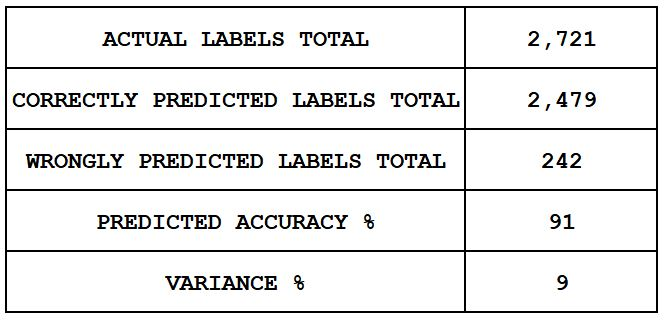